In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
data=pd.read_csv(r'C:\Users\KIIT\Desktop\Intellipaat DS Classes\Machine Learning\data.csv')

In [60]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [61]:
data.shape

(1460, 81)

In [62]:
data.duplicated().sum()

0

In [63]:
data.isna().sum().sum()

6965

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
print('We have {} numerical columns: {}'.format(len(numerical_features),numerical_features))

We have 38 numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [66]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
print('We have {} categorical columns: {}'.format(len(categorical_features),categorical_features))

We have 43 categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### In this dataset there are 38 numerical variables(int+float) and 43 categorical variables.
#### MSSubClass, OverallQual, OverallCond should be an object datatype

In [67]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [68]:
col_list=list(data.columns)

In [69]:
col_list

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [70]:
col_list.remove('SalePrice')

In [71]:
for i in col_list:
    if data[i].dtype=='object':
        data[i]=data[i].fillna(data[i].mode()[0])
    else:
        data[i]=data[i].fillna(data[i].mean())
    

In [72]:
data.isna().sum().sum()

0

In [73]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [74]:
for i in categorical_features:
    print(i)
    print(data[i].unique())
    print(' ')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
 
Street
['Pave' 'Grvl']
 
Alley
['Grvl' 'Pave']
 
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
 
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
 
Utilities
['AllPub' 'NoSeWa']
 
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
 
LandSlope
['Gtl' 'Mod' 'Sev']
 
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
 
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
 
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
 
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
 
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
 
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
 
Exteri

### Univariate Analysis

#### categorical features

Distribution of : MSZoning


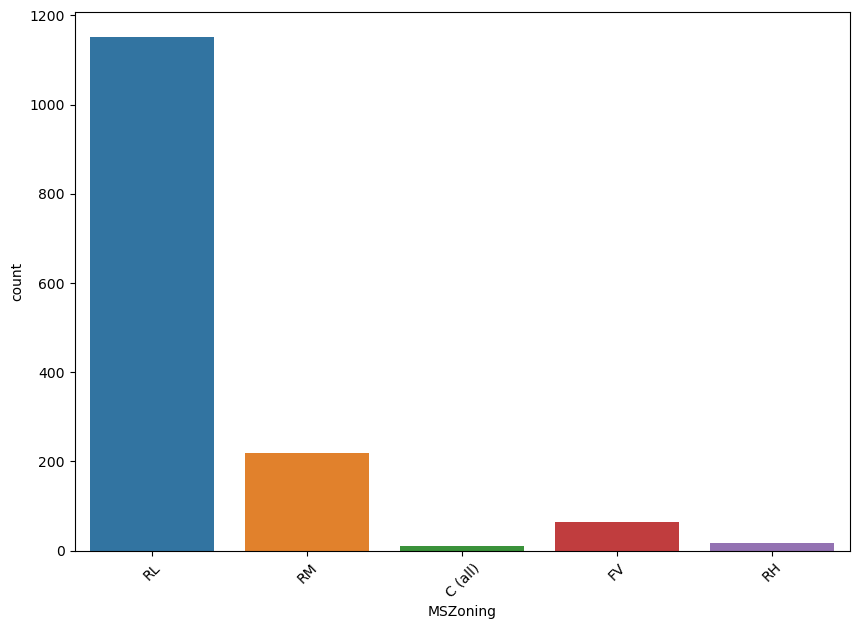

Distribution of : Street


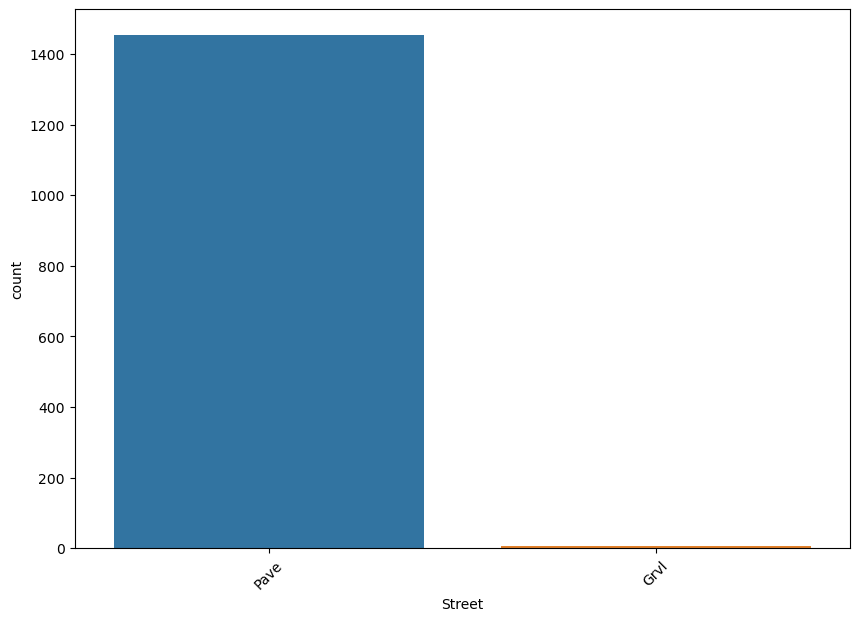

Distribution of : Alley


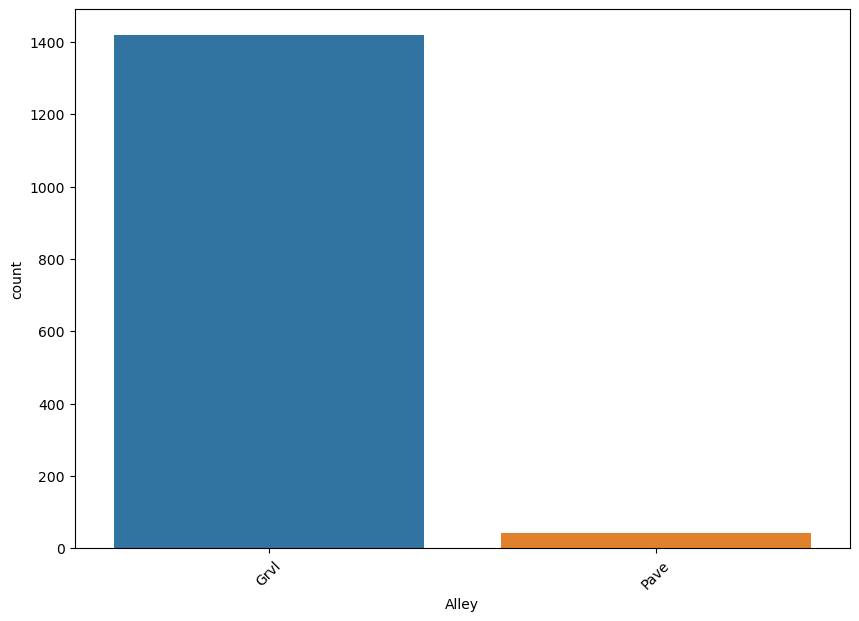

Distribution of : LotShape


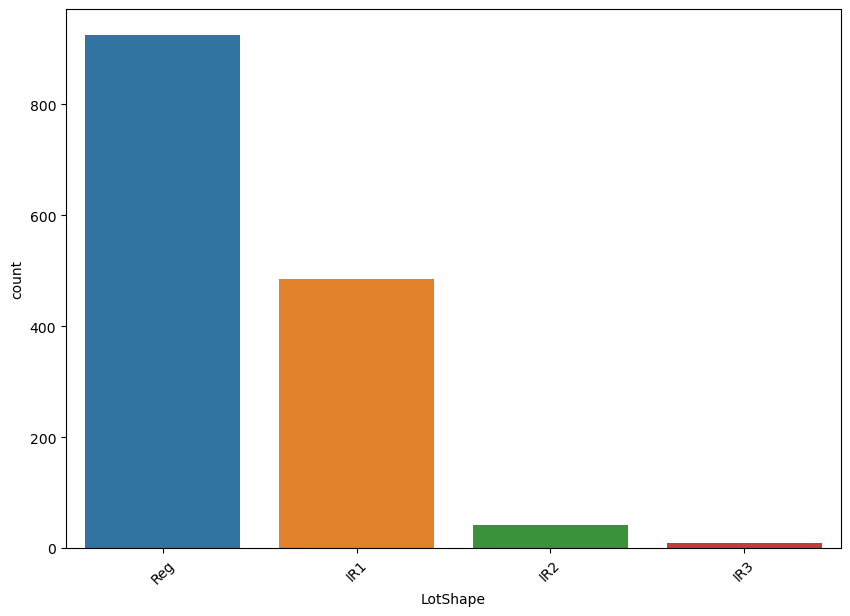

Distribution of : LandContour


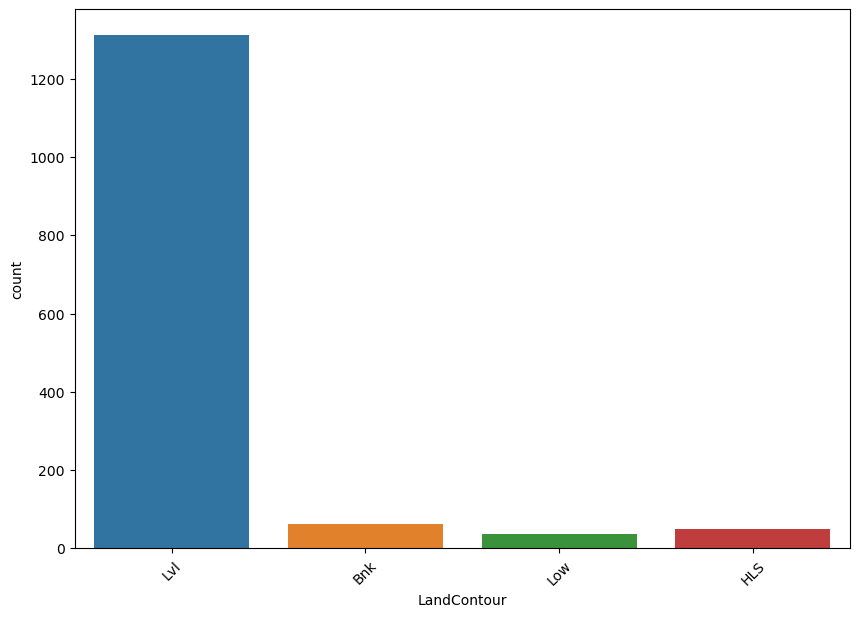

Distribution of : Utilities


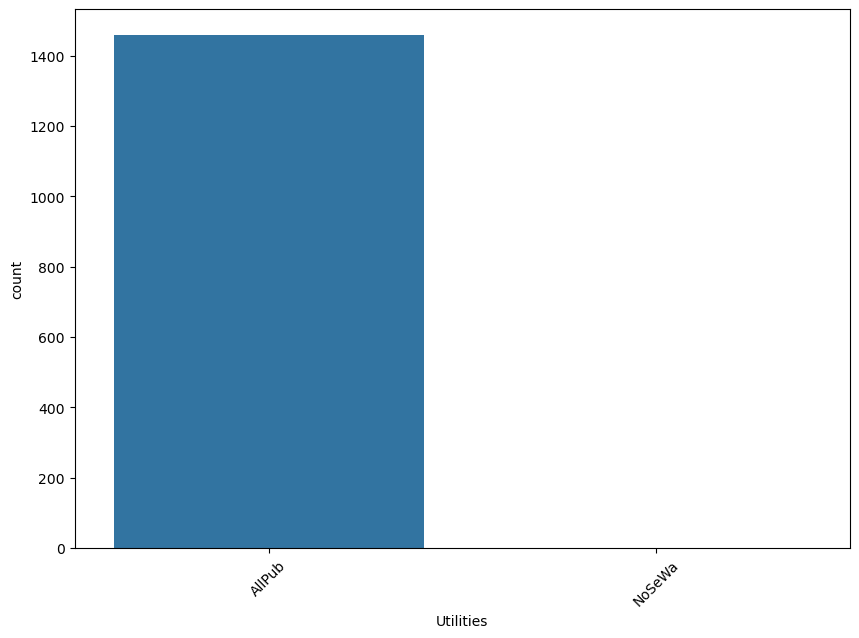

Distribution of : LotConfig


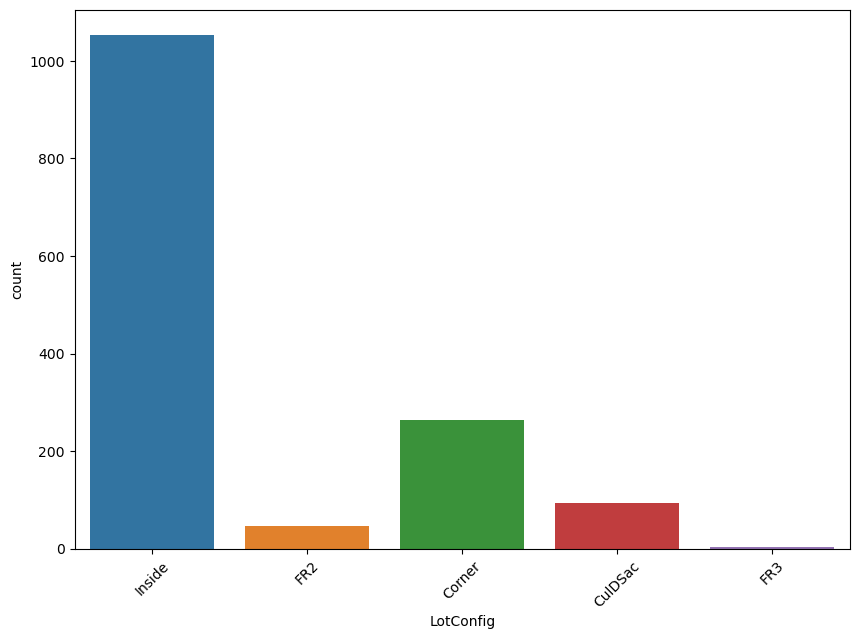

Distribution of : LandSlope


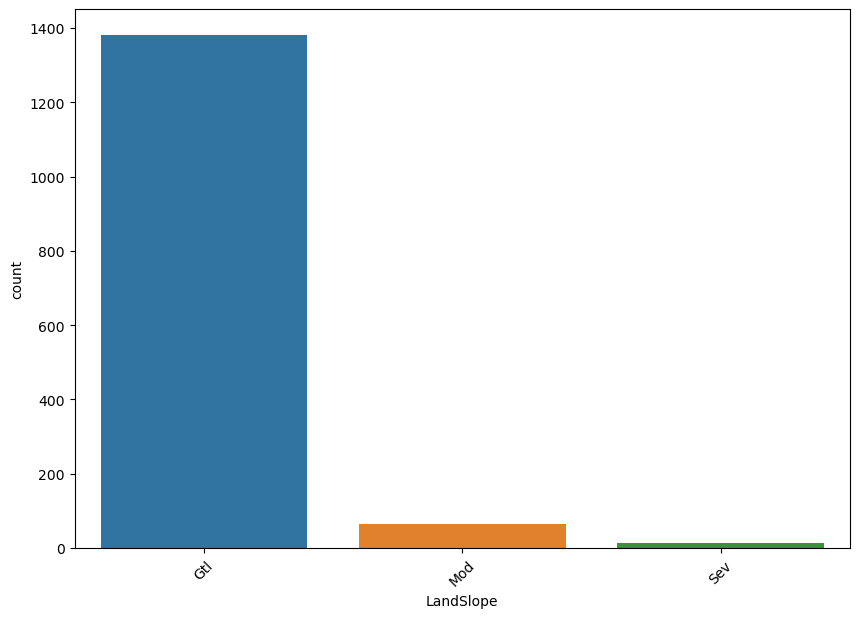

Distribution of : Neighborhood


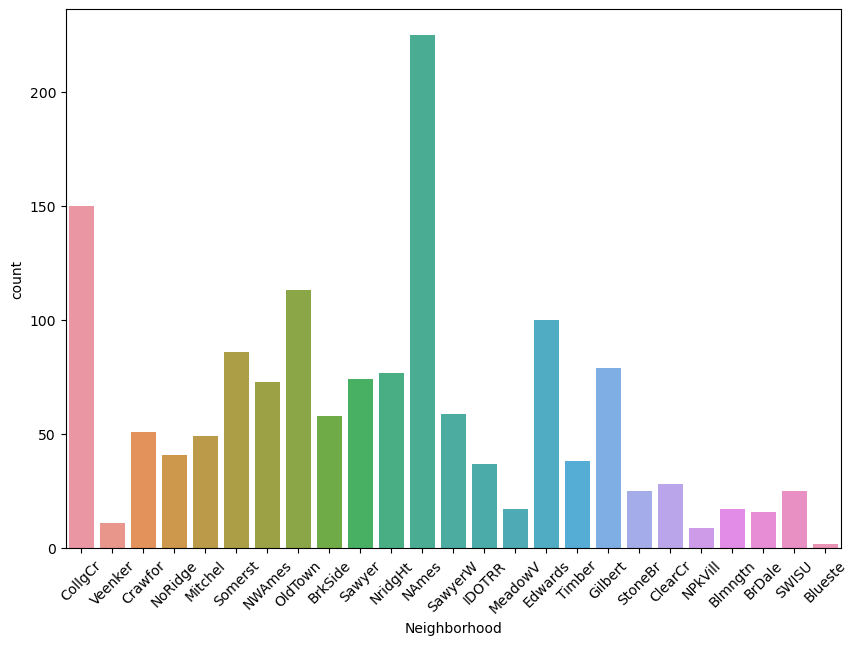

Distribution of : Condition1


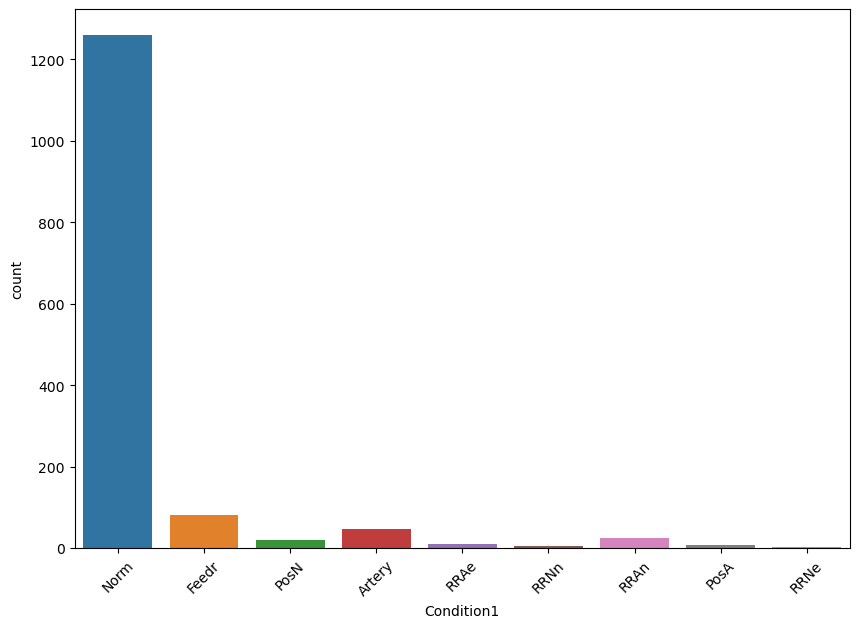

Distribution of : Condition2


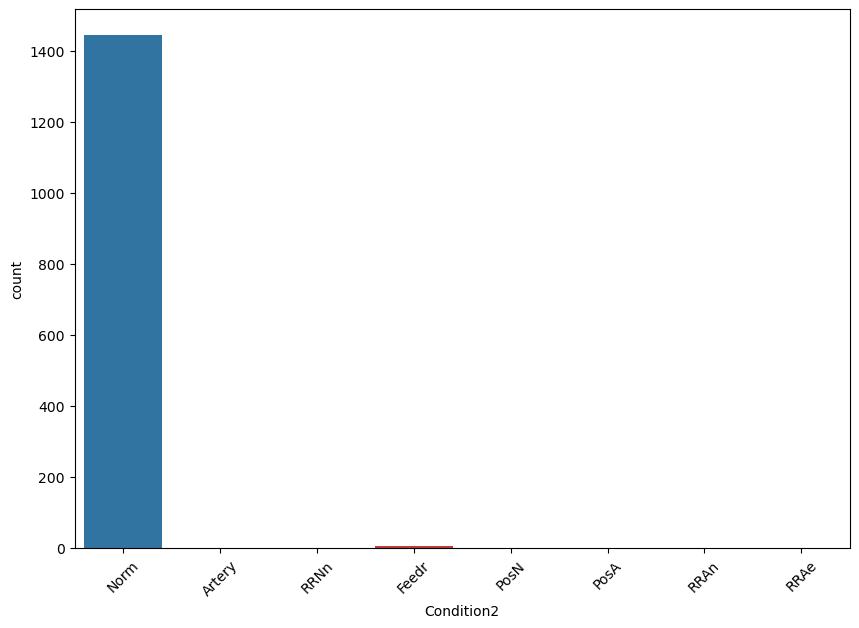

Distribution of : BldgType


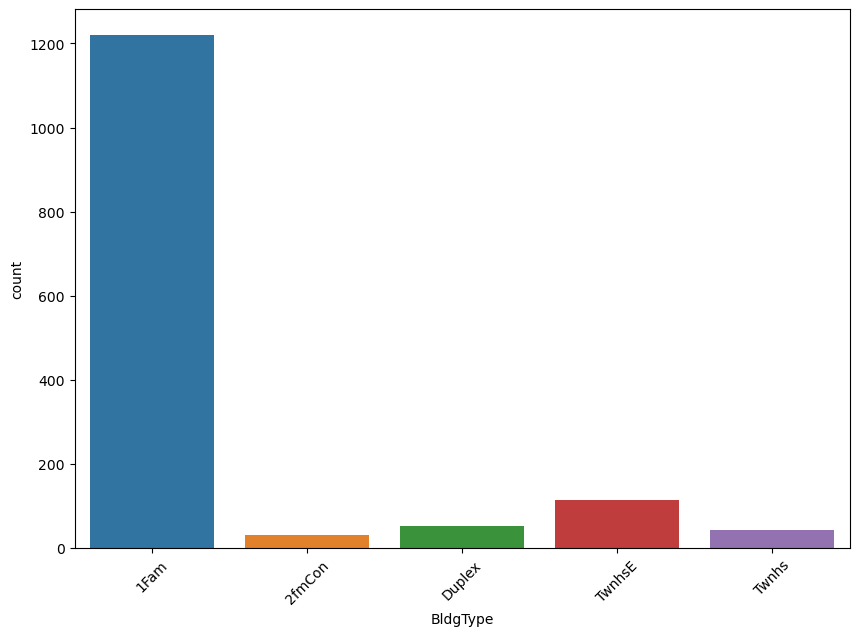

Distribution of : HouseStyle


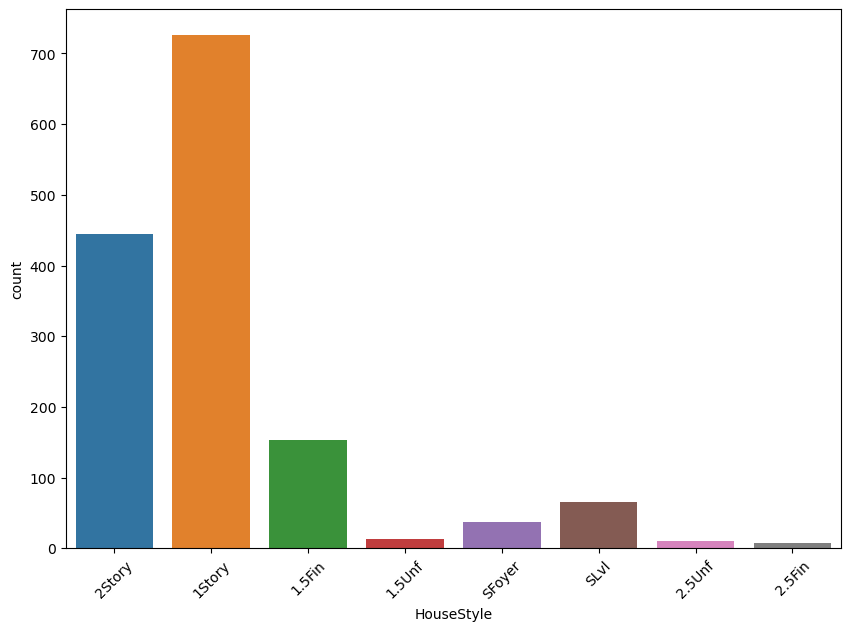

Distribution of : RoofStyle


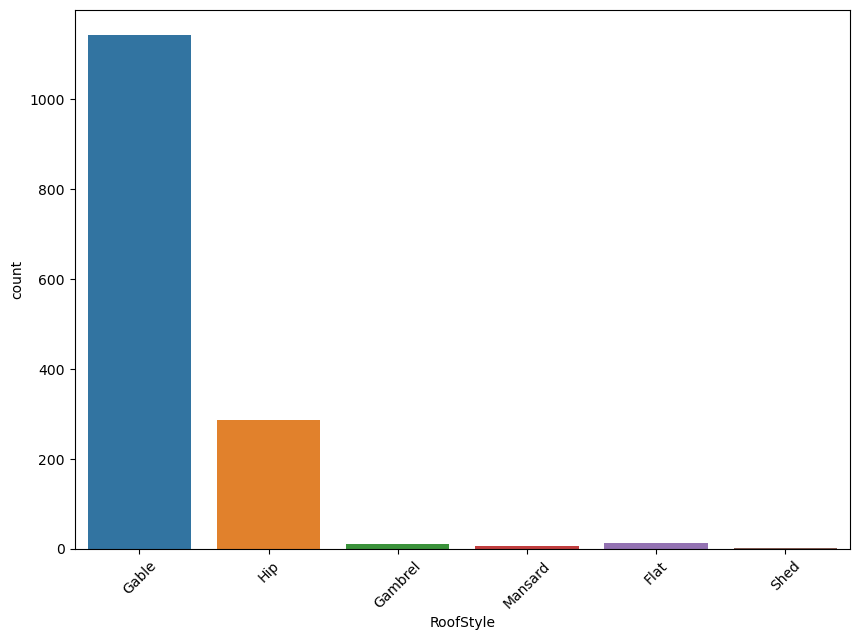

Distribution of : RoofMatl


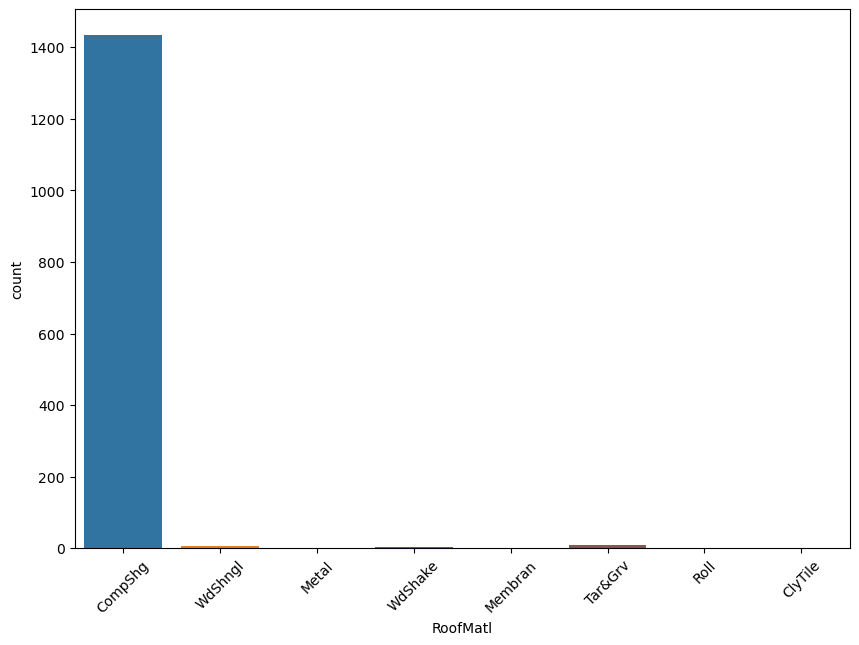

Distribution of : Exterior1st


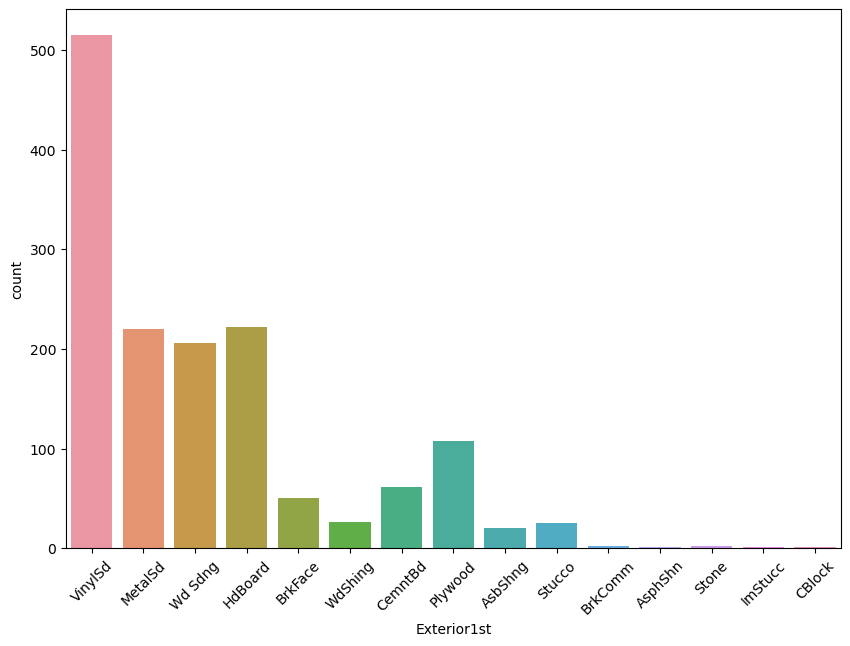

Distribution of : Exterior2nd


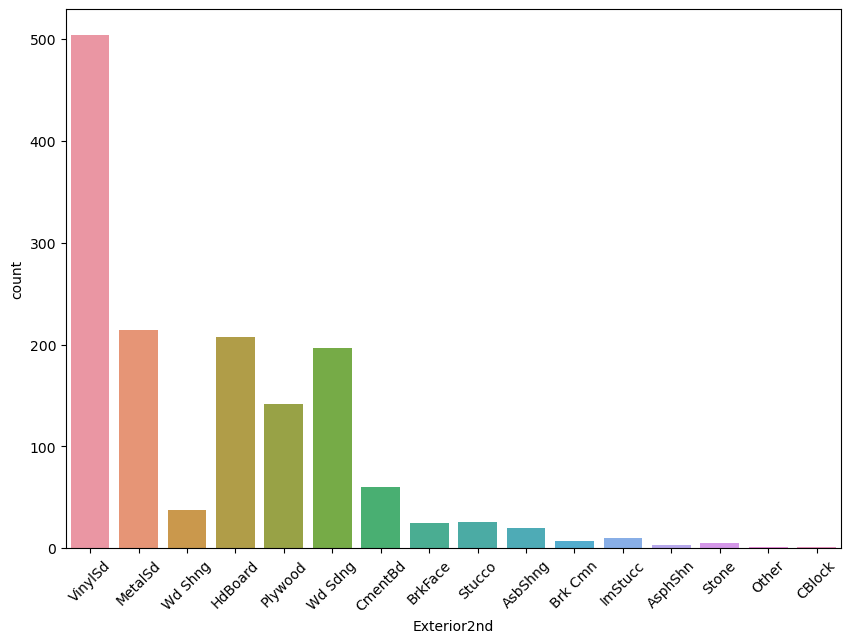

Distribution of : MasVnrType


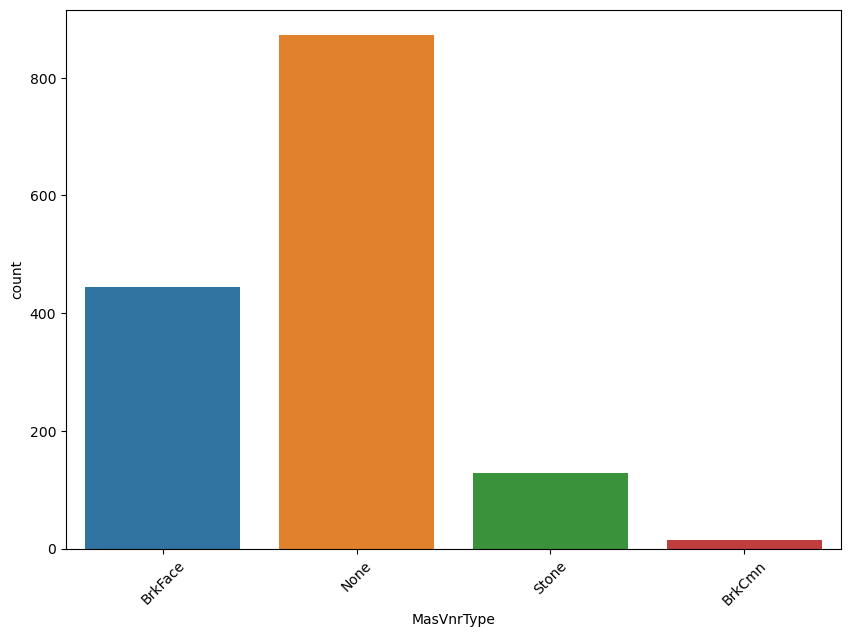

Distribution of : ExterQual


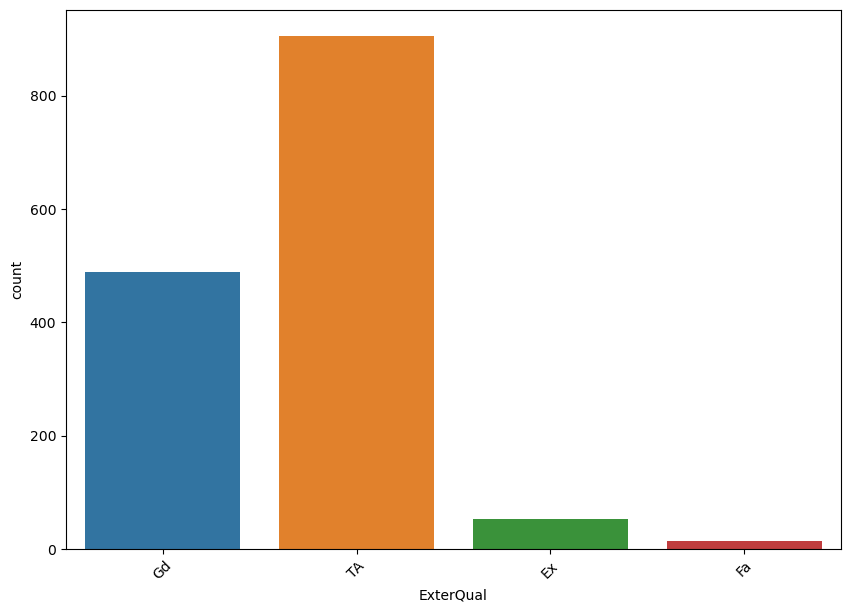

Distribution of : ExterCond


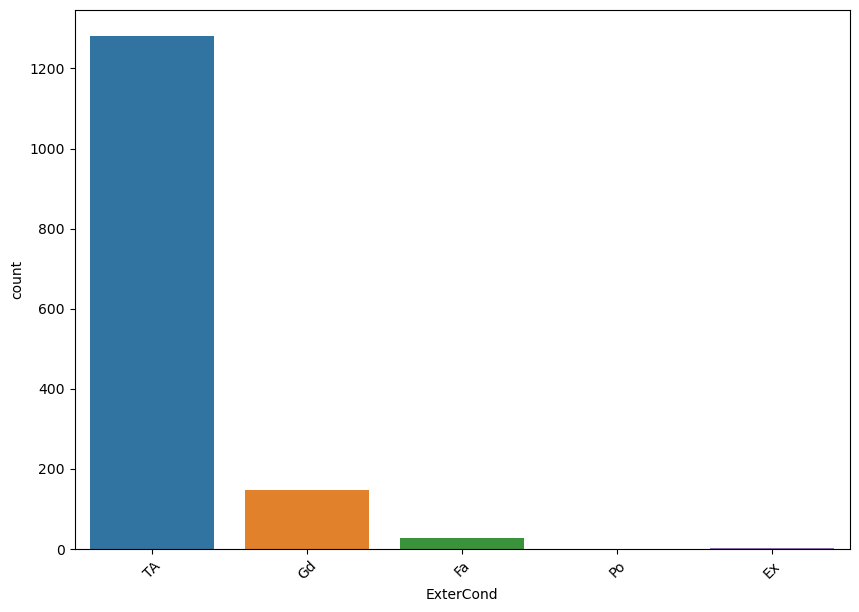

Distribution of : Foundation


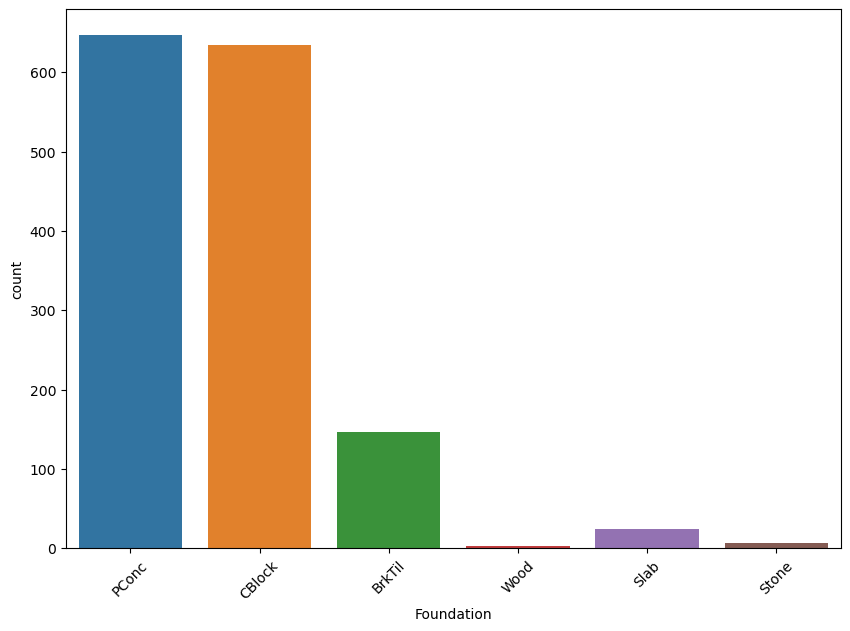

Distribution of : BsmtQual


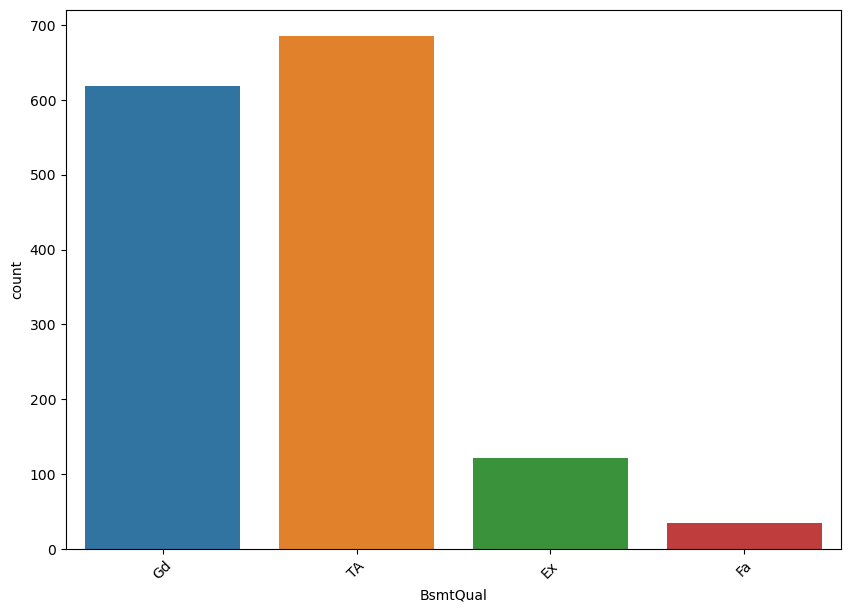

Distribution of : BsmtCond


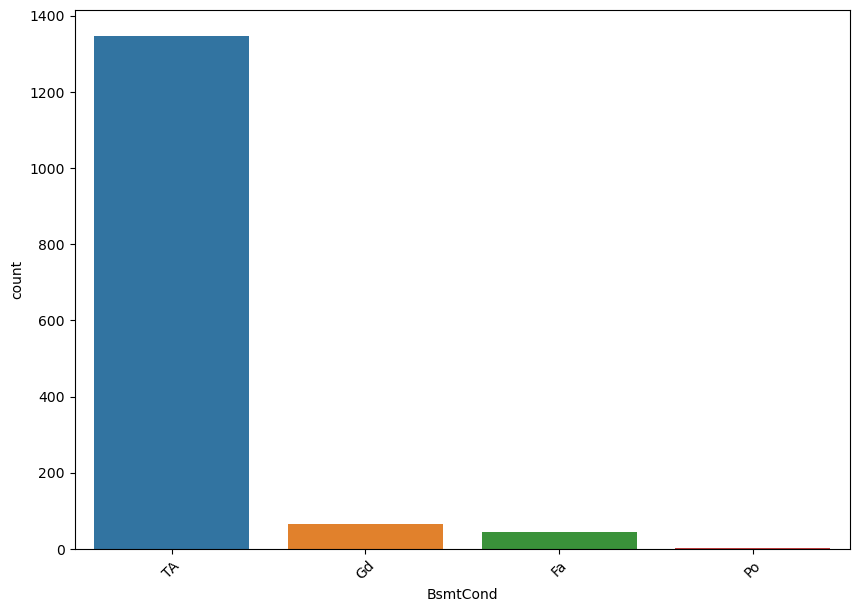

Distribution of : BsmtExposure


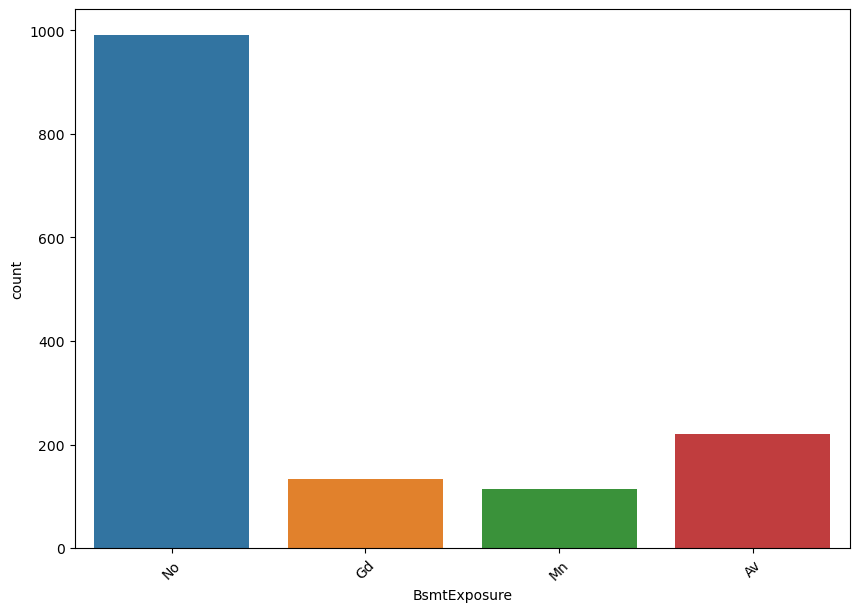

Distribution of : BsmtFinType1


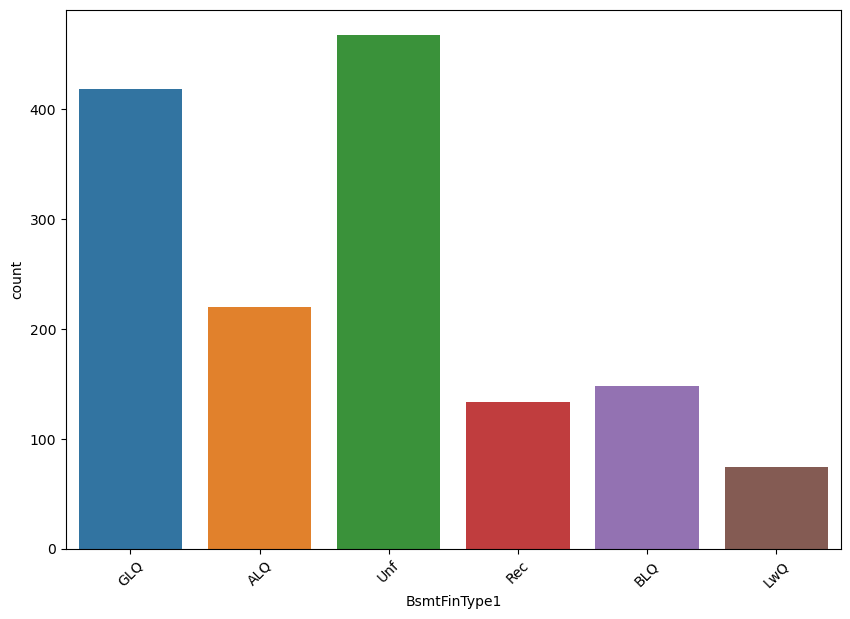

Distribution of : BsmtFinType2


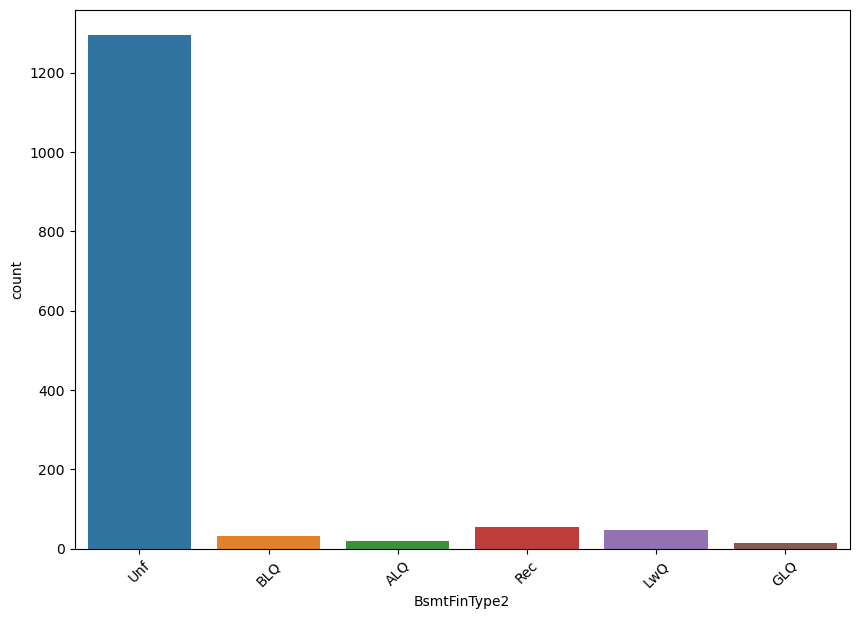

Distribution of : Heating


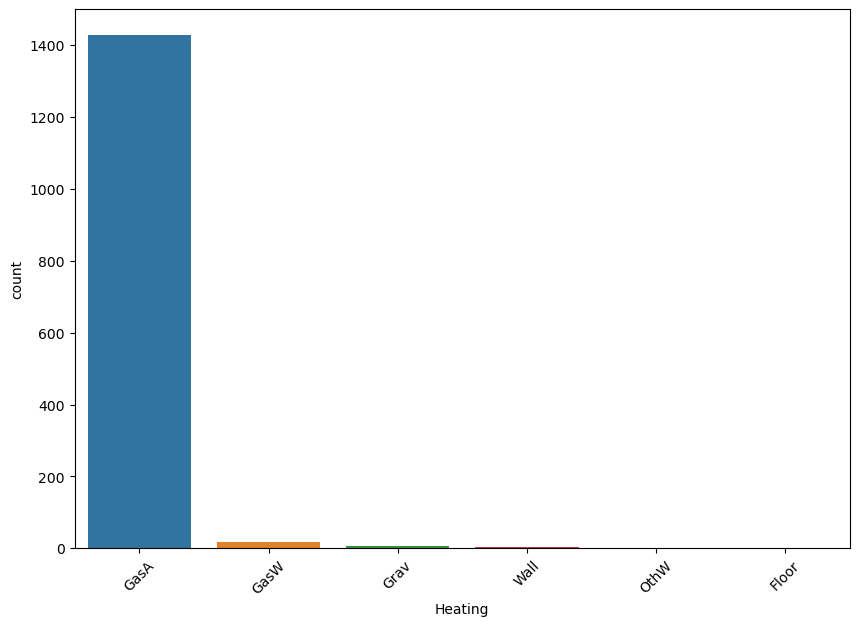

Distribution of : HeatingQC


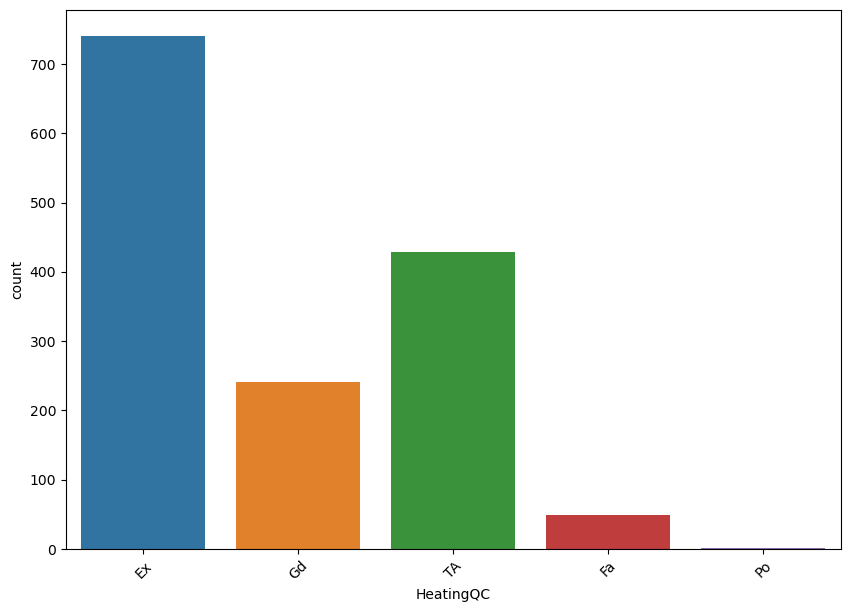

Distribution of : CentralAir


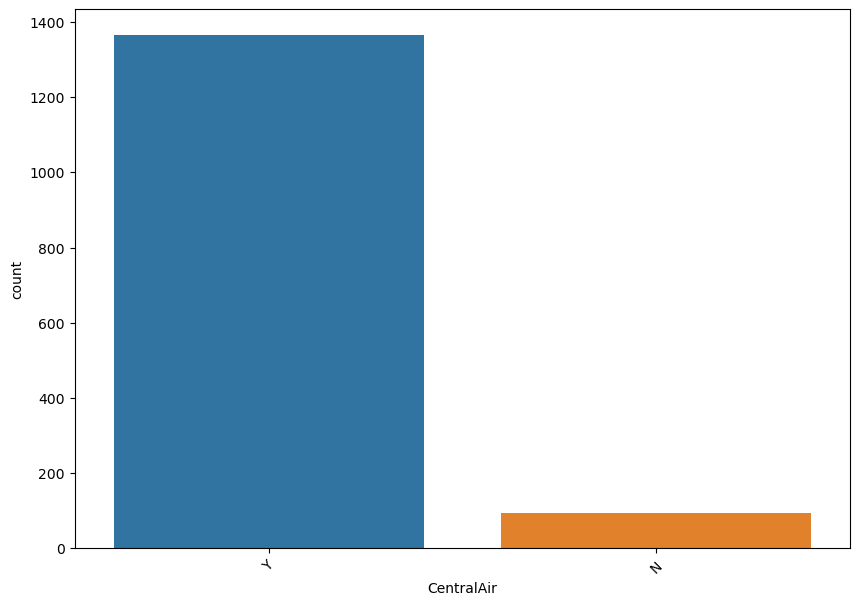

Distribution of : Electrical


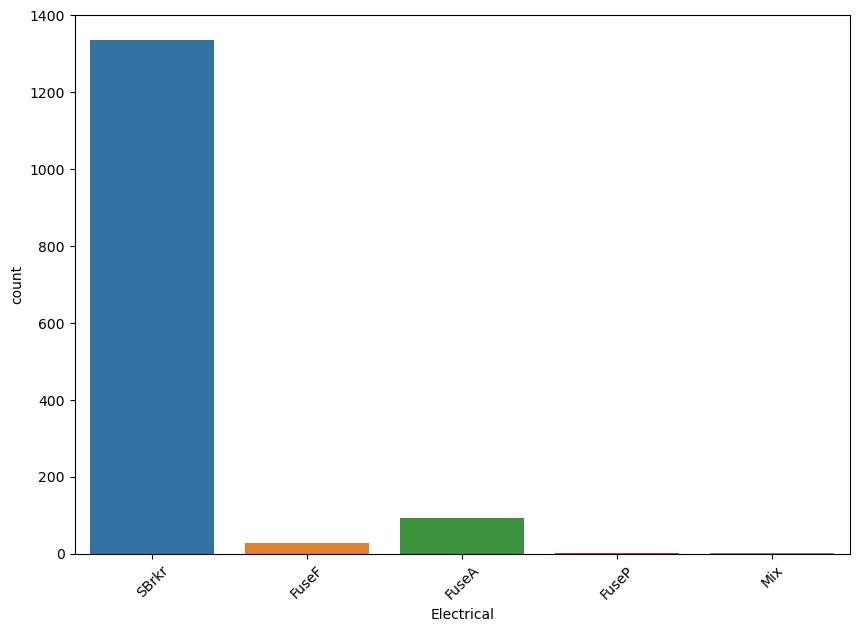

Distribution of : KitchenQual


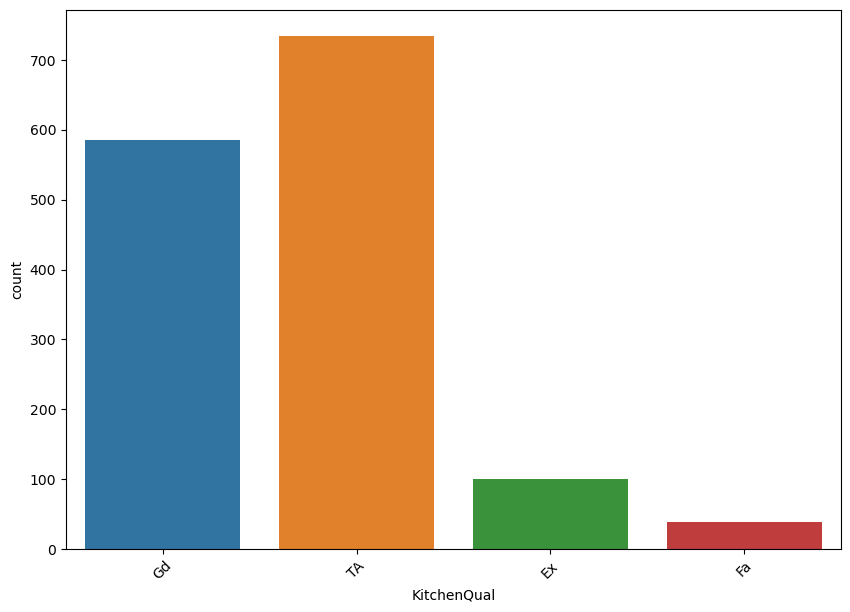

Distribution of : Functional


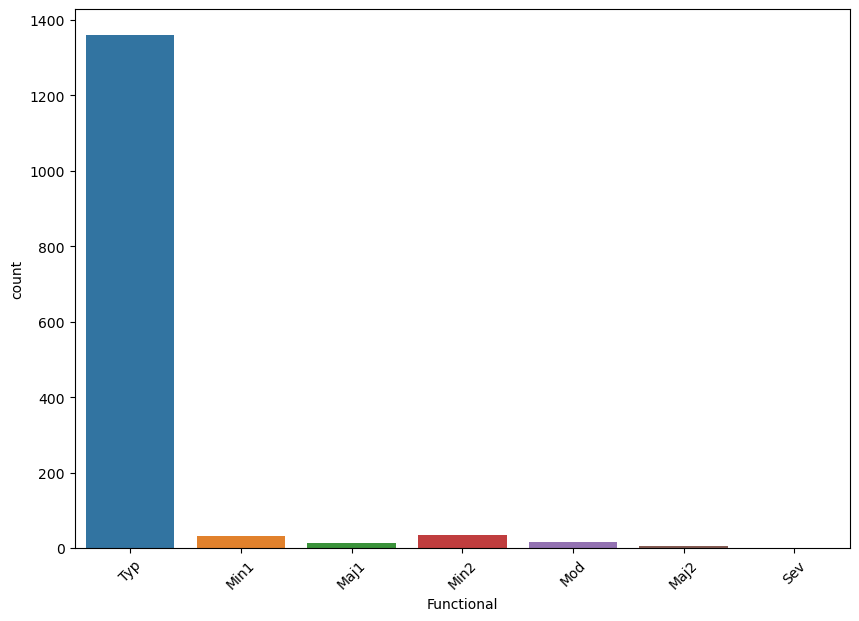

Distribution of : FireplaceQu


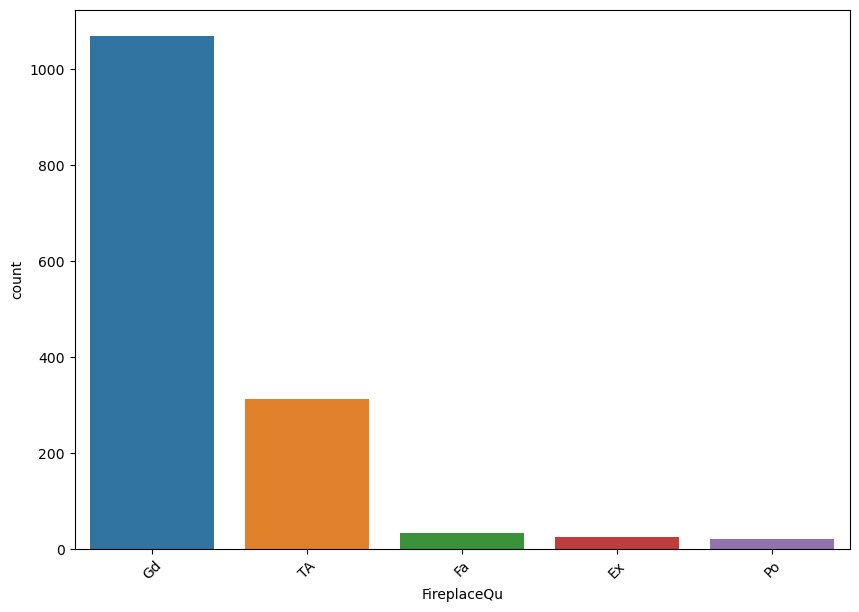

Distribution of : GarageType


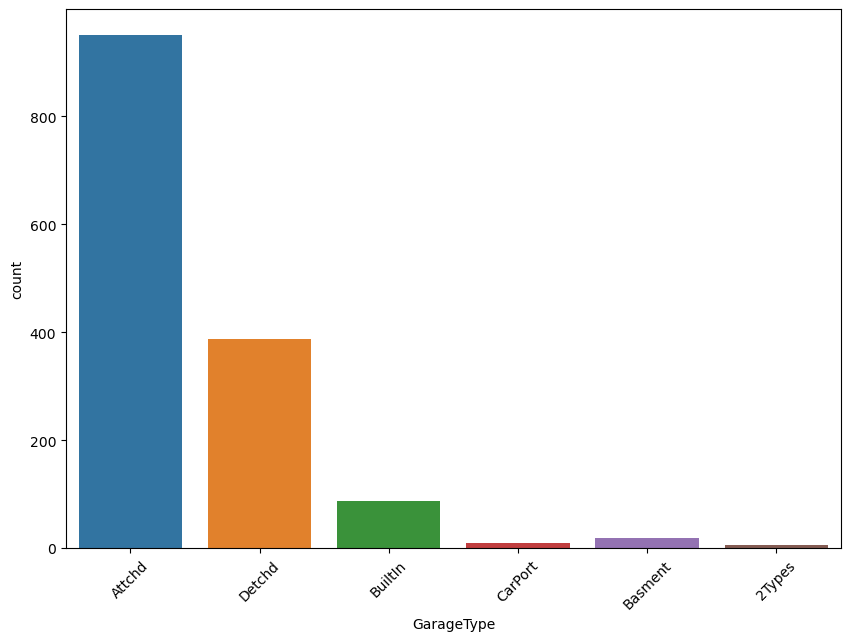

Distribution of : GarageFinish


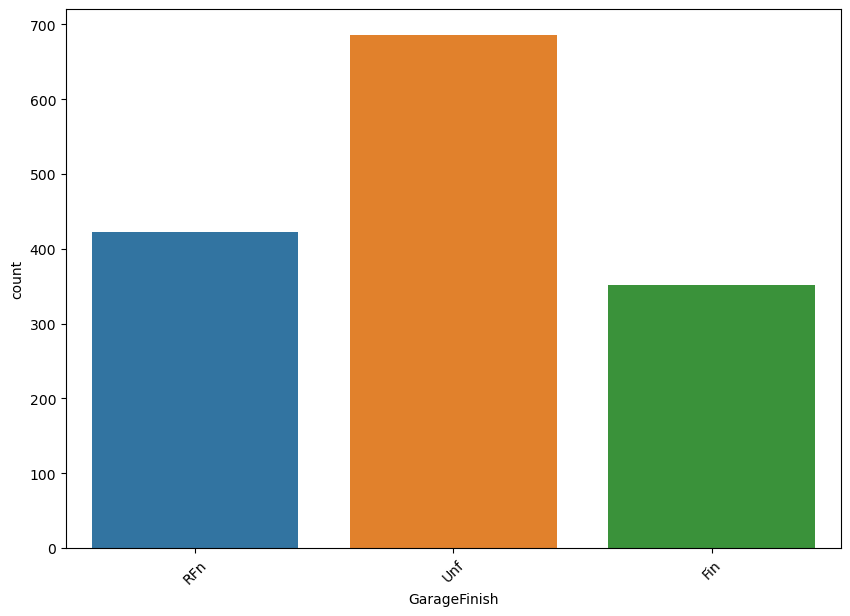

Distribution of : GarageQual


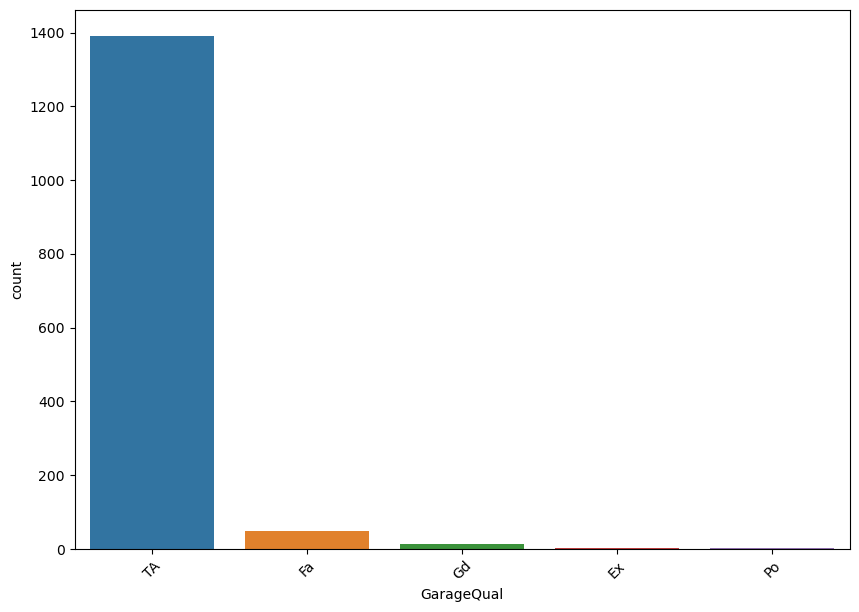

Distribution of : GarageCond


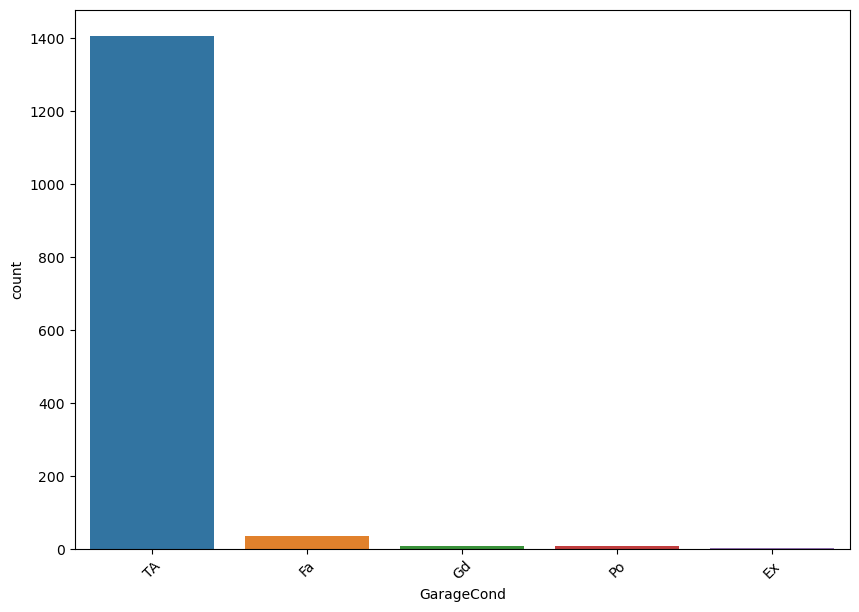

Distribution of : PavedDrive


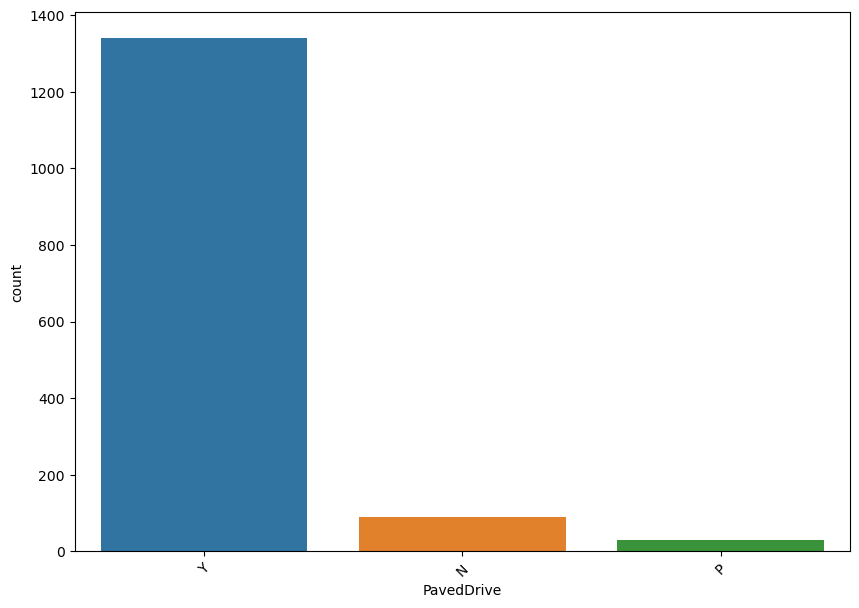

Distribution of : PoolQC


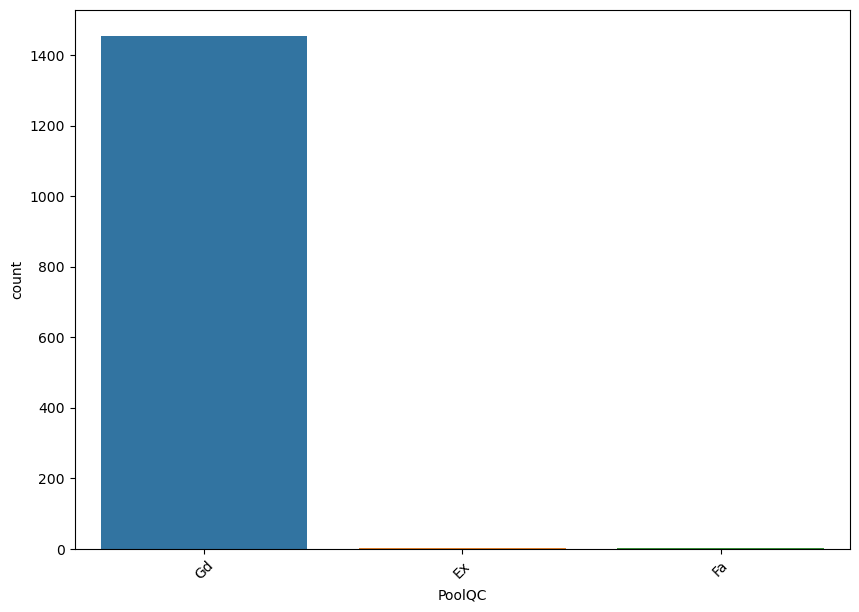

Distribution of : Fence


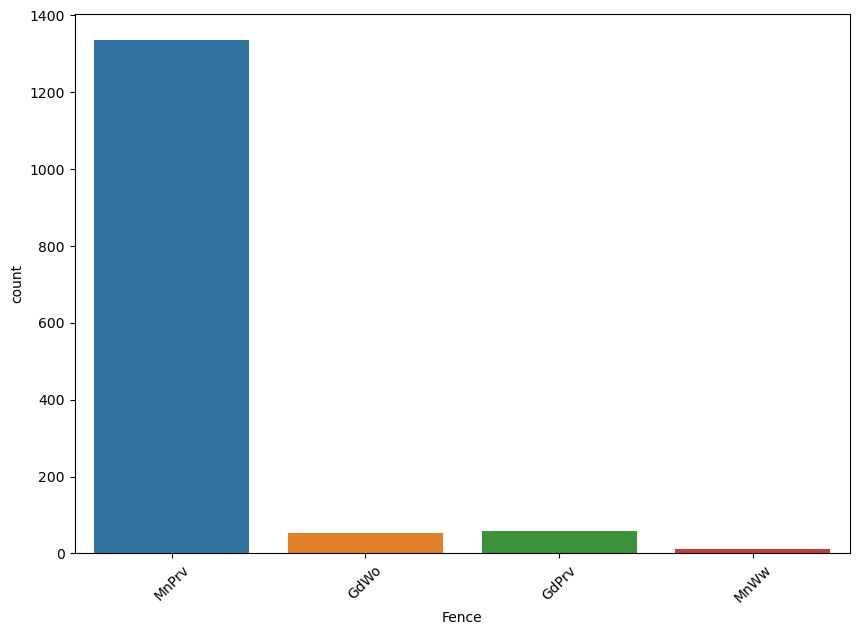

Distribution of : MiscFeature


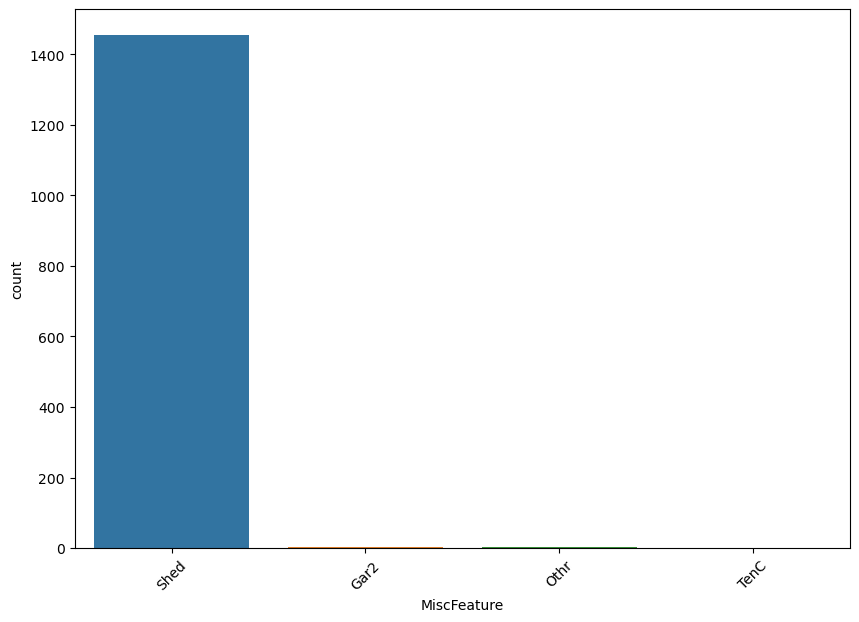

Distribution of : SaleType


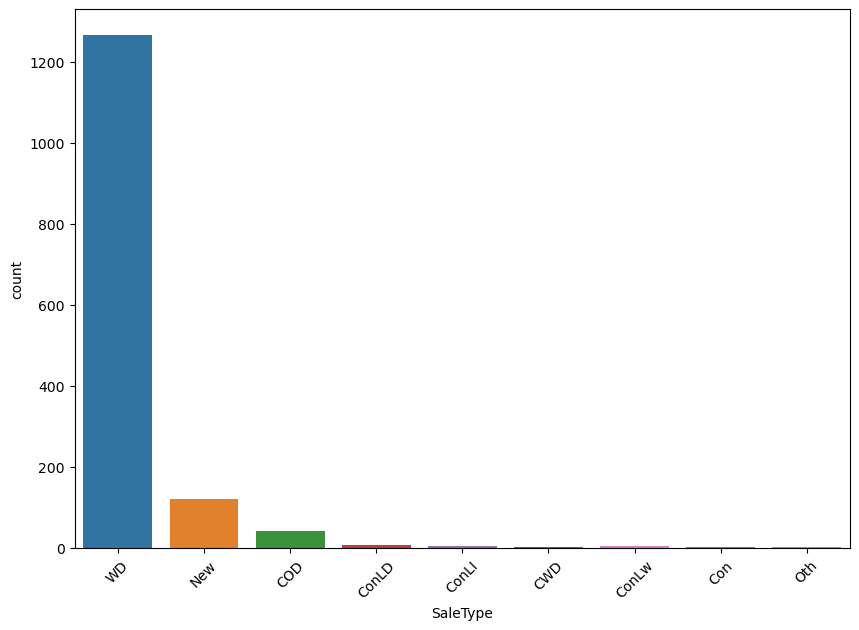

Distribution of : SaleCondition


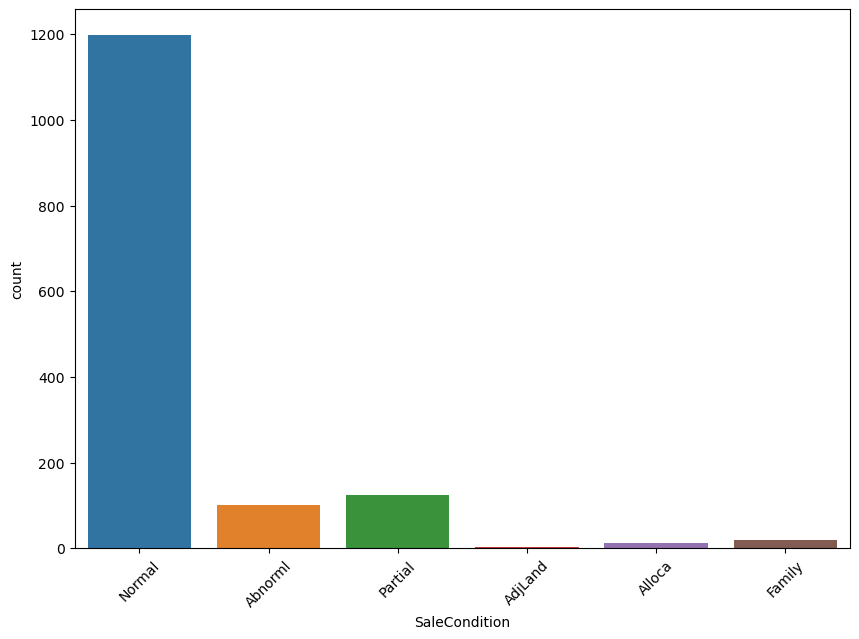

In [75]:
for i in categorical_features:
    print("Distribution of :", i)
    plt.figure(figsize=(10,7))
    sns.countplot(x=data[i],data=data)
    plt.xticks(rotation=45)
    plt.show()

#### numerical features

Boxplot of : Id


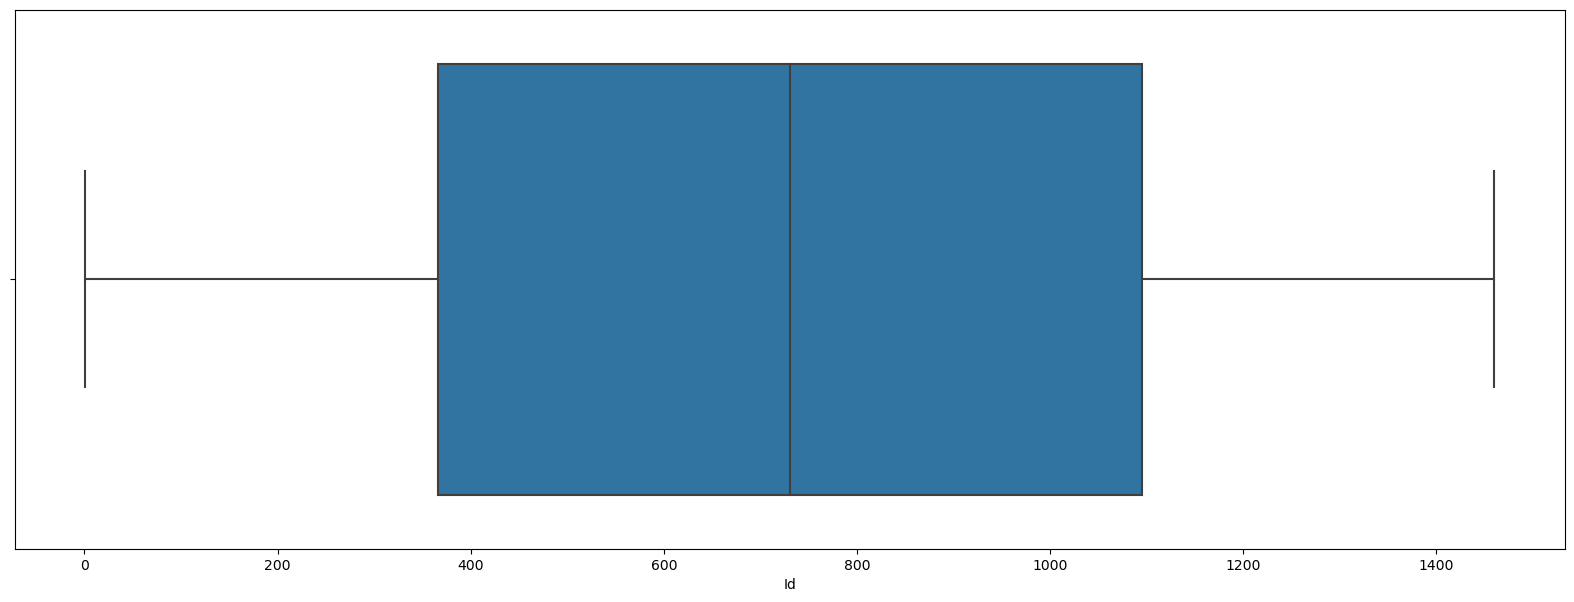

Boxplot of : MSSubClass


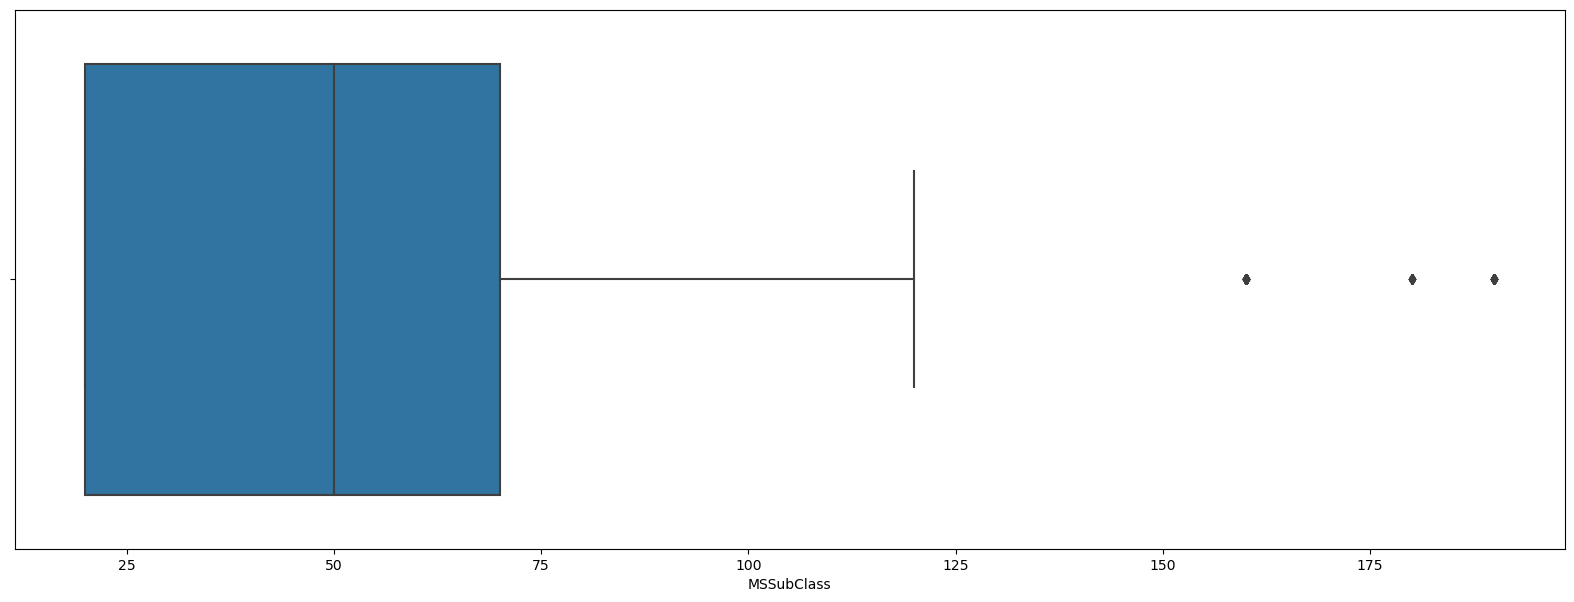

Boxplot of : LotFrontage


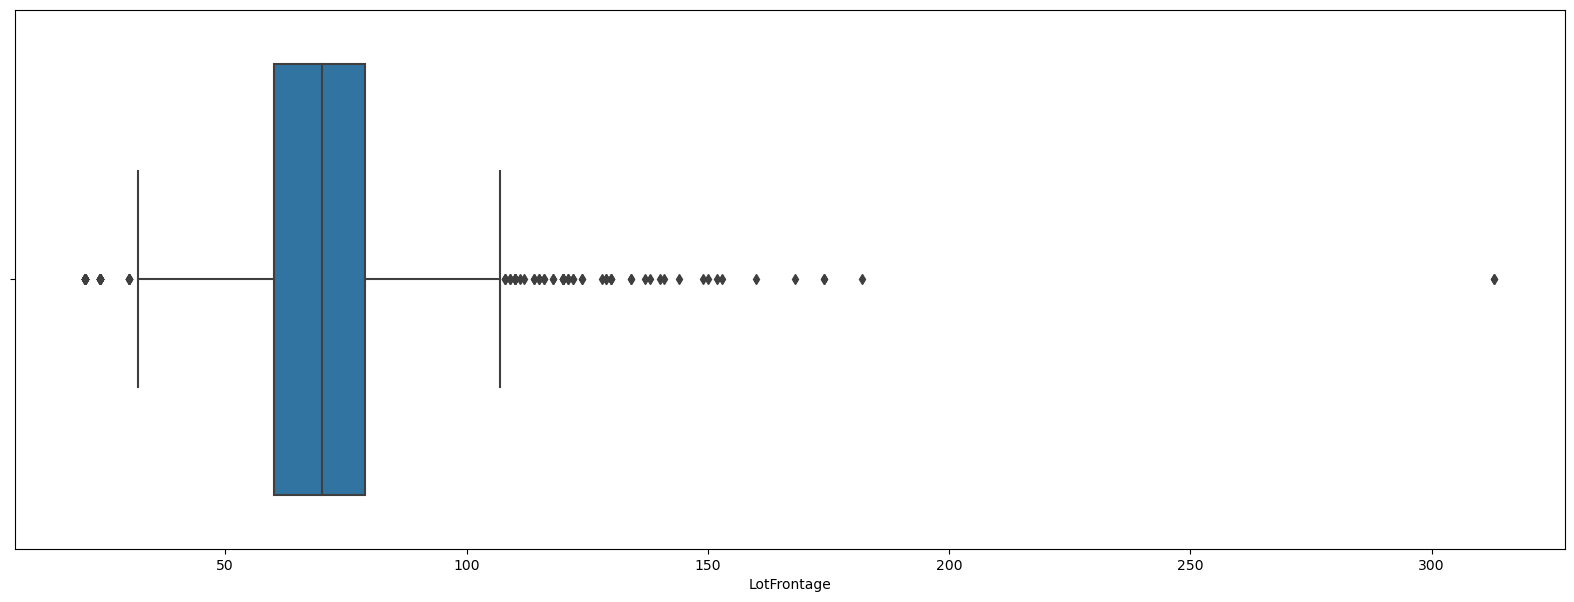

Boxplot of : LotArea


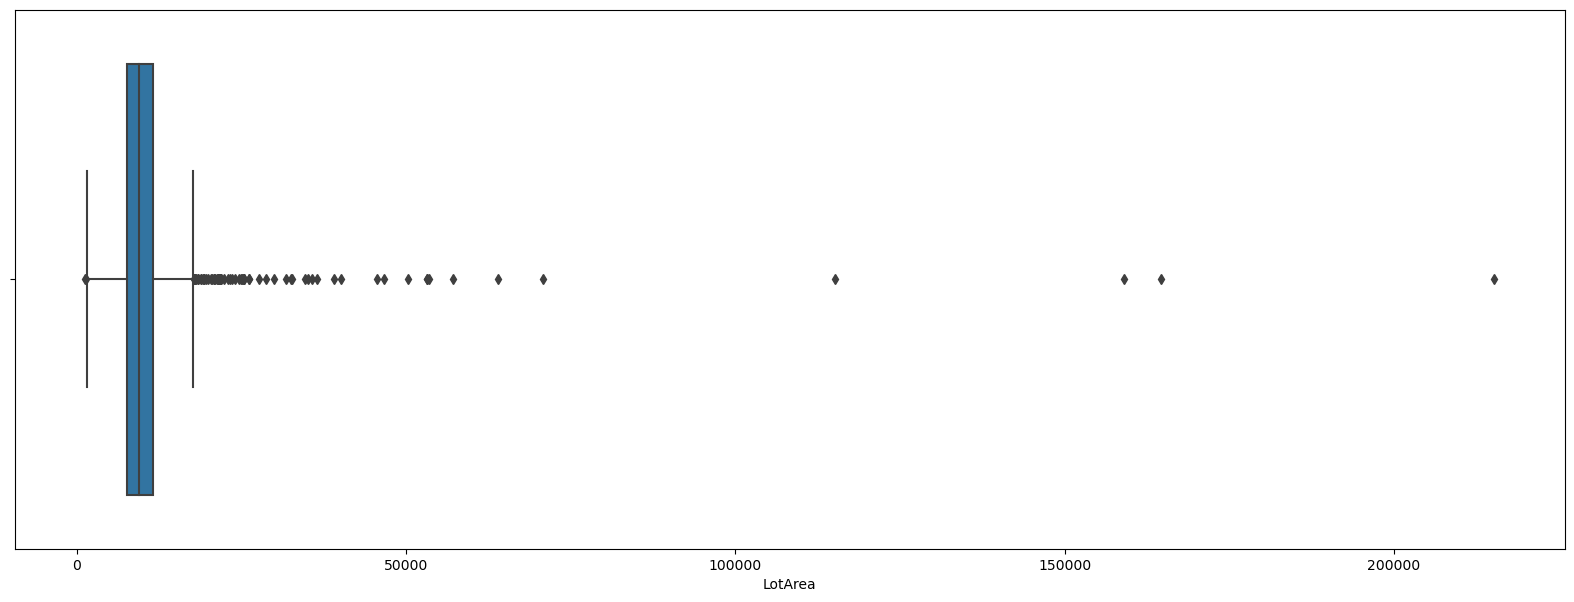

Boxplot of : OverallQual


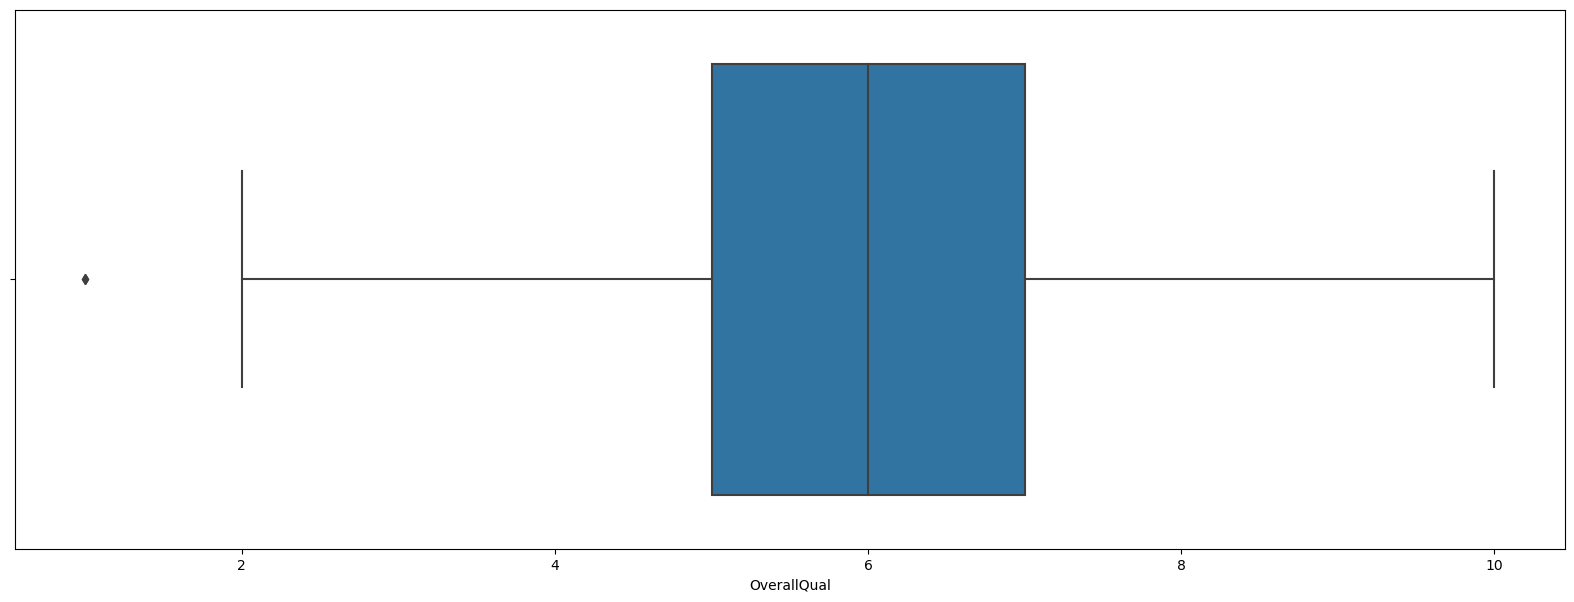

Boxplot of : OverallCond


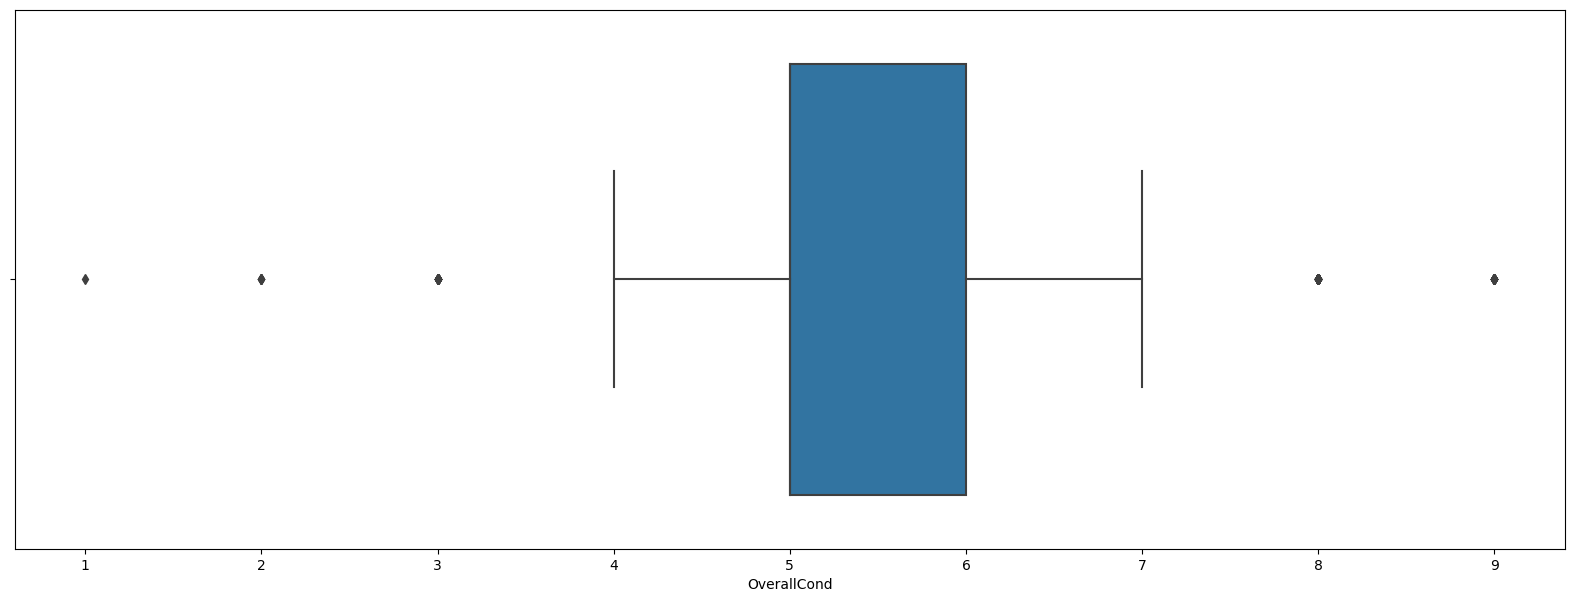

Boxplot of : YearBuilt


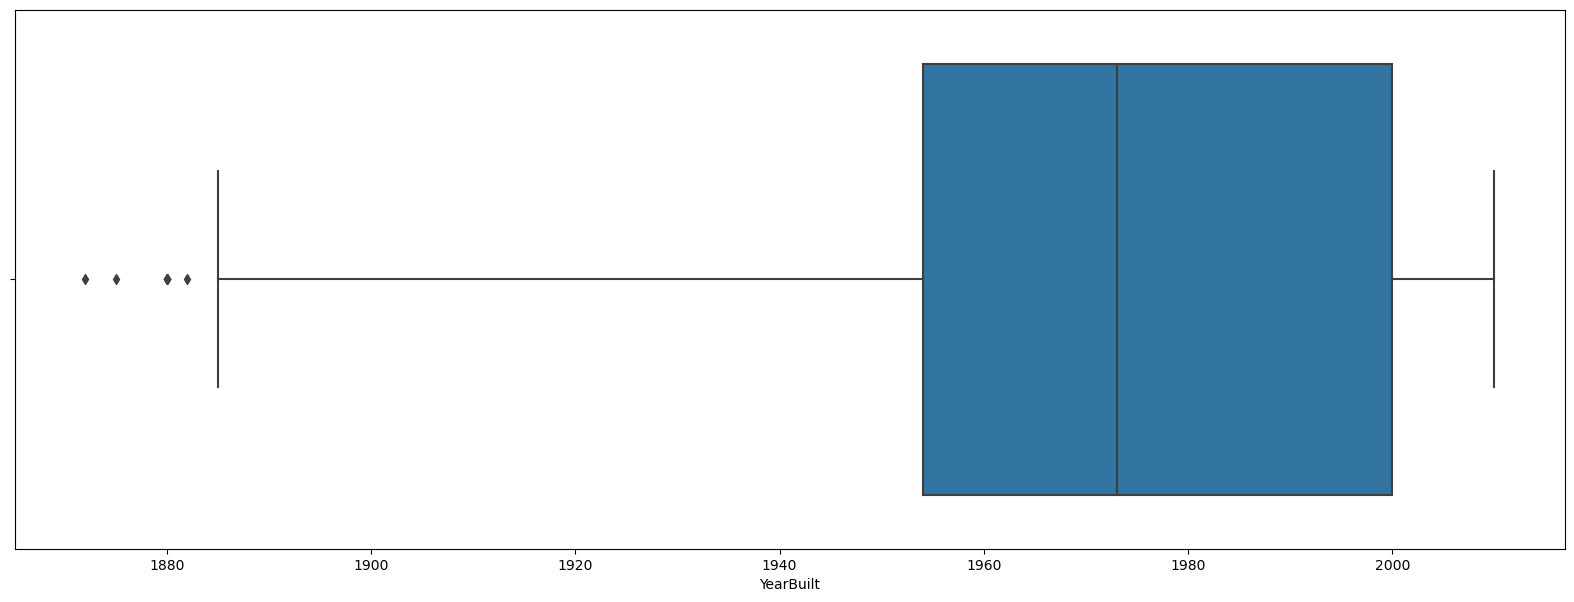

Boxplot of : YearRemodAdd


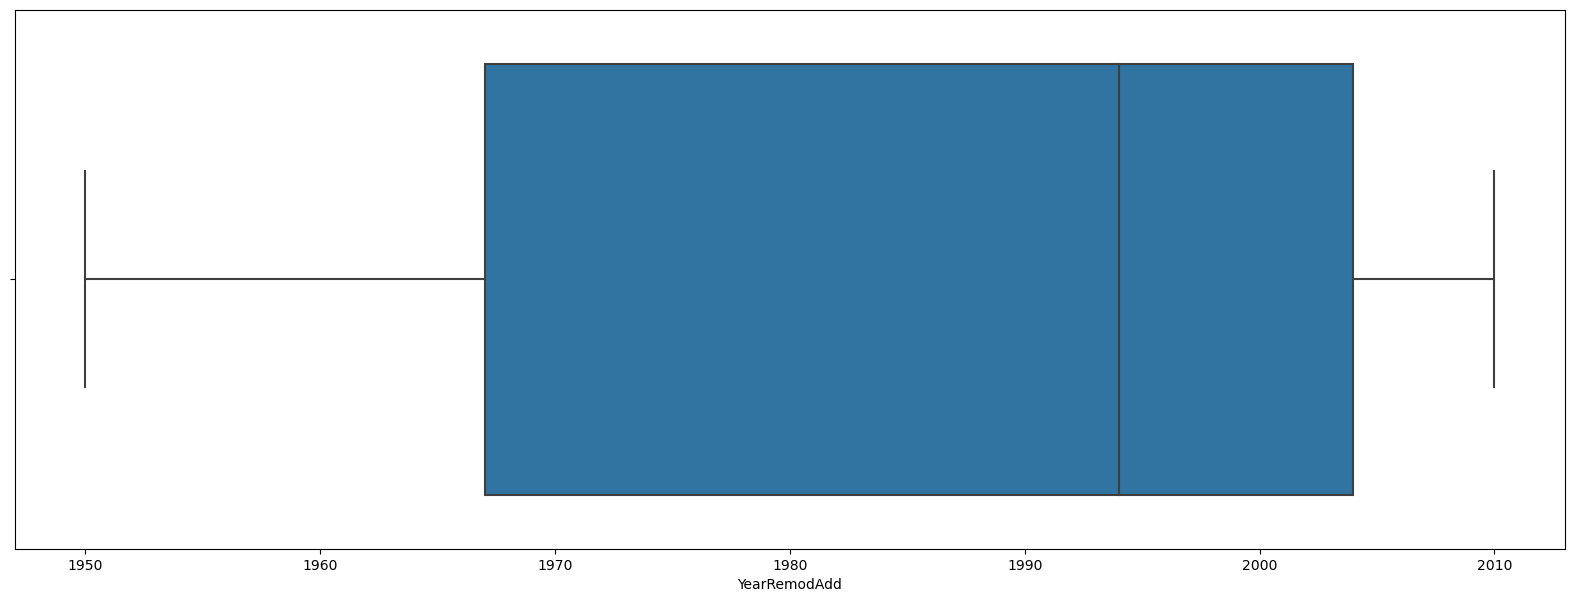

Boxplot of : MasVnrArea


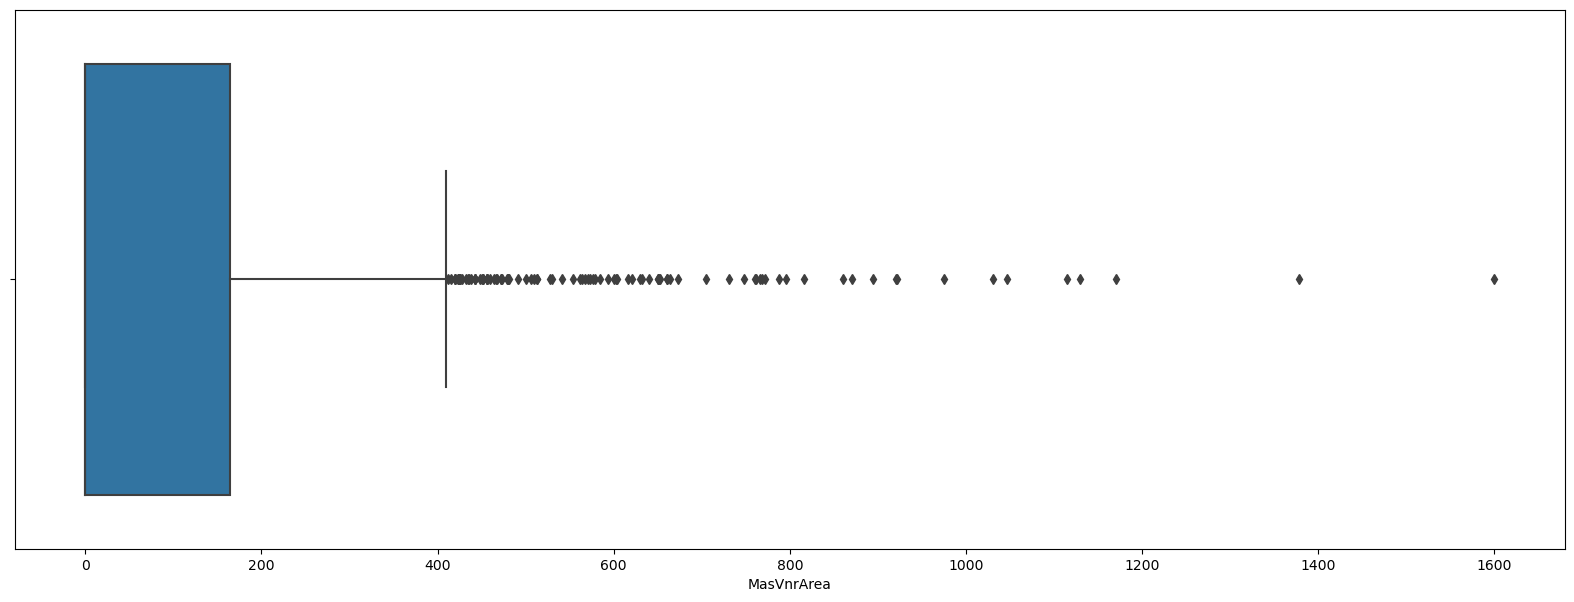

Boxplot of : BsmtFinSF1


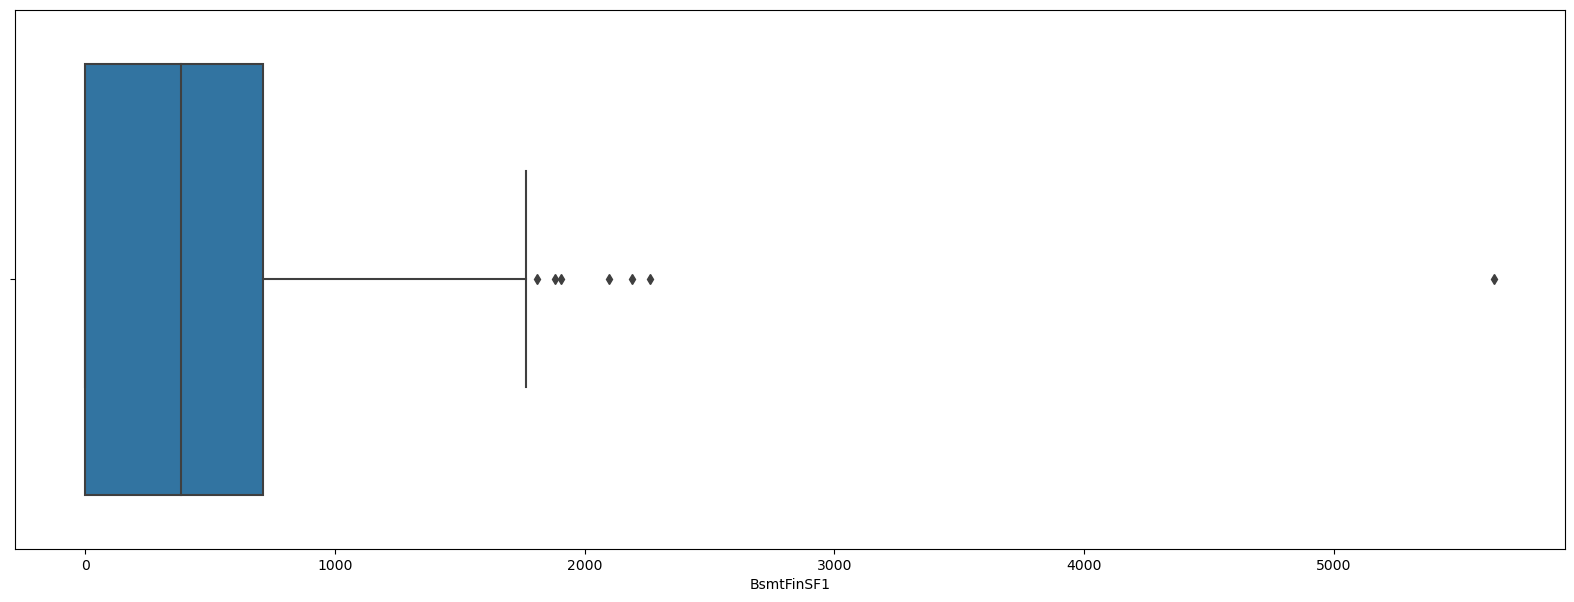

Boxplot of : BsmtFinSF2


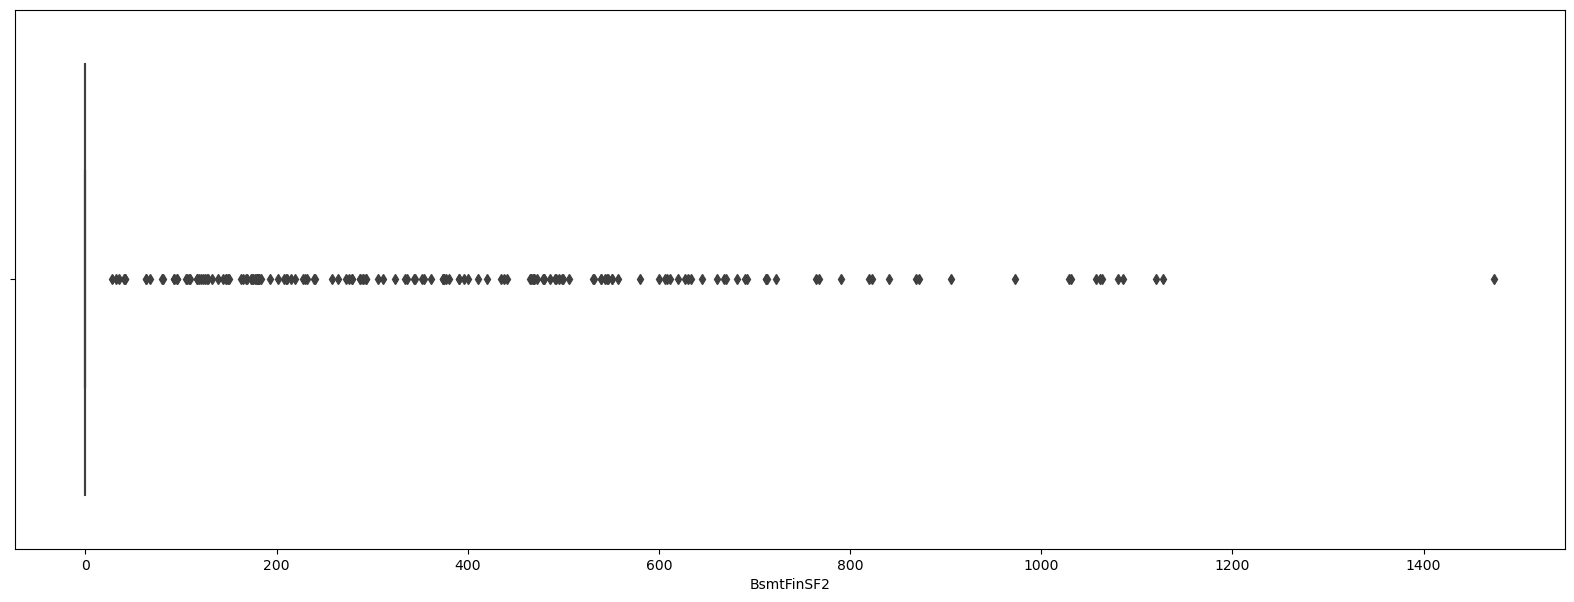

Boxplot of : BsmtUnfSF


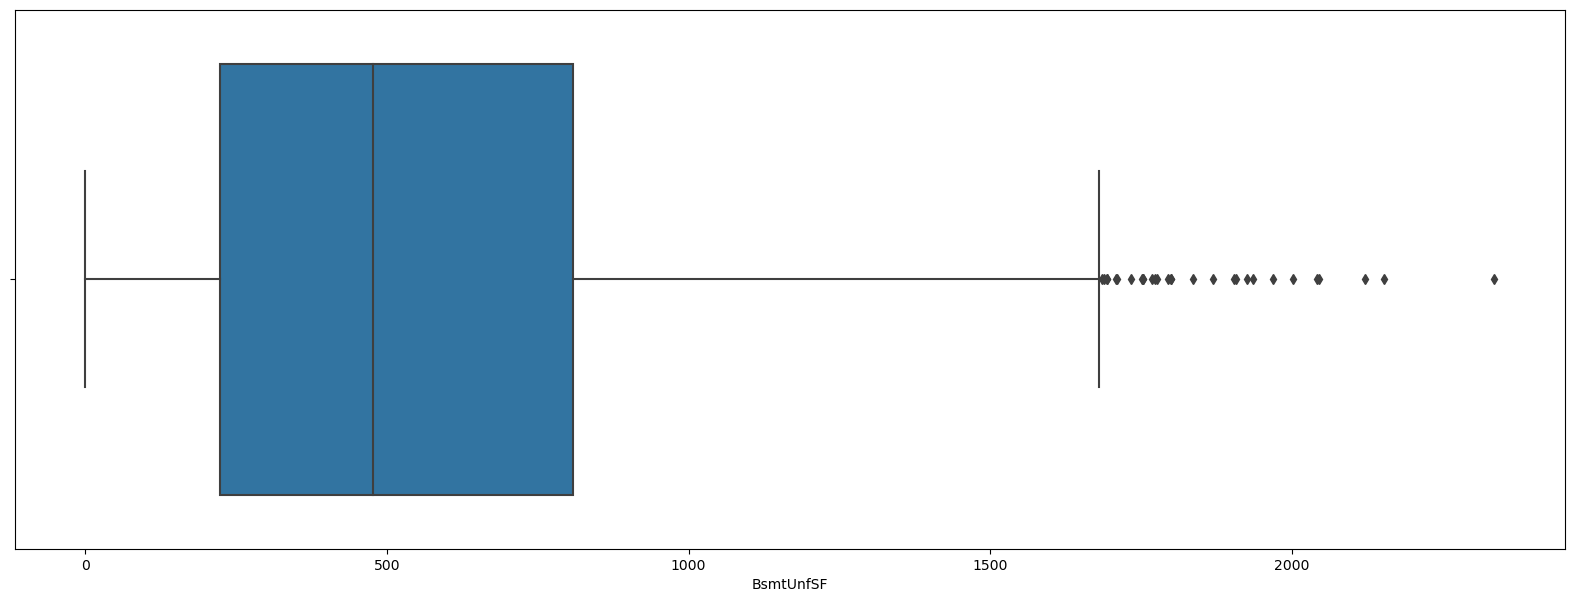

Boxplot of : TotalBsmtSF


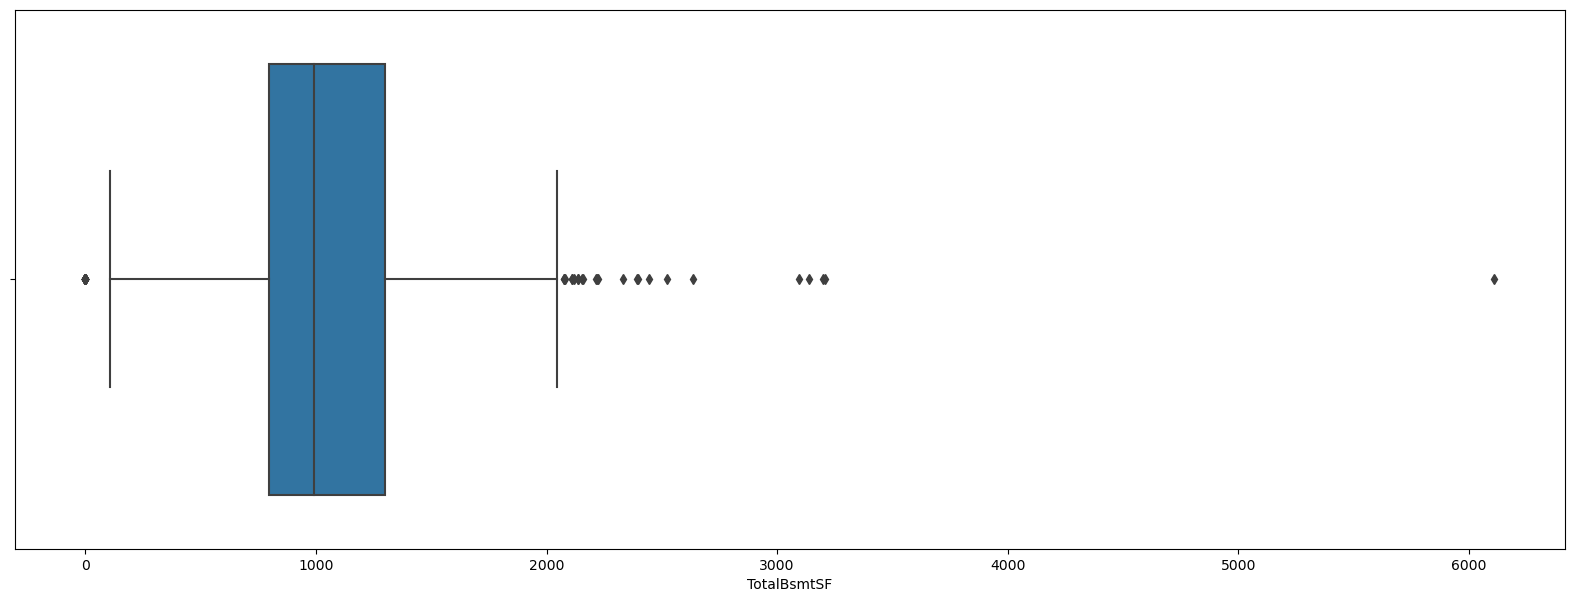

Boxplot of : 1stFlrSF


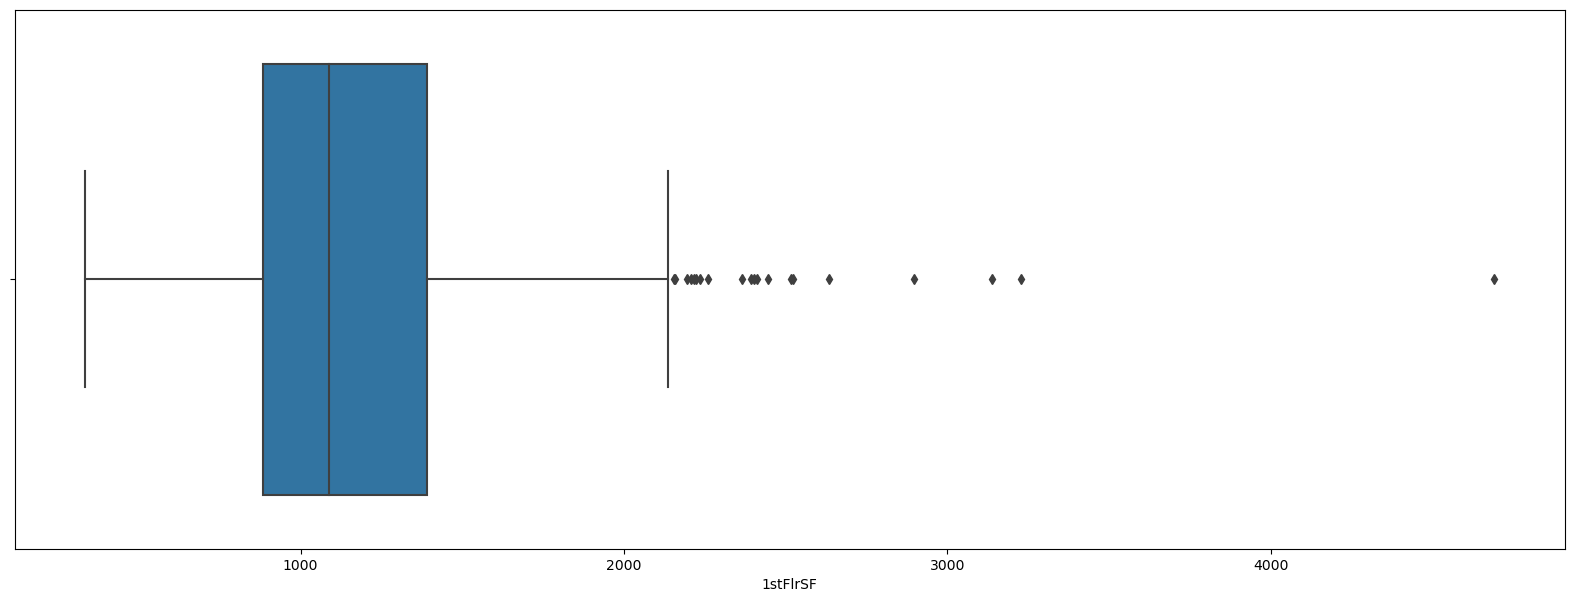

Boxplot of : 2ndFlrSF


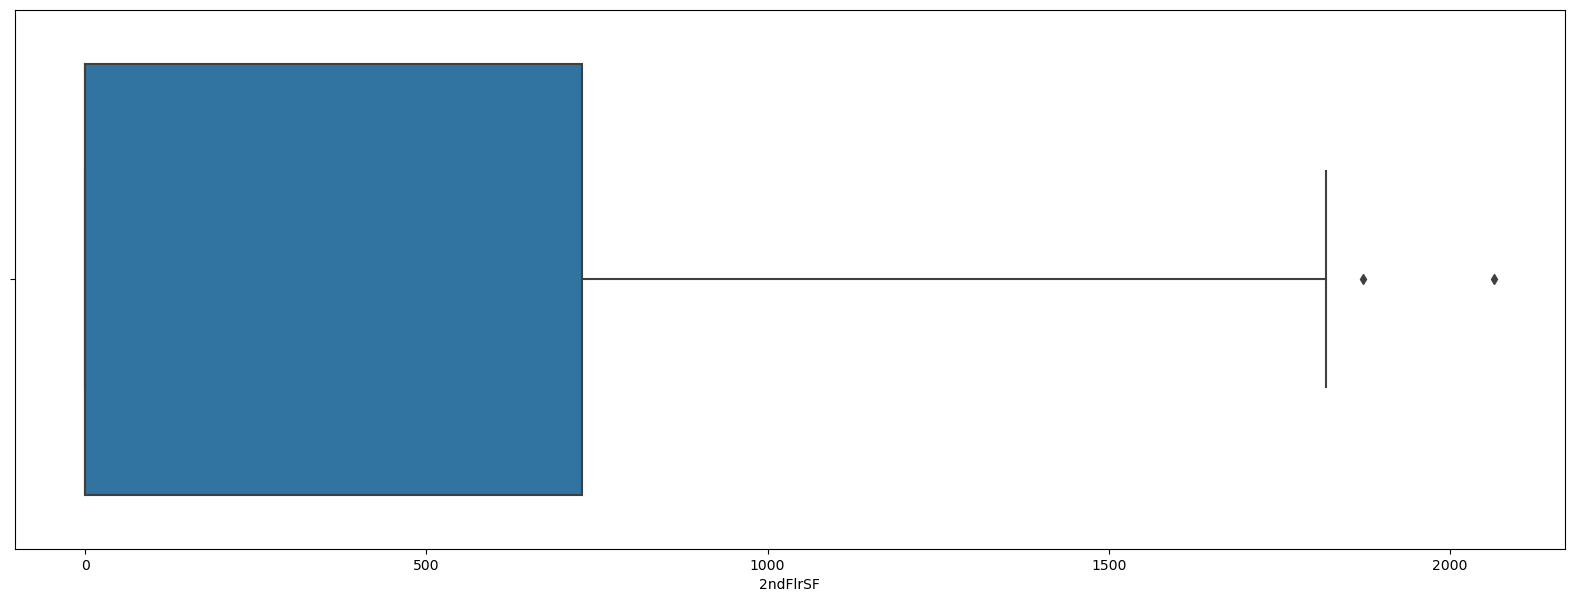

Boxplot of : LowQualFinSF


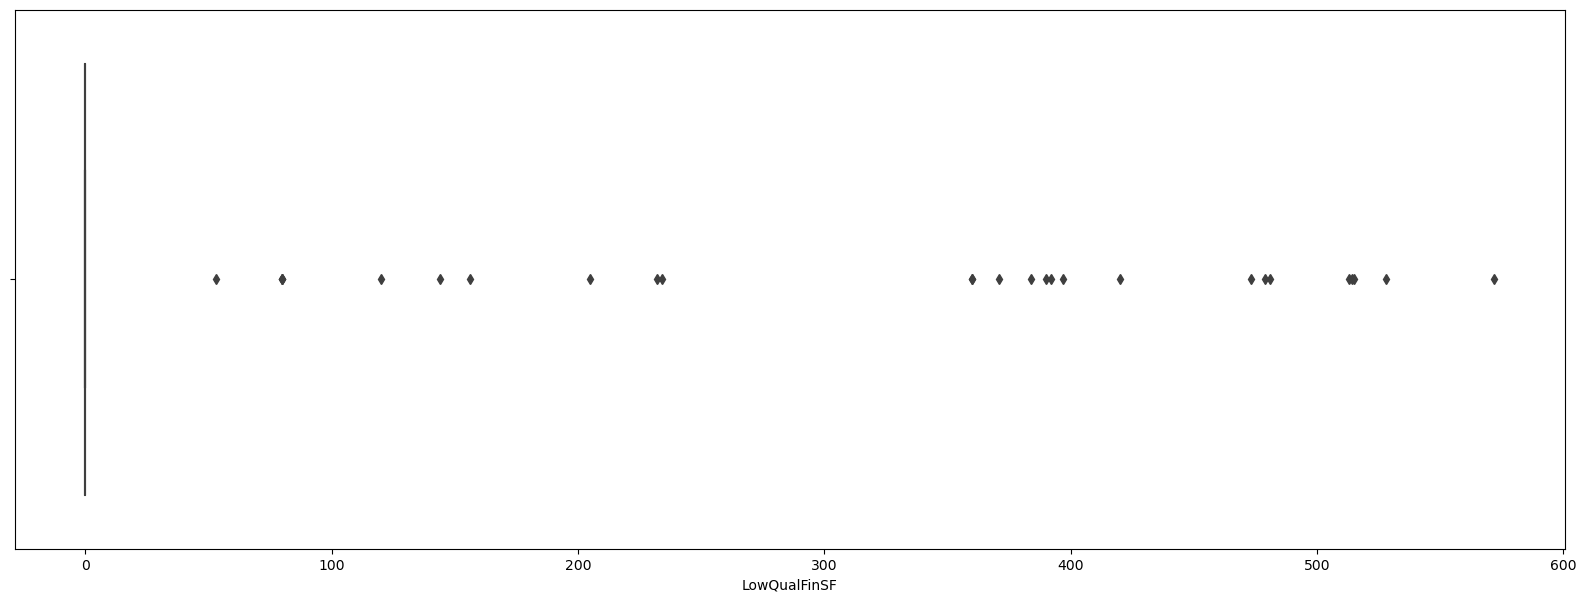

Boxplot of : GrLivArea


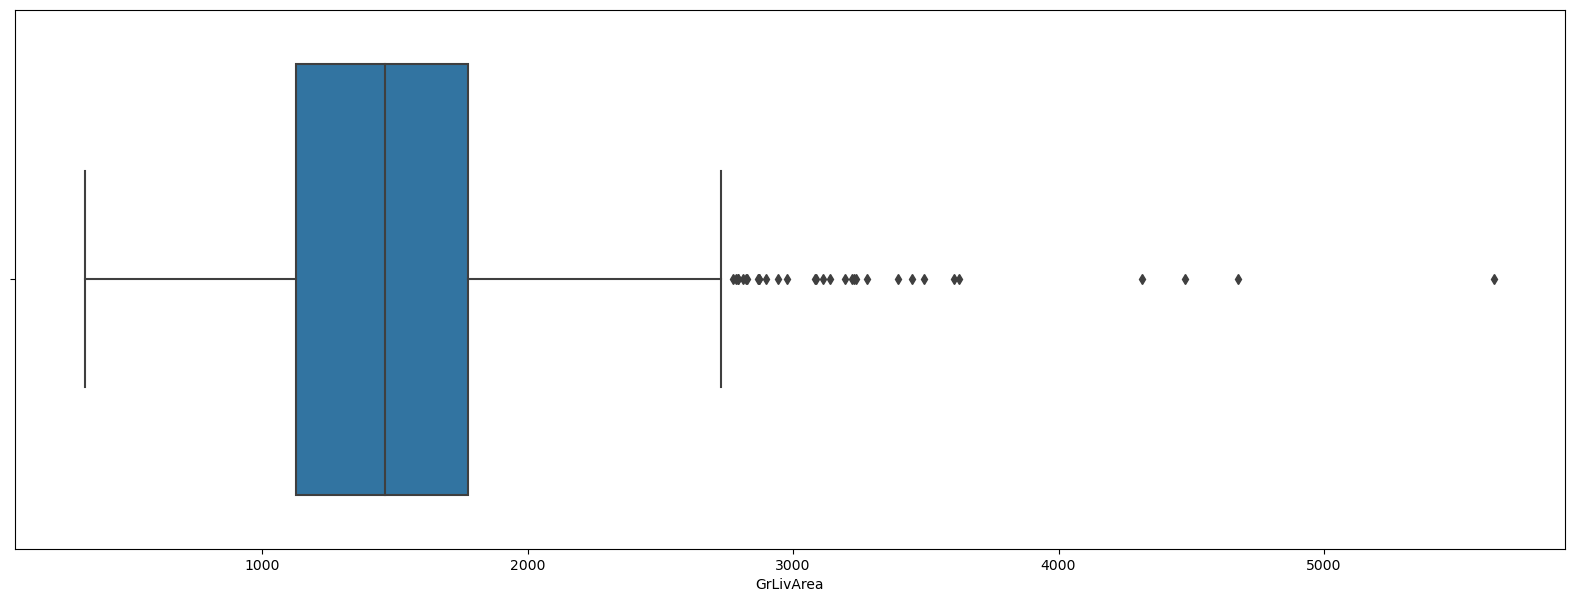

Boxplot of : BsmtFullBath


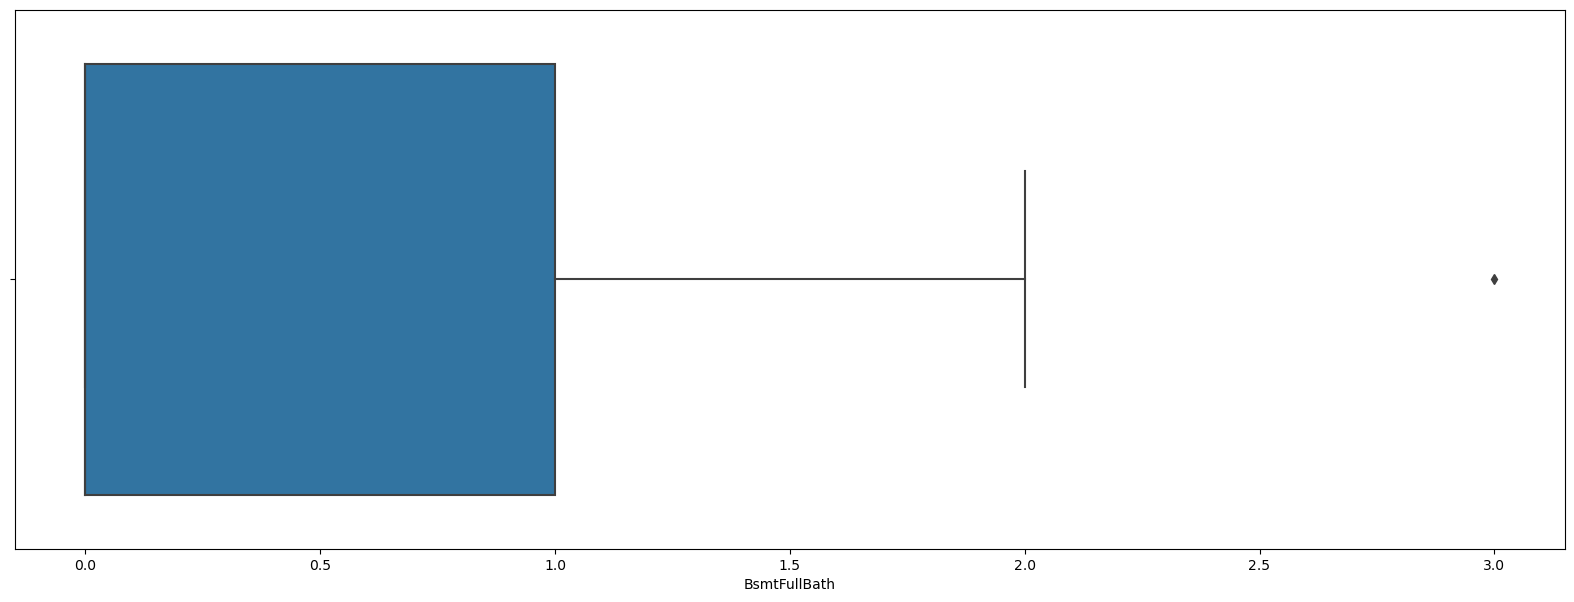

Boxplot of : BsmtHalfBath


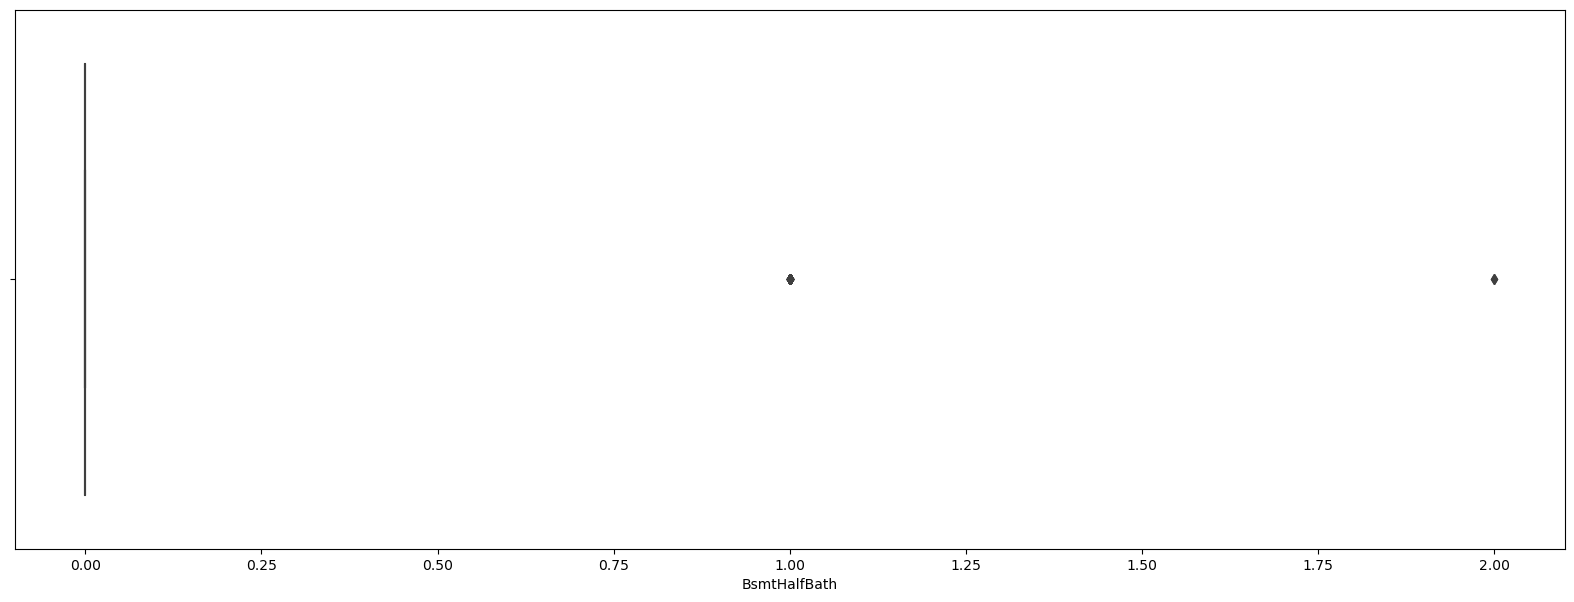

Boxplot of : FullBath


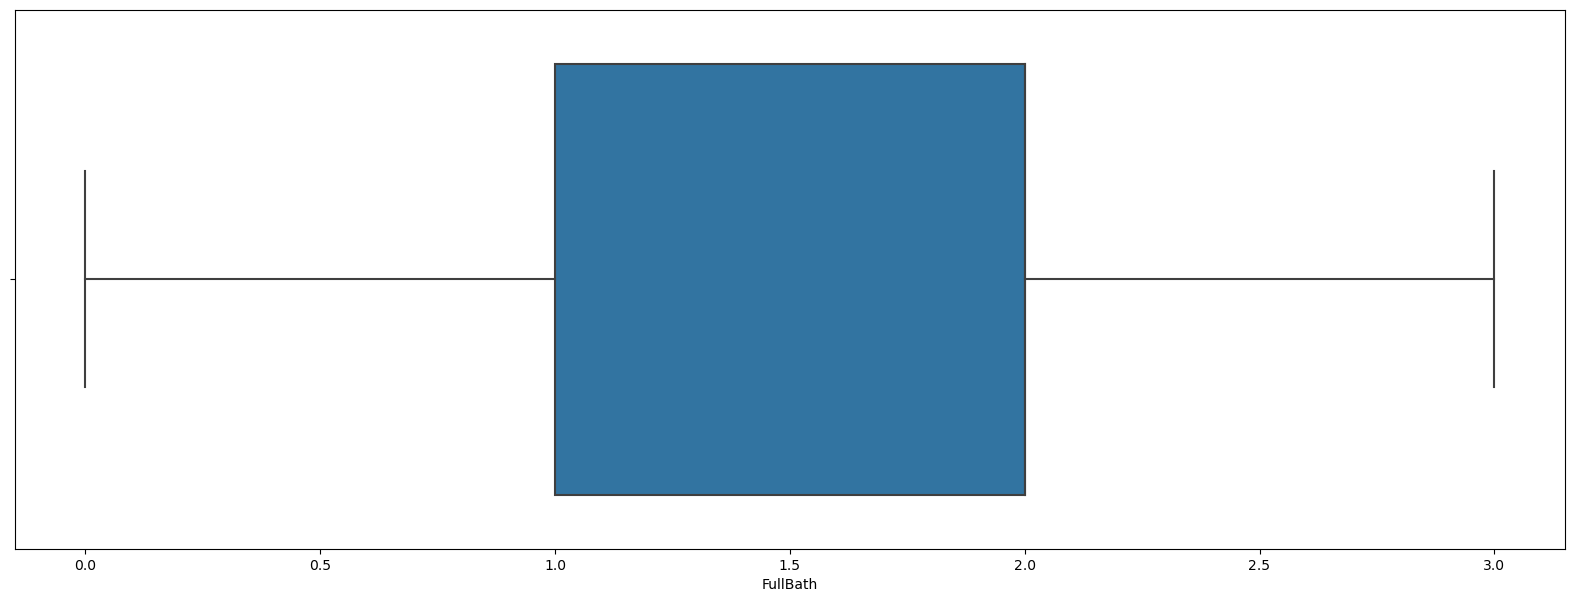

Boxplot of : HalfBath


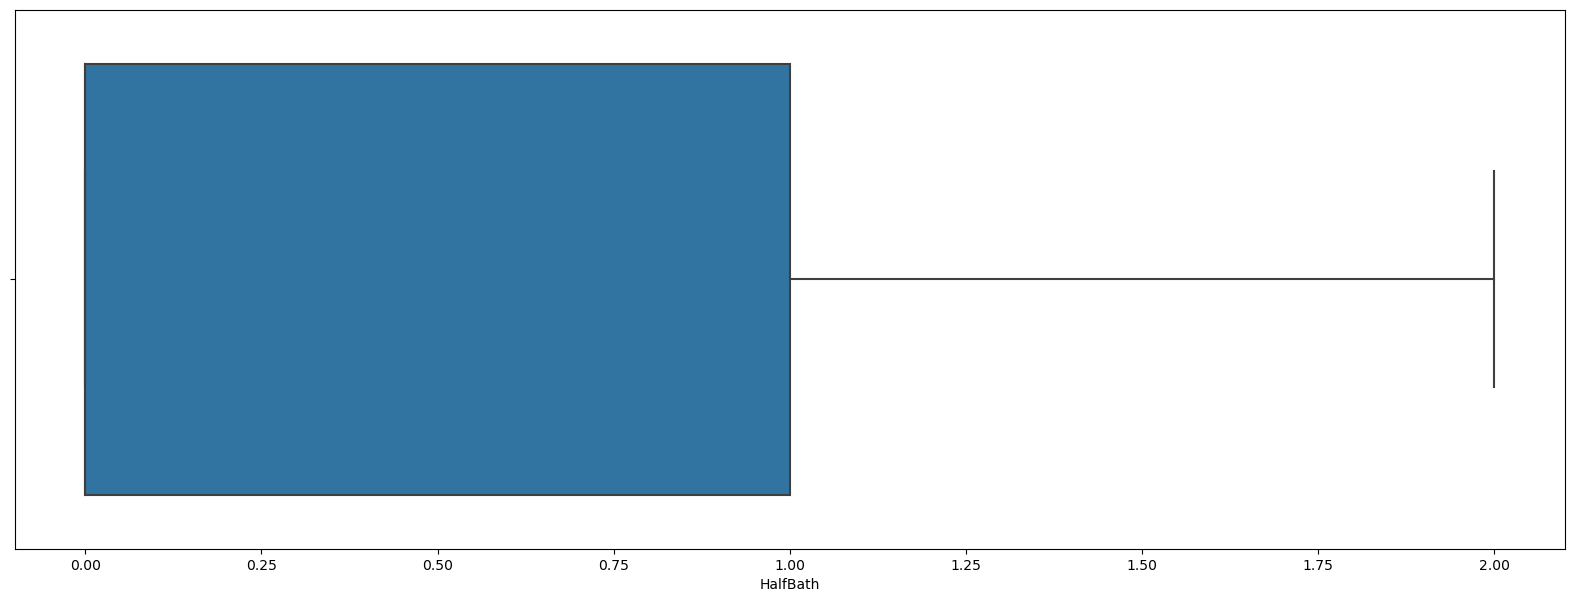

Boxplot of : BedroomAbvGr


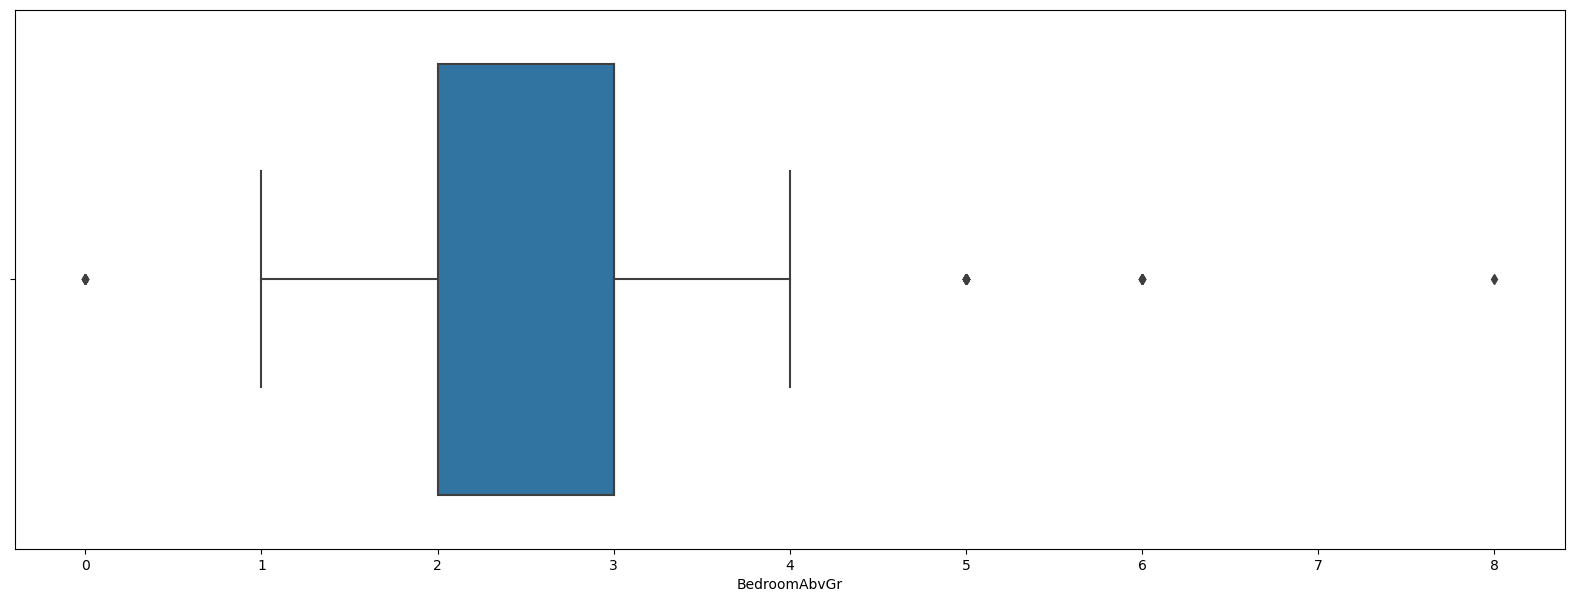

Boxplot of : KitchenAbvGr


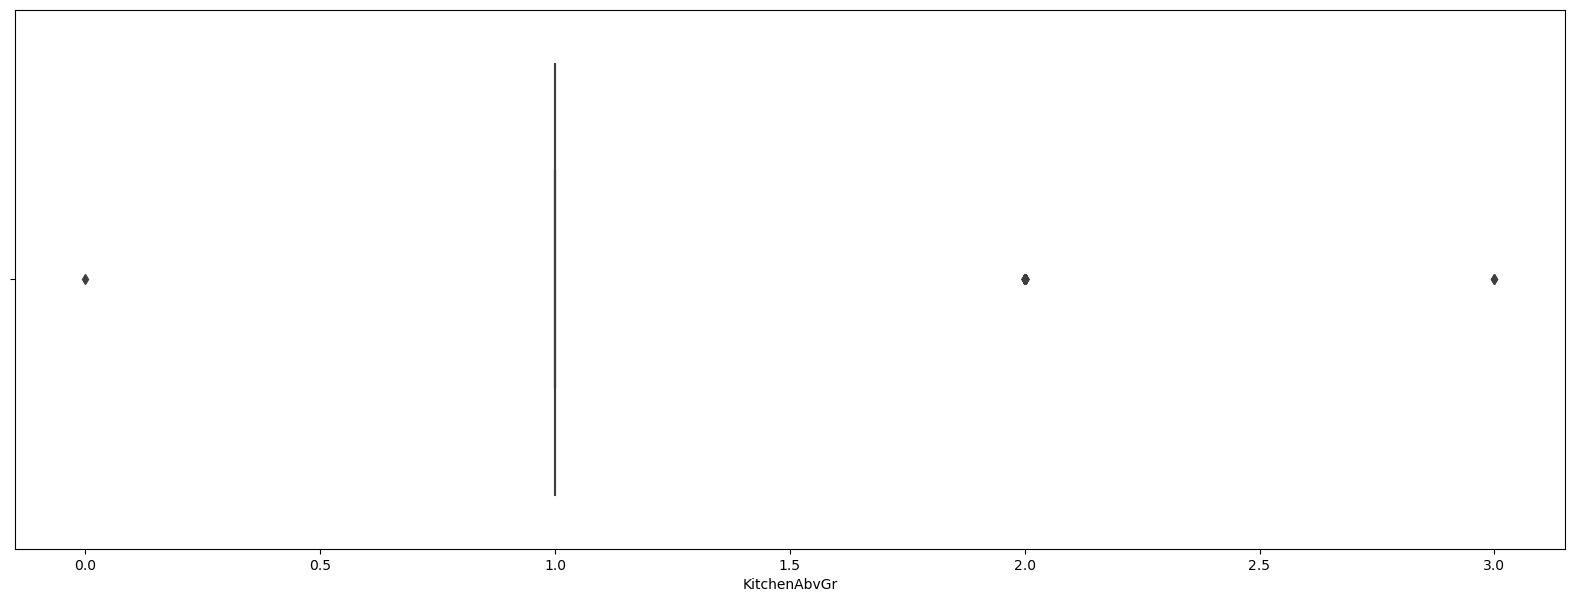

Boxplot of : TotRmsAbvGrd


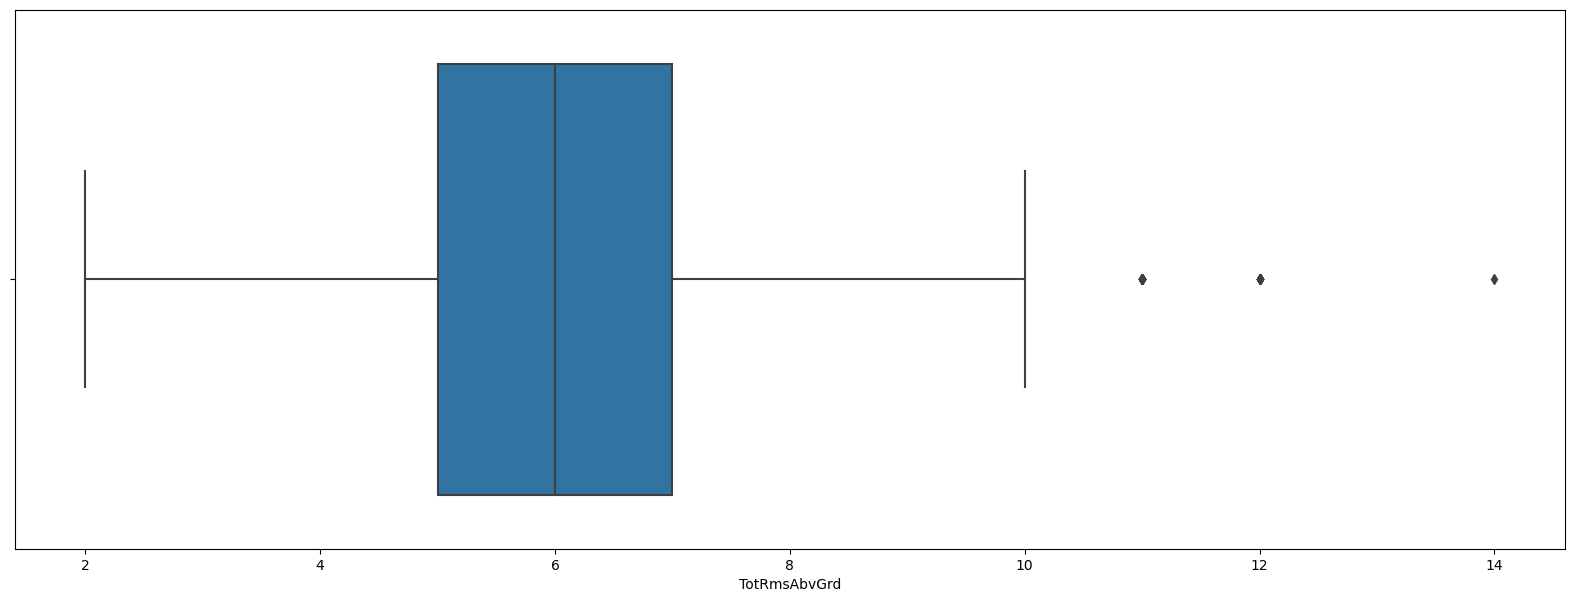

Boxplot of : Fireplaces


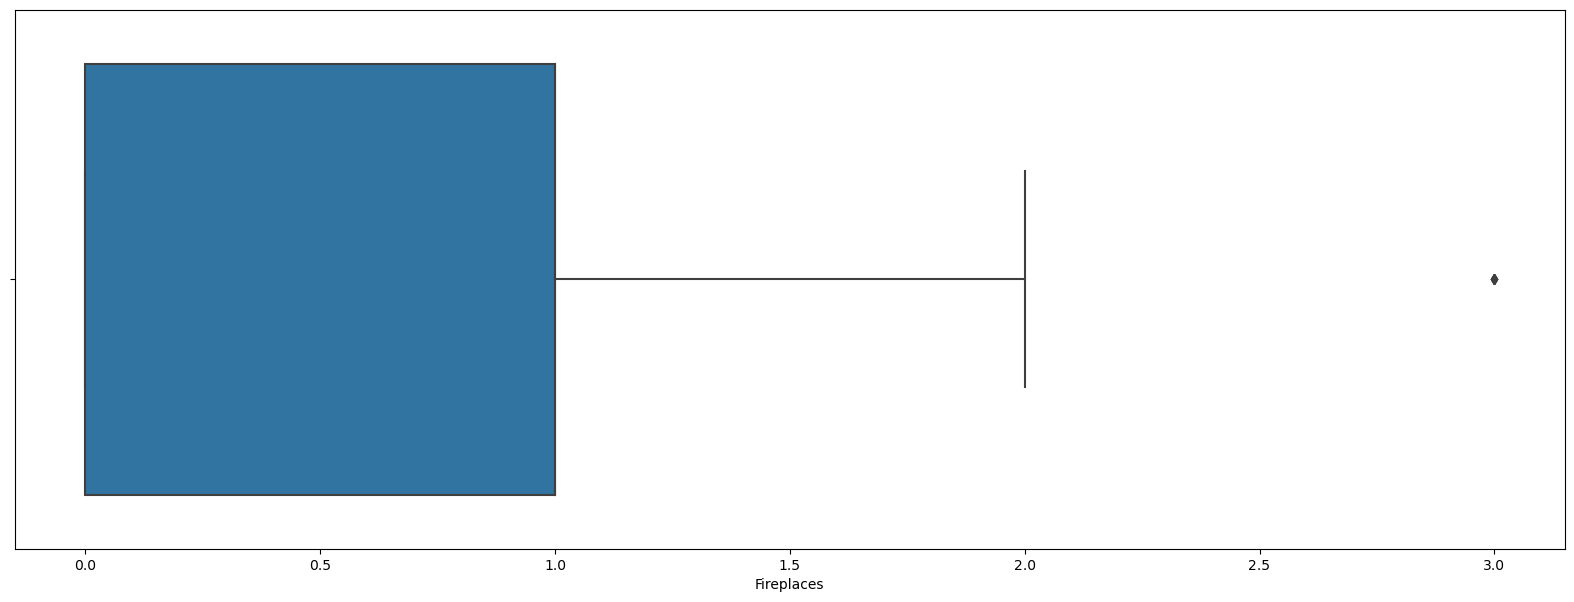

Boxplot of : GarageYrBlt


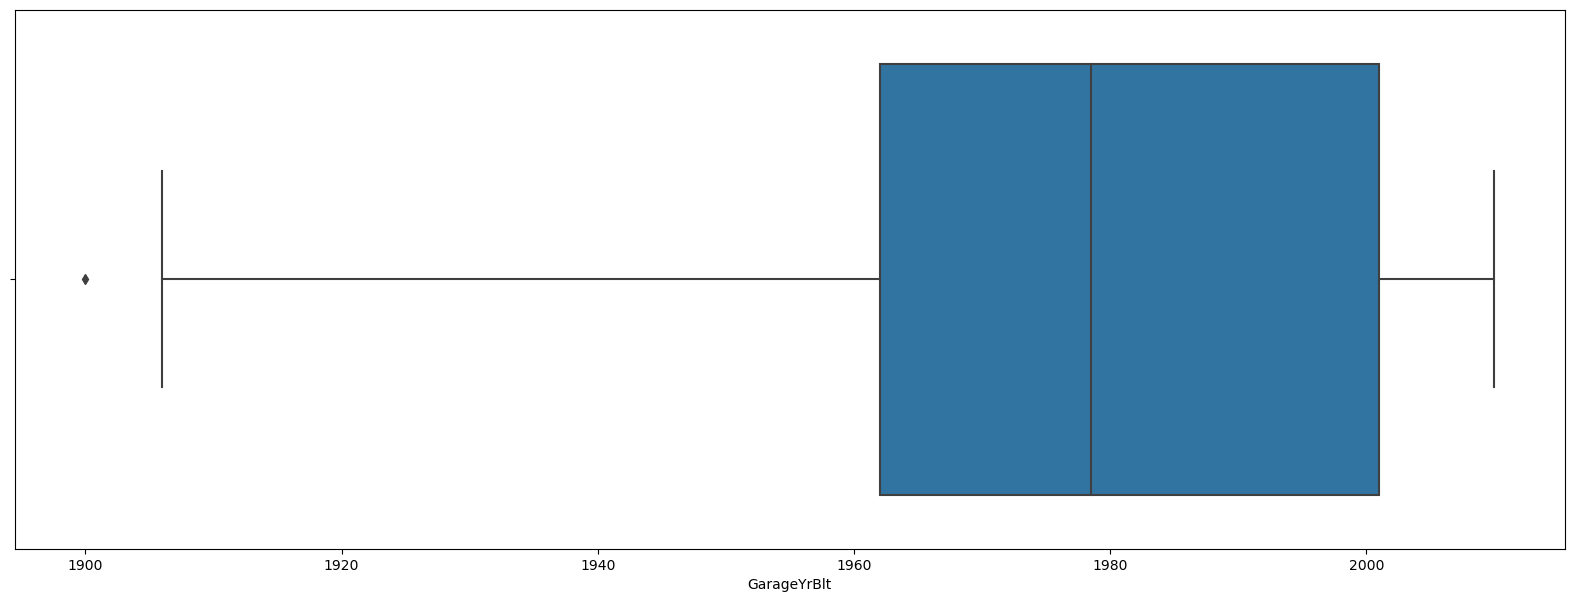

Boxplot of : GarageCars


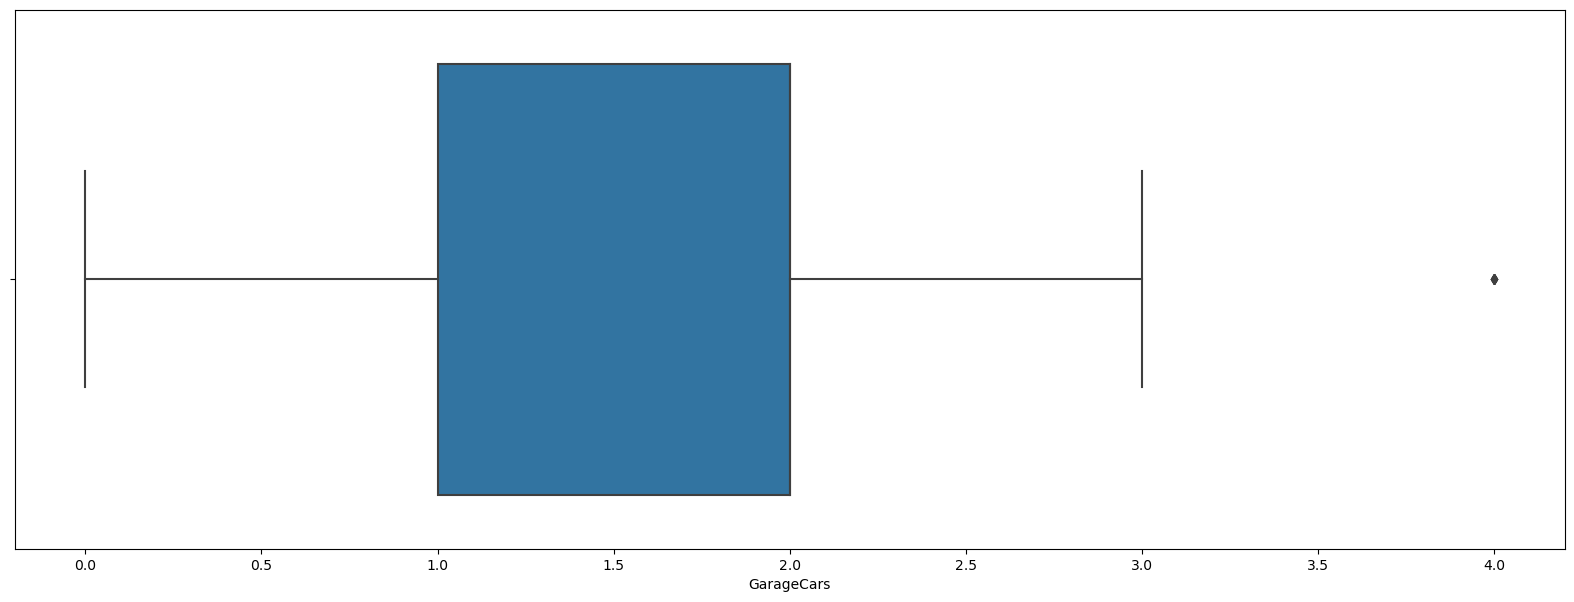

Boxplot of : GarageArea


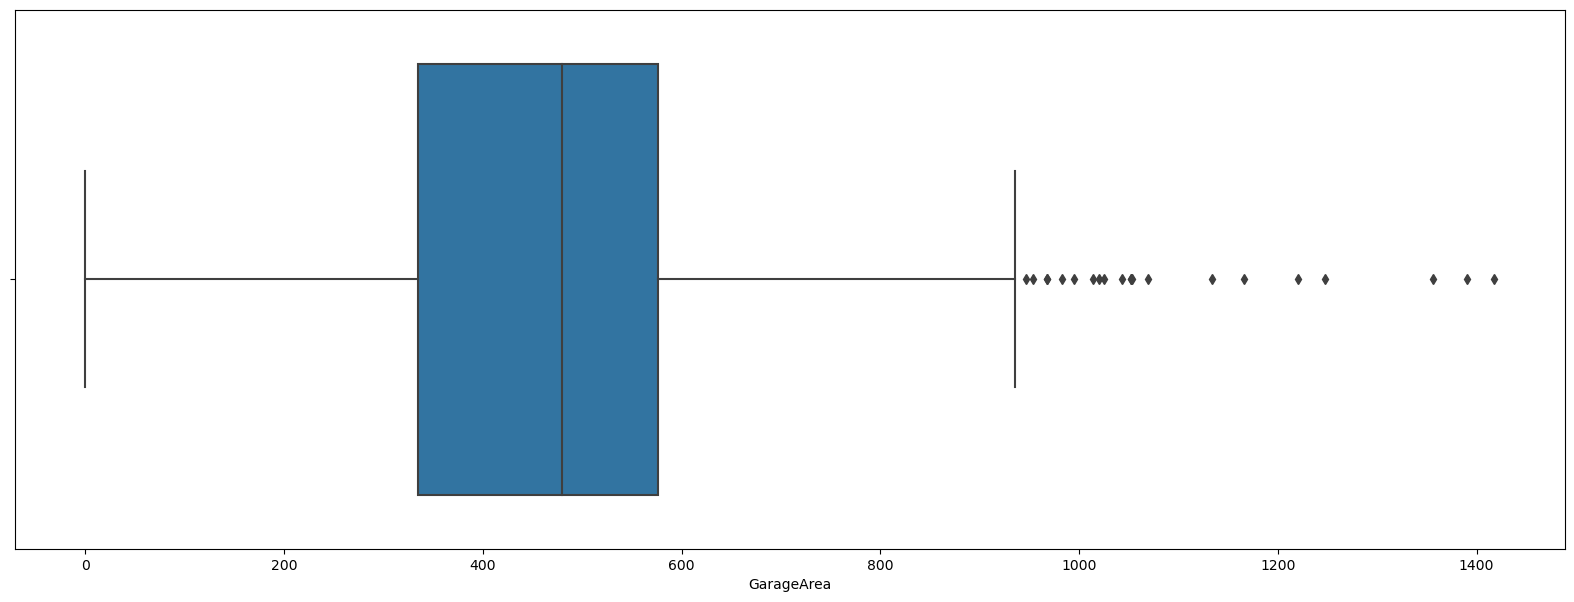

Boxplot of : WoodDeckSF


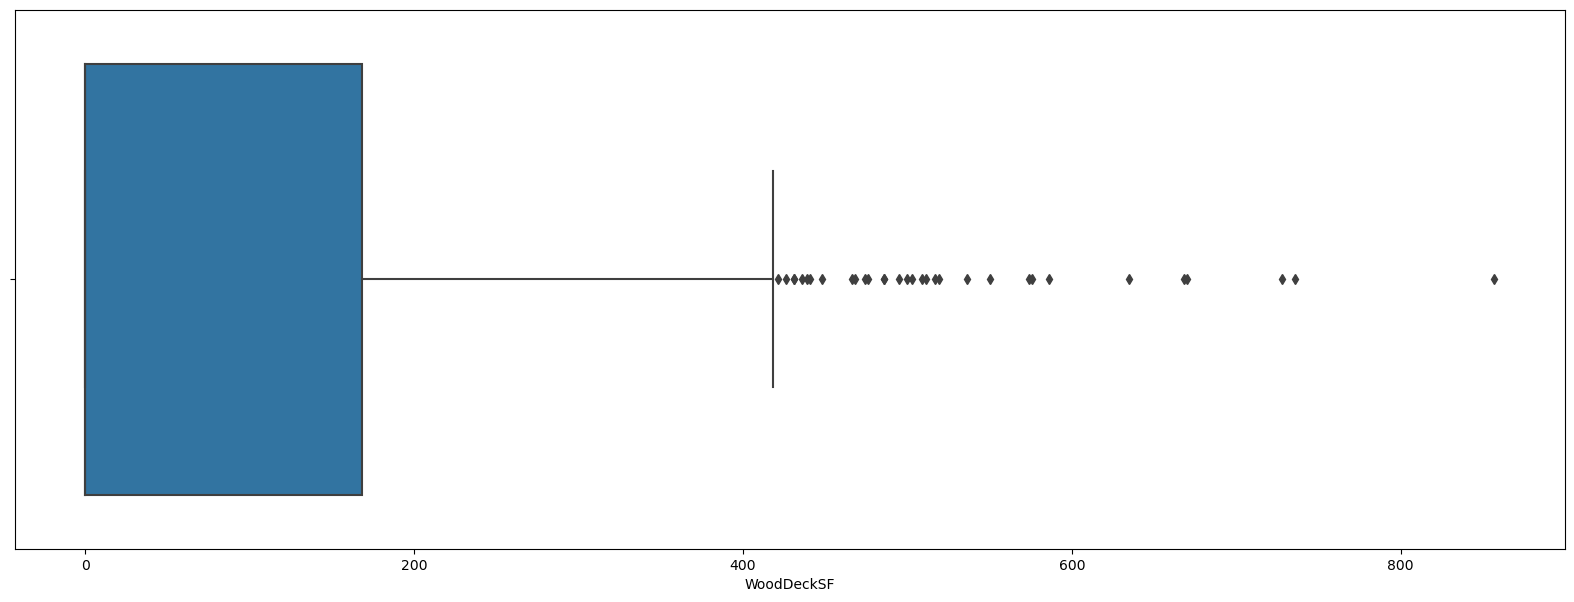

Boxplot of : OpenPorchSF


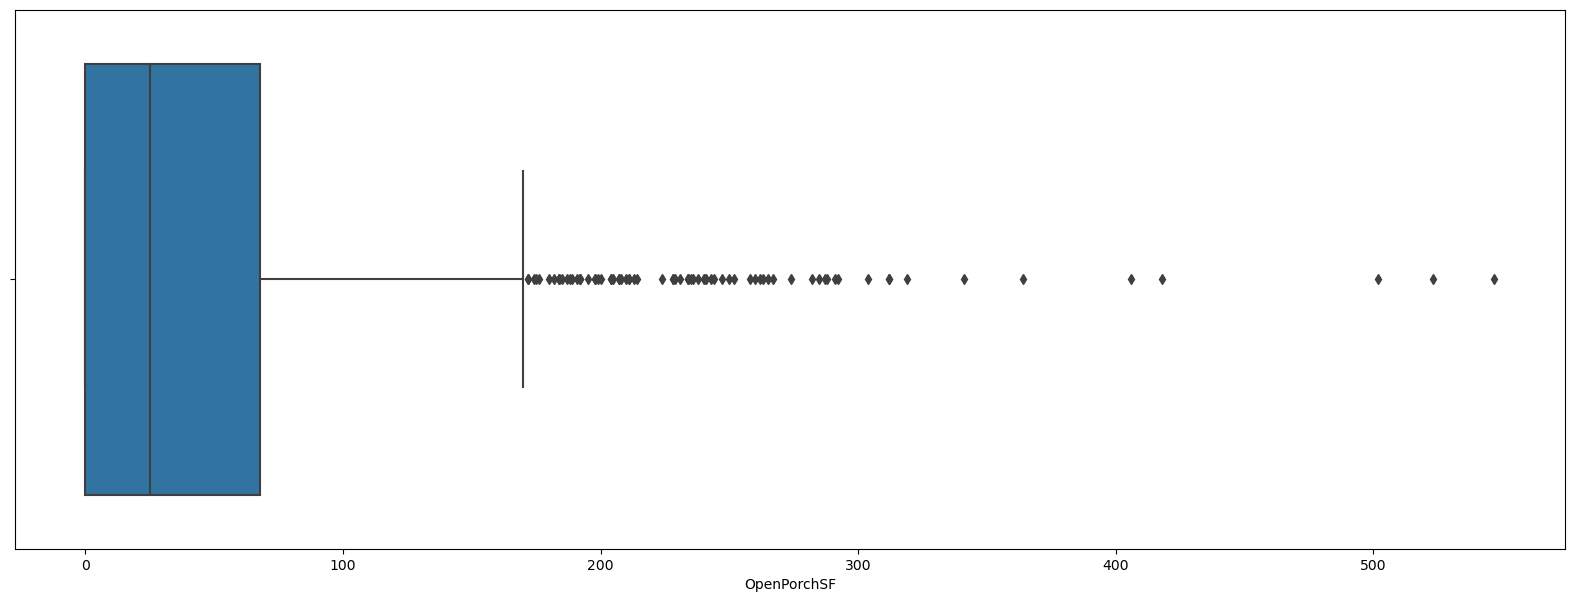

Boxplot of : EnclosedPorch


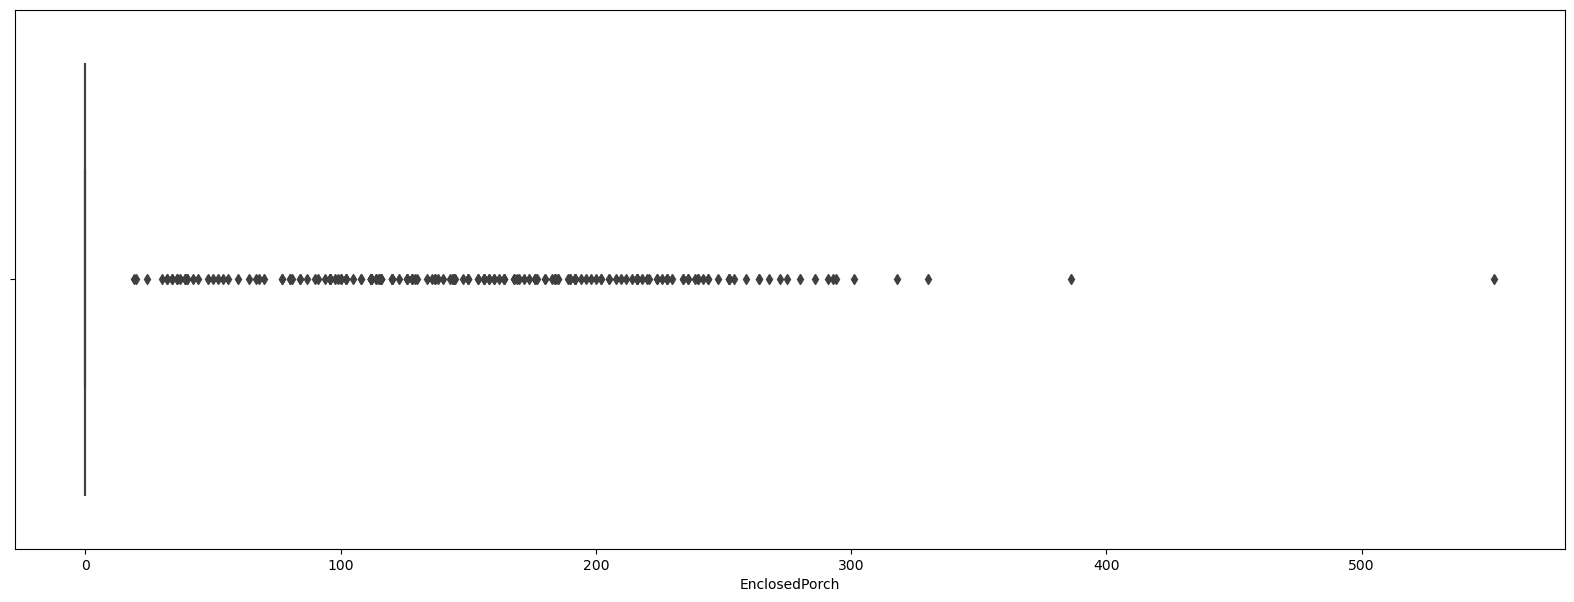

Boxplot of : 3SsnPorch


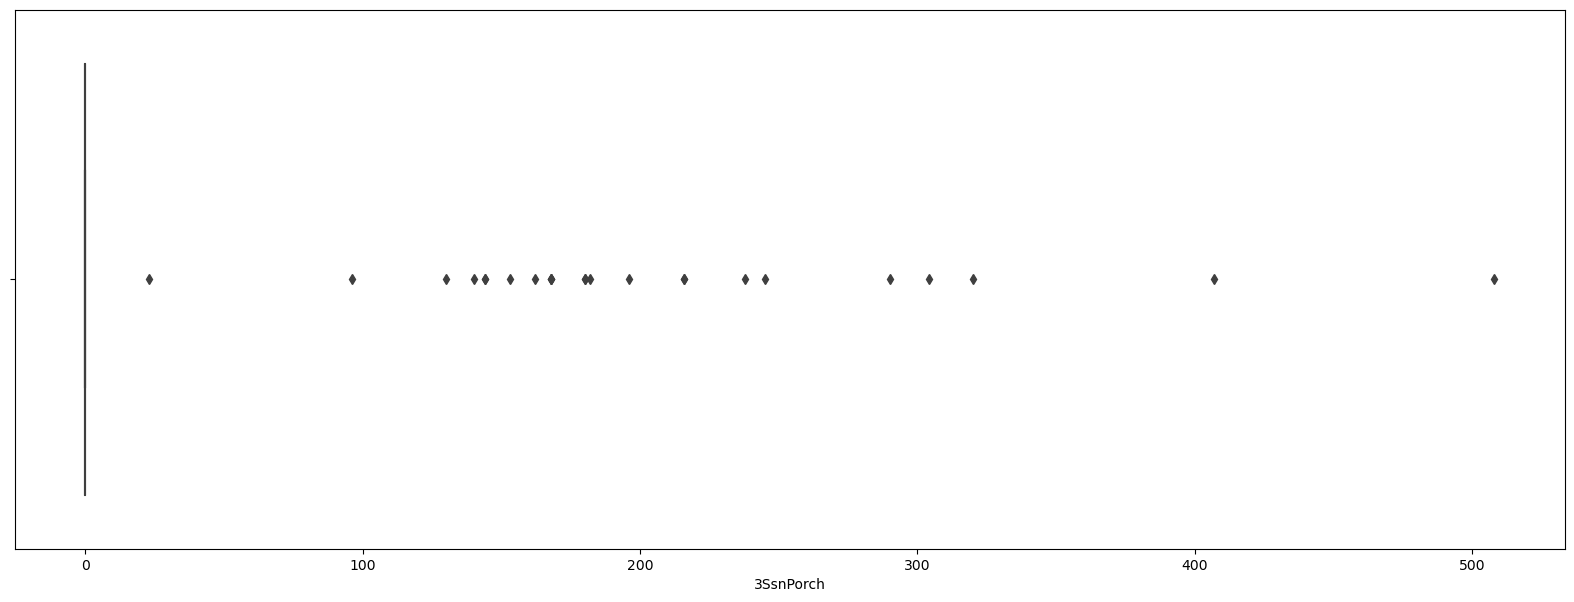

Boxplot of : ScreenPorch


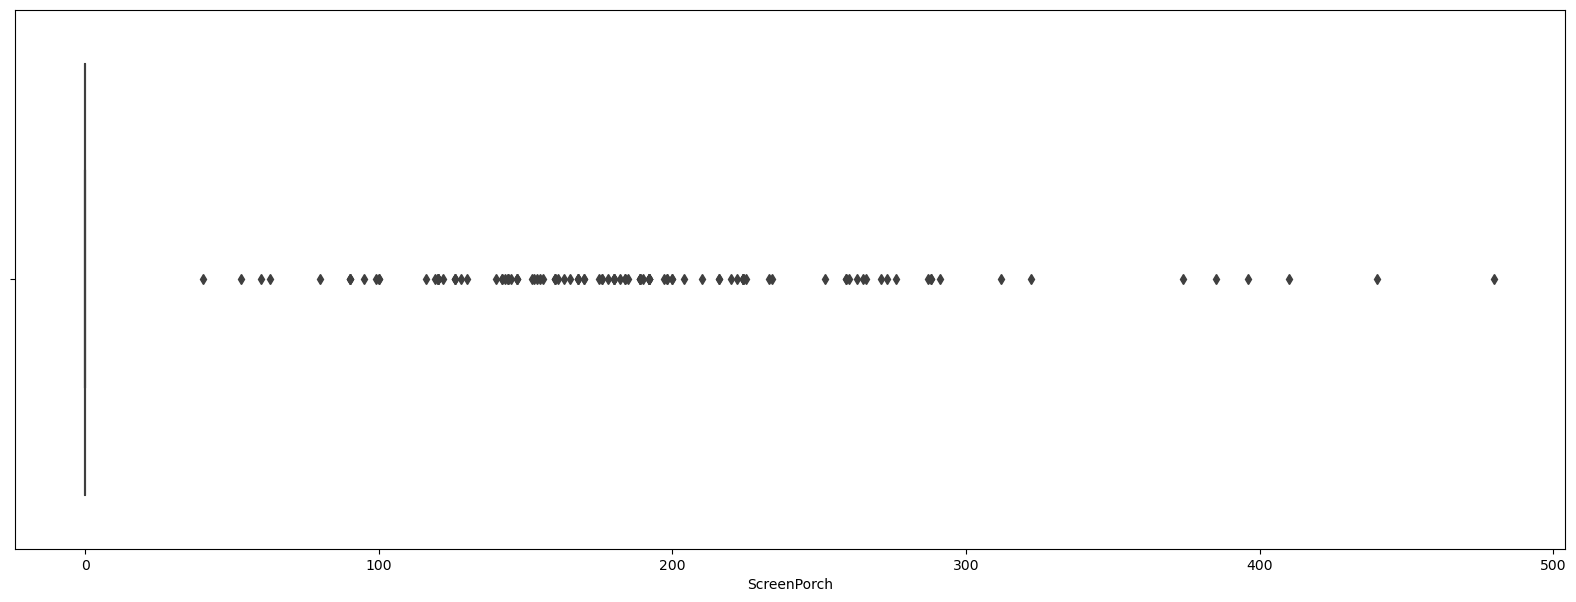

Boxplot of : PoolArea


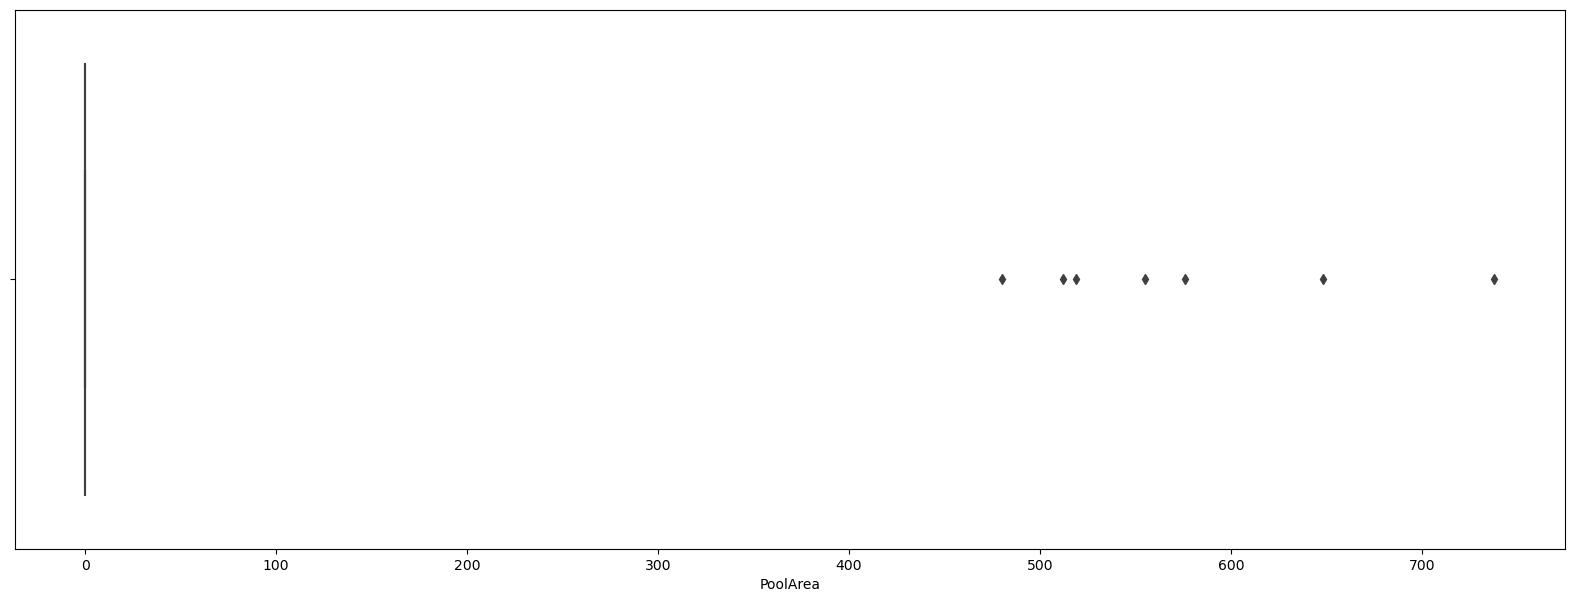

Boxplot of : MiscVal


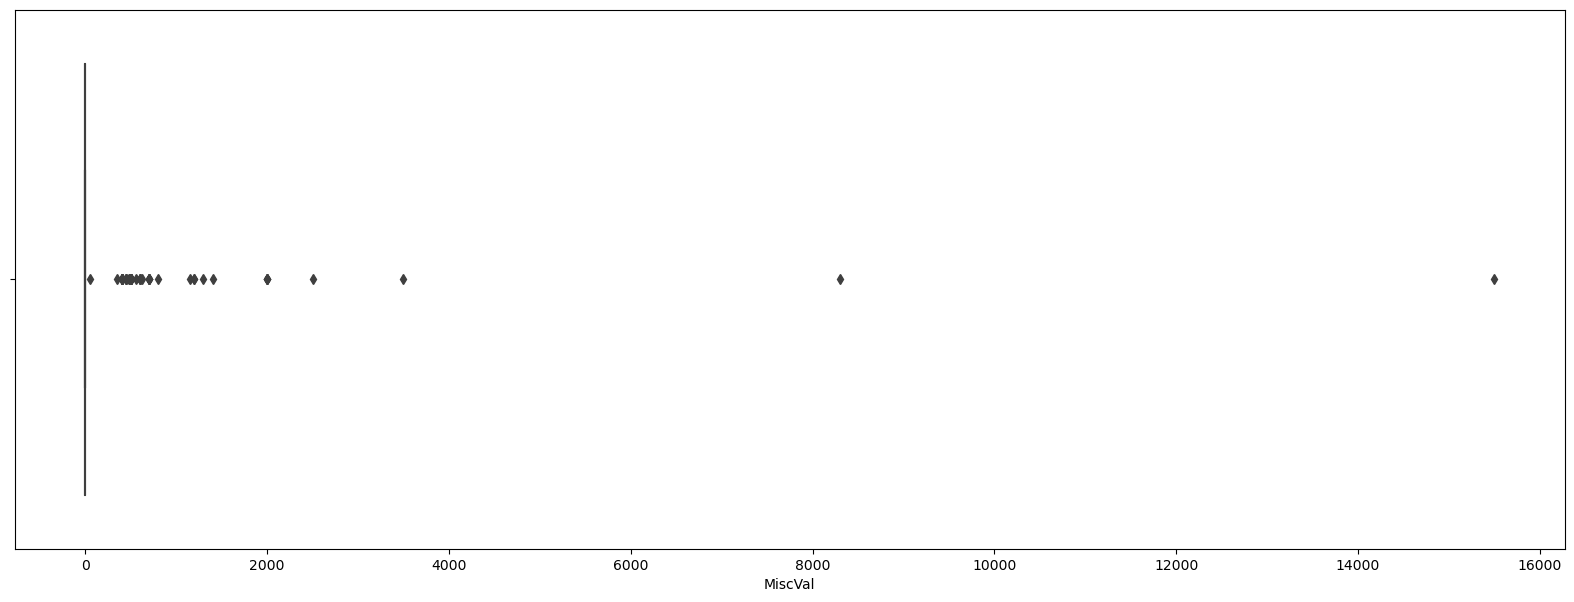

Boxplot of : MoSold


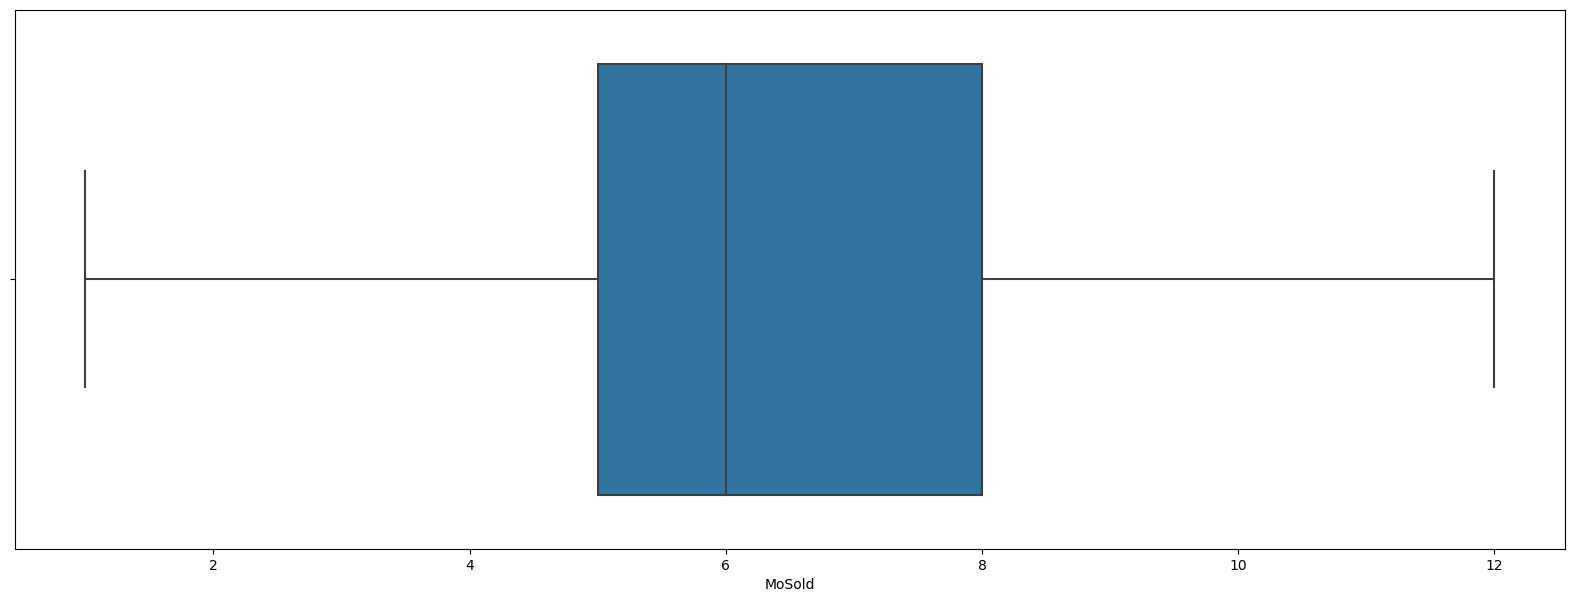

Boxplot of : YrSold


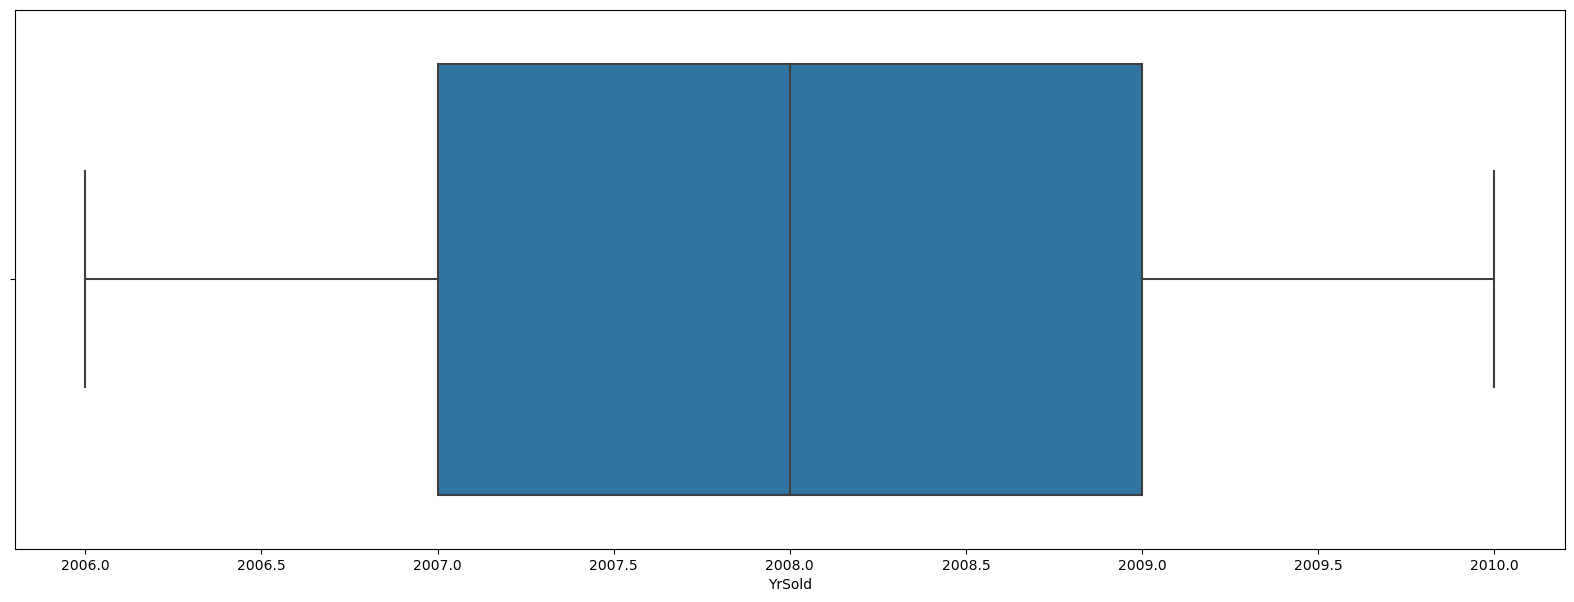

Boxplot of : SalePrice


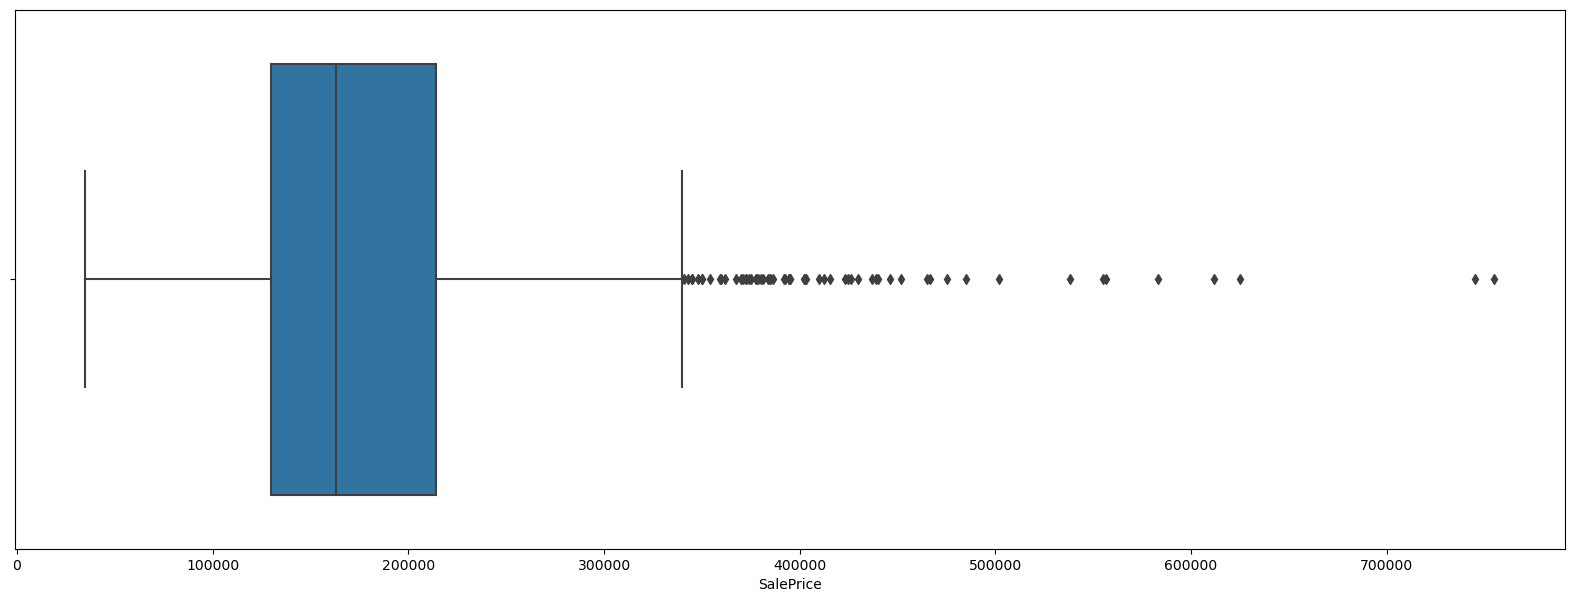

In [76]:
for i in numerical_features:
    print('Boxplot of :', i)
    plt.figure(figsize=(20,7))
    sns.boxplot(x=data[i])
    plt.show()

#### As we can see from the graph, there are many outliers in the numerical features which need to be removed

KDE plot of : Id


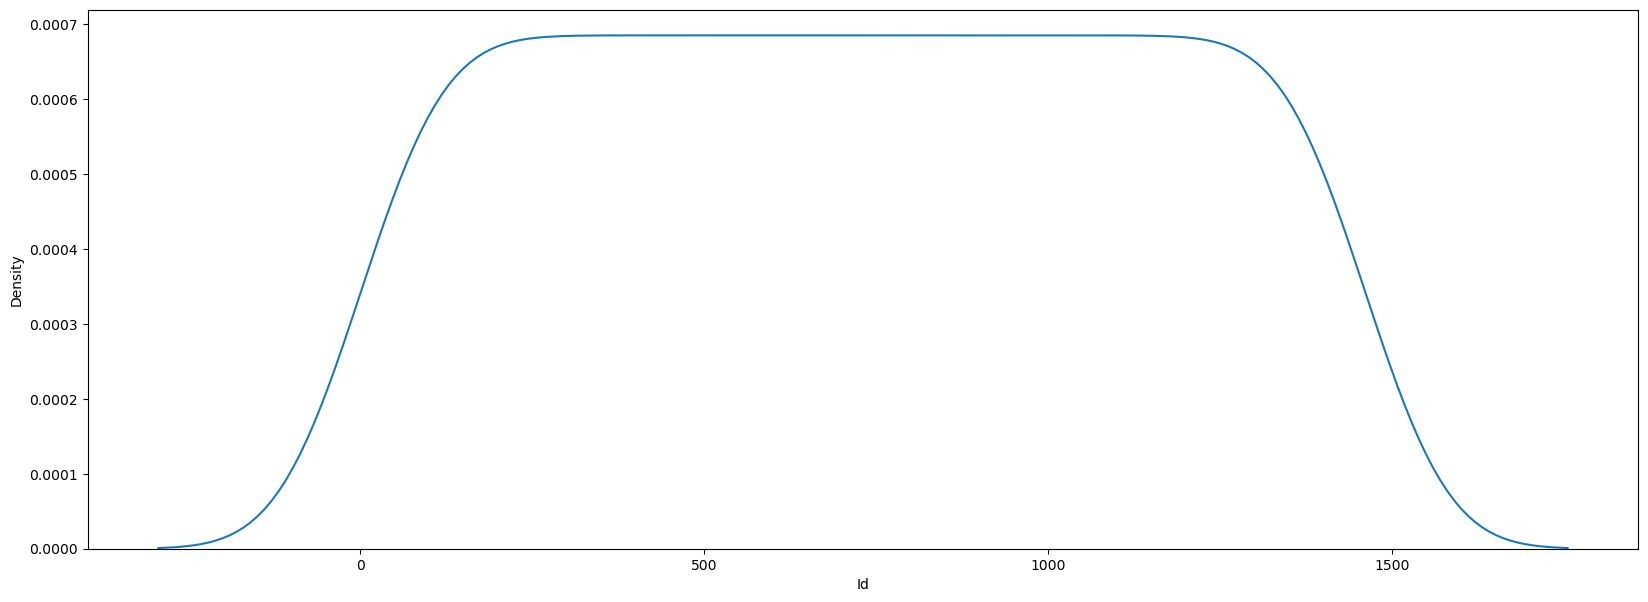

KDE plot of : MSSubClass


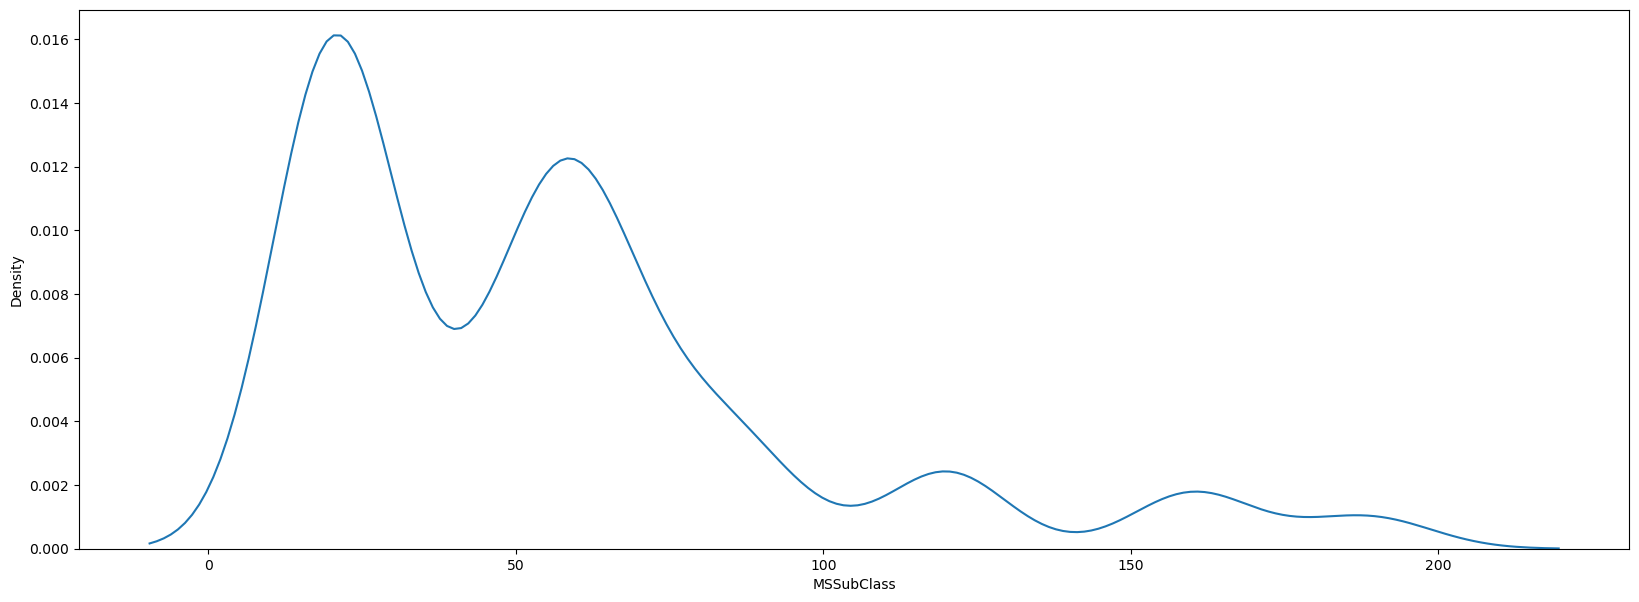

KDE plot of : LotFrontage


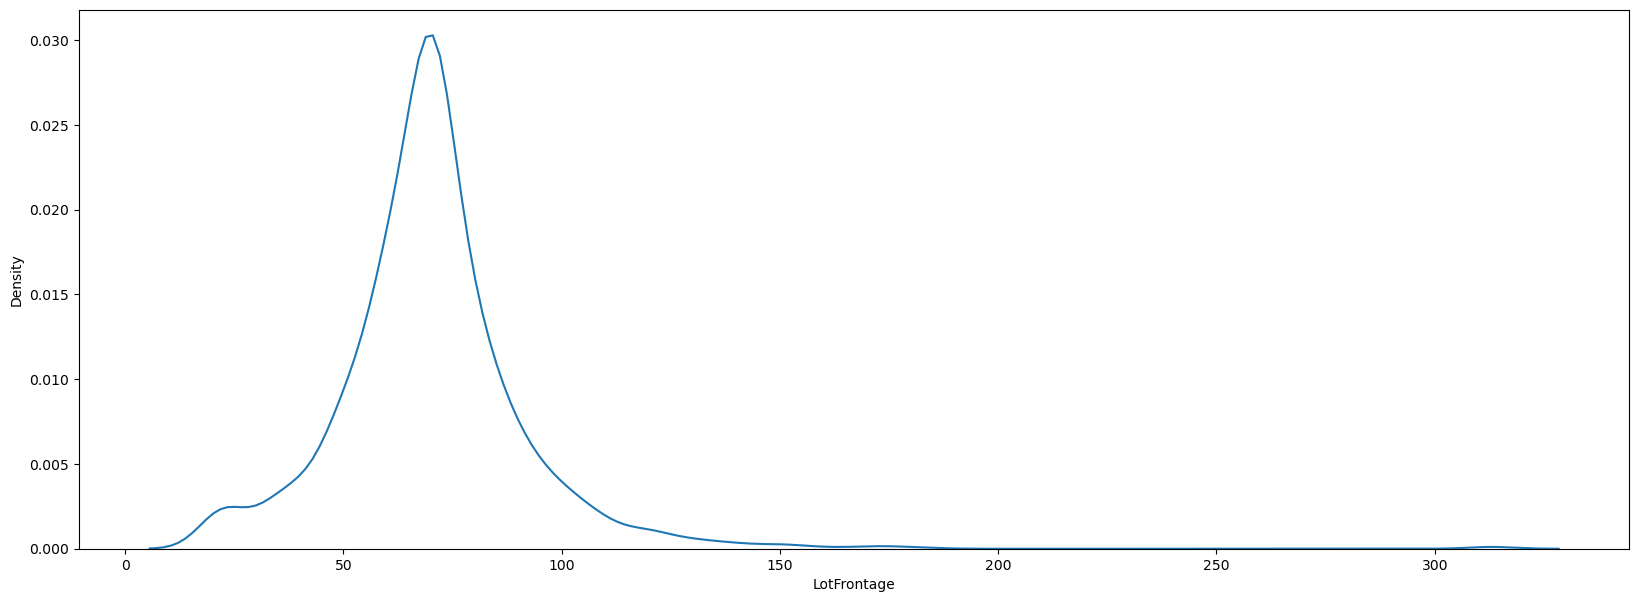

KDE plot of : LotArea


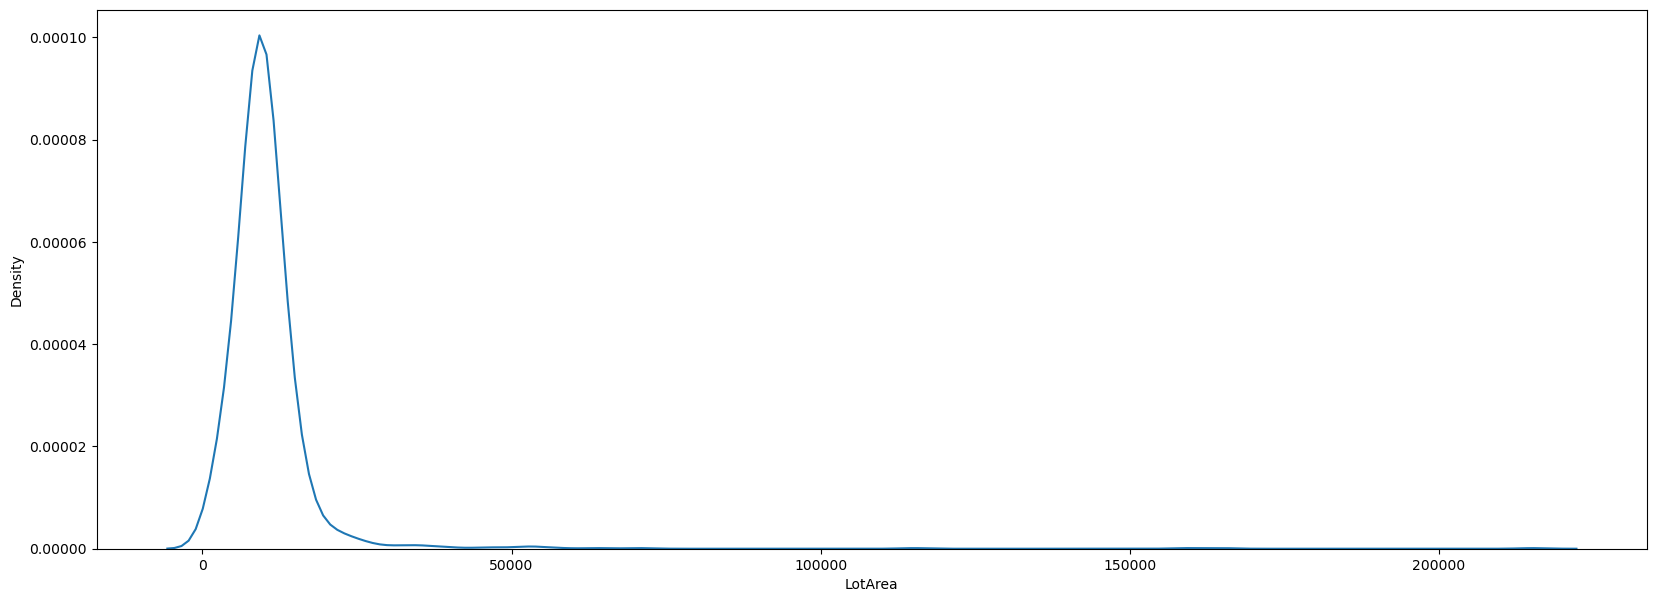

KDE plot of : OverallQual


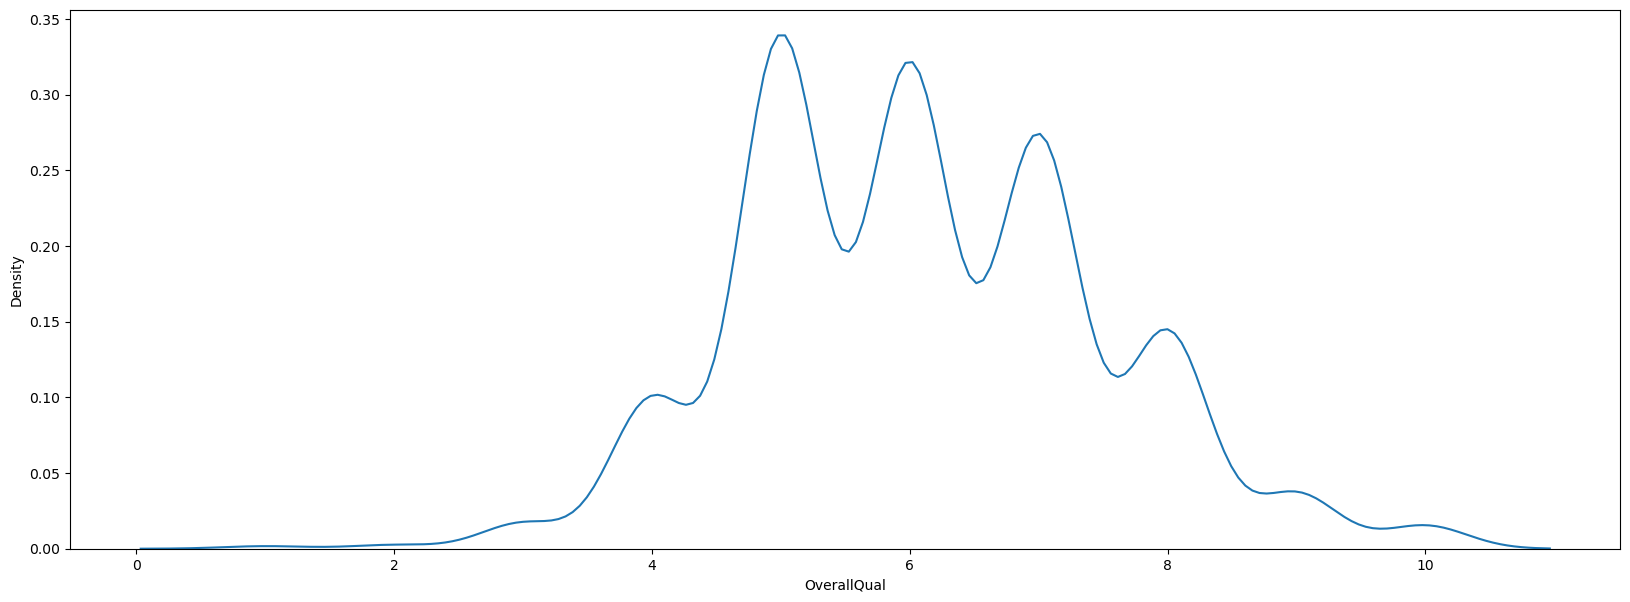

KDE plot of : OverallCond


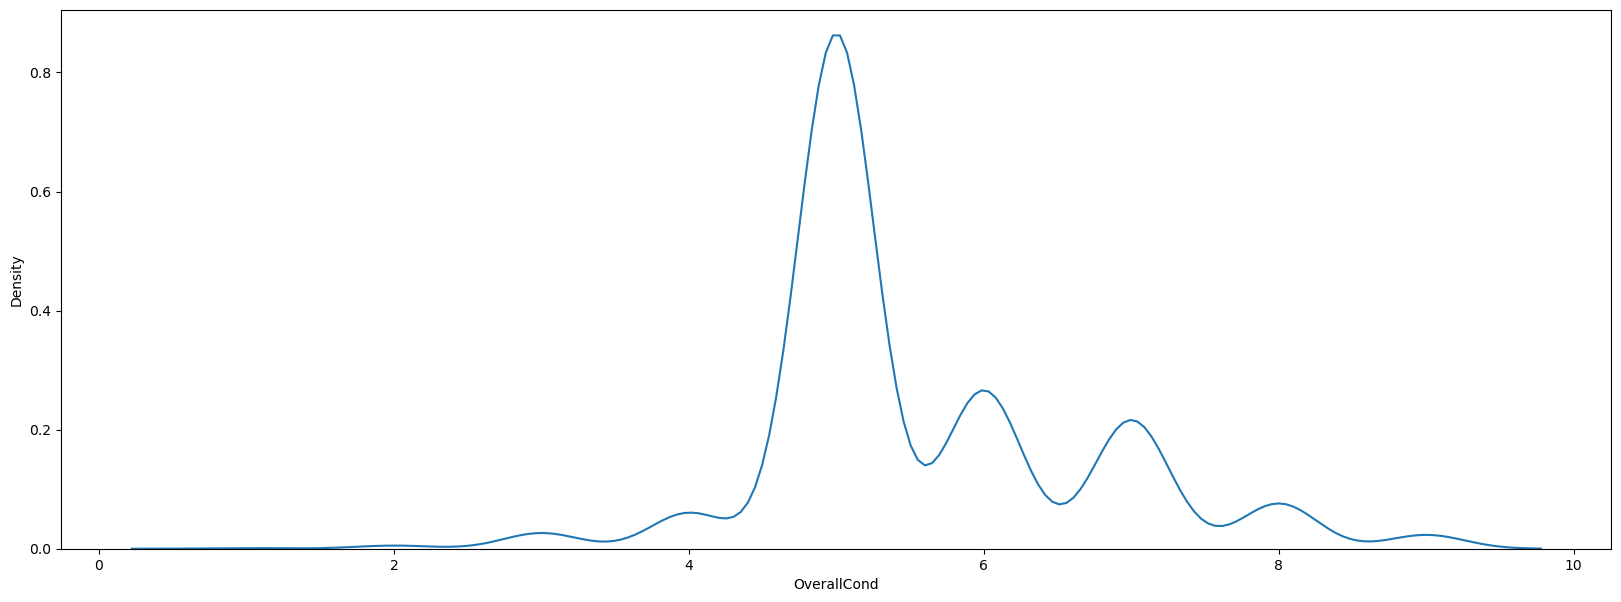

KDE plot of : YearBuilt


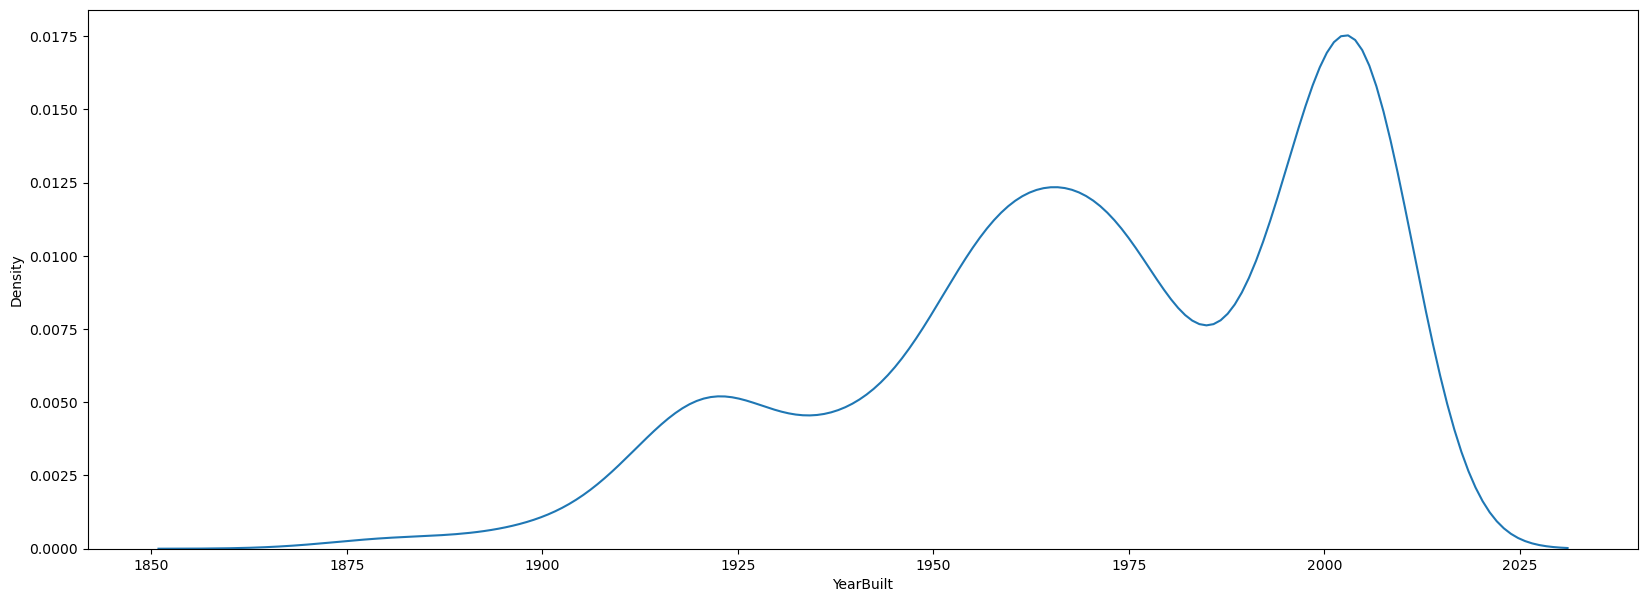

KDE plot of : YearRemodAdd


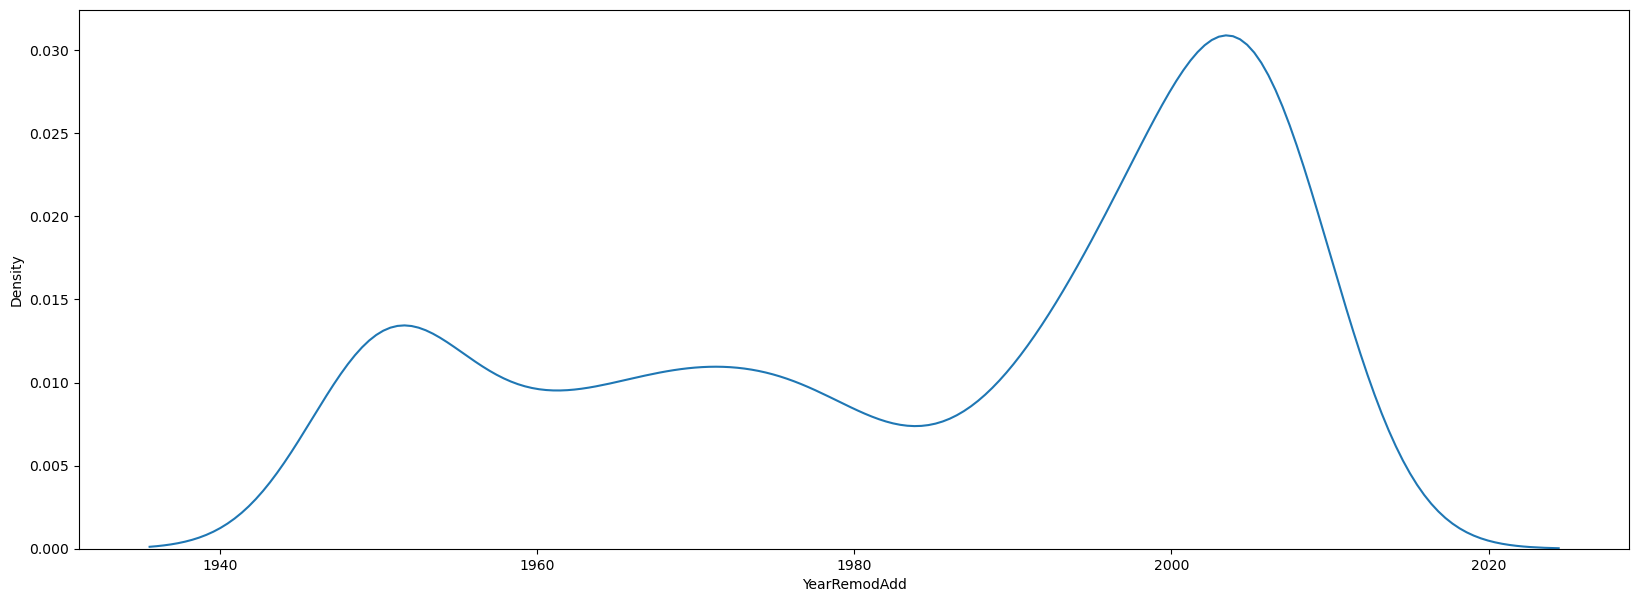

KDE plot of : MasVnrArea


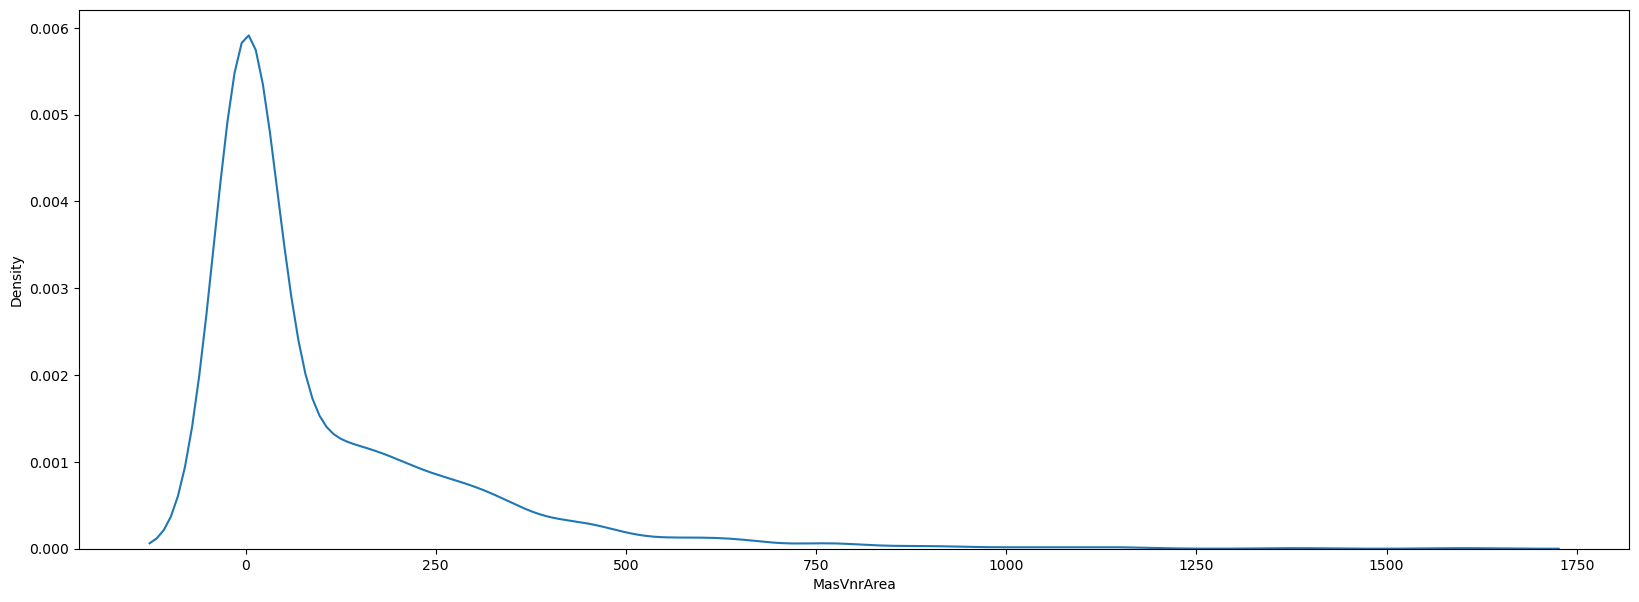

KDE plot of : BsmtFinSF1


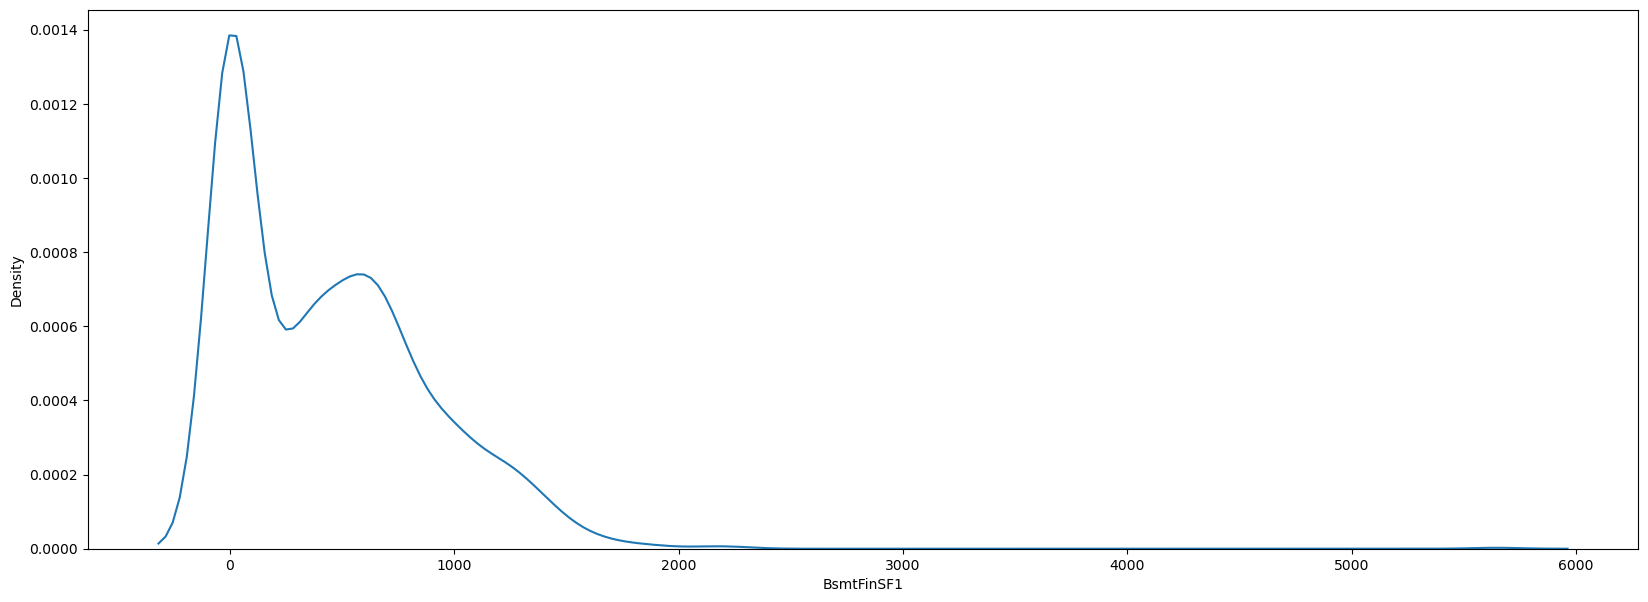

KDE plot of : BsmtFinSF2


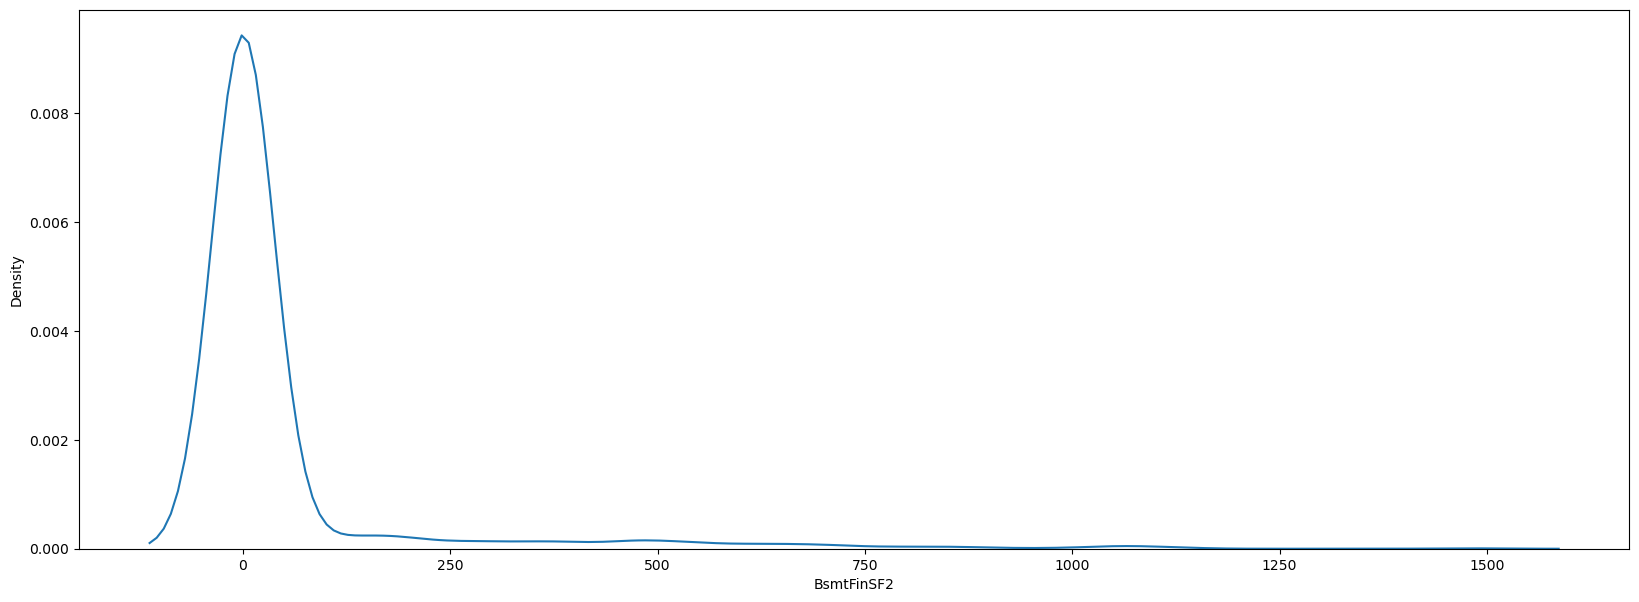

KDE plot of : BsmtUnfSF


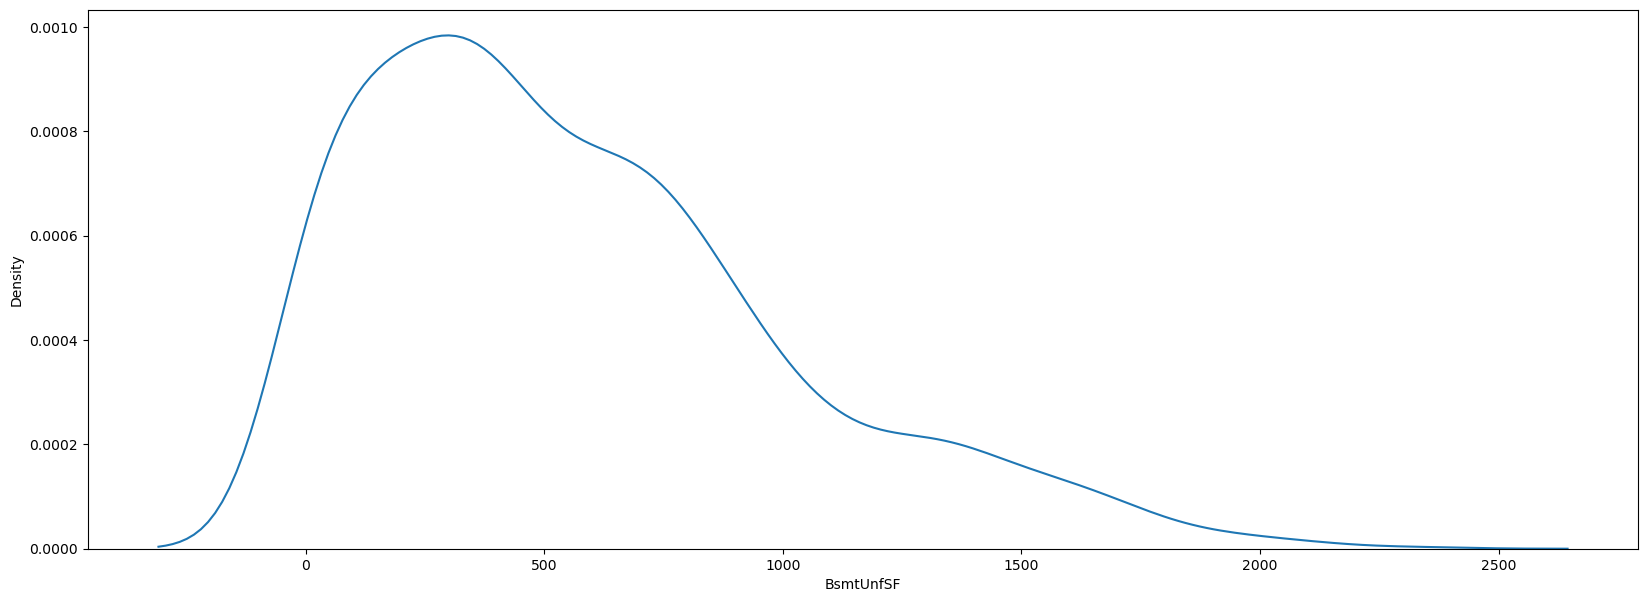

KDE plot of : TotalBsmtSF


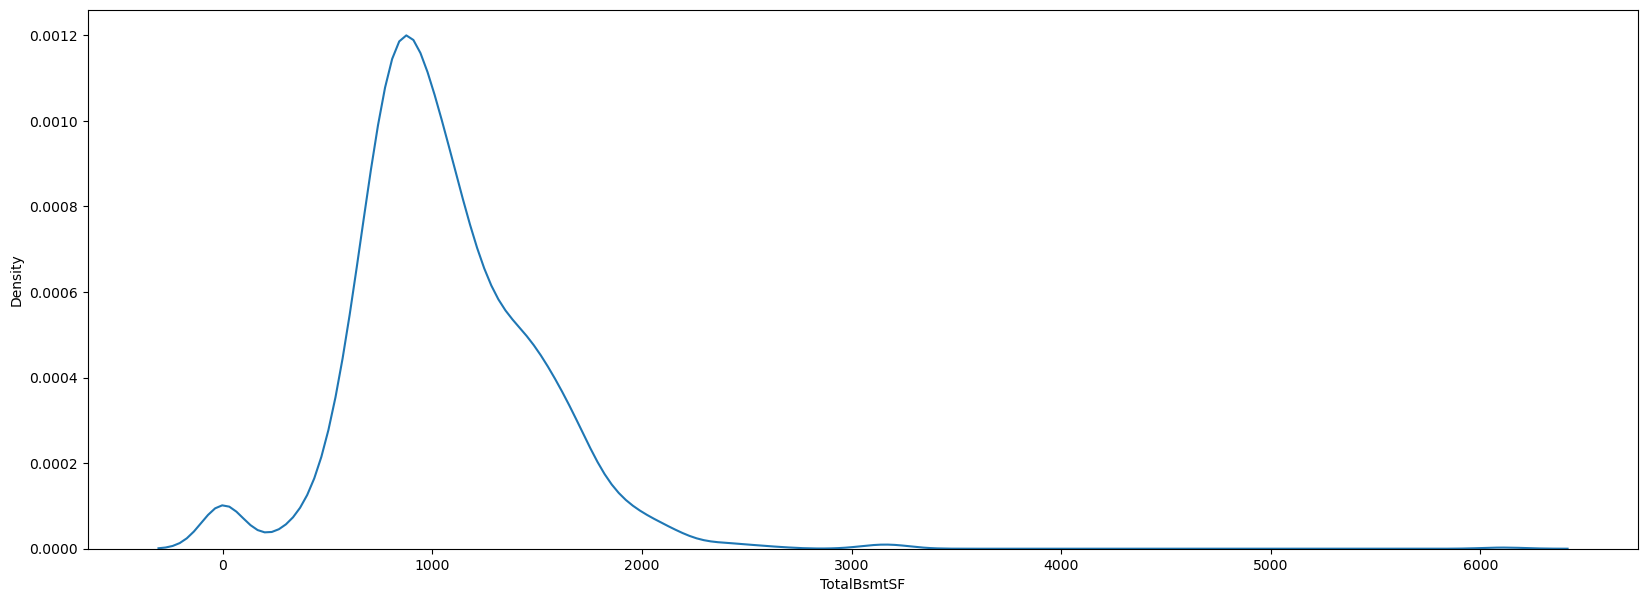

KDE plot of : 1stFlrSF


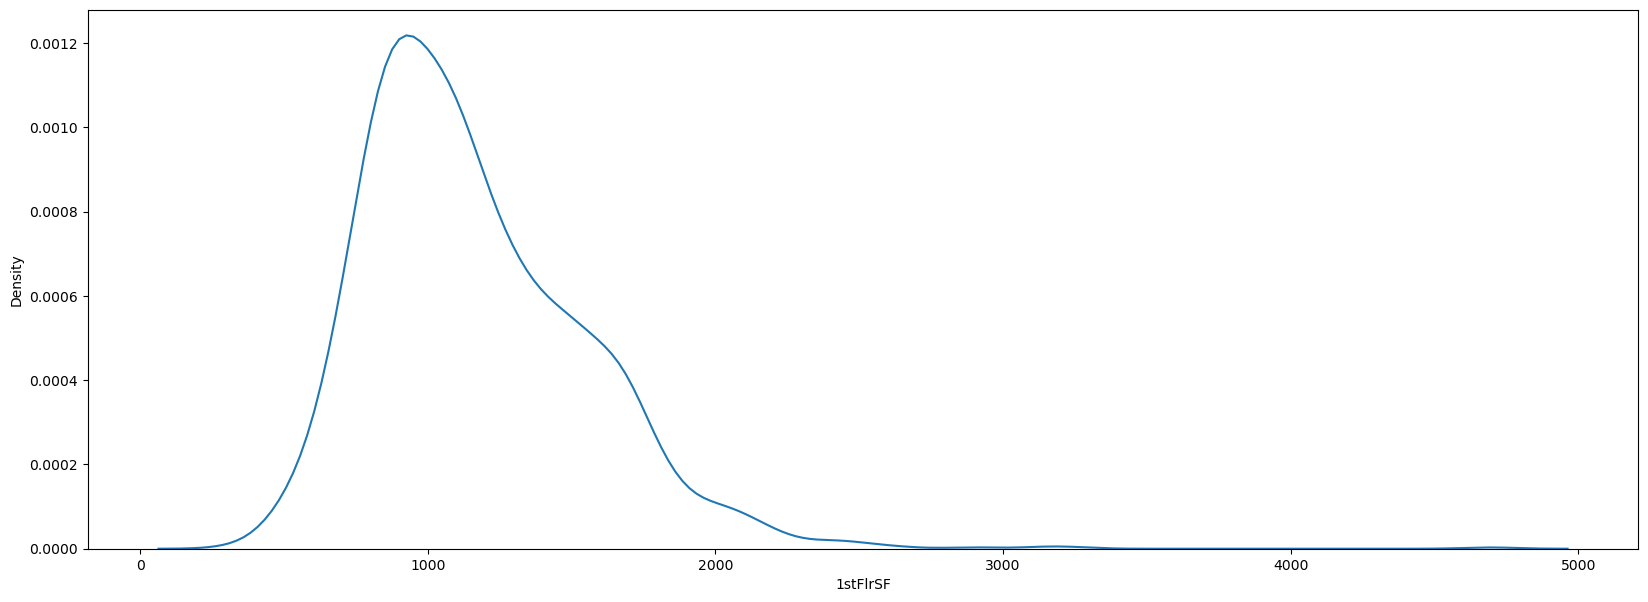

KDE plot of : 2ndFlrSF


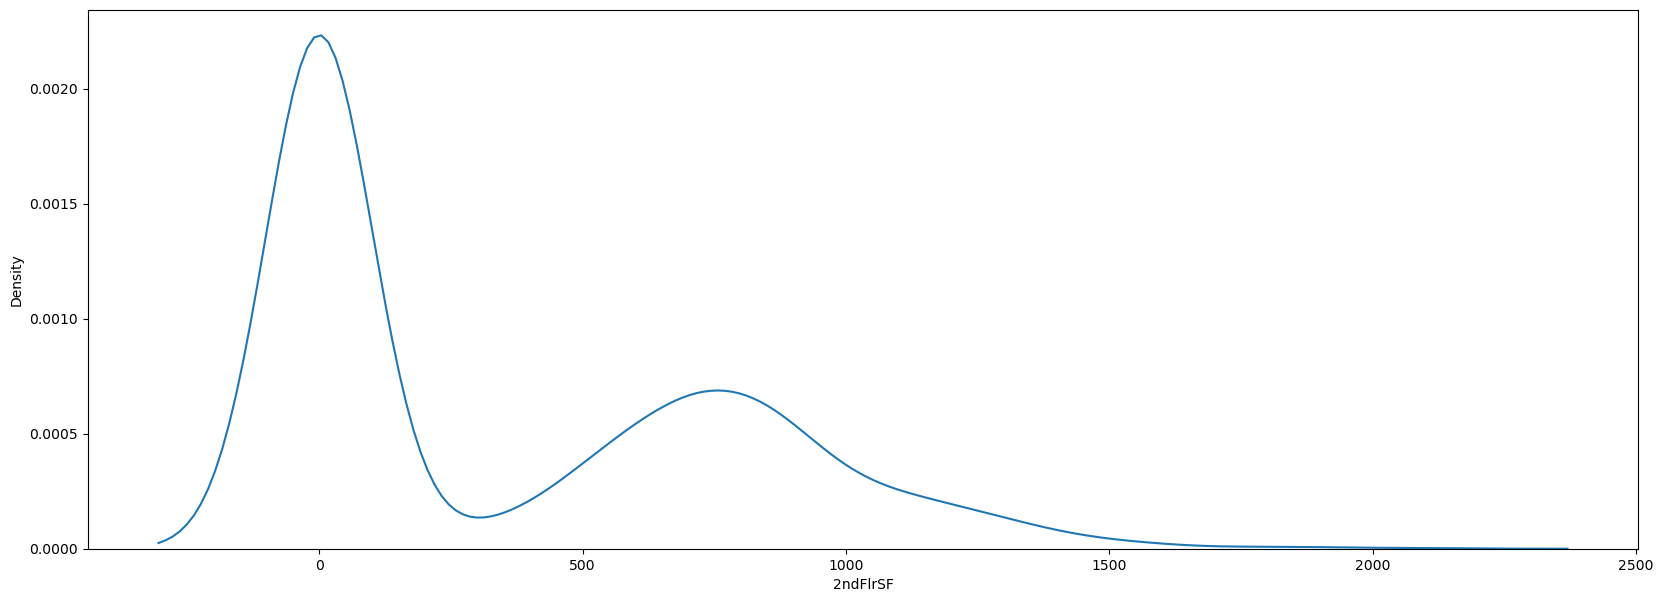

KDE plot of : LowQualFinSF


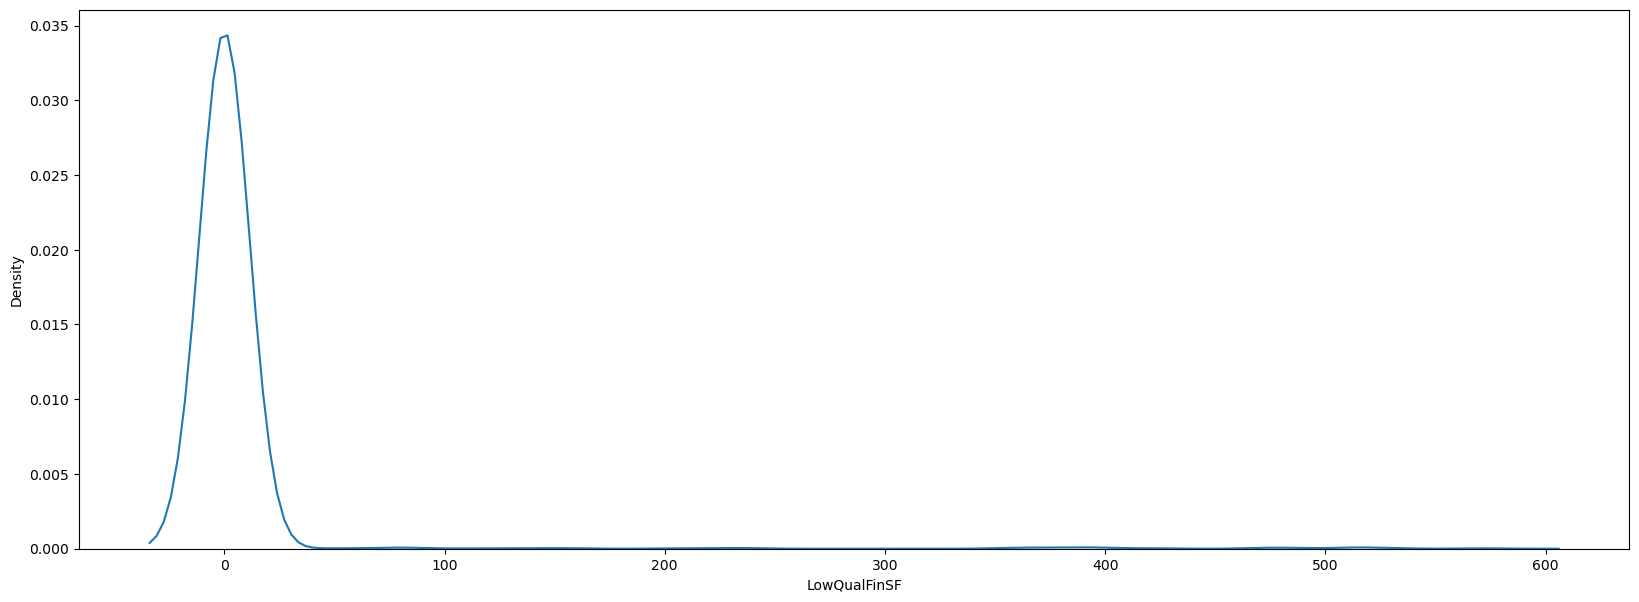

KDE plot of : GrLivArea


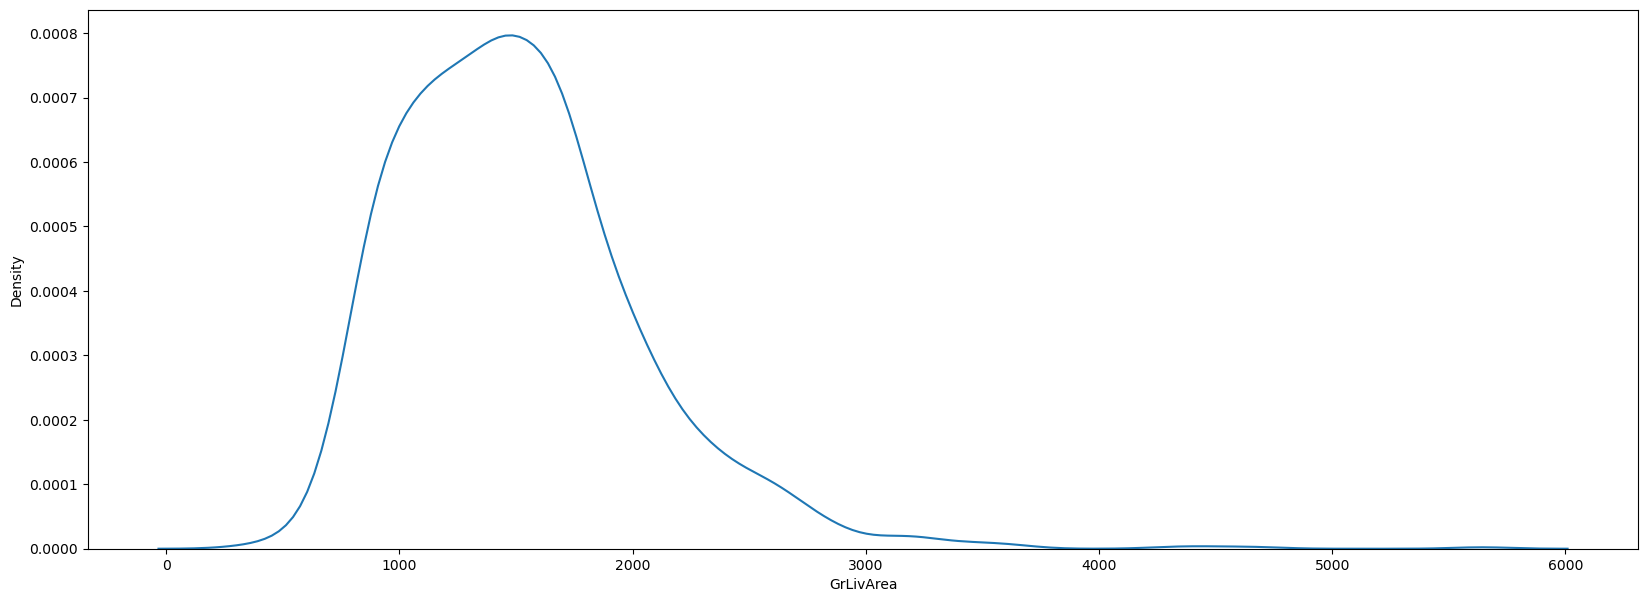

KDE plot of : BsmtFullBath


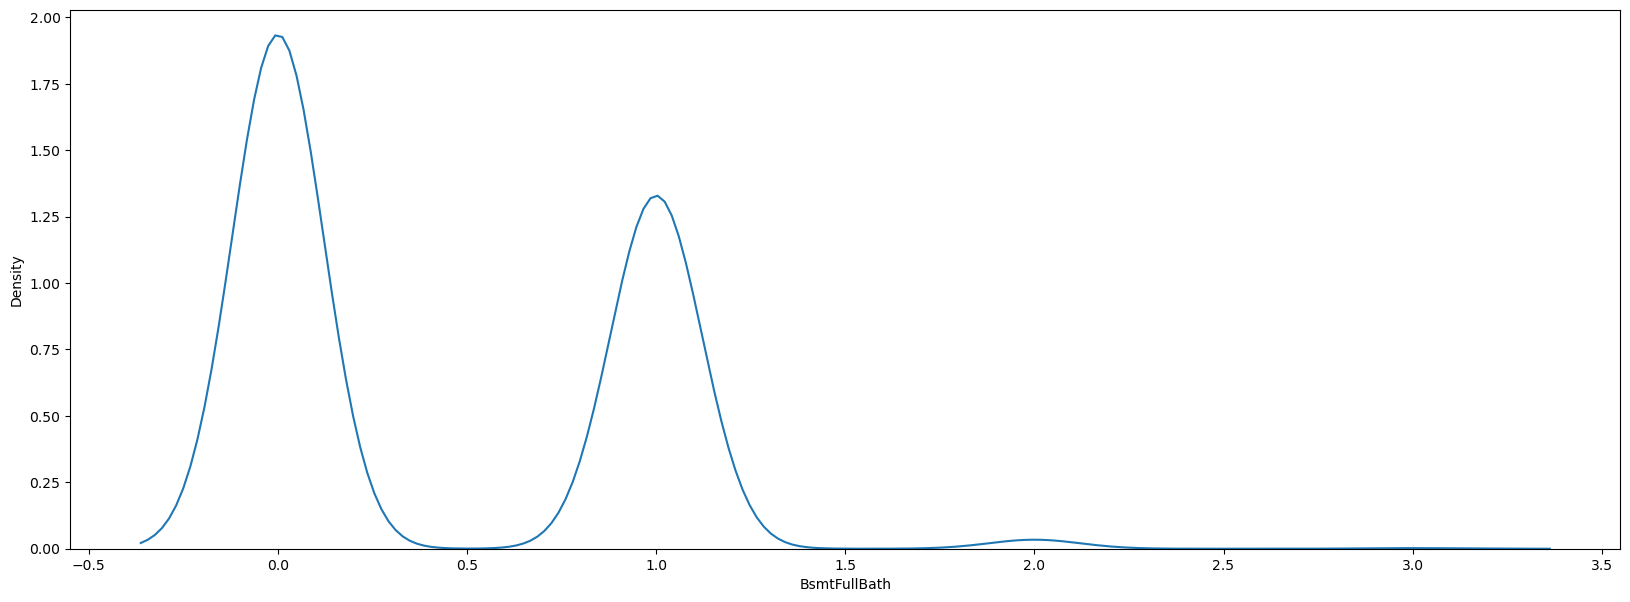

KDE plot of : BsmtHalfBath


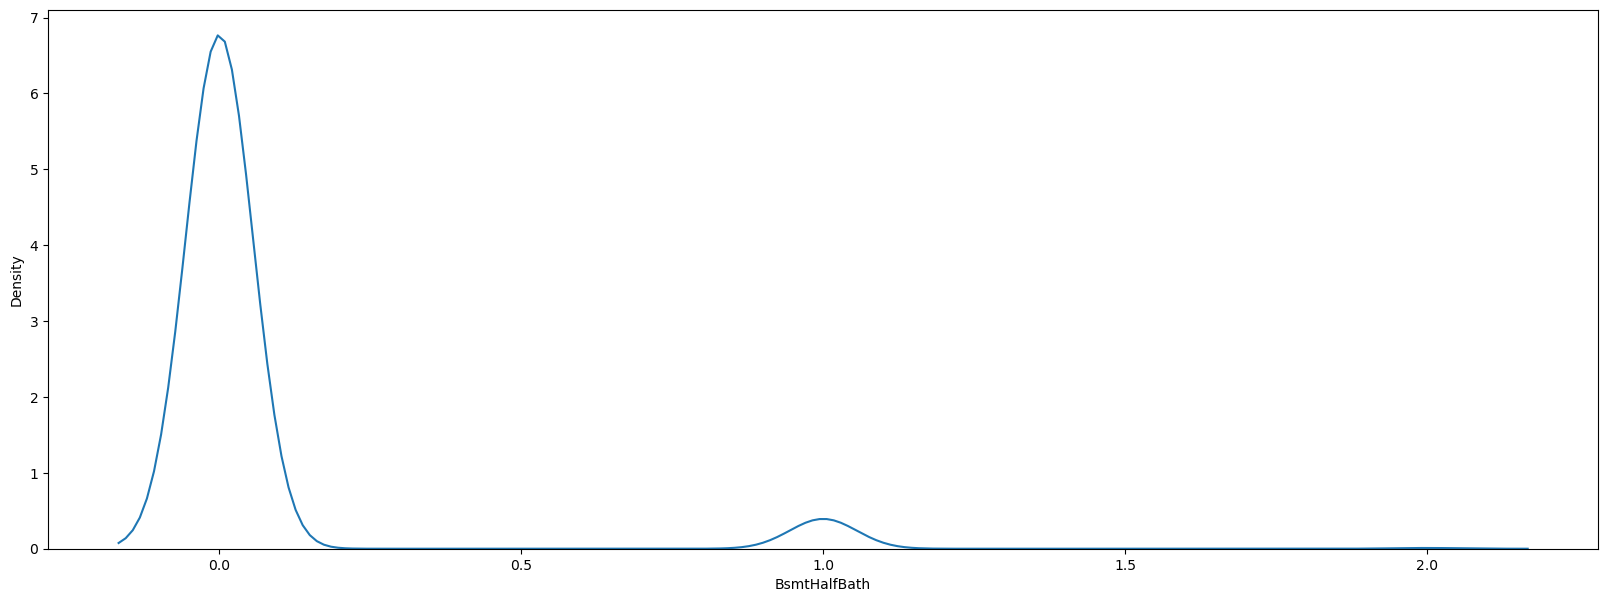

KDE plot of : FullBath


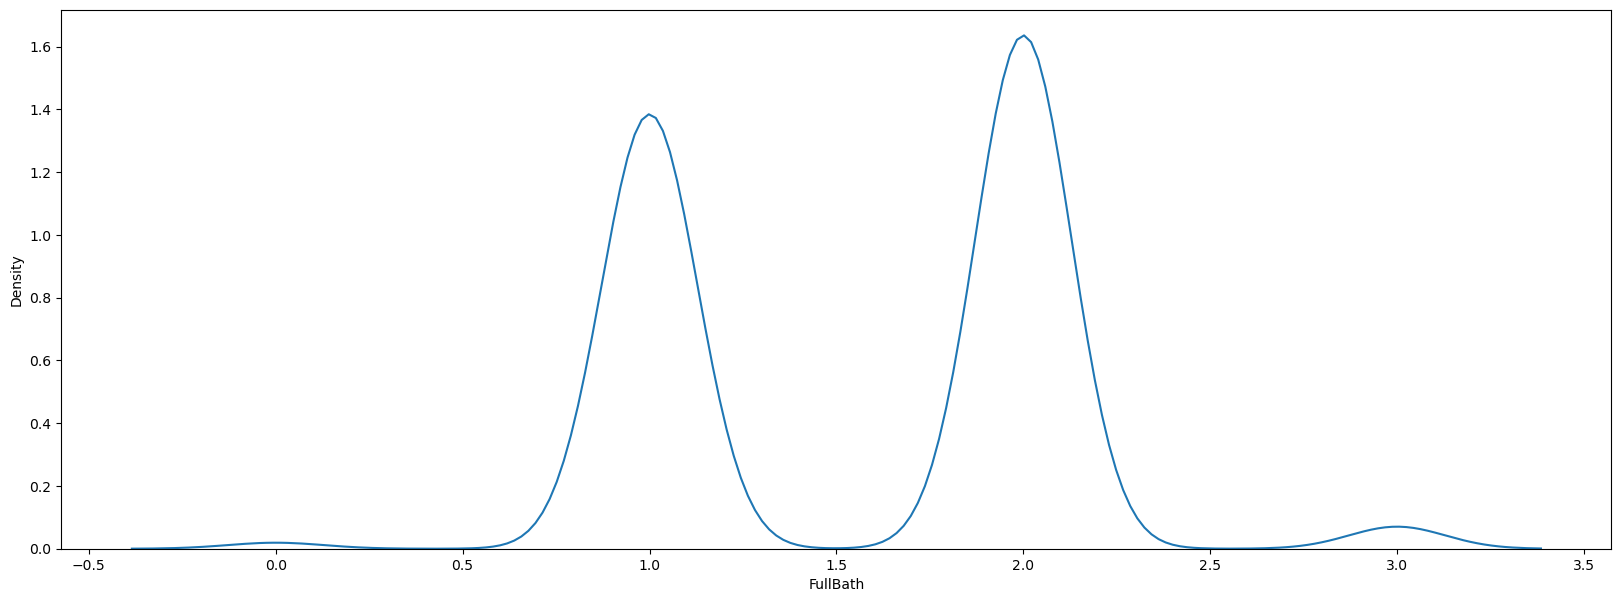

KDE plot of : HalfBath


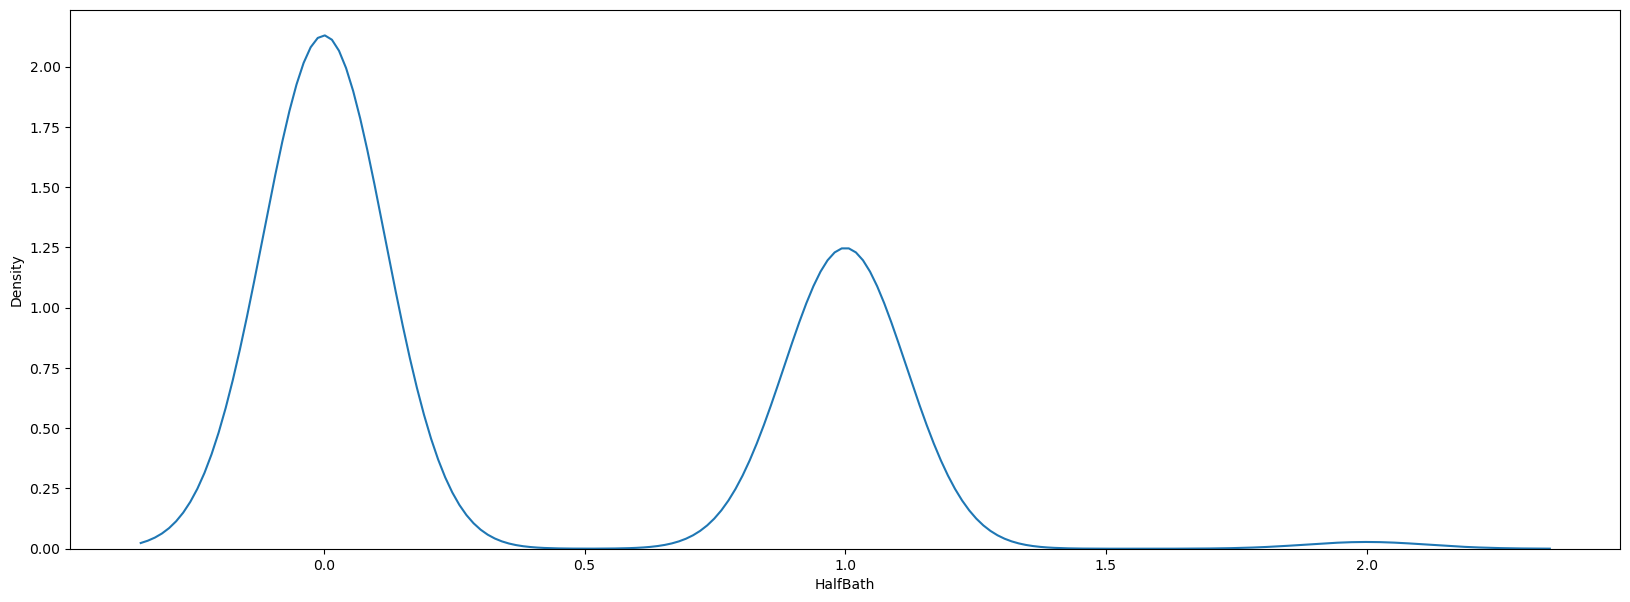

KDE plot of : BedroomAbvGr


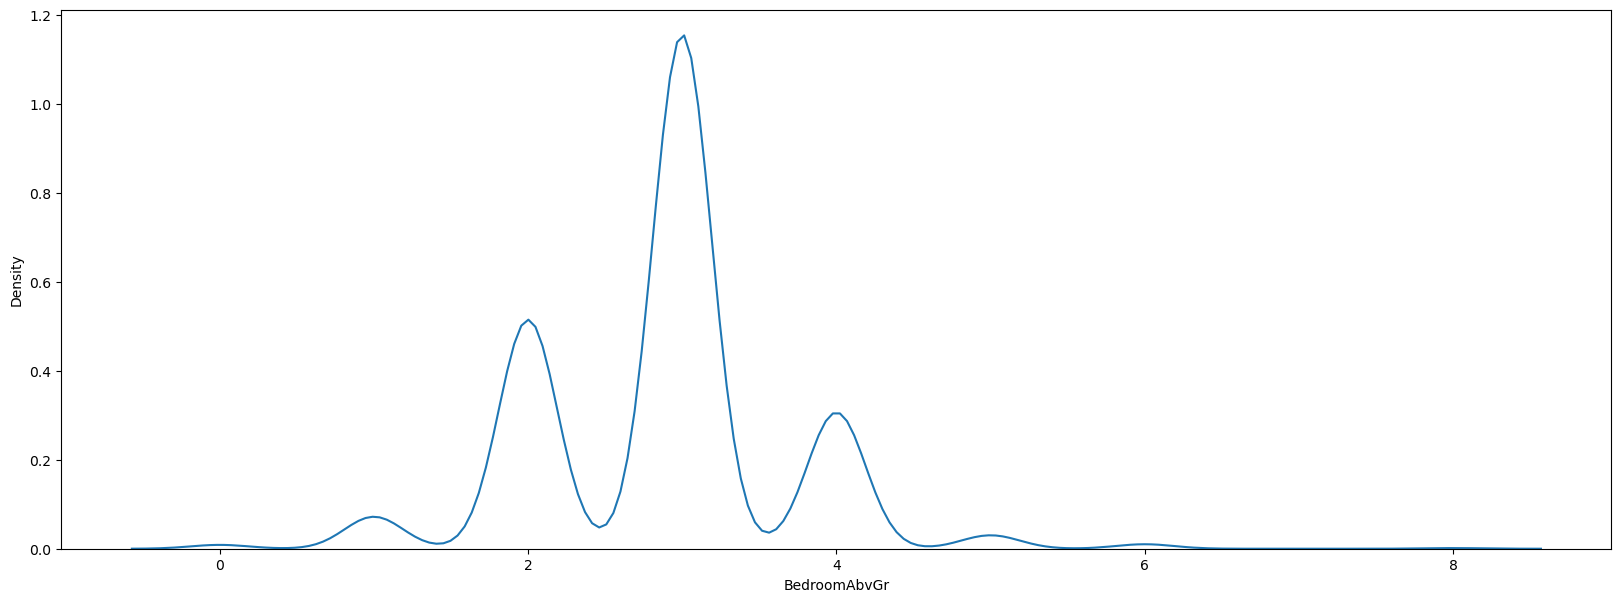

KDE plot of : KitchenAbvGr


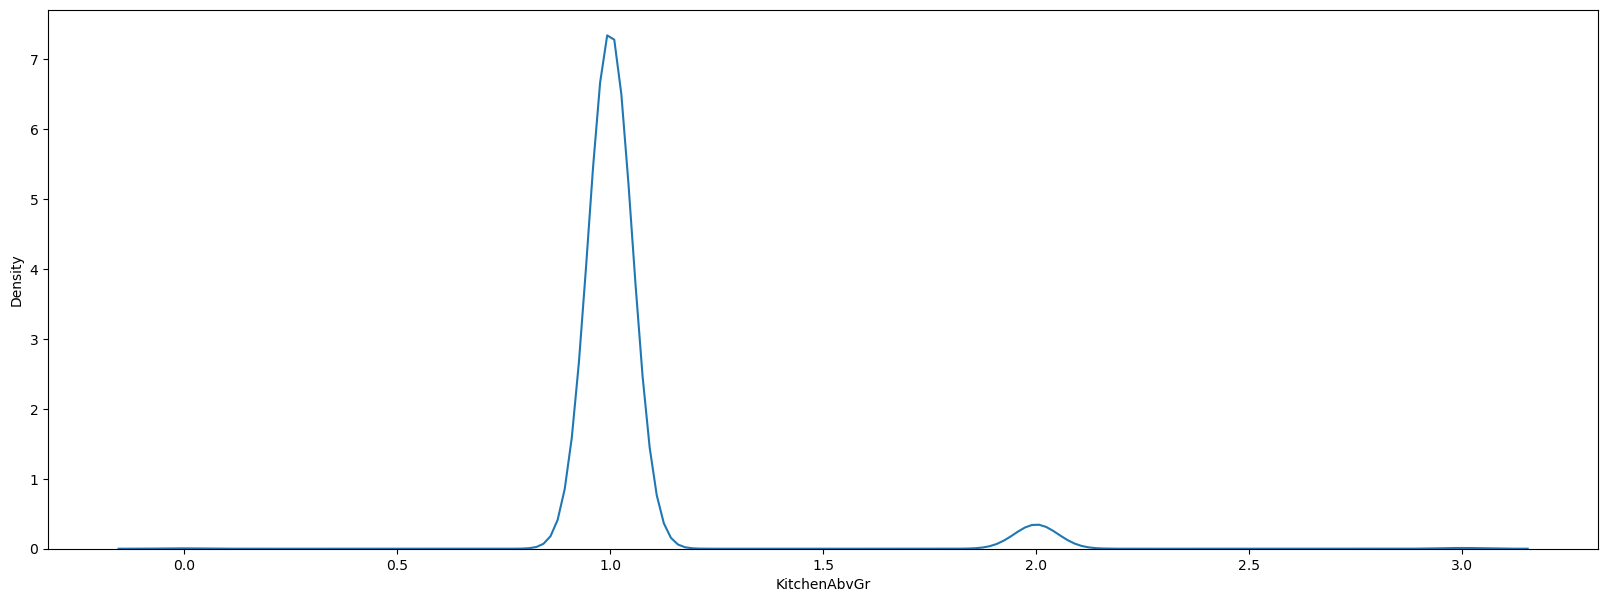

KDE plot of : TotRmsAbvGrd


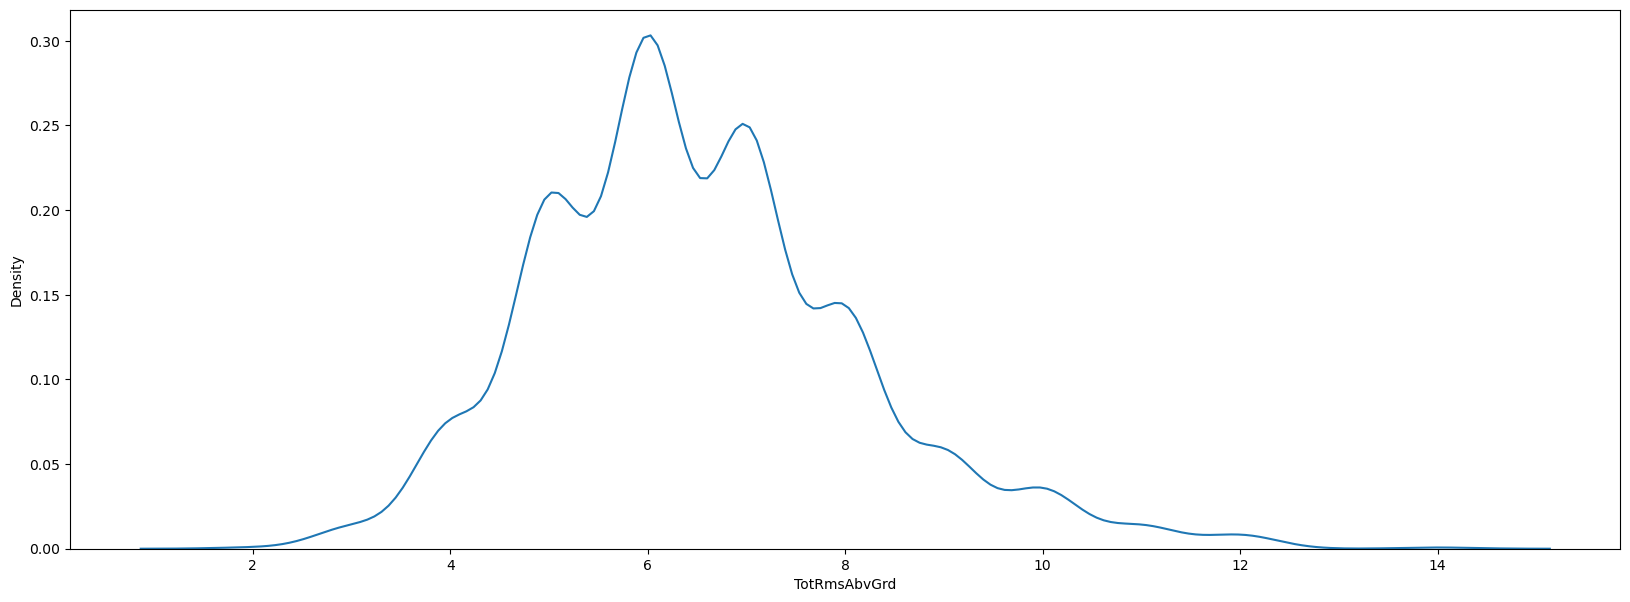

KDE plot of : Fireplaces


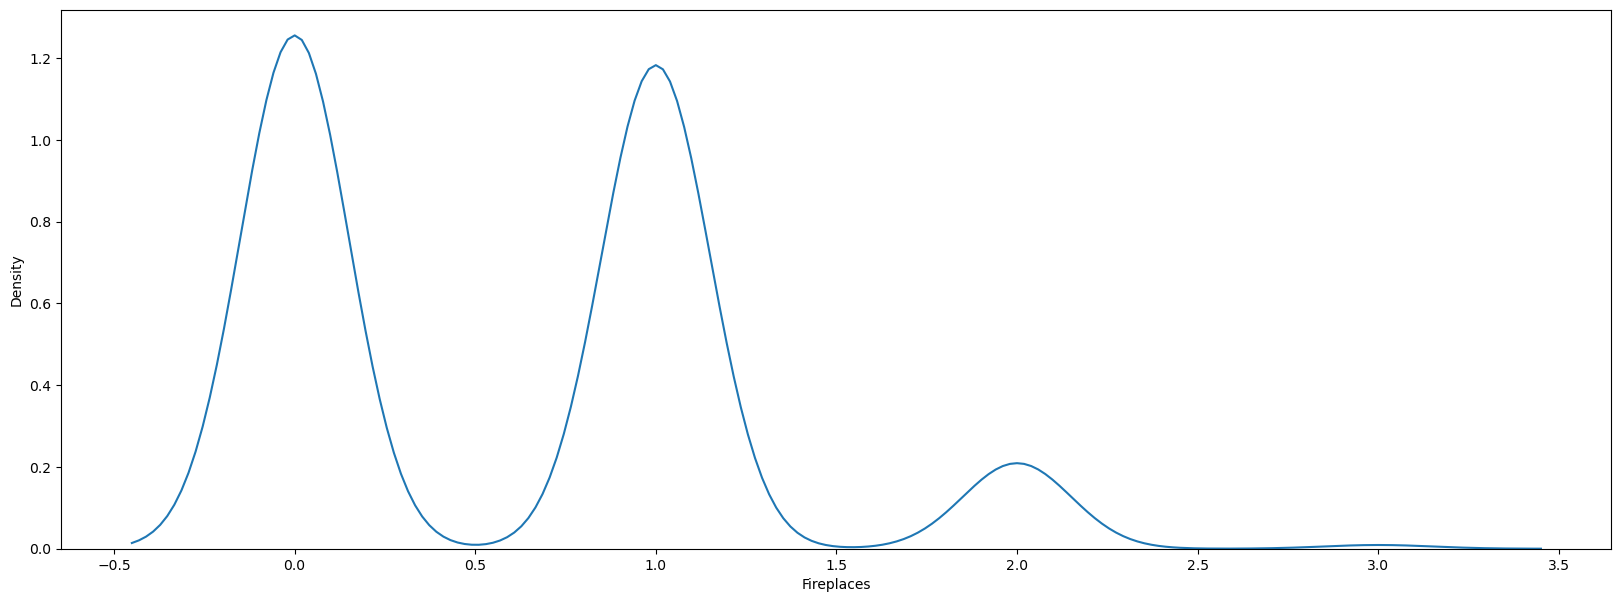

KDE plot of : GarageYrBlt


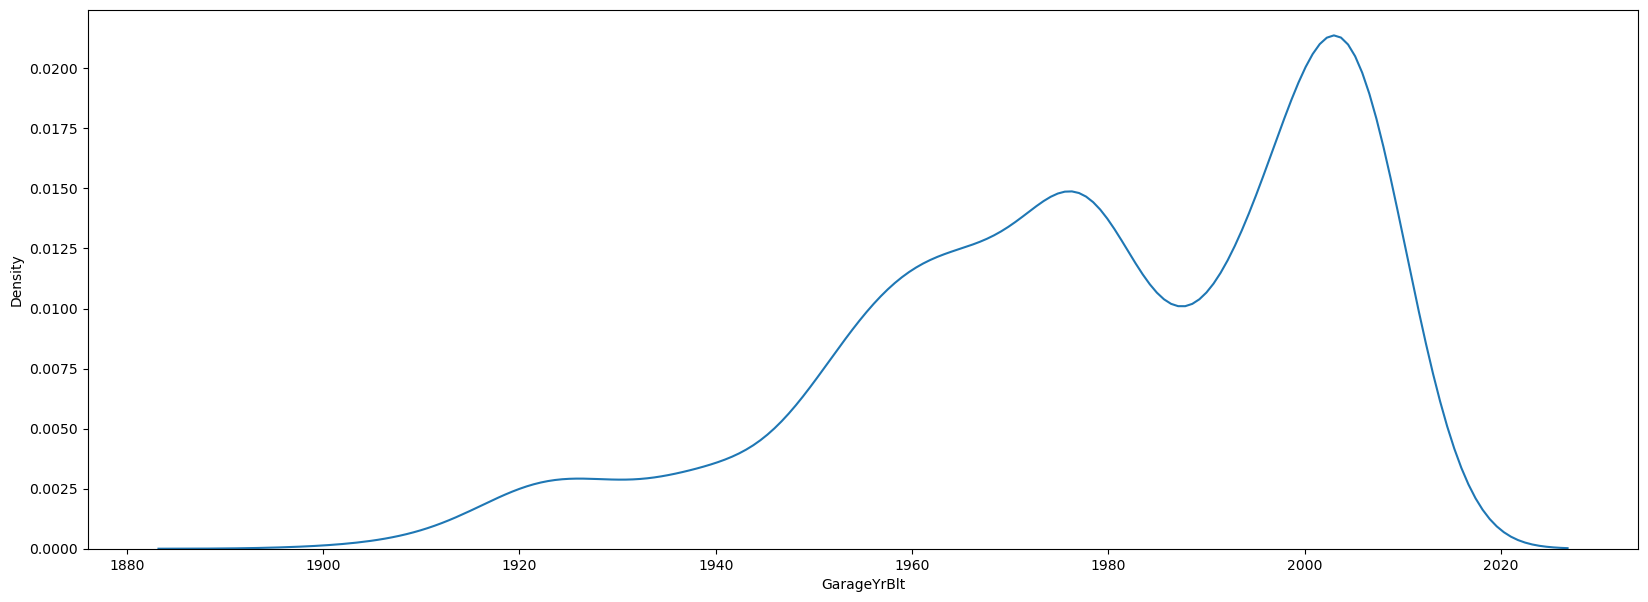

KDE plot of : GarageCars


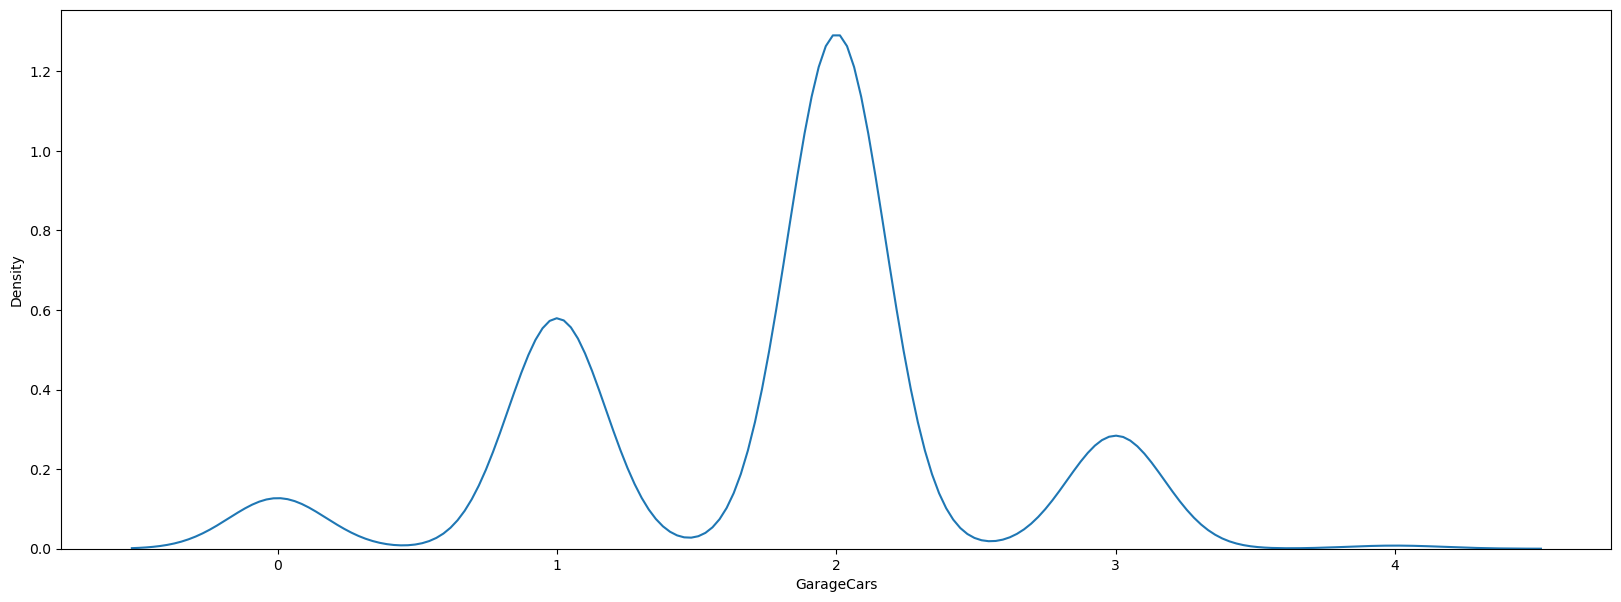

KDE plot of : GarageArea


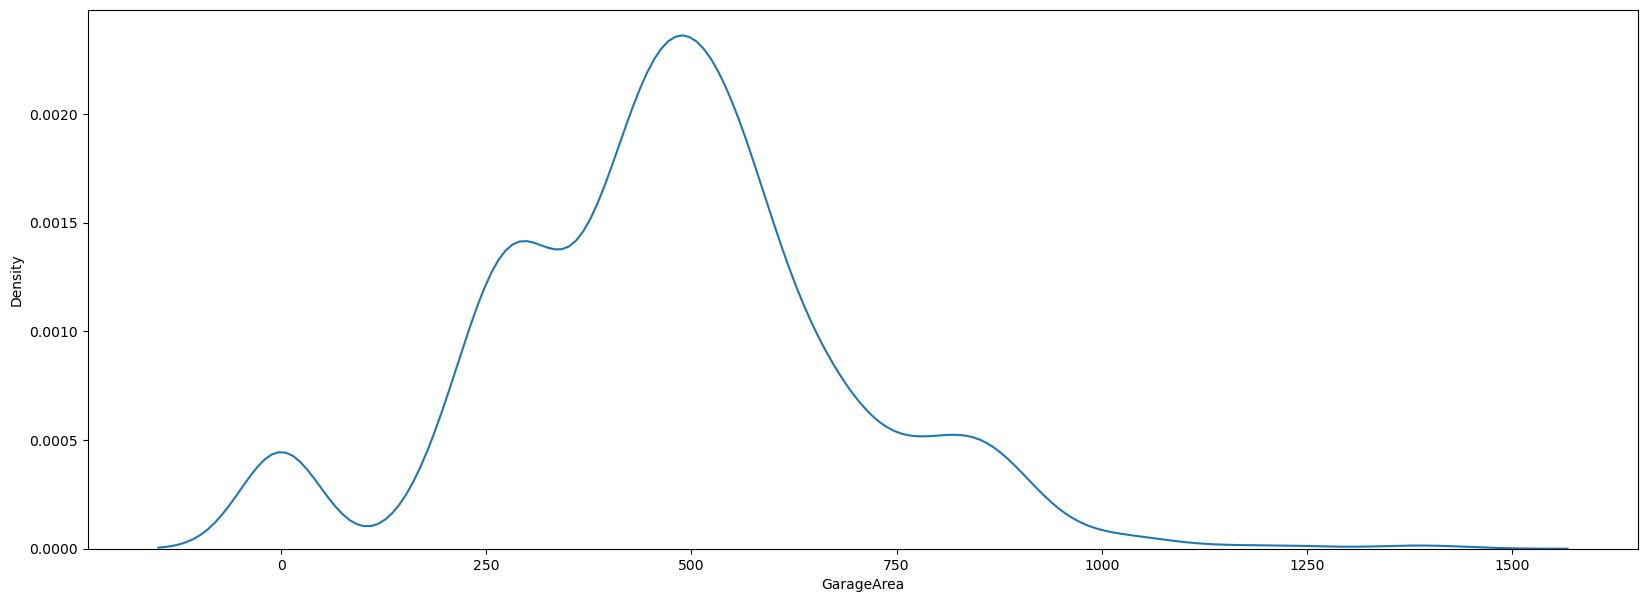

KDE plot of : WoodDeckSF


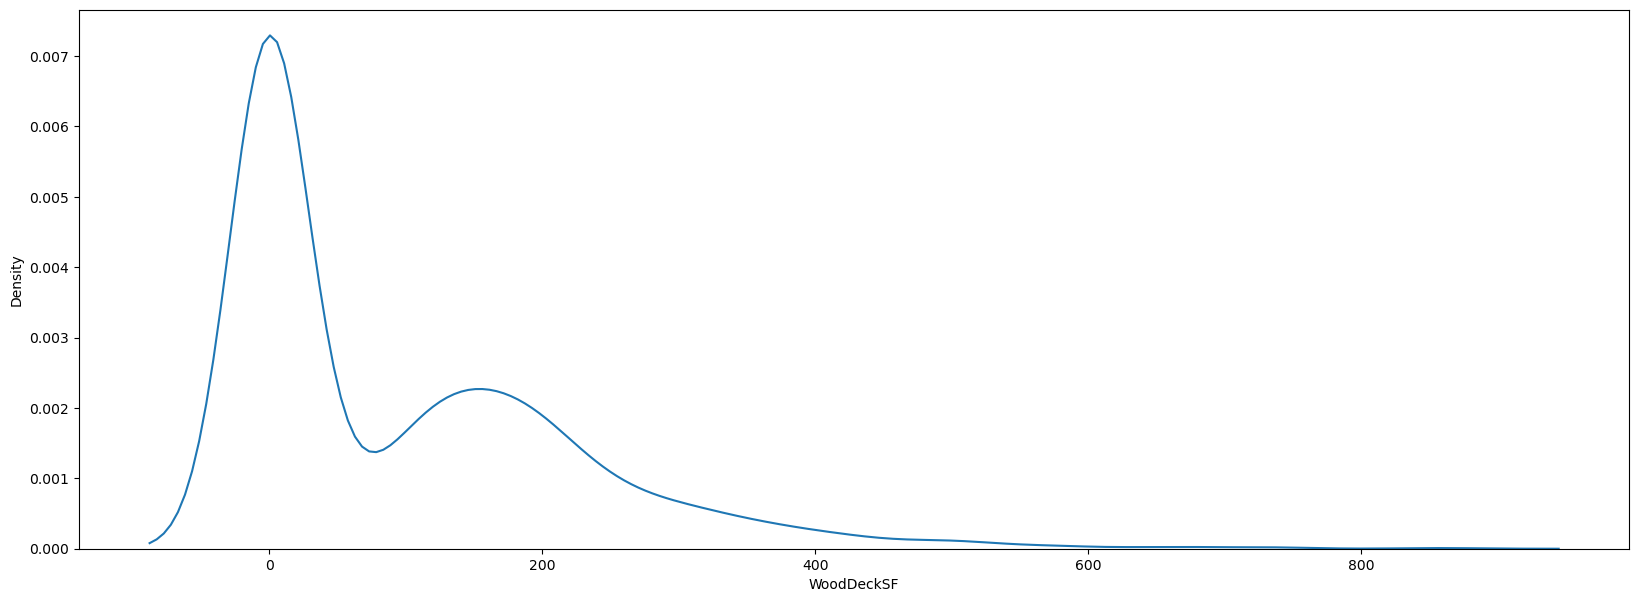

KDE plot of : OpenPorchSF


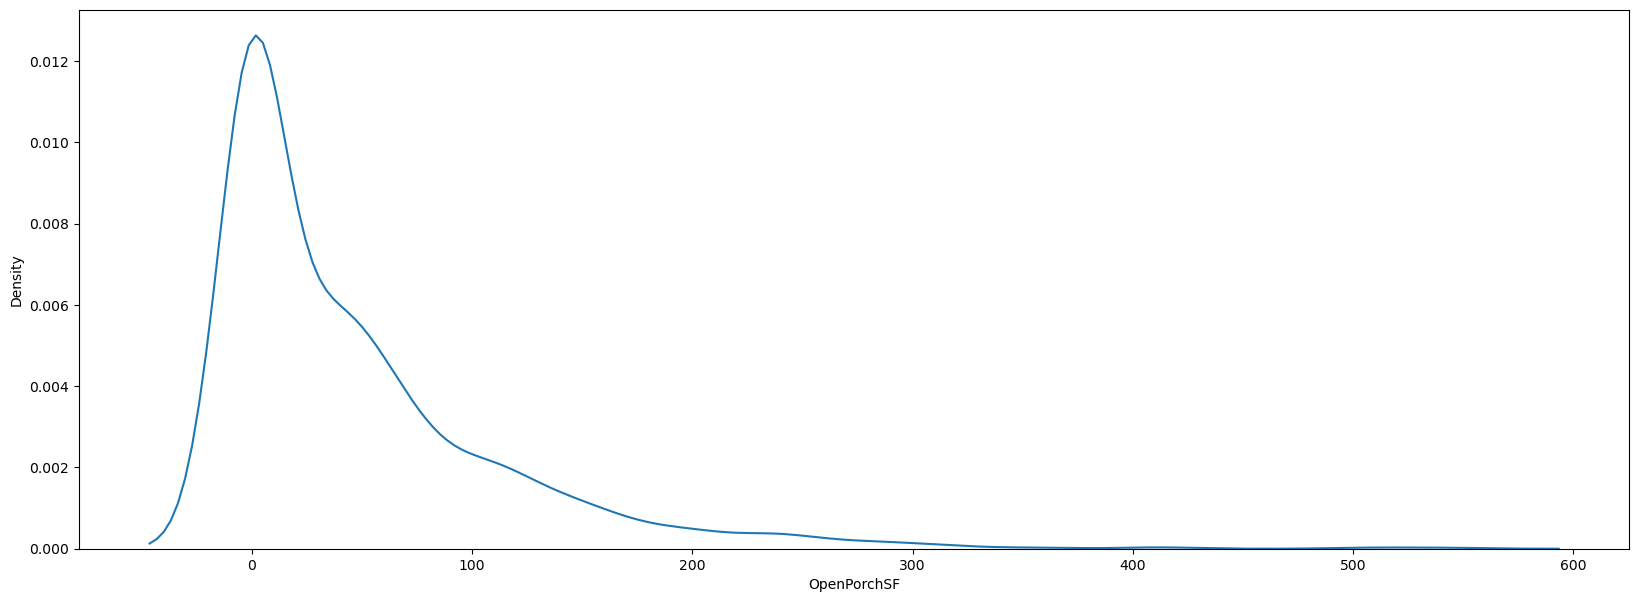

KDE plot of : EnclosedPorch


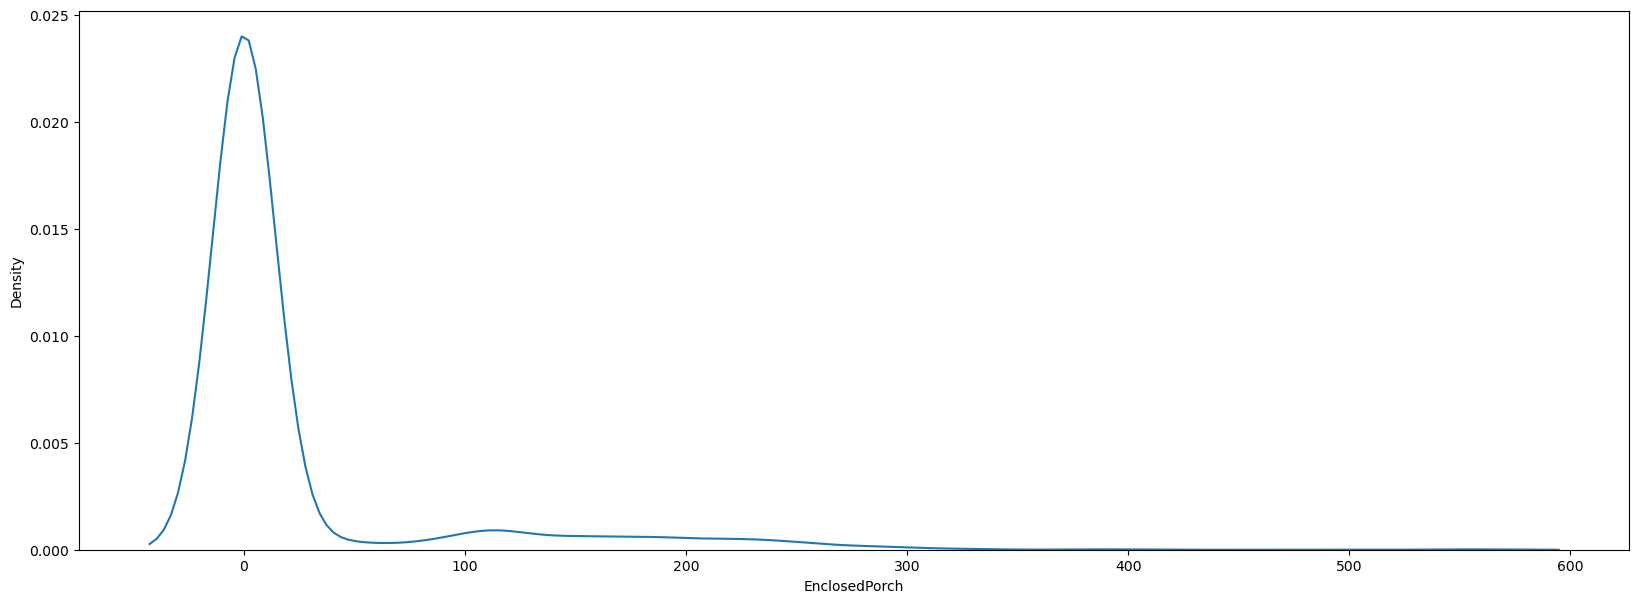

KDE plot of : 3SsnPorch


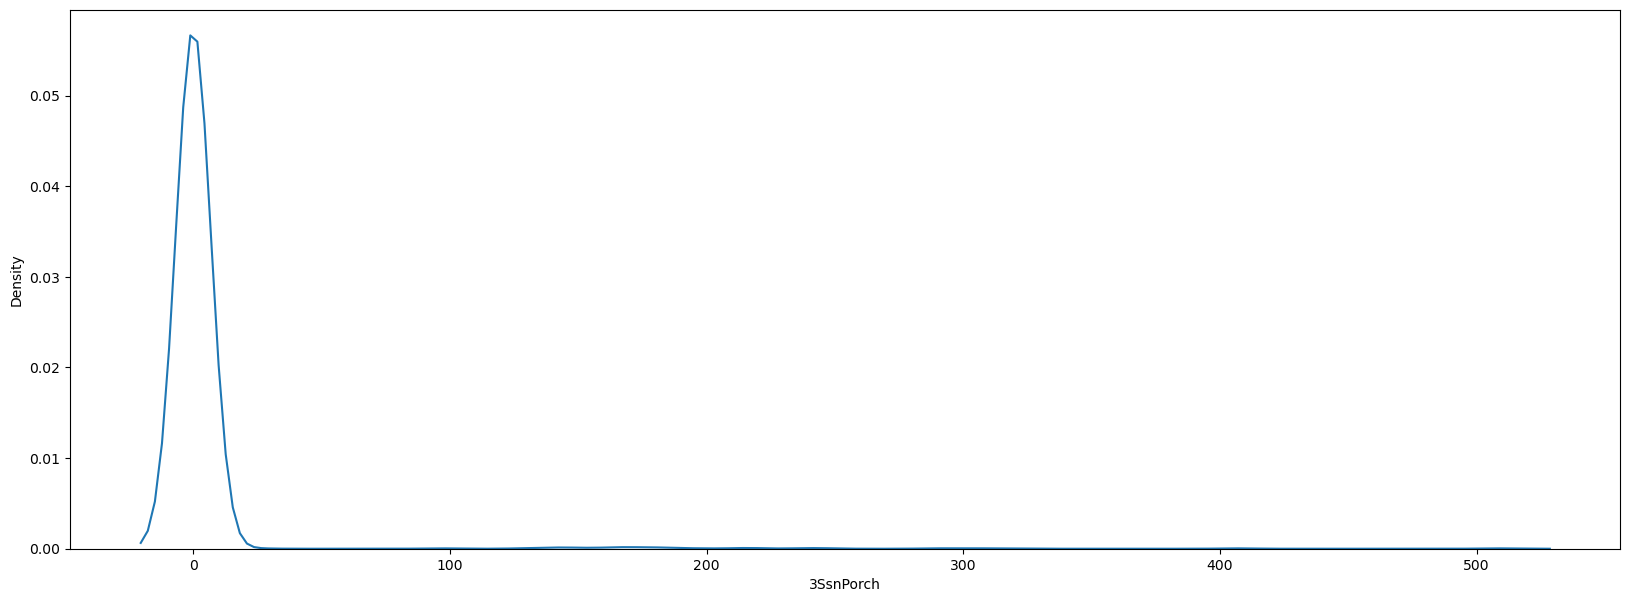

KDE plot of : ScreenPorch


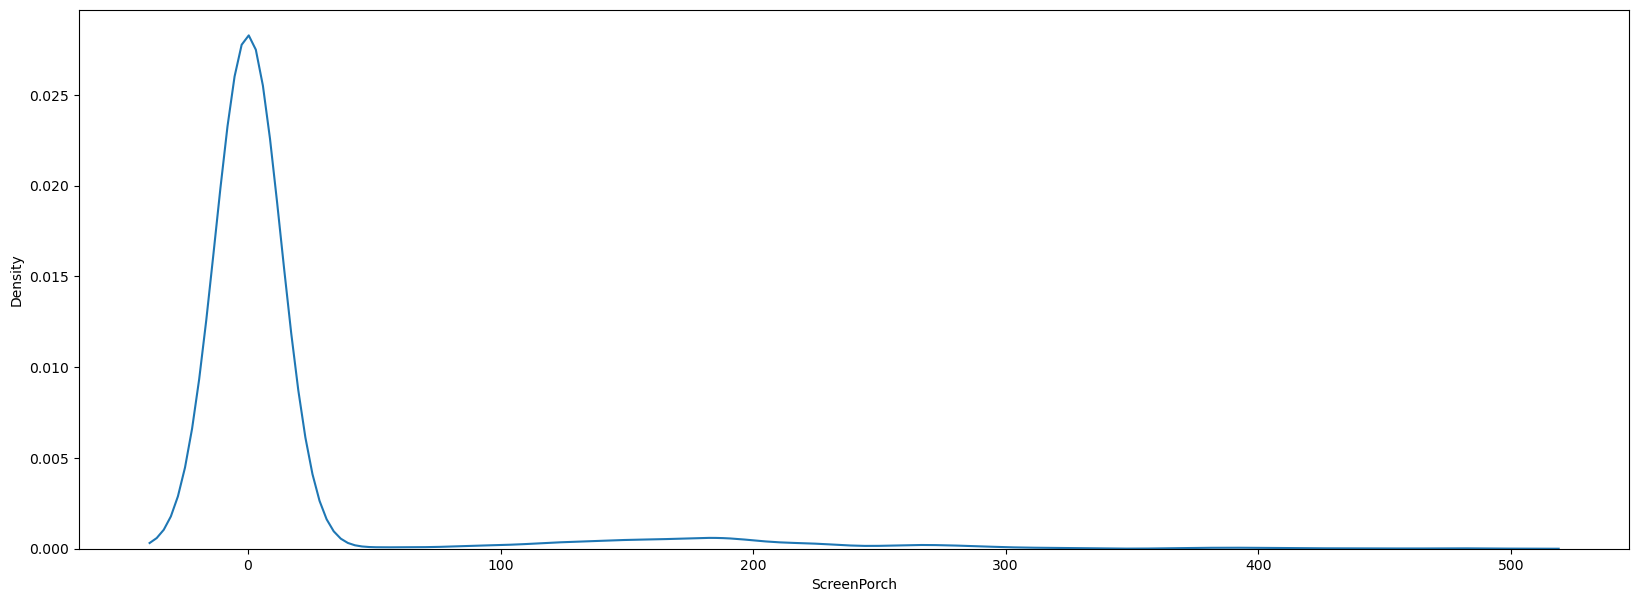

KDE plot of : PoolArea


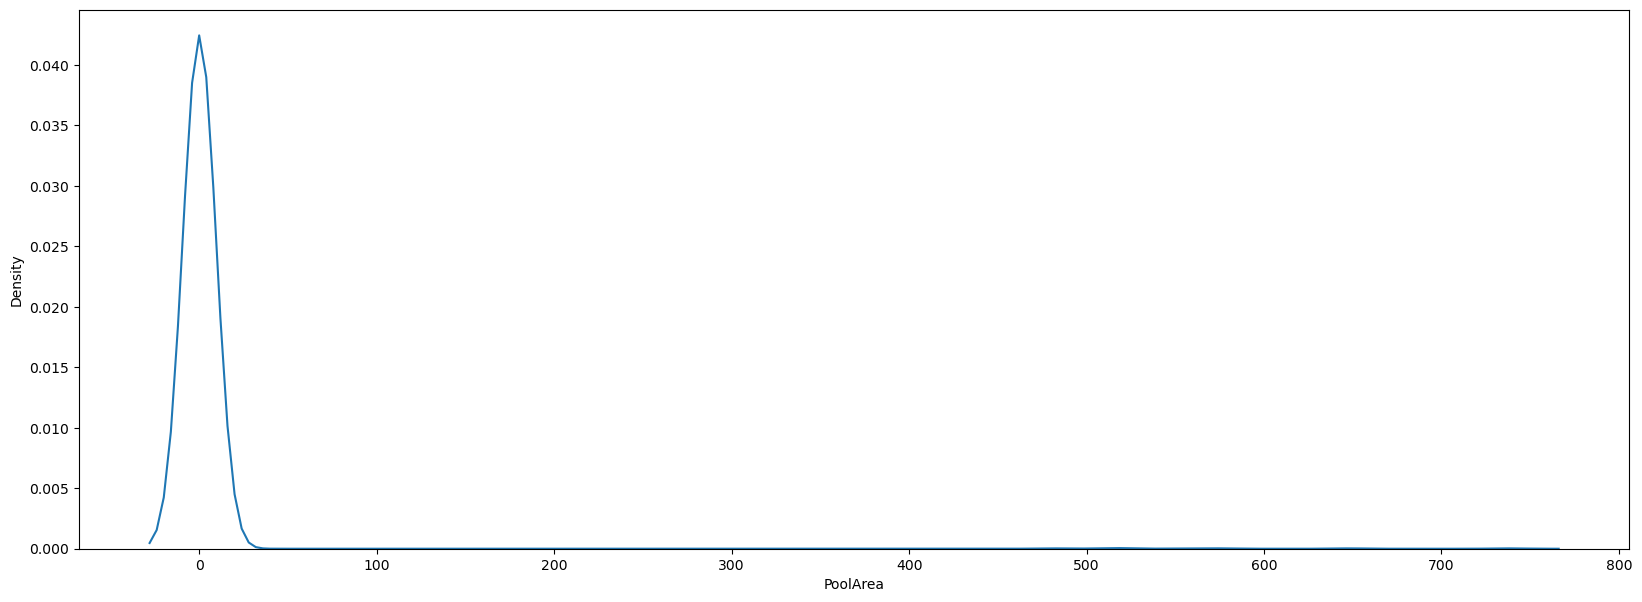

KDE plot of : MiscVal


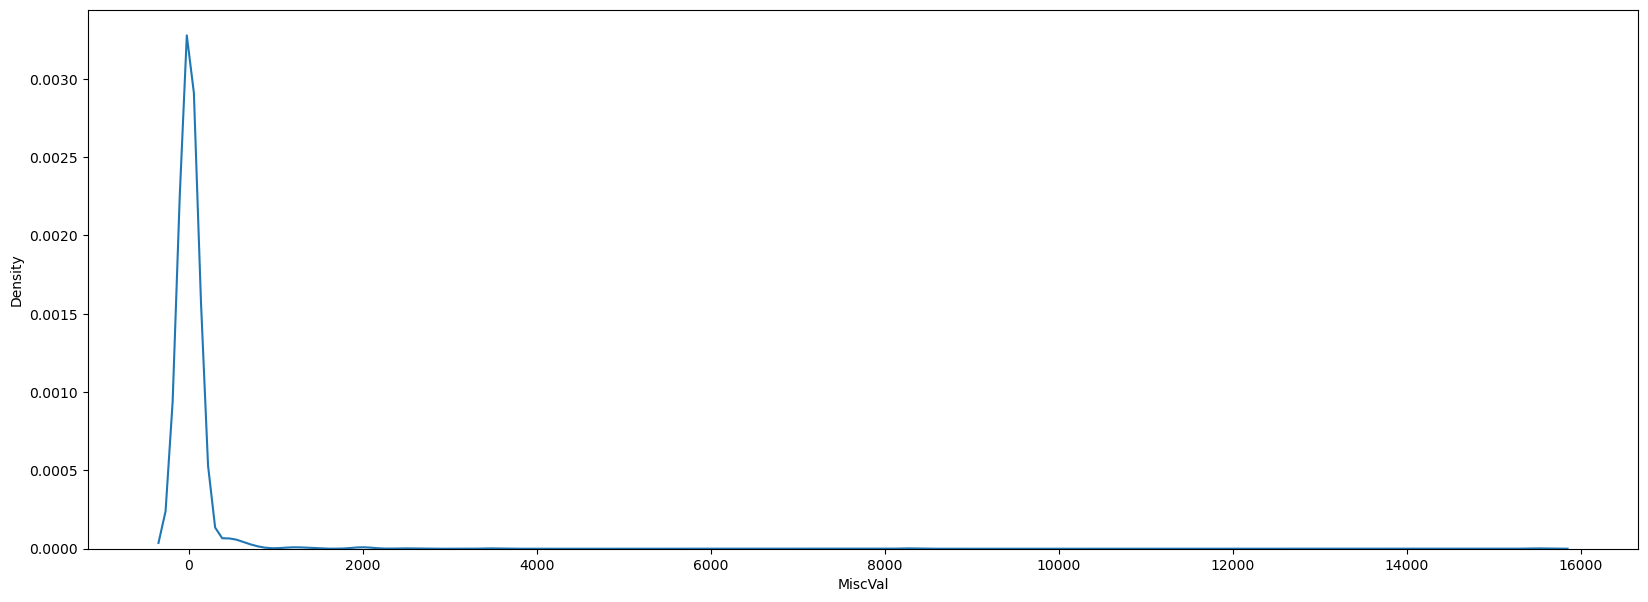

KDE plot of : MoSold


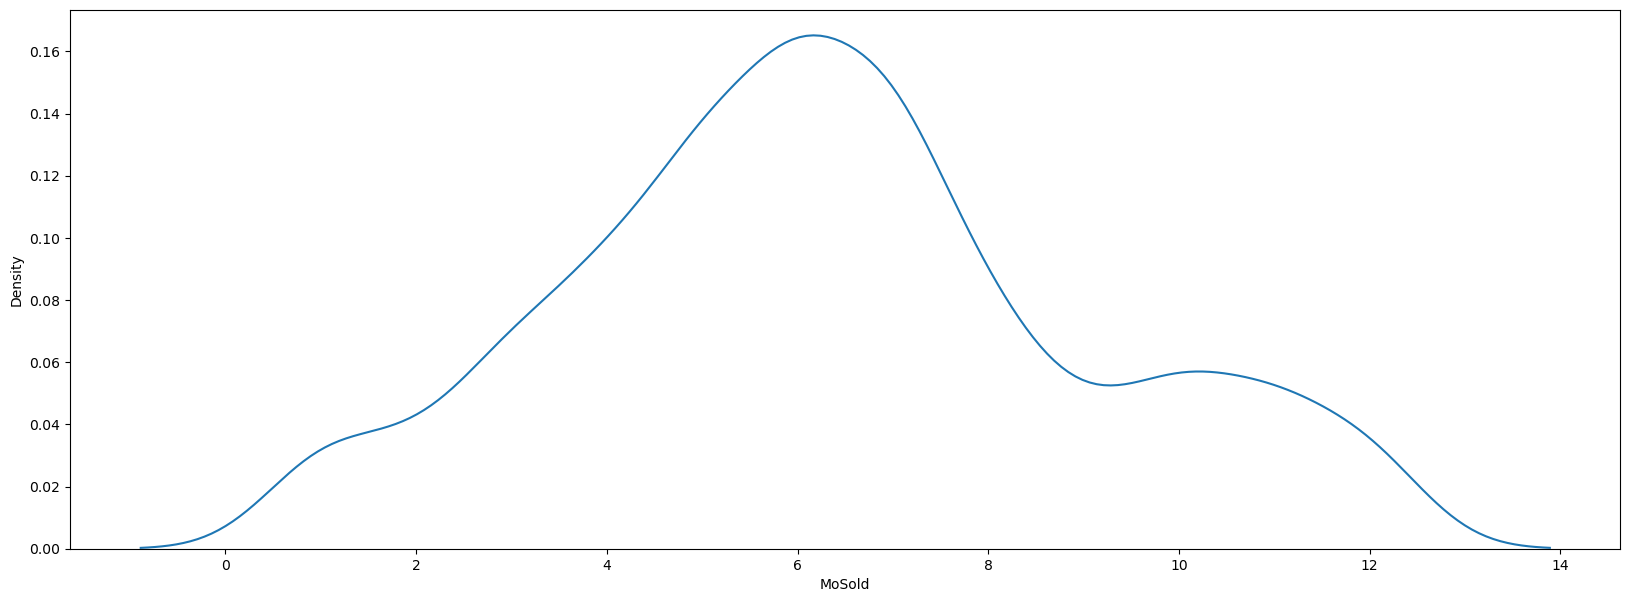

KDE plot of : YrSold


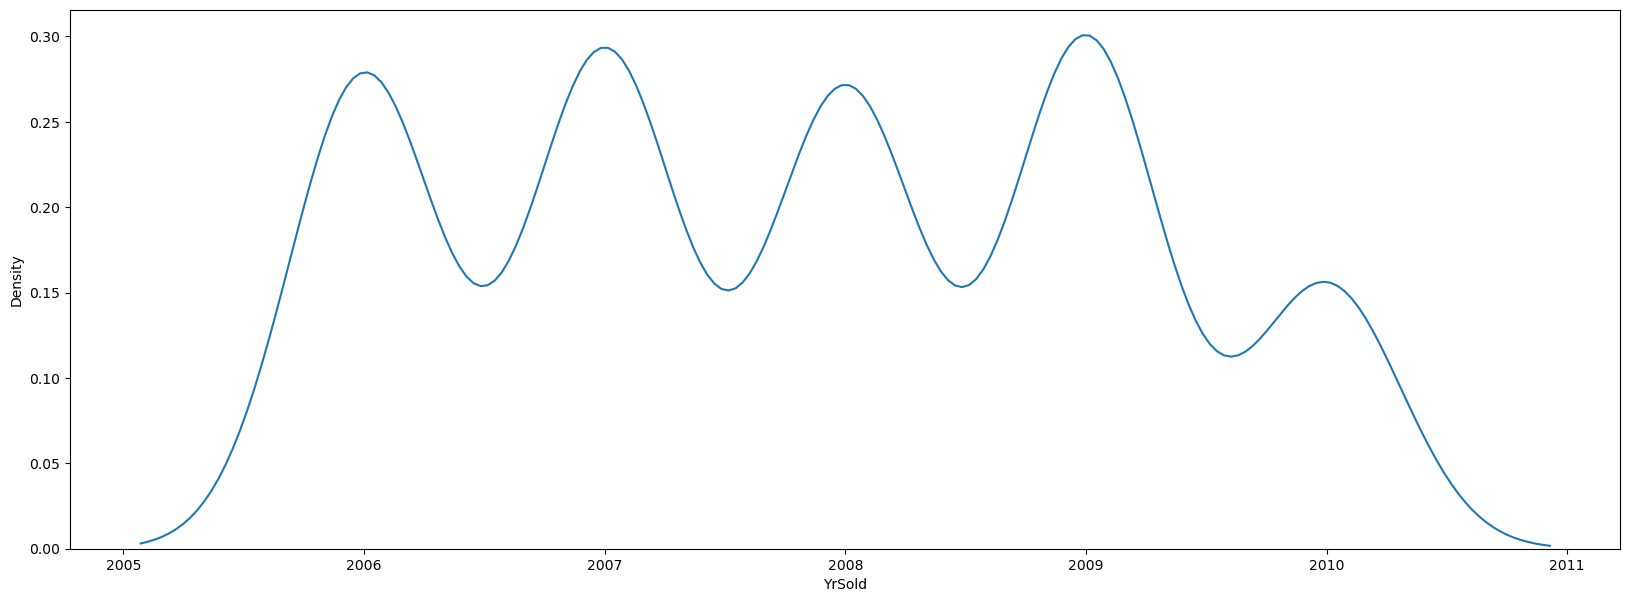

KDE plot of : SalePrice


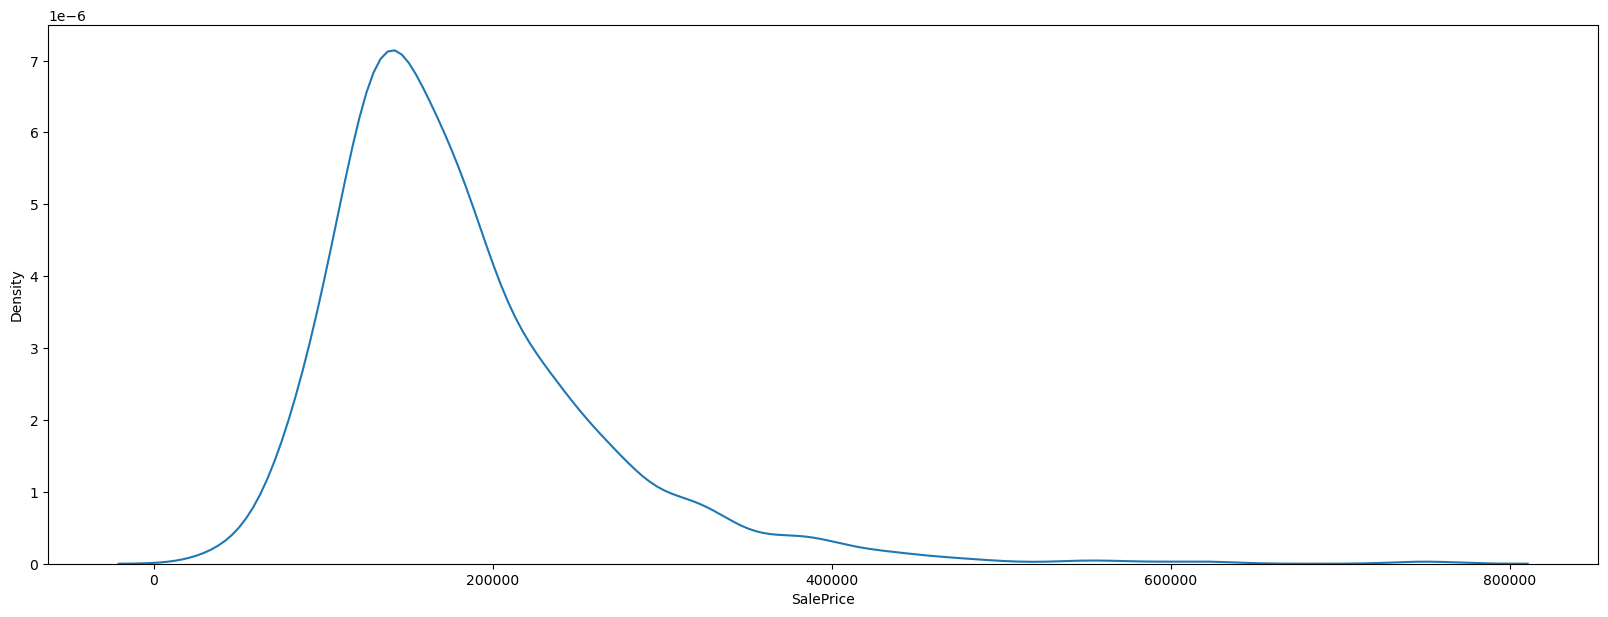

In [77]:
#Lets see numerical features are normally distributed or not
for i in numerical_features:
    print('KDE plot of :',i)
    plt.figure(figsize=(20,7))
    sns.kdeplot(x=data[i])
    plt.show()

In [78]:
data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.414266  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072483  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.036849  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368392  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.091481  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006419  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180424  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.048258  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.237023  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005805 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320146  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.235755  0.271364     0.396765   
GarageYrBlt    0.000070    0.080187     0.064324 -0.024812     0.518018   
GarageCars     0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323663  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.077106  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137454  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.009790 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.062335  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180868  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.001168  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010158  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006768 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334901  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050199   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022895   -0.069836   
LotFrontage      -0.052820   0.117598      0.082746    0.179283    0.215828   
LotArea          -0.005636   0.014228      0.013788    0.103960    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.410238    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.127788   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea       -0.127788   0.314745      0.179186    1.000000    0.263582   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.263582    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072302   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114184   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.362452    0

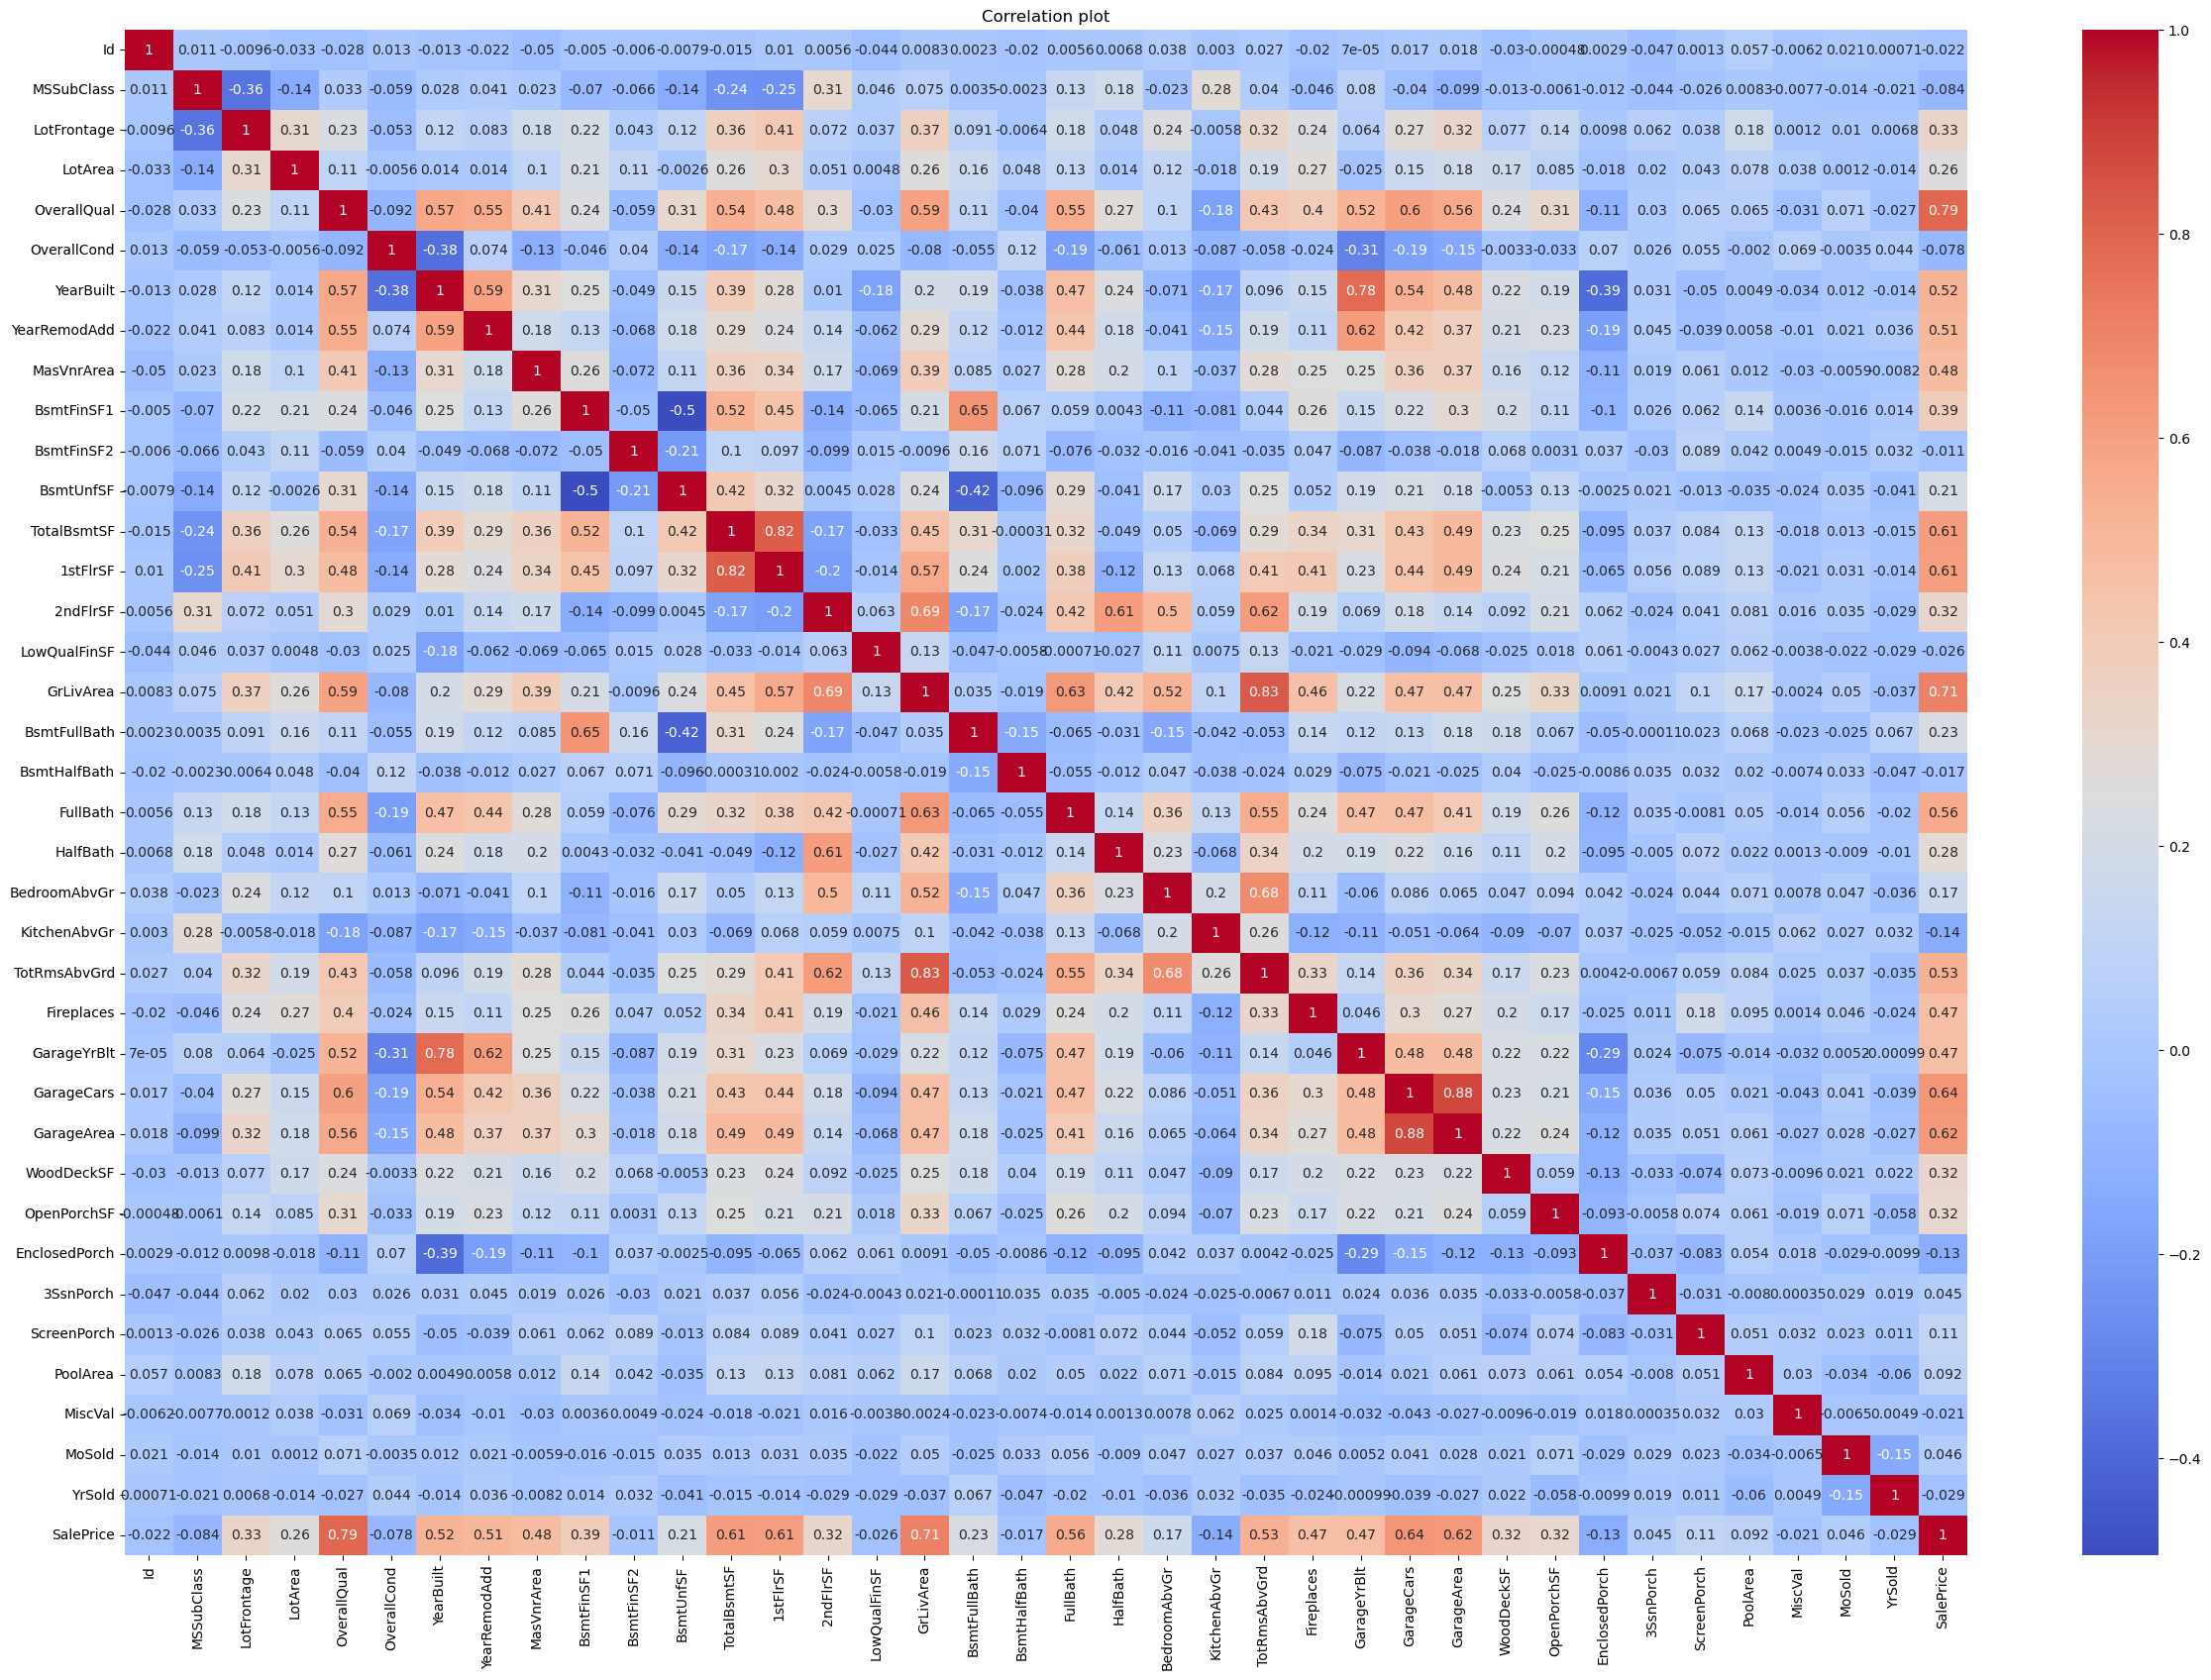

In [79]:
# Plotting heatmap to vizualise correlation
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation plot')
plt.show()

    

#### From the heatmap we can see 35snPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold variables has low correlation with other variables.

In [80]:
df=data.copy()

In [81]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

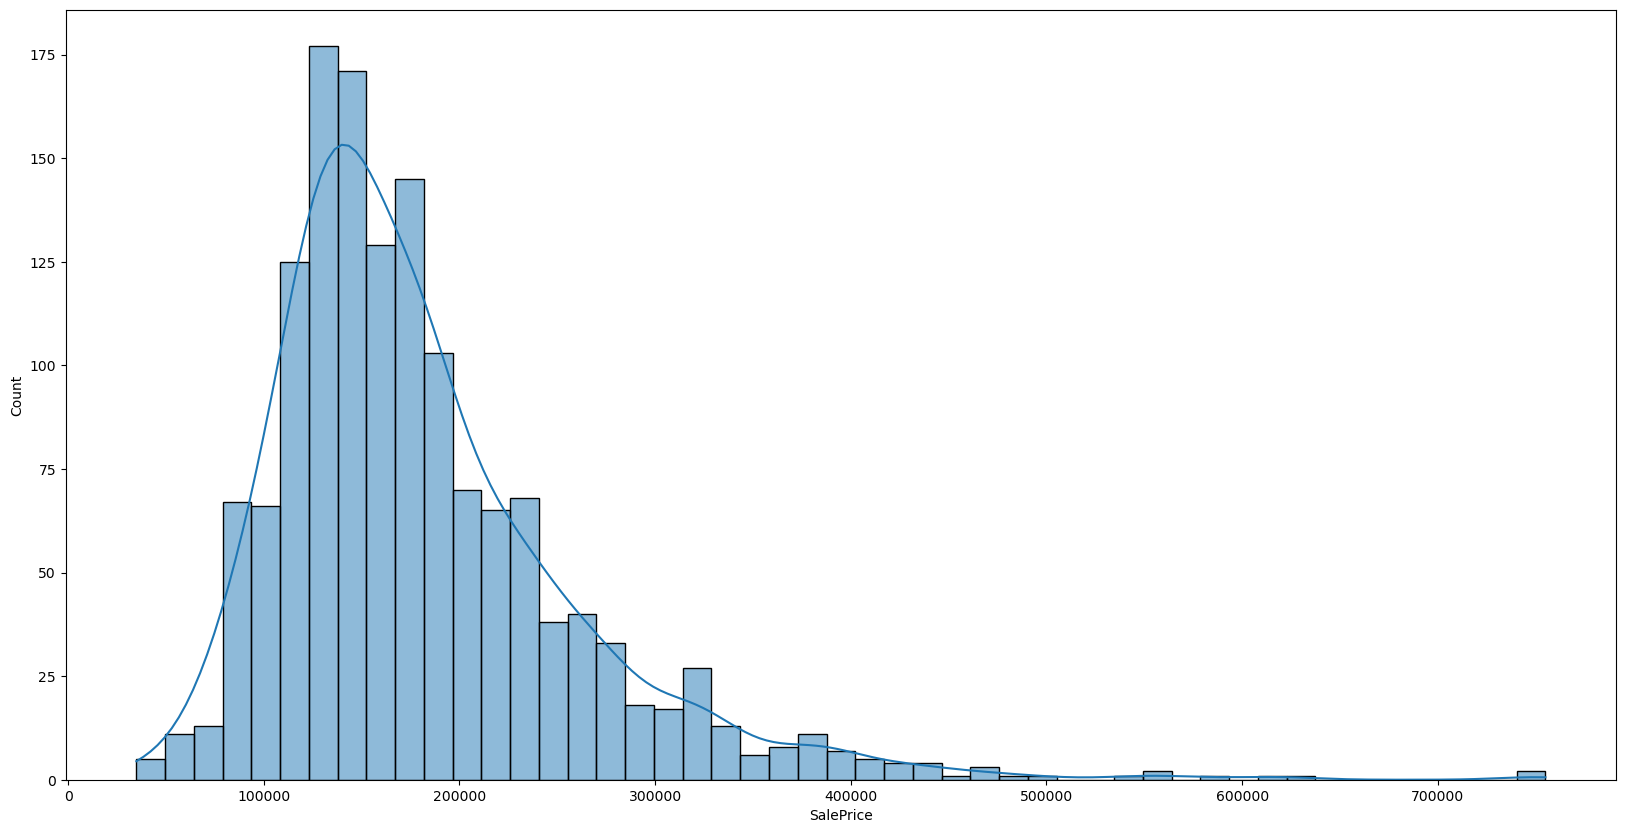

In [82]:
# Visualizing the target column 'SalePrice'
plt.figure(figsize=(20,10))
sns.histplot(x=df['SalePrice'],kde=True)
plt.title('')
plt.show()

#### From the histogram we can see that the target column is right skewed so we need to do log transform

In [83]:
df['SalePrice']=np.log(df['SalePrice'])

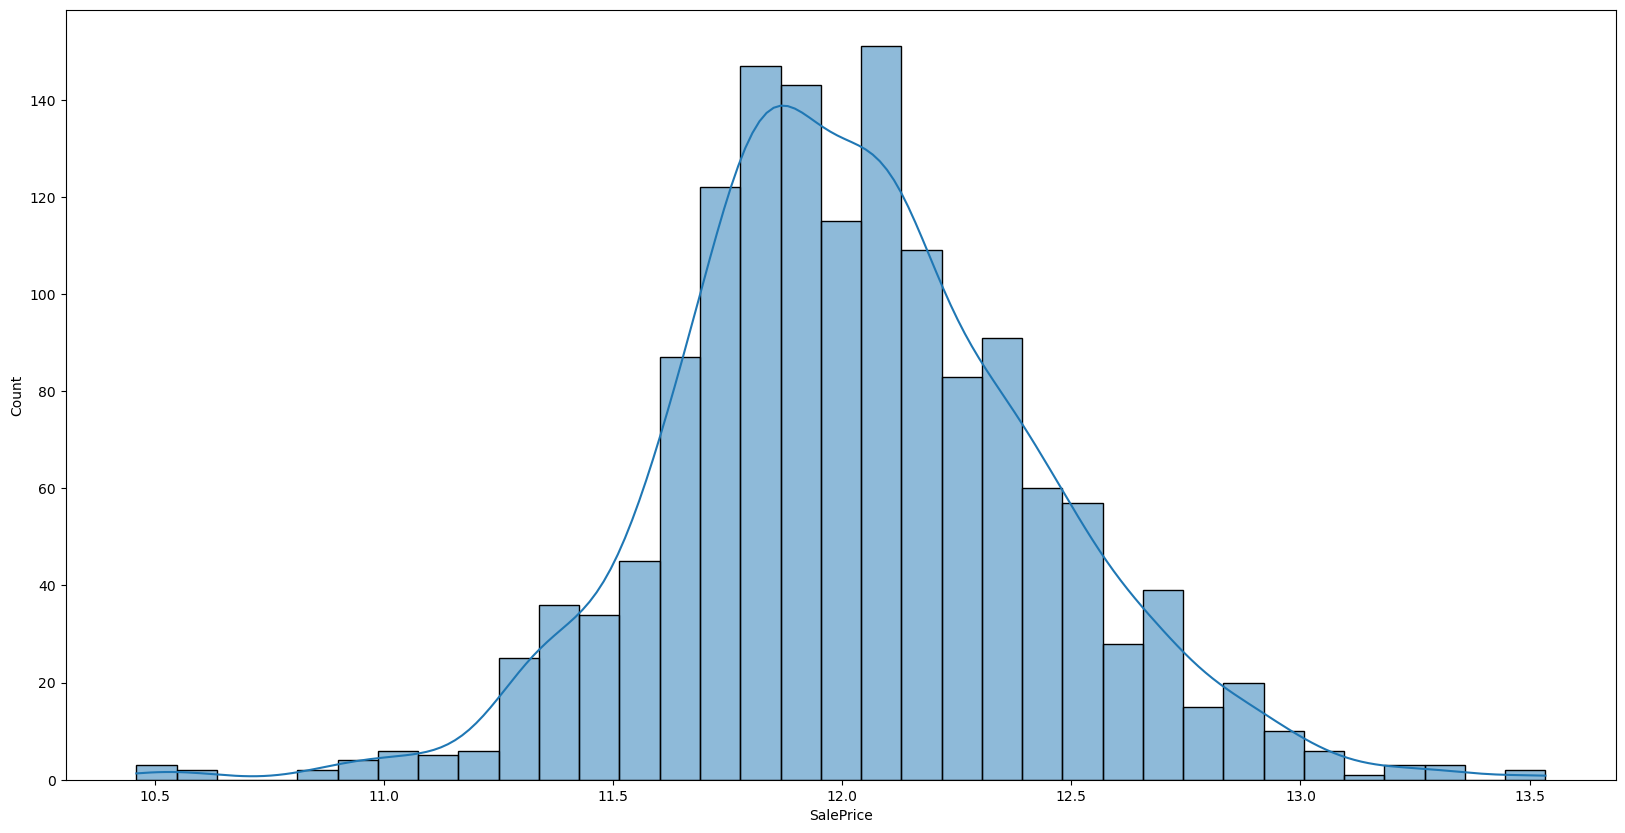

In [84]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['SalePrice'],kde=True)
plt.show()

#### After log transform on target column 'SalePrice', its looking normally distributed

In [85]:
from scipy import stats

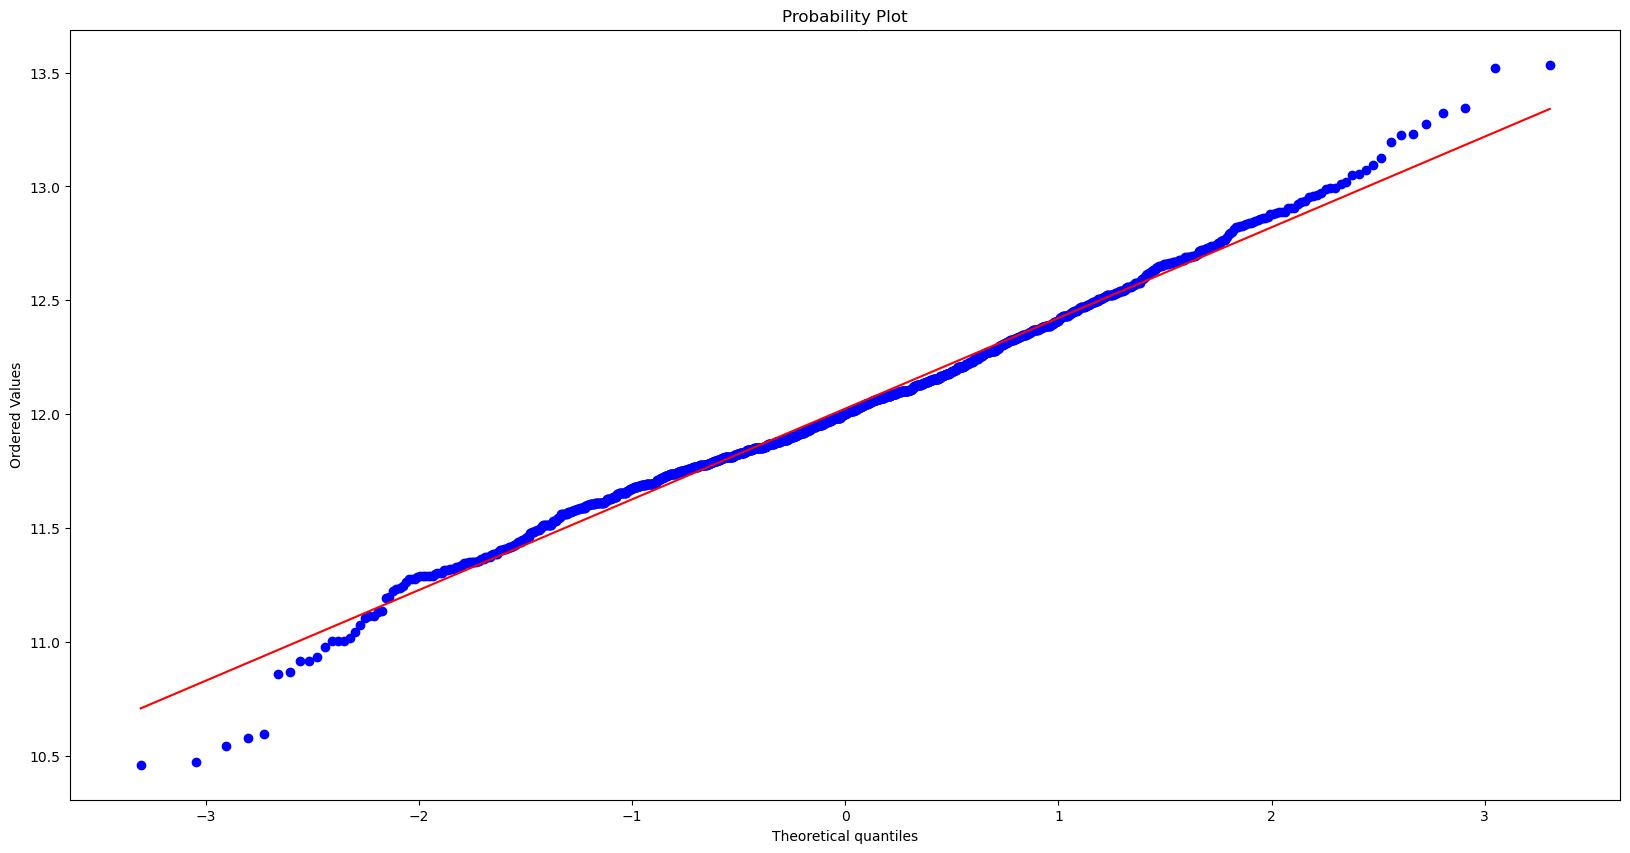

In [86]:
# Plotting probability plot of SalePrice column
plt.figure(figsize=(20,10))
res=stats.probplot(df['SalePrice'],plot=plt)
plt.show()

In [87]:
# checking skewness of all the numerical columns
skewness = df[numerical_features].skew()
skewness

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

### Skew values and their meaning
  #### -0.5 to +0.5 ---> Symmetric
  #### less than -0.5 ---> Negative Skewed
  #### more than +0.5 ---> Positive Skewed

In [88]:
pos_skew=skewness[(skewness>0.5)]
pos_skew

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallCond       0.693067
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
HalfBath          0.675897
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [89]:
pos_skew.count()

26

In [90]:
pos_skew_features= ['MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','HalfBath',
                'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea','MiscVal']
pos_skew_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [91]:
for i in pos_skew_features:
    df[i]=np.log1p(df[i])

In [92]:
transformed_features=['MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','HalfBath',
                'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea','MiscVal']

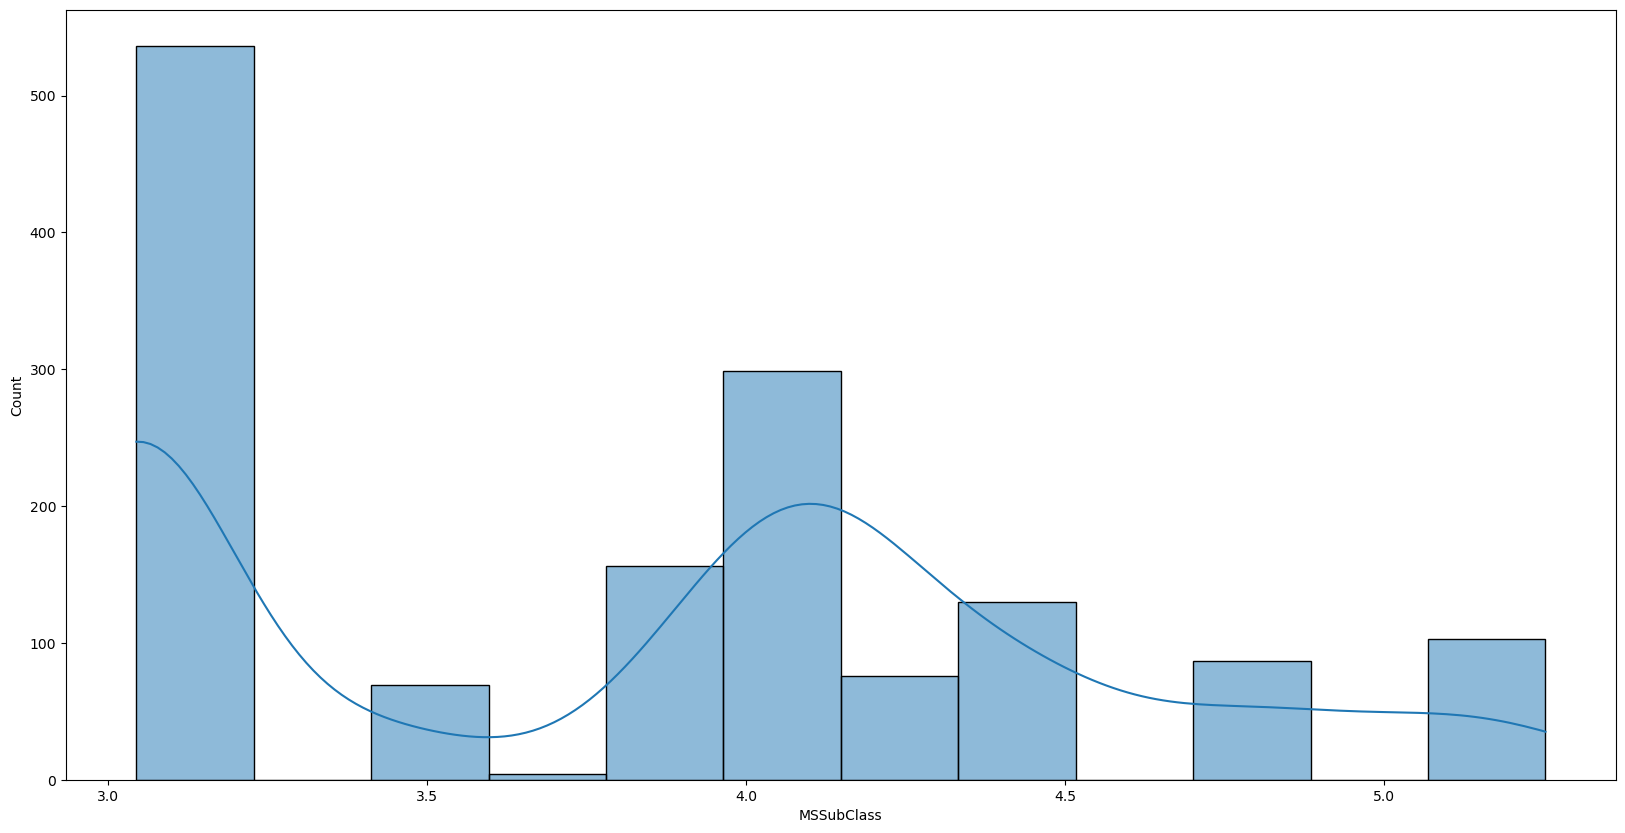

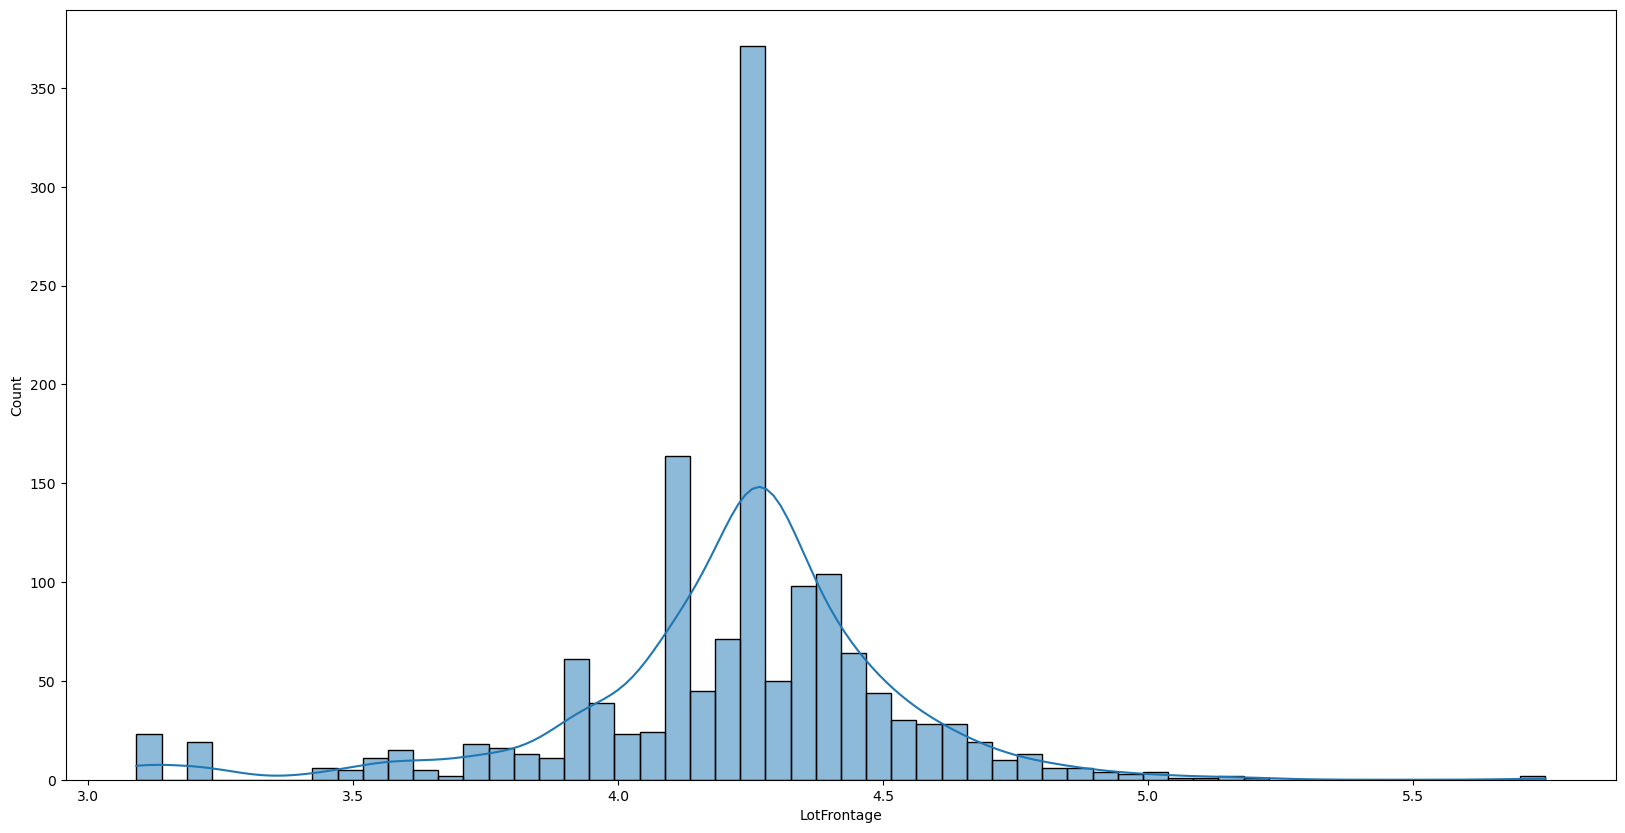

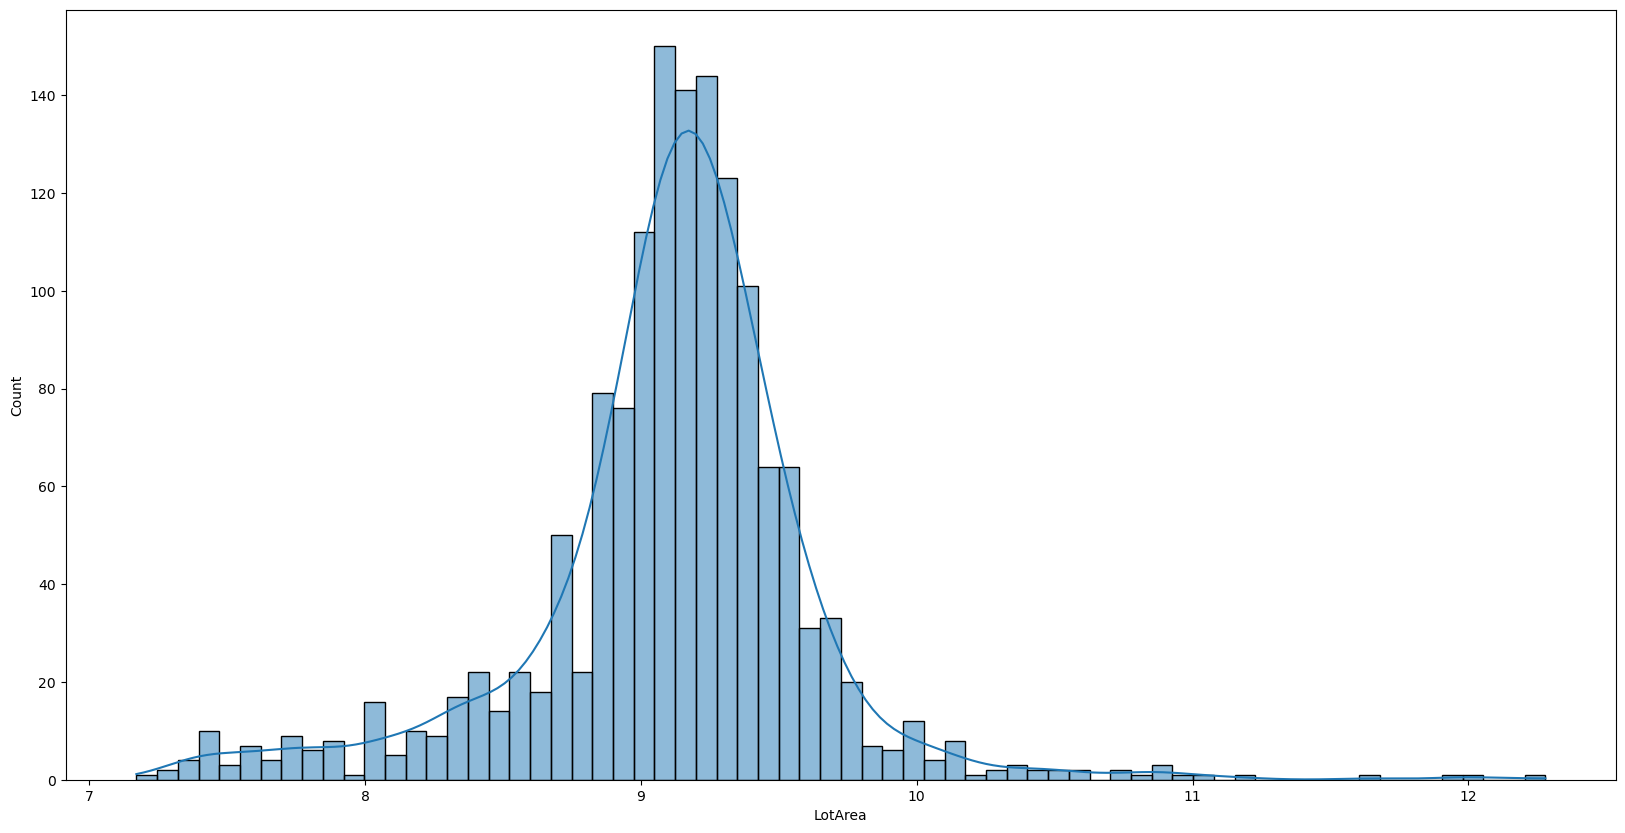

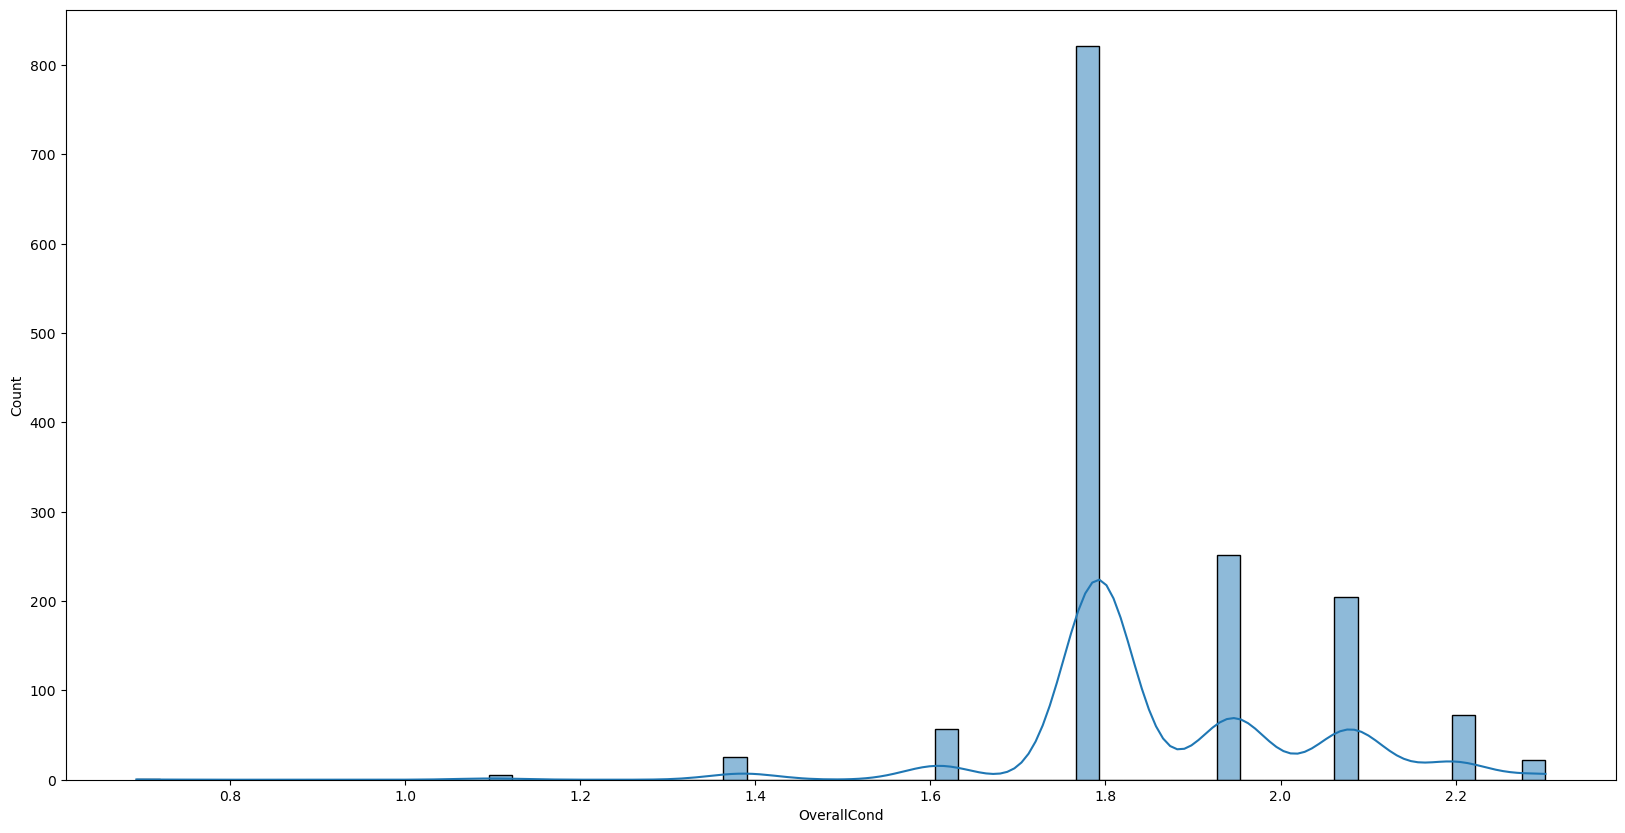

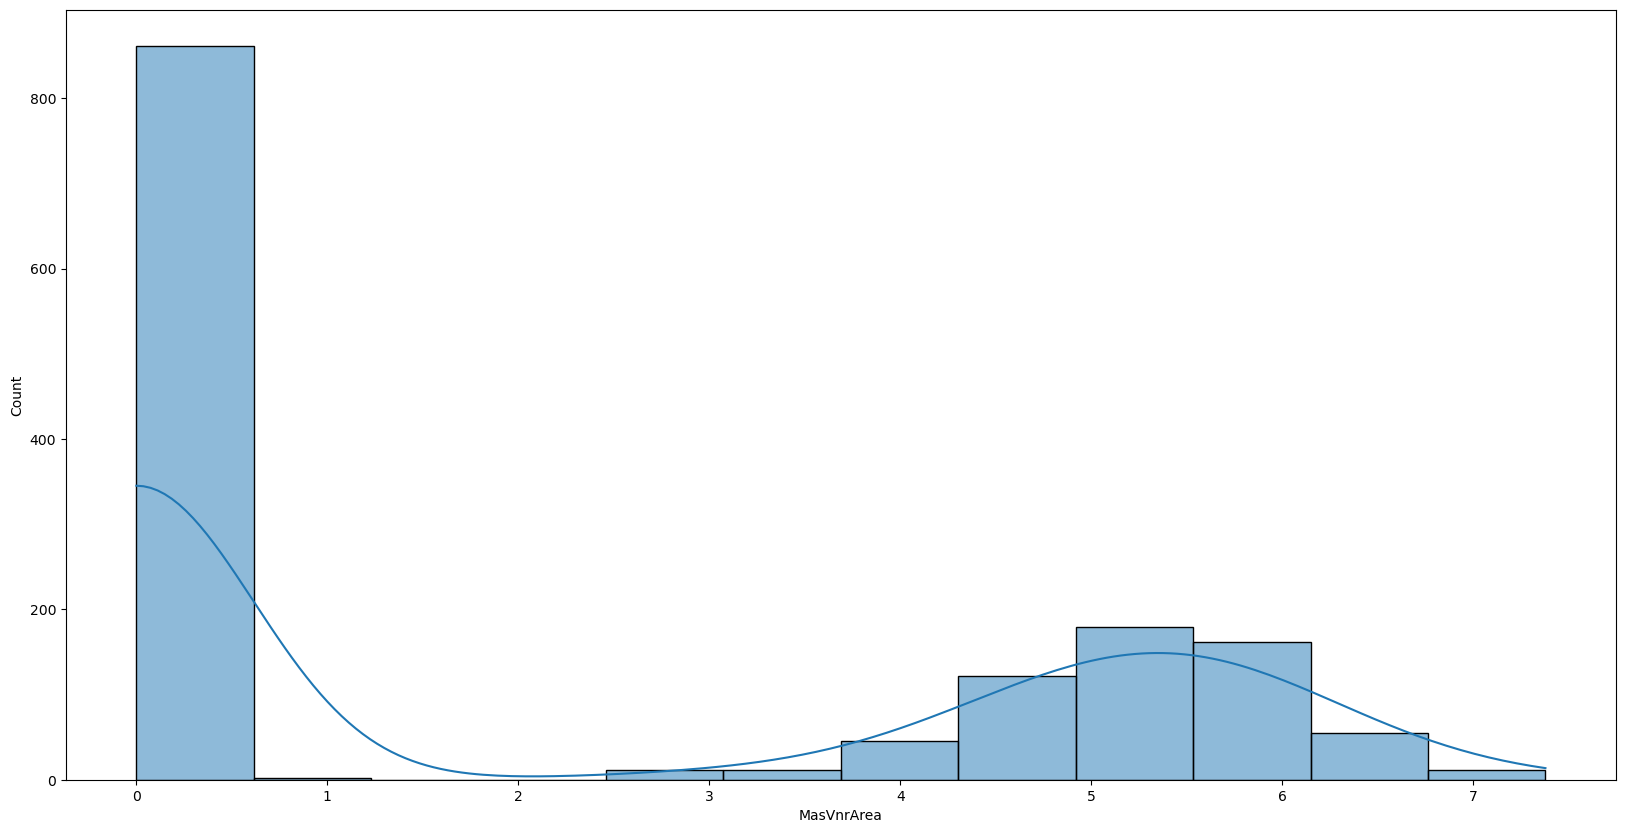

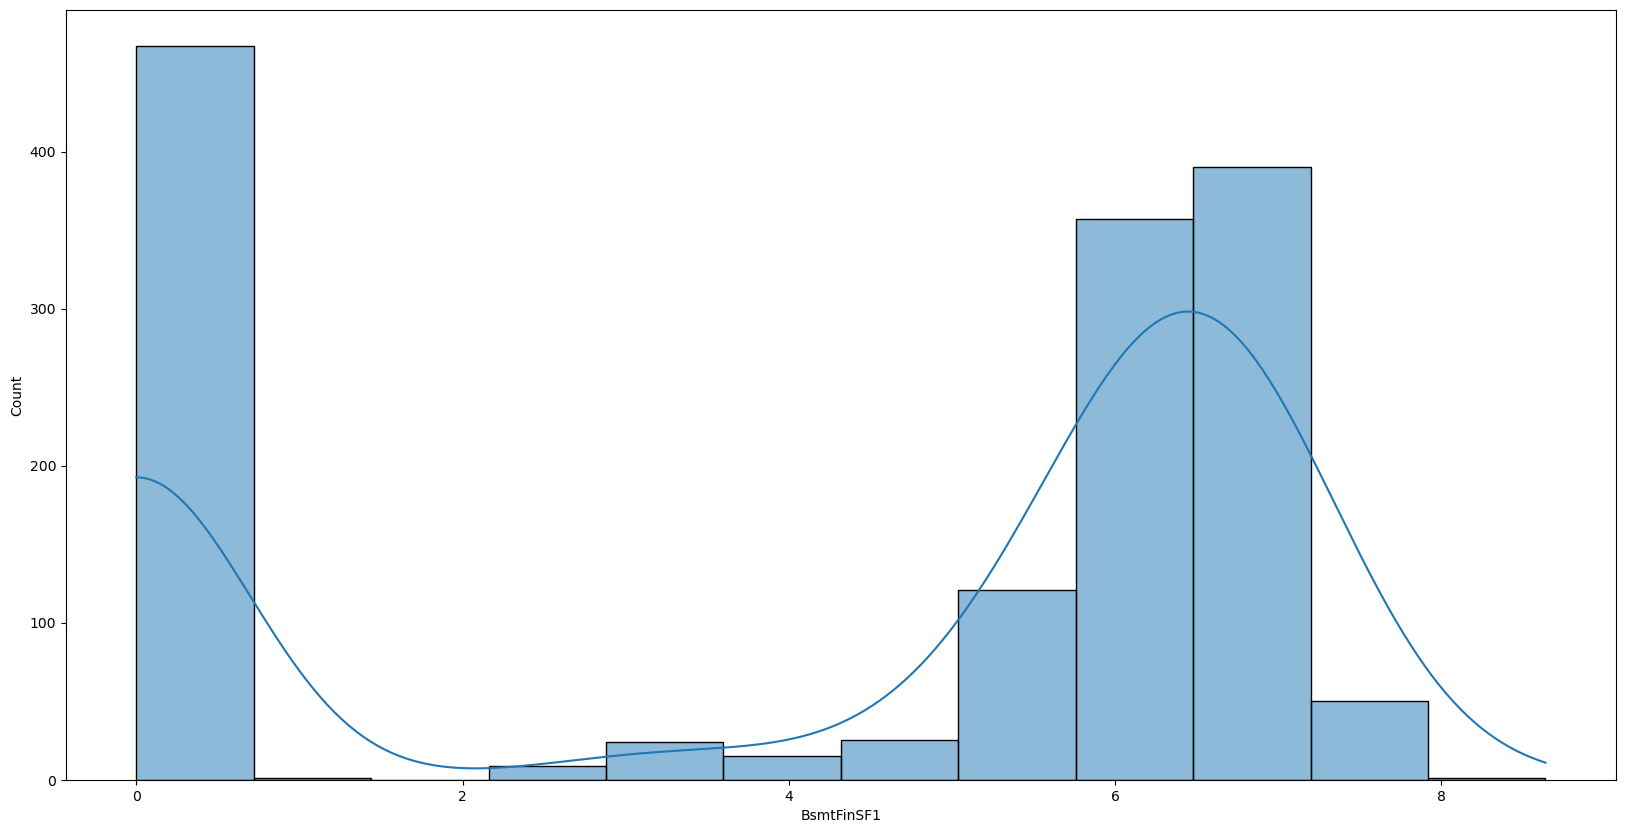

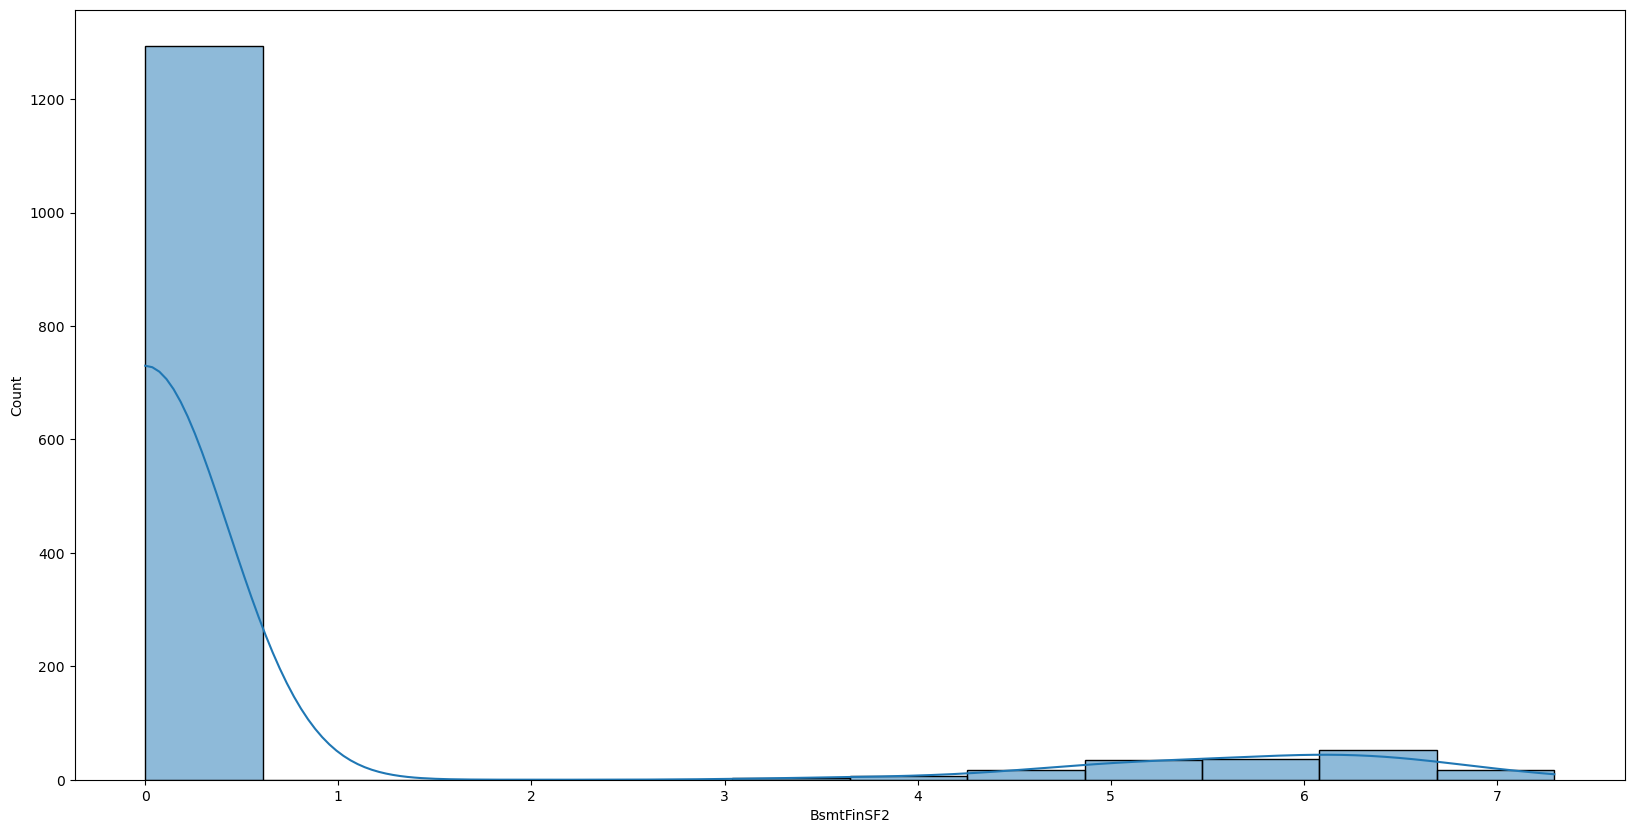

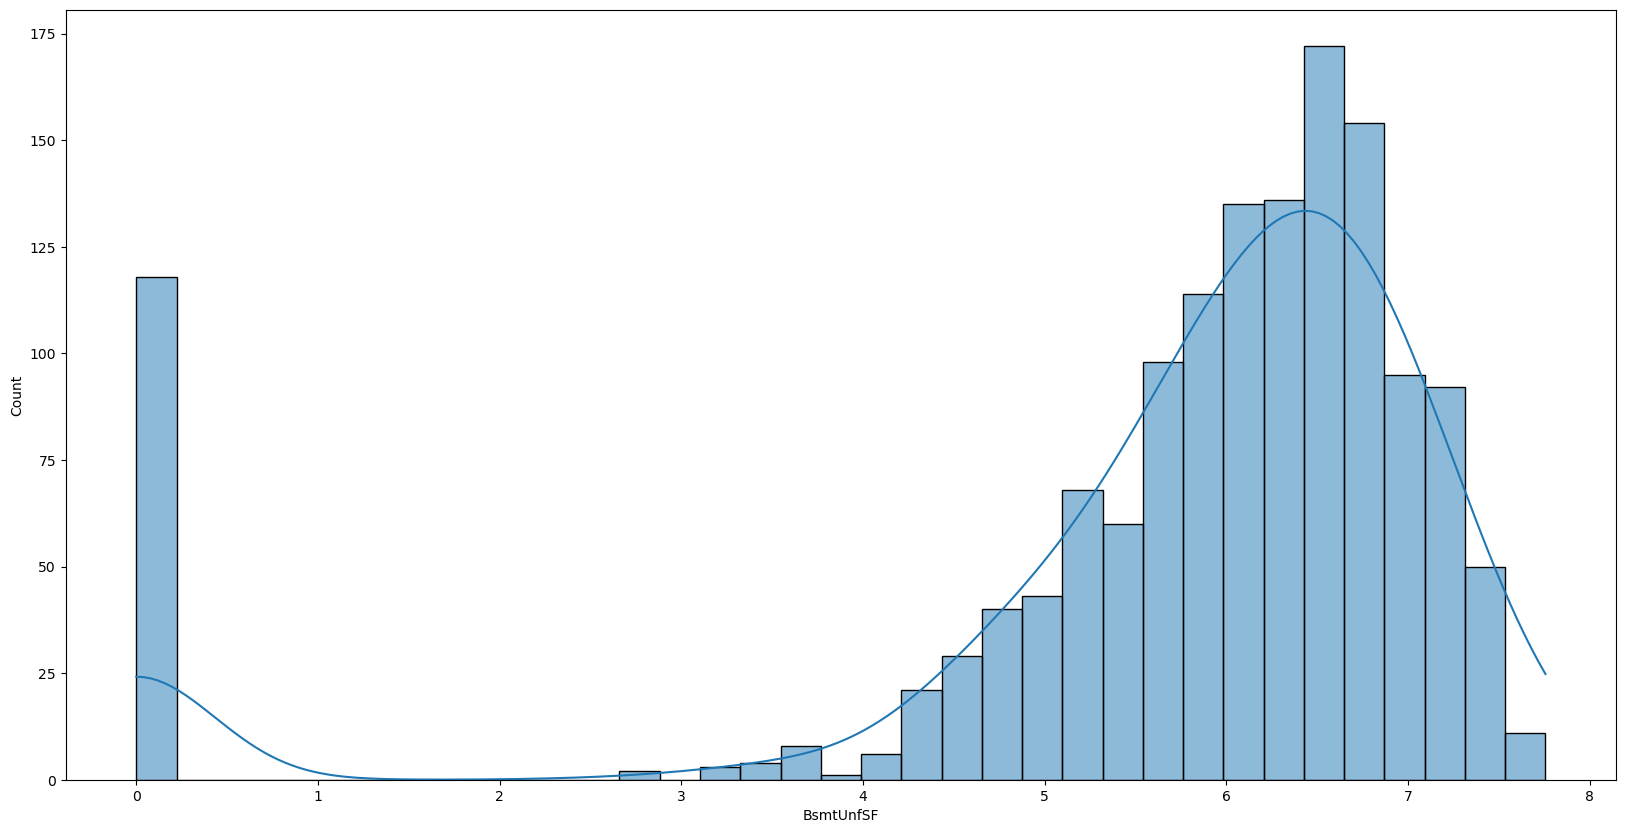

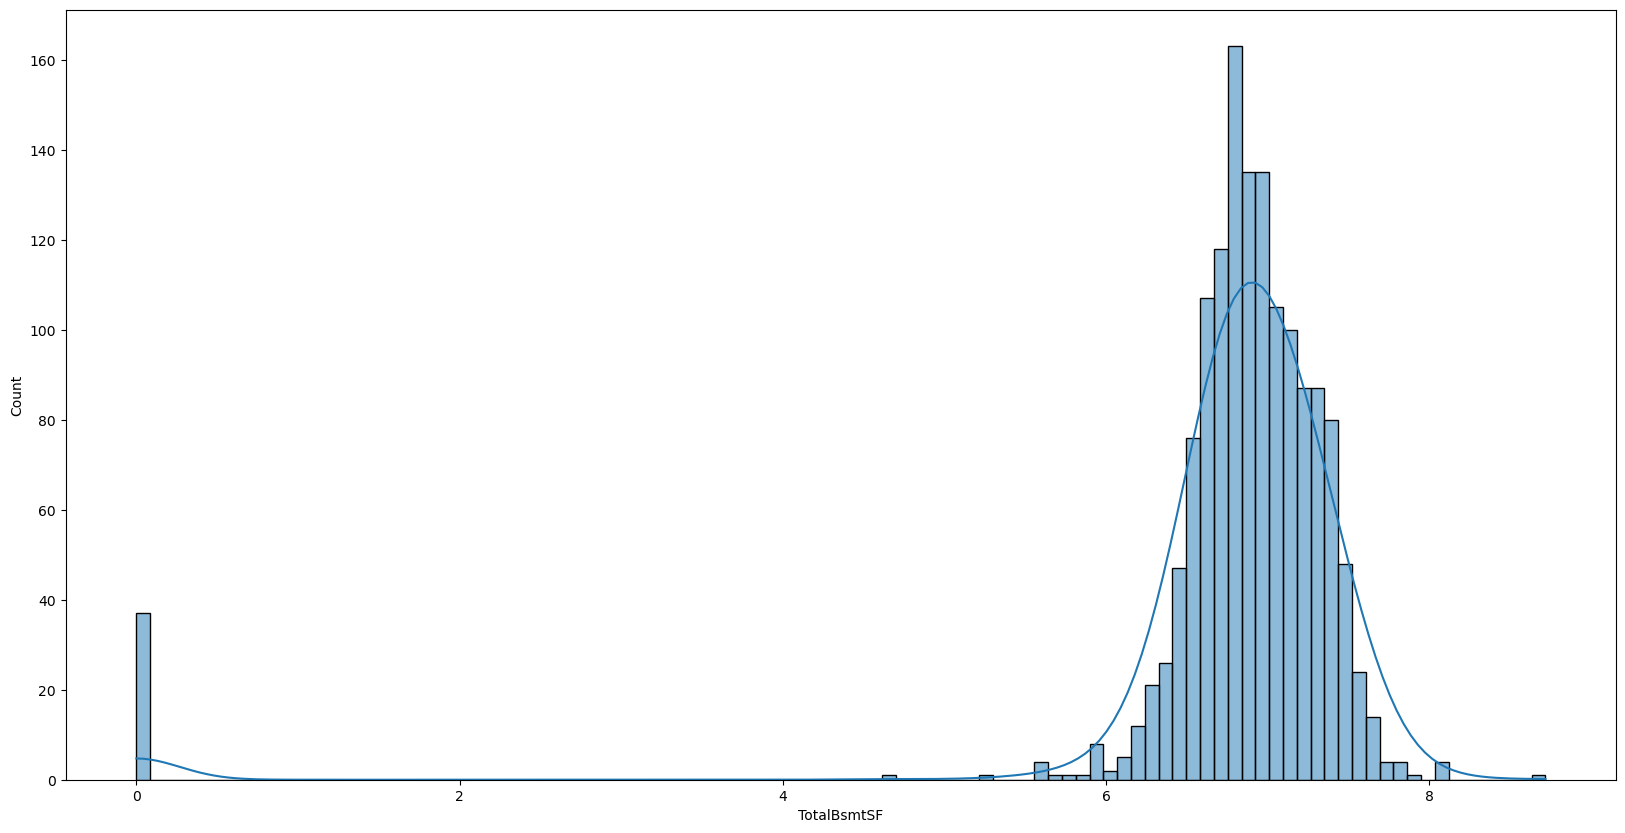

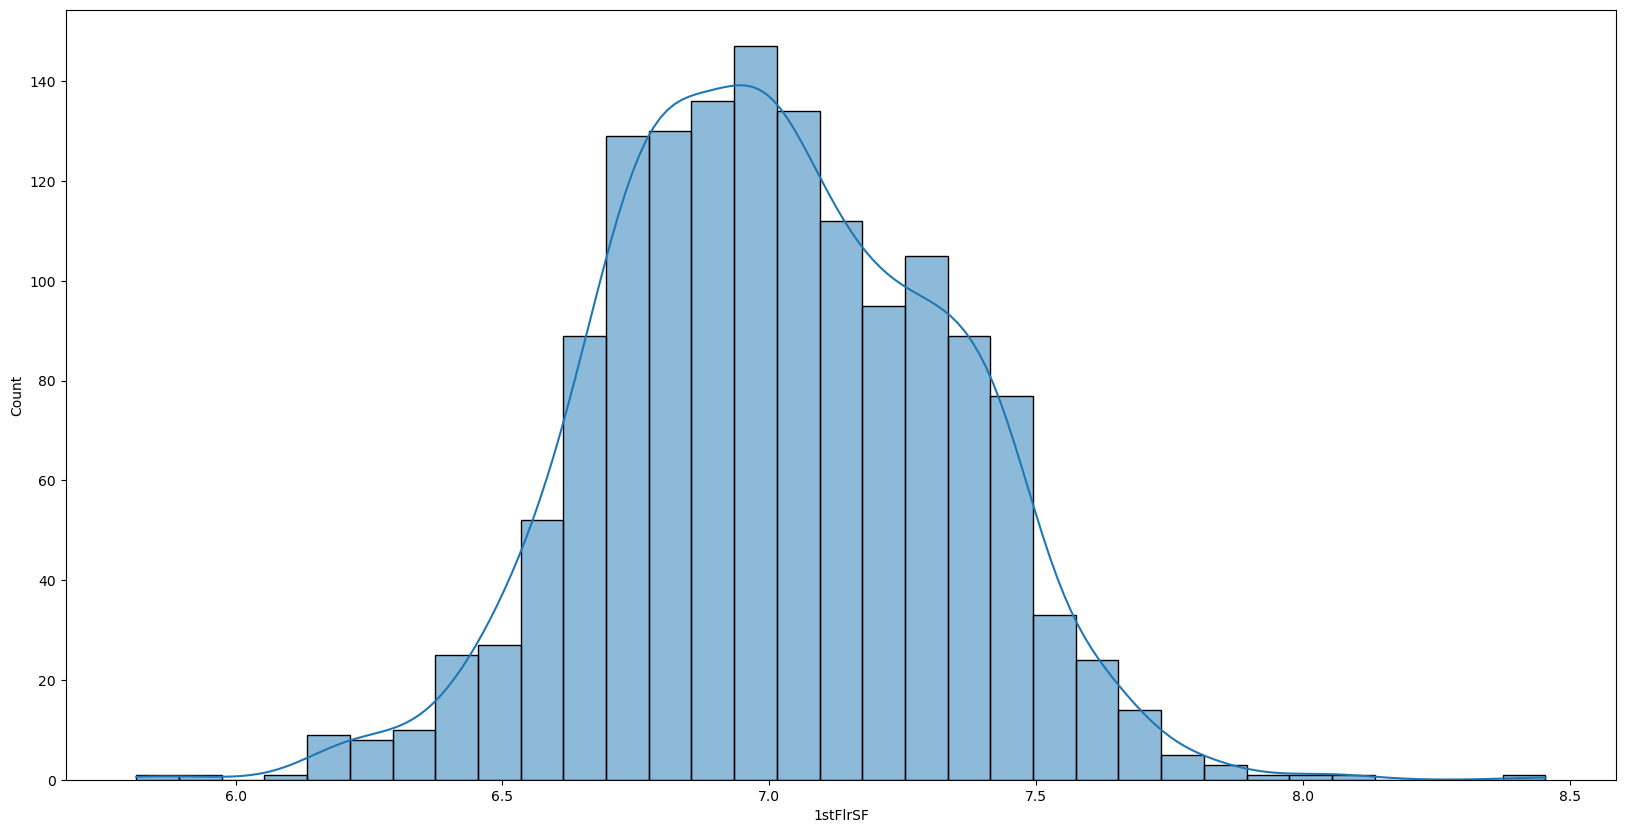

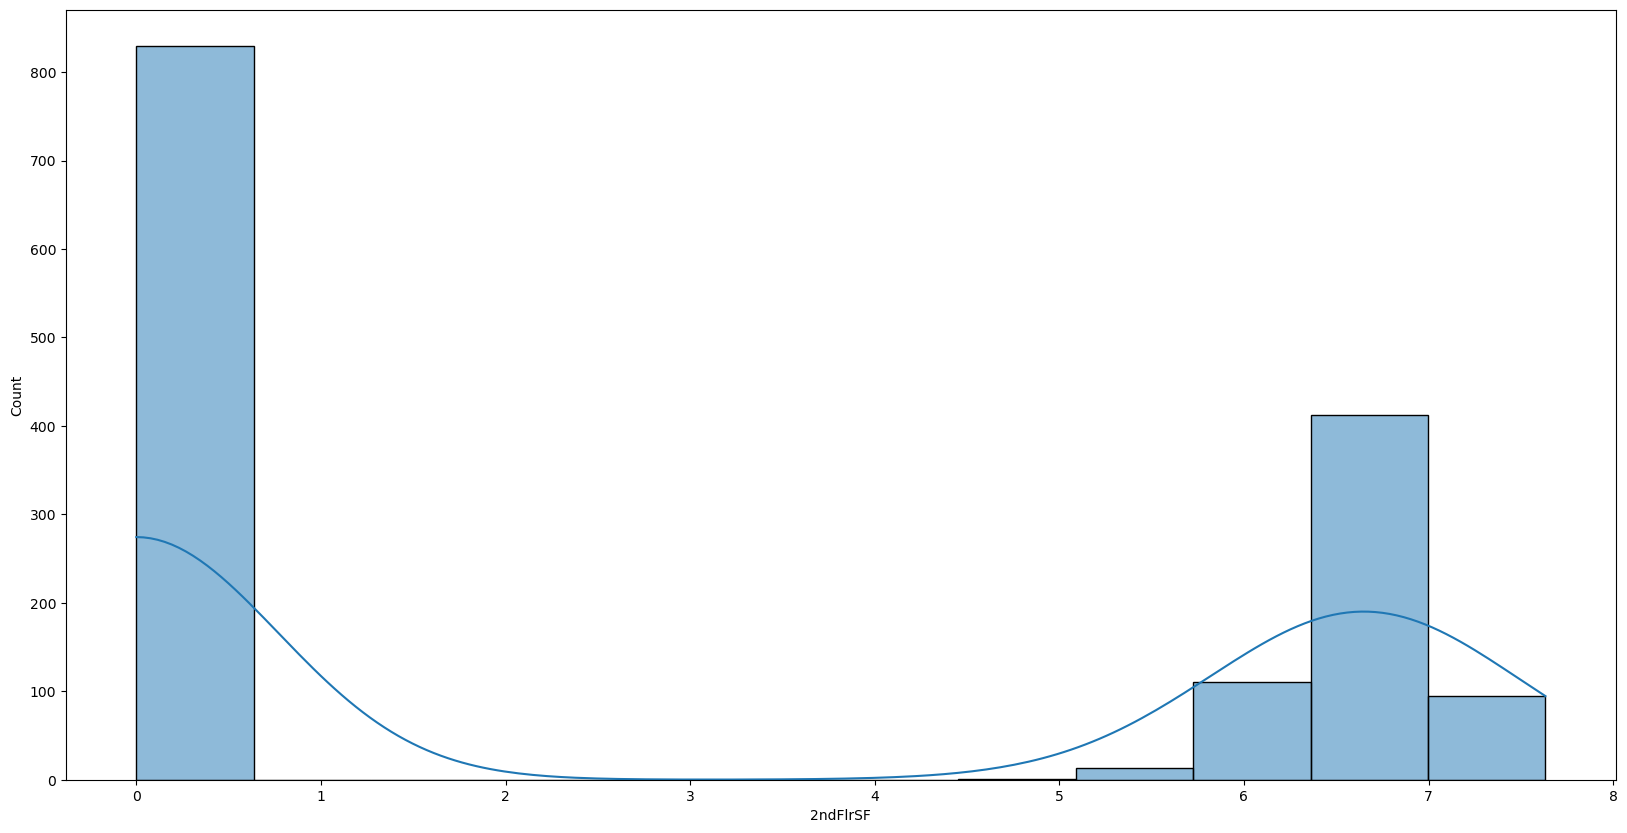

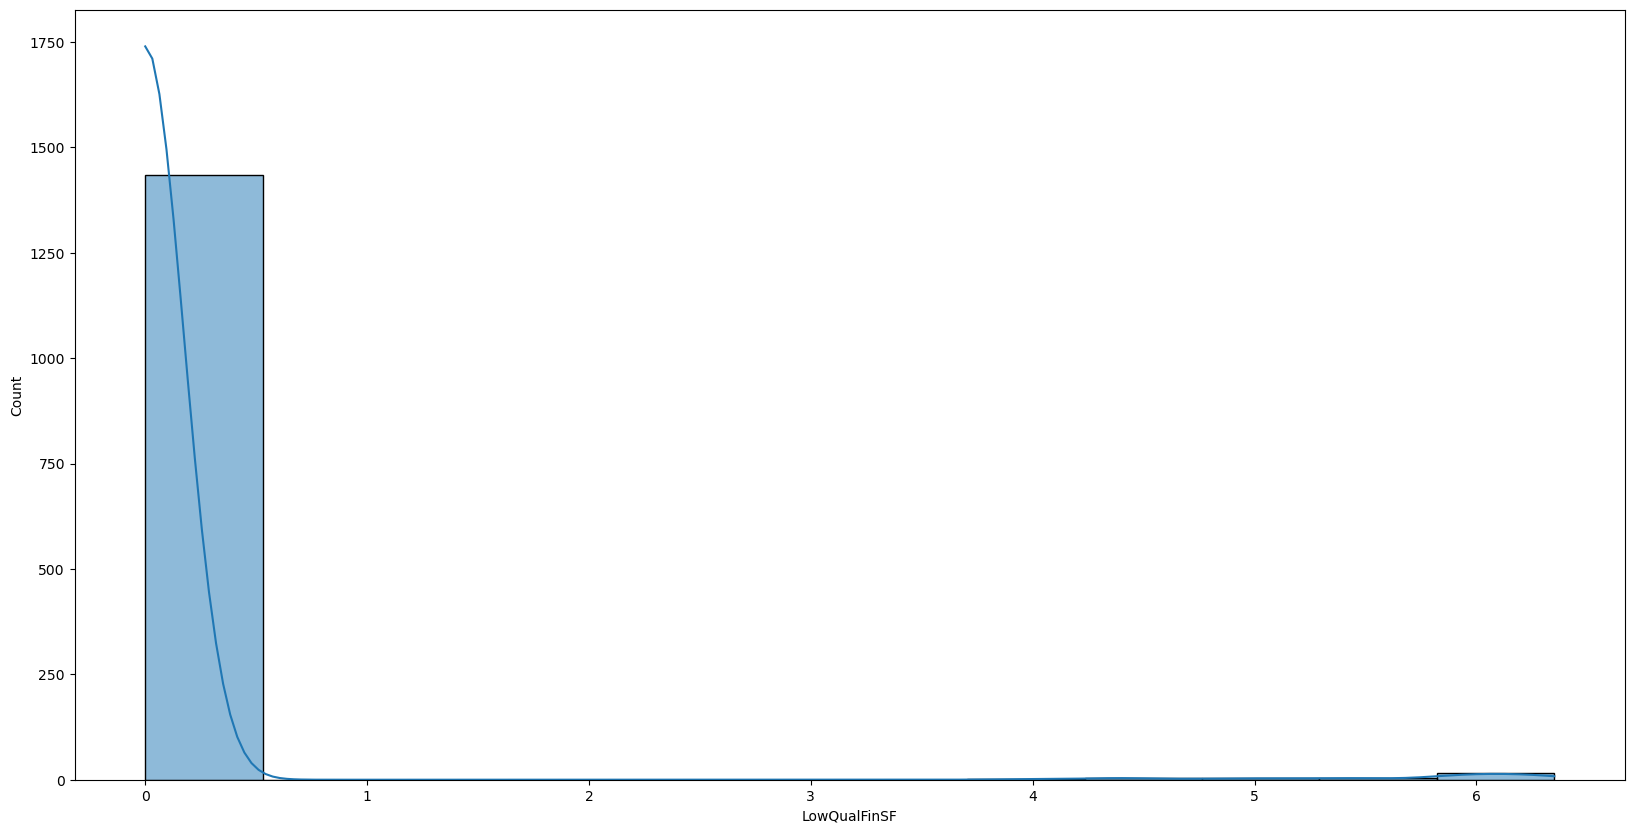

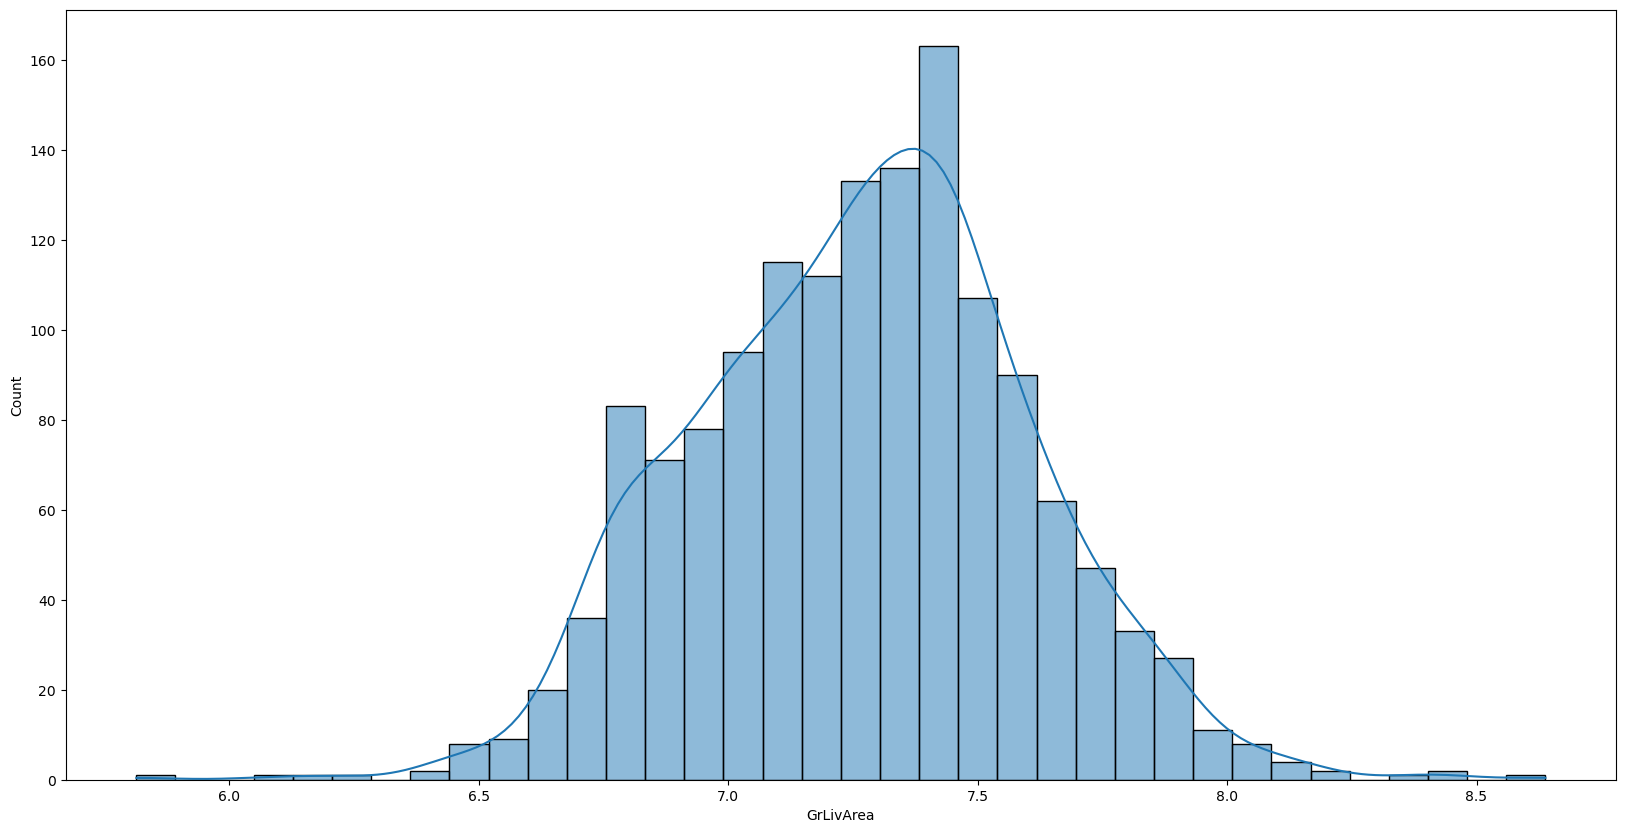

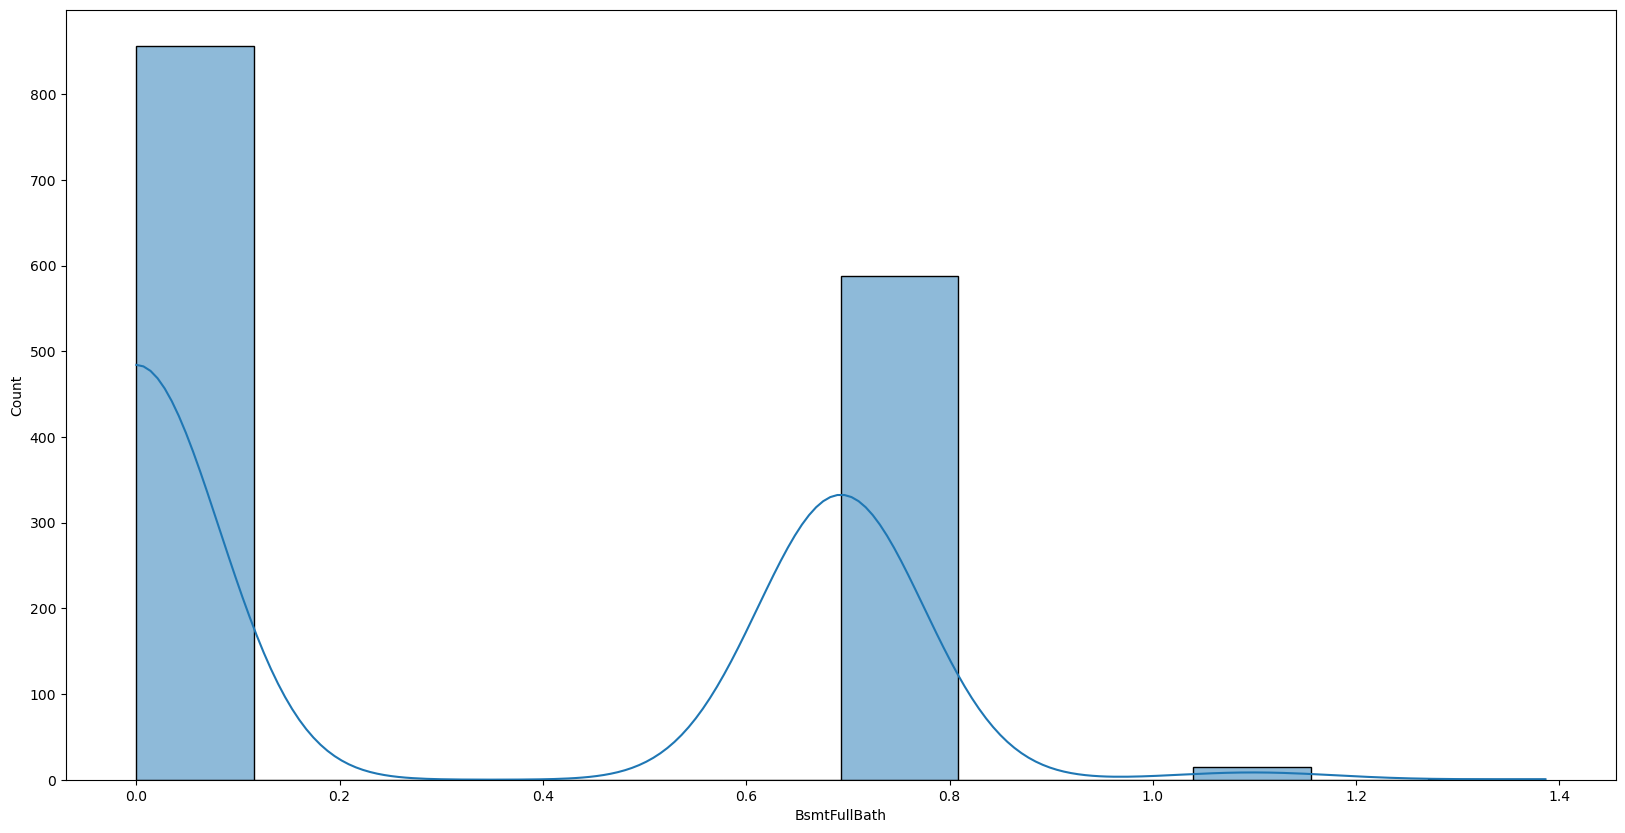

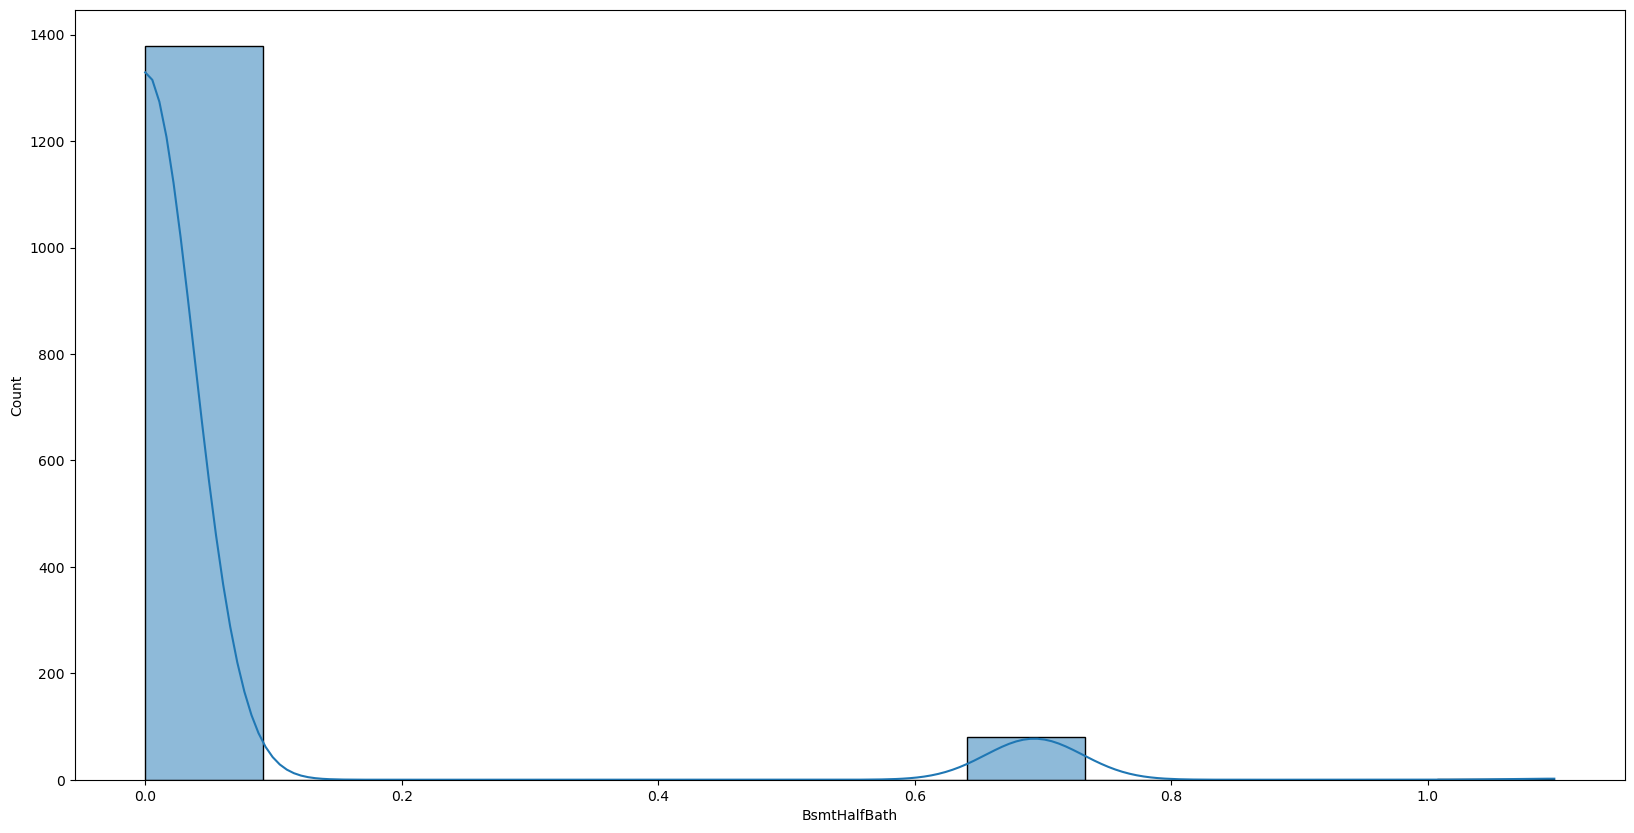

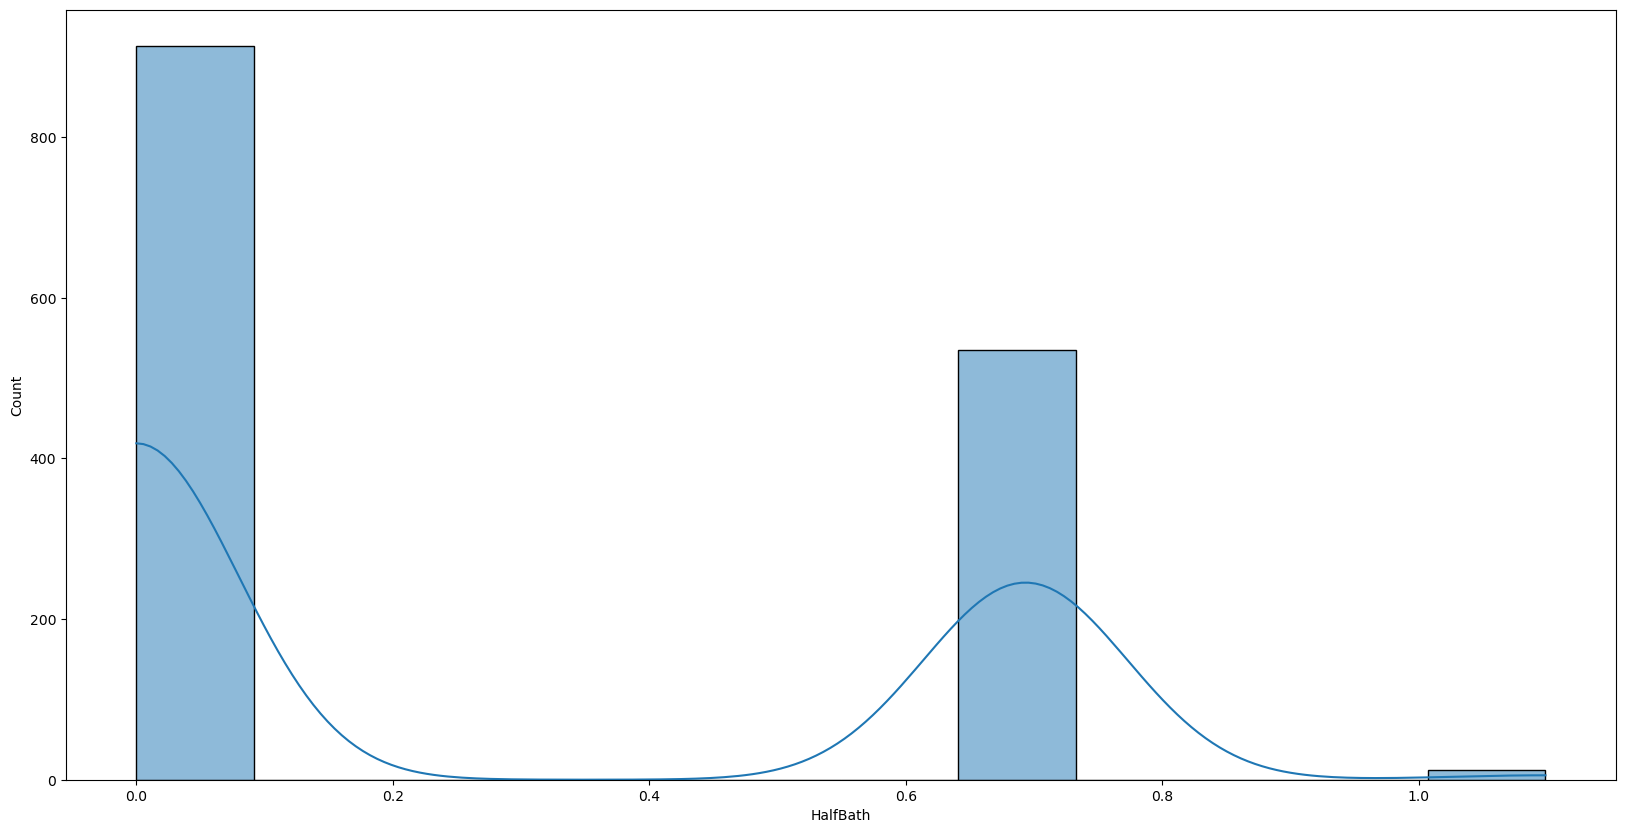

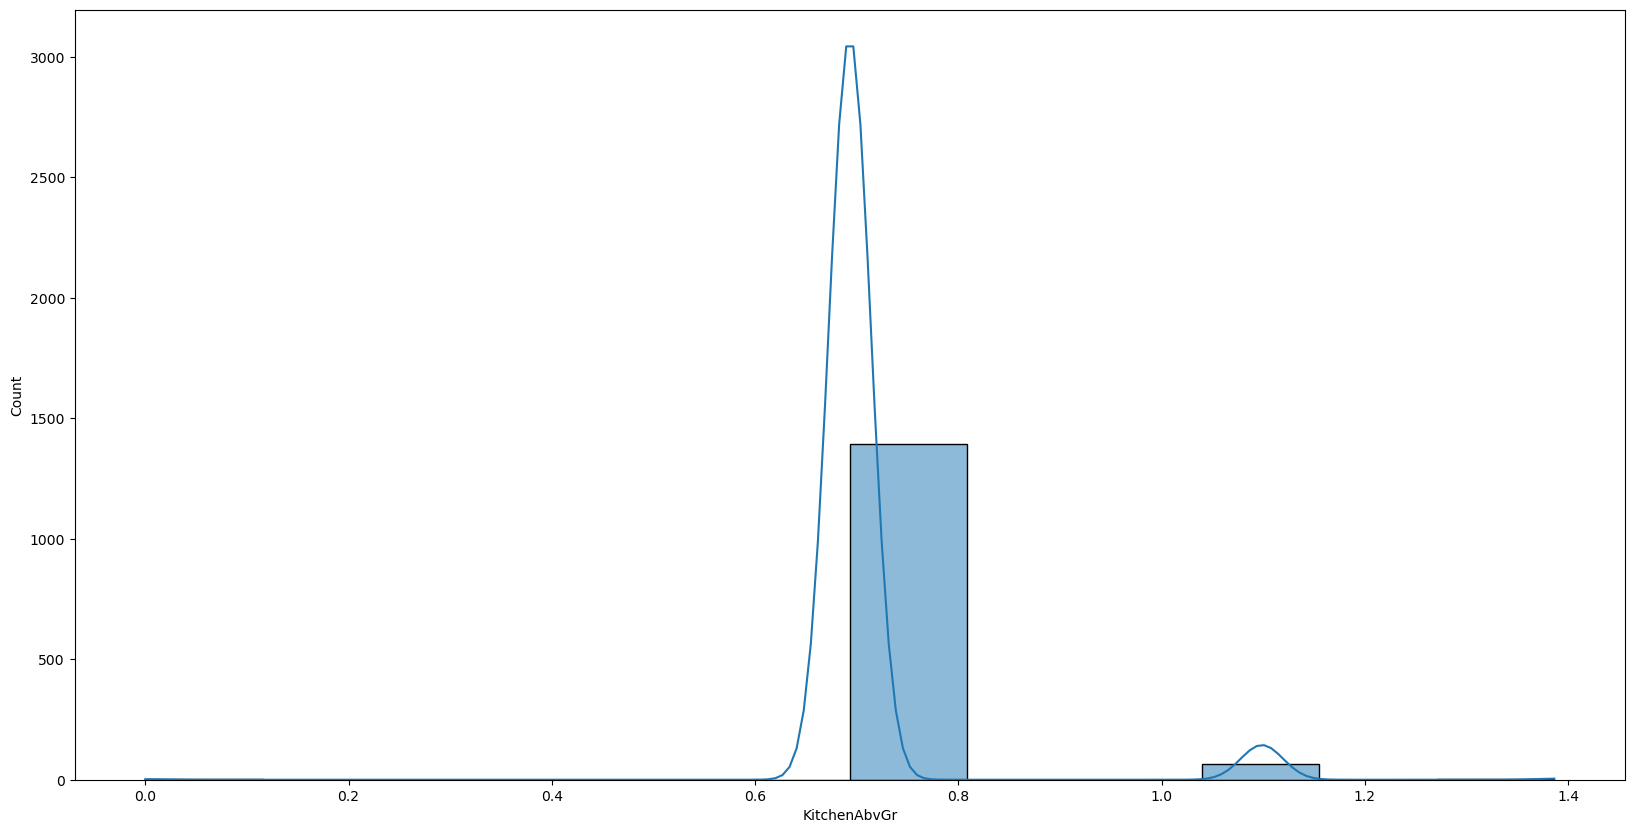

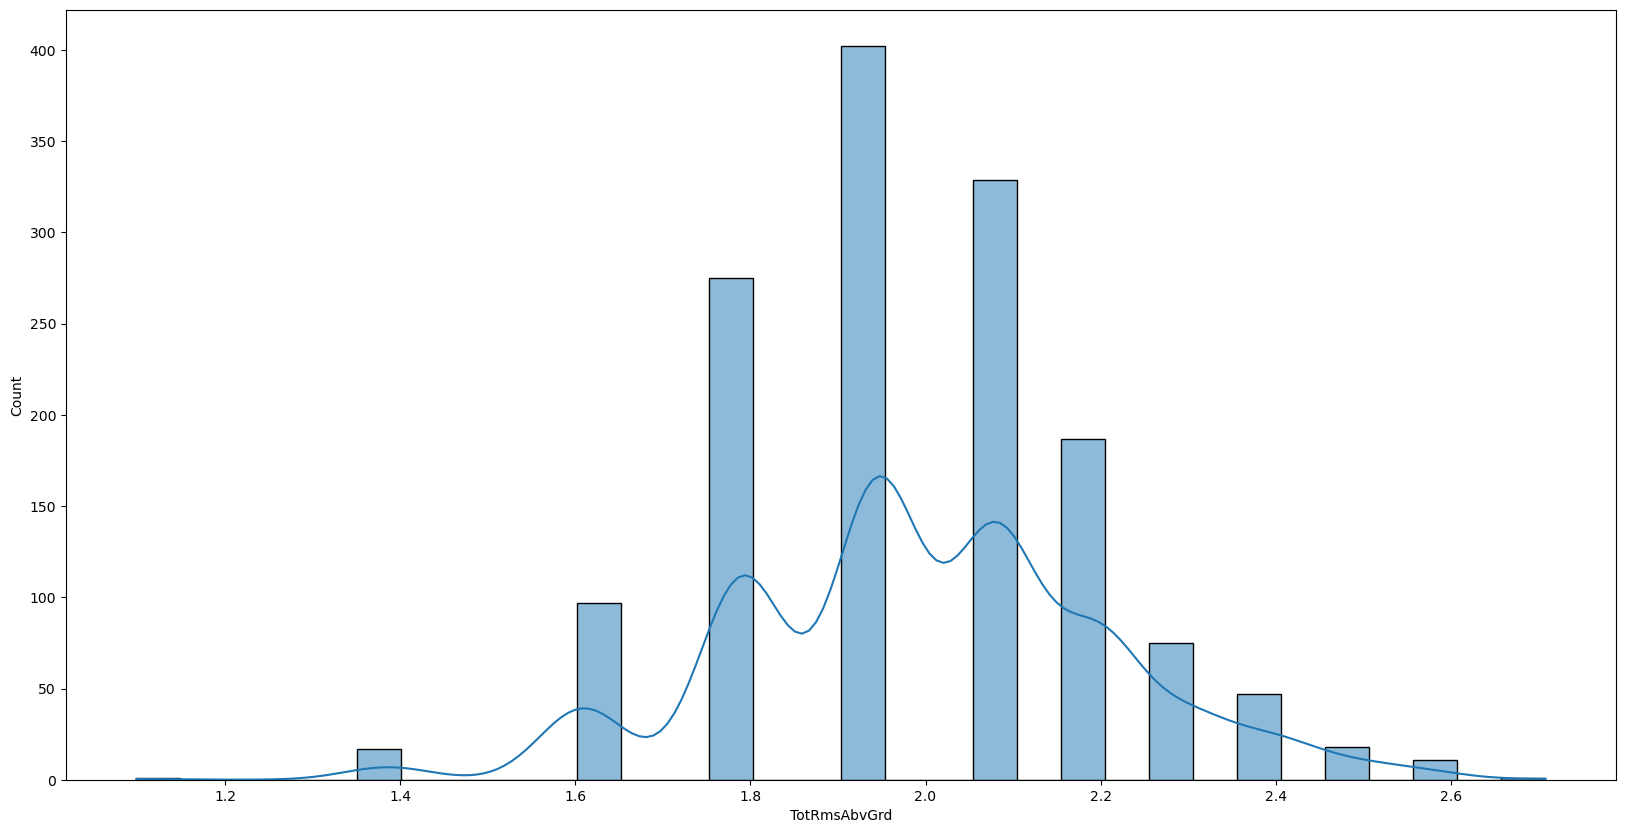

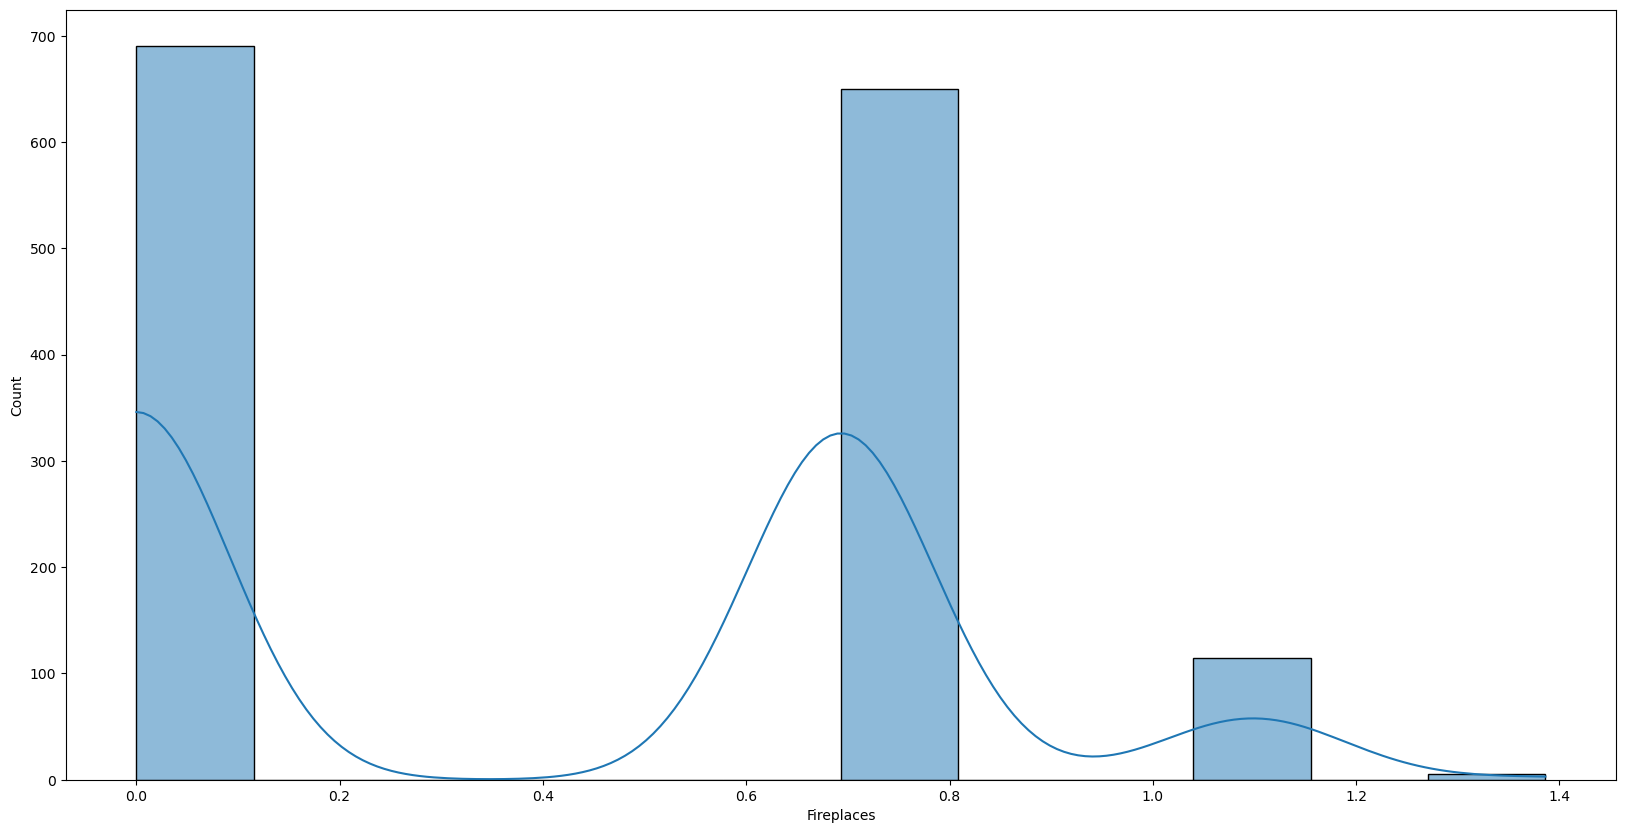

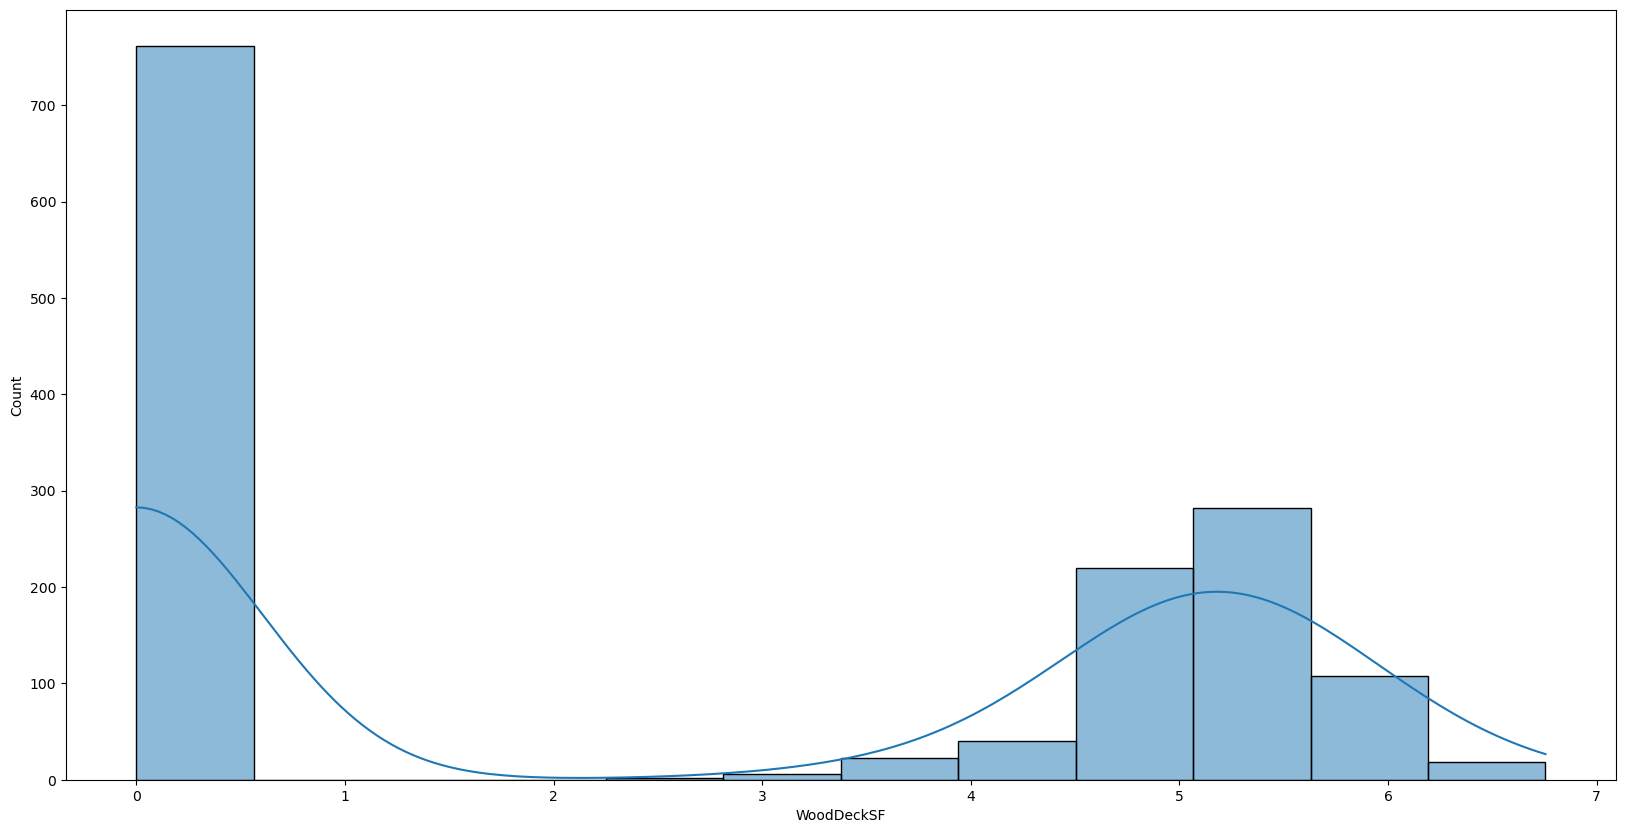

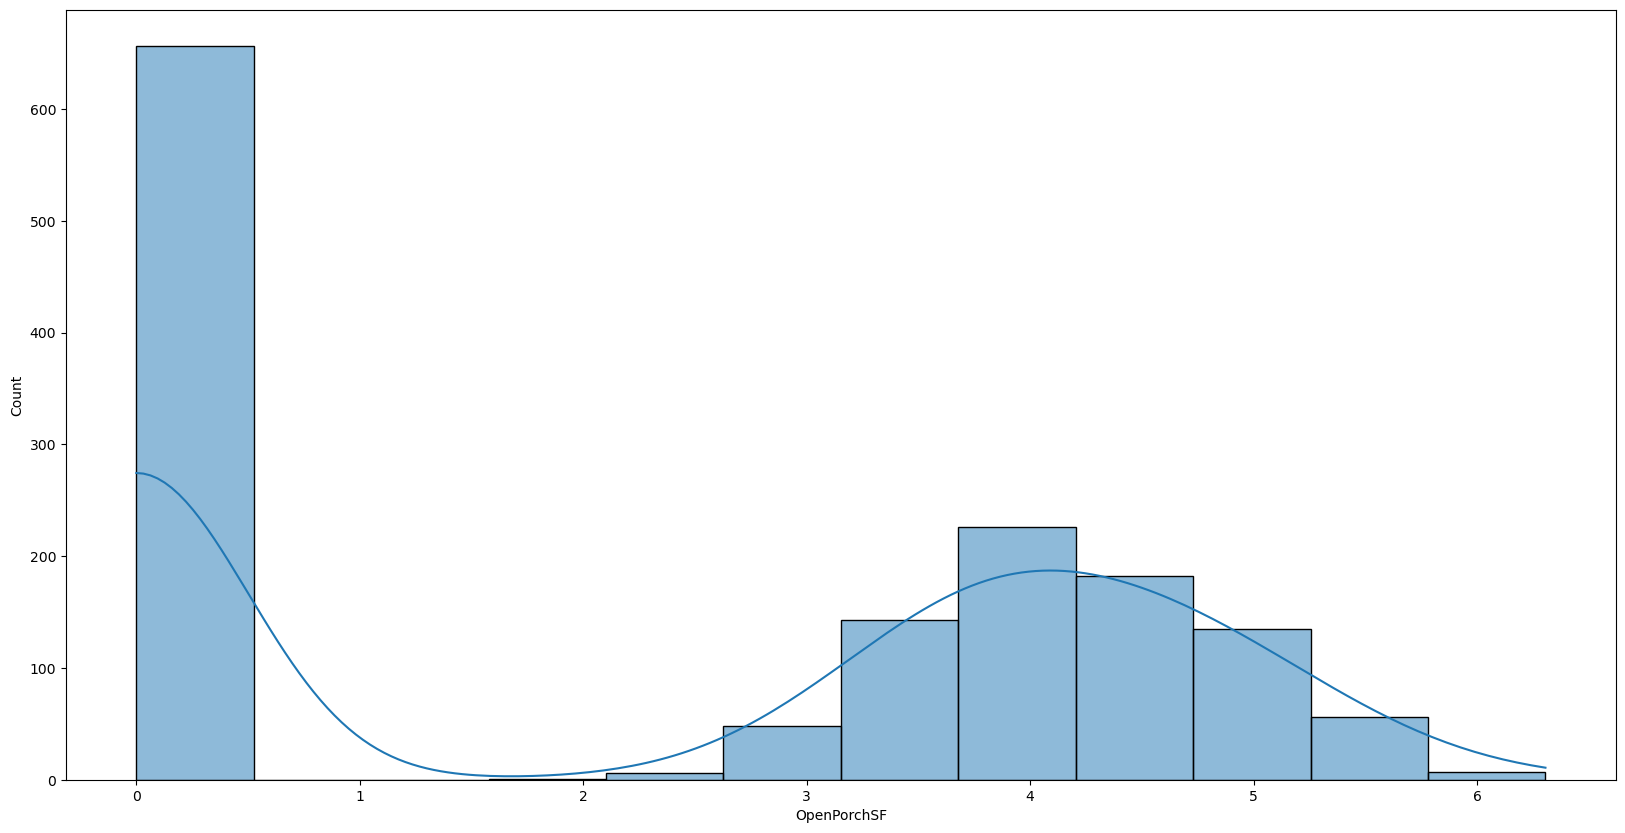

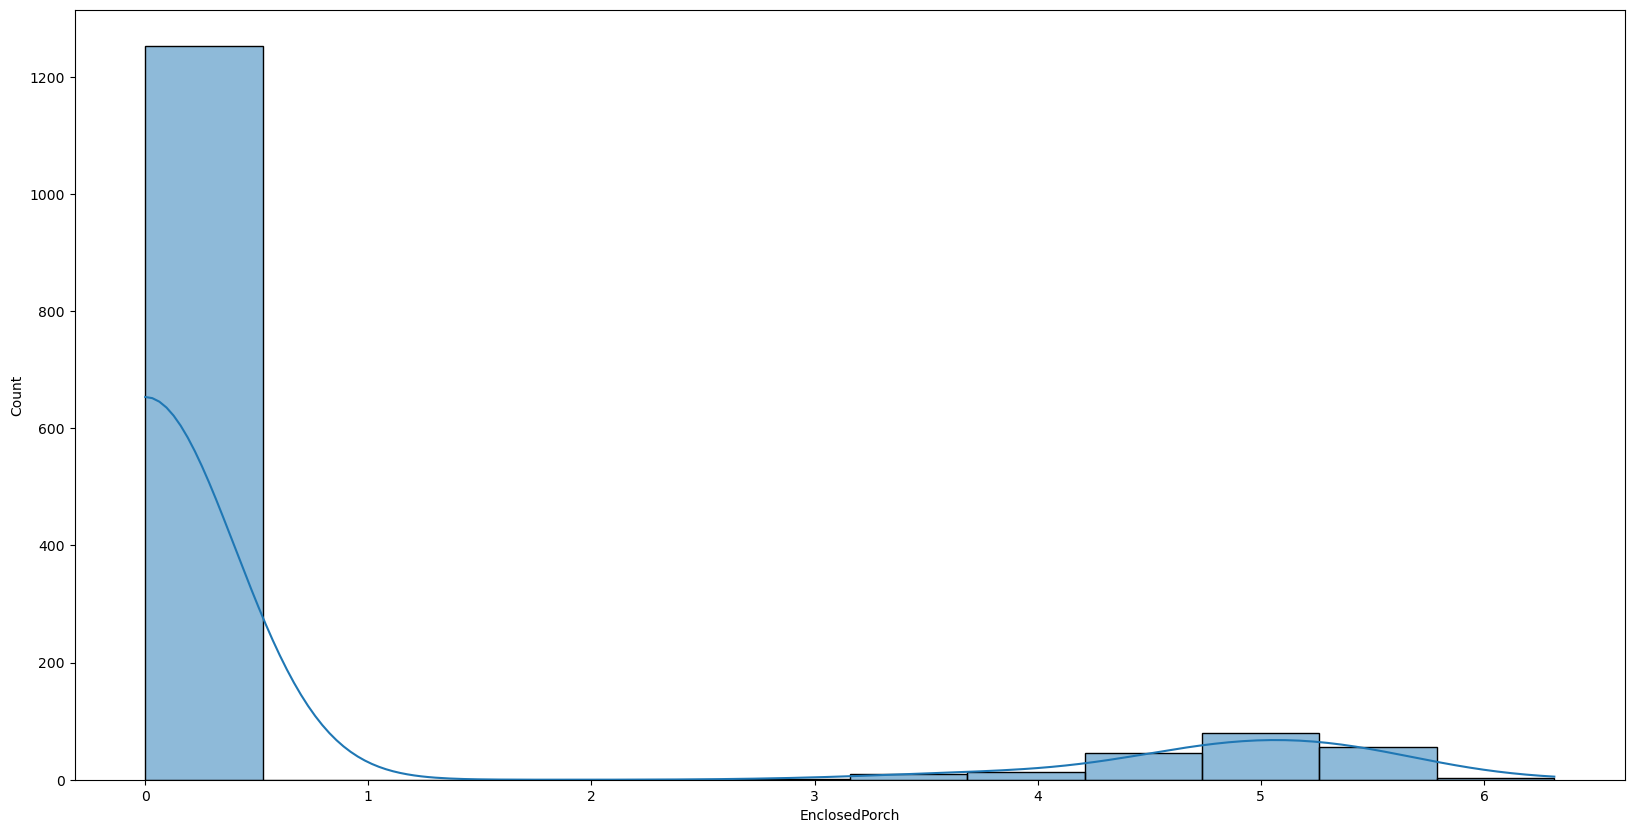

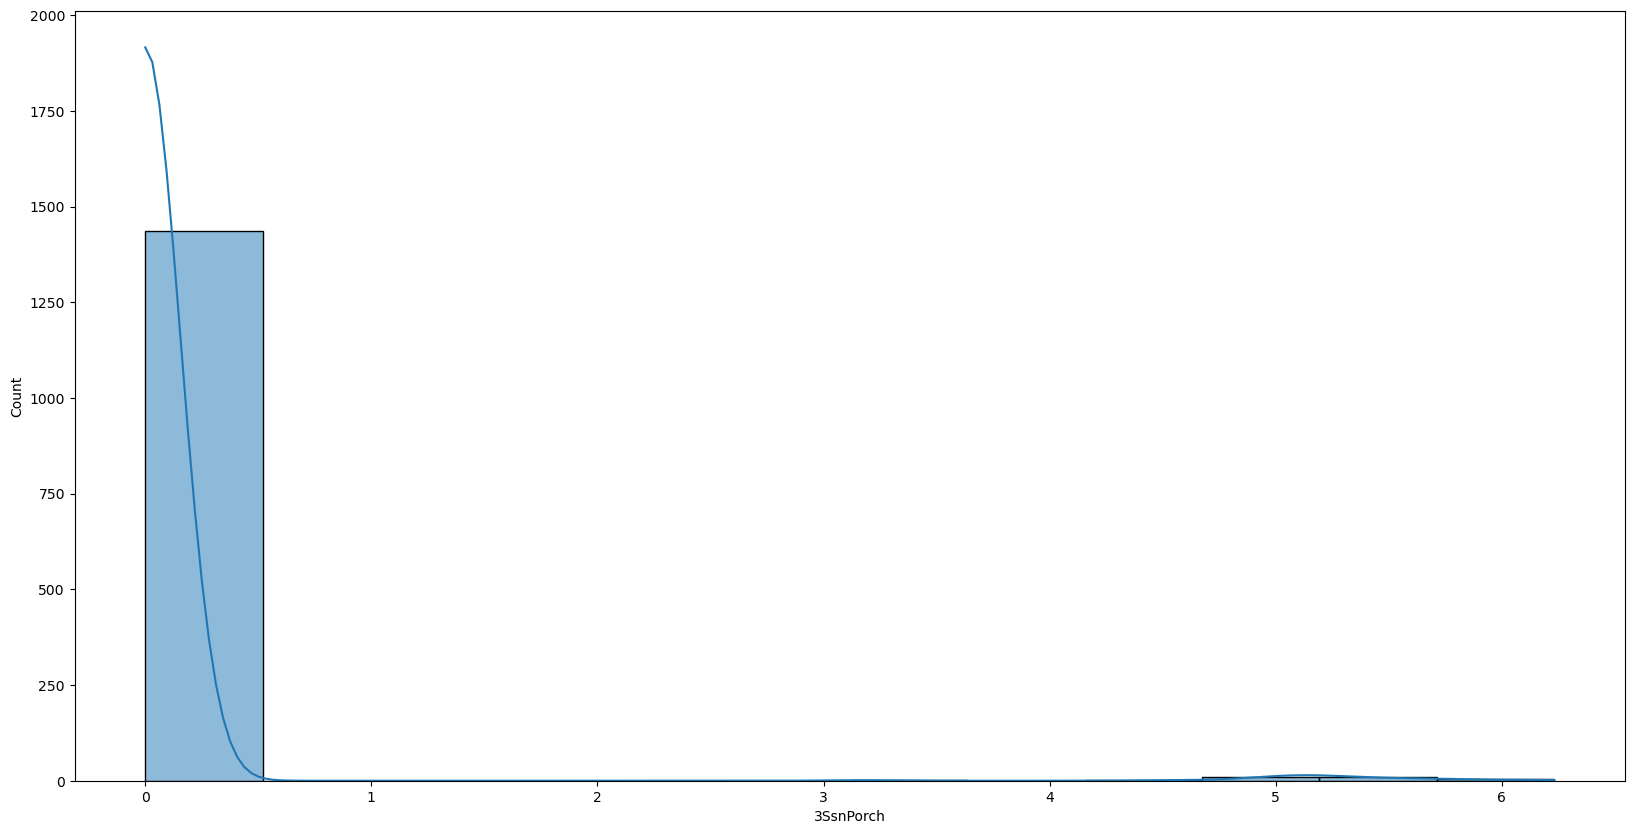

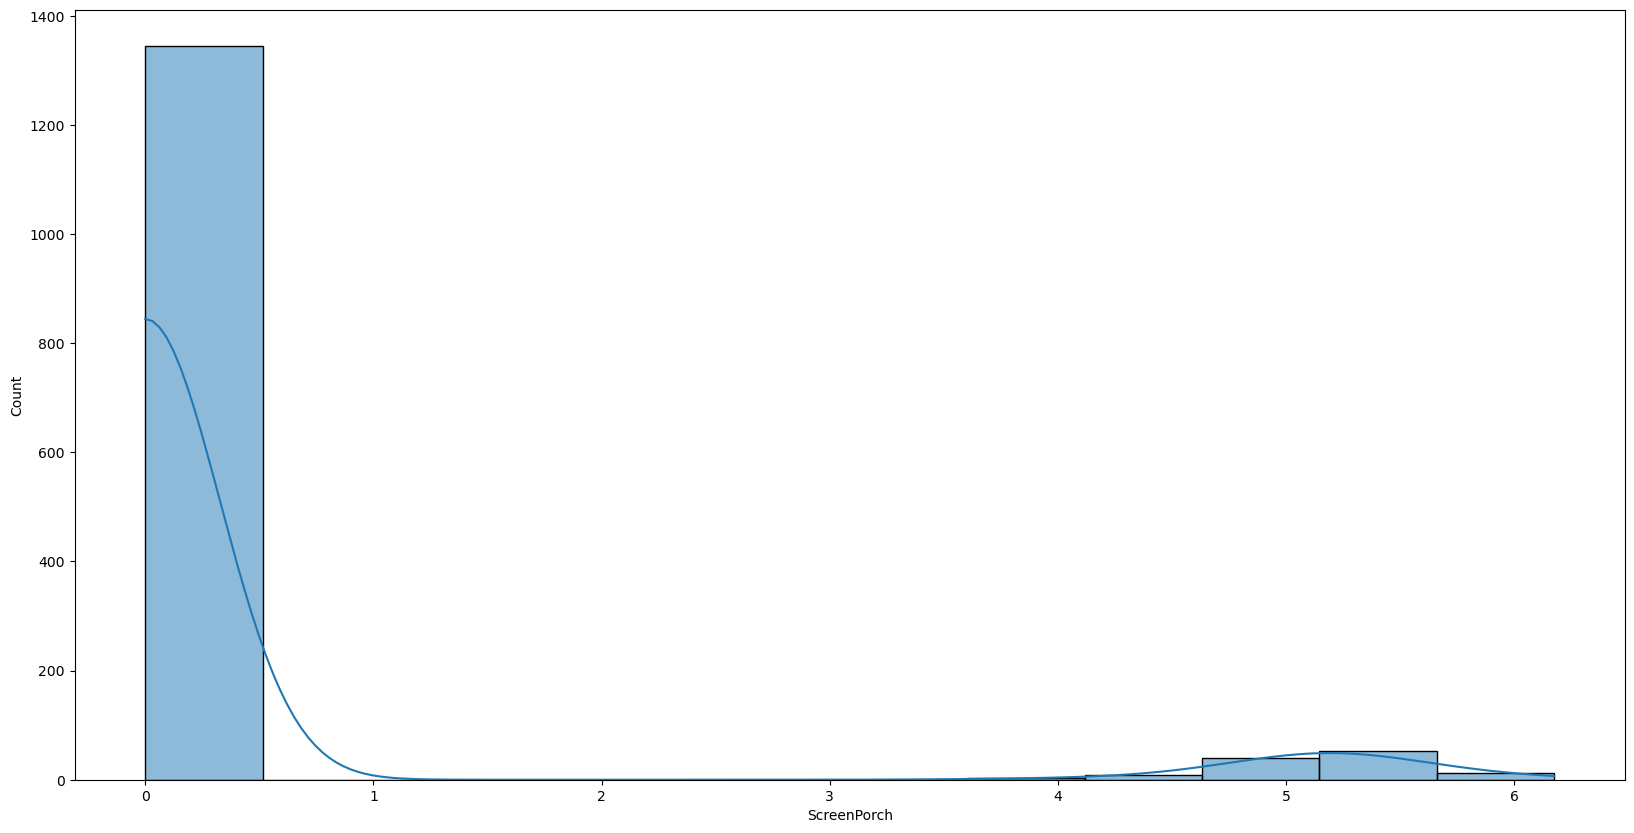

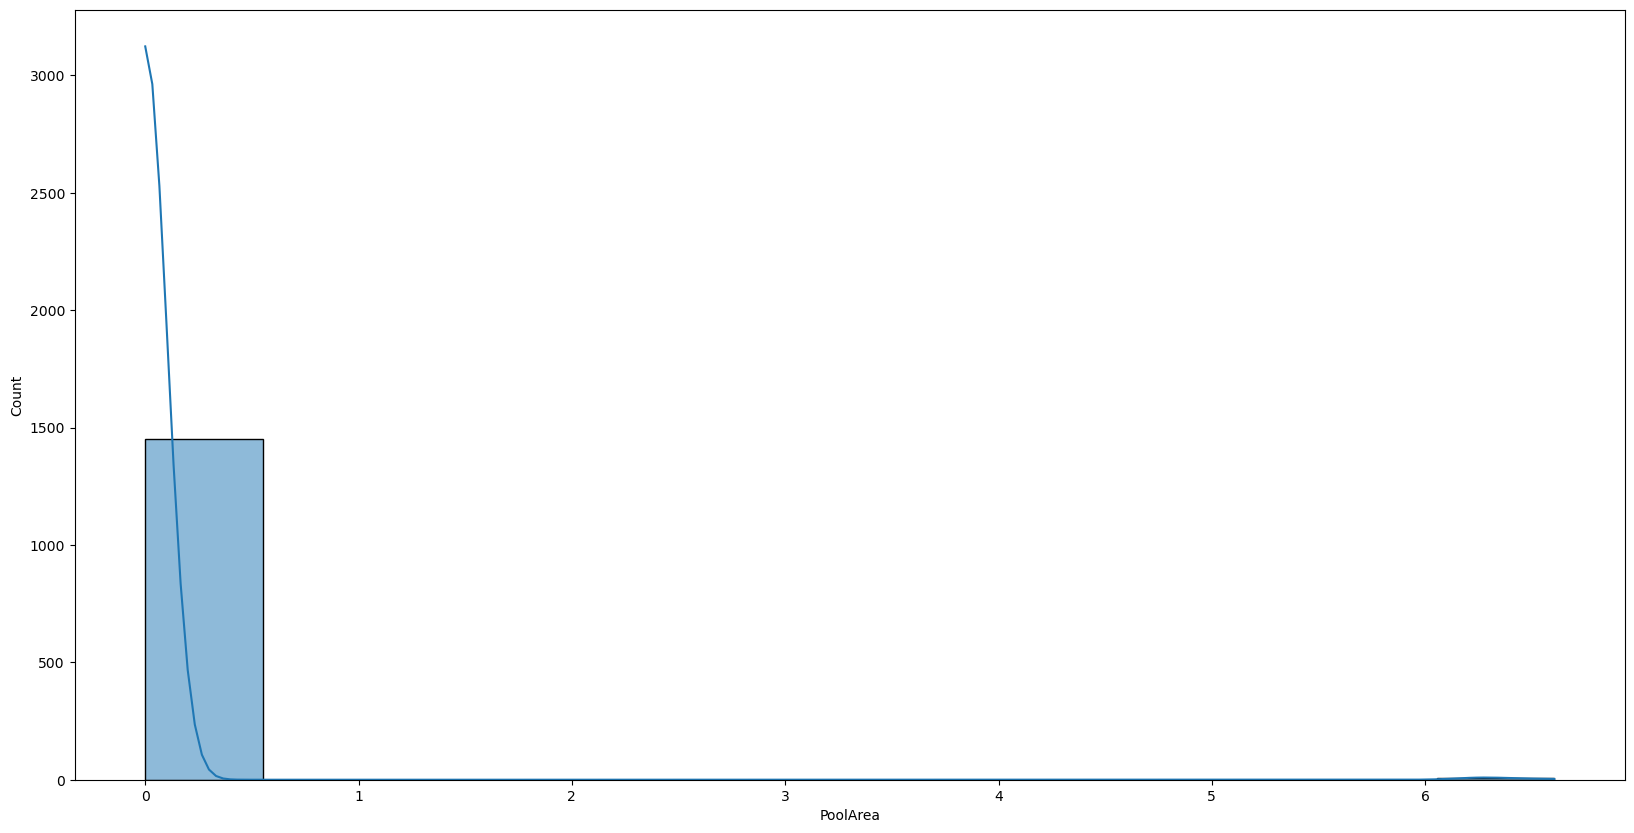

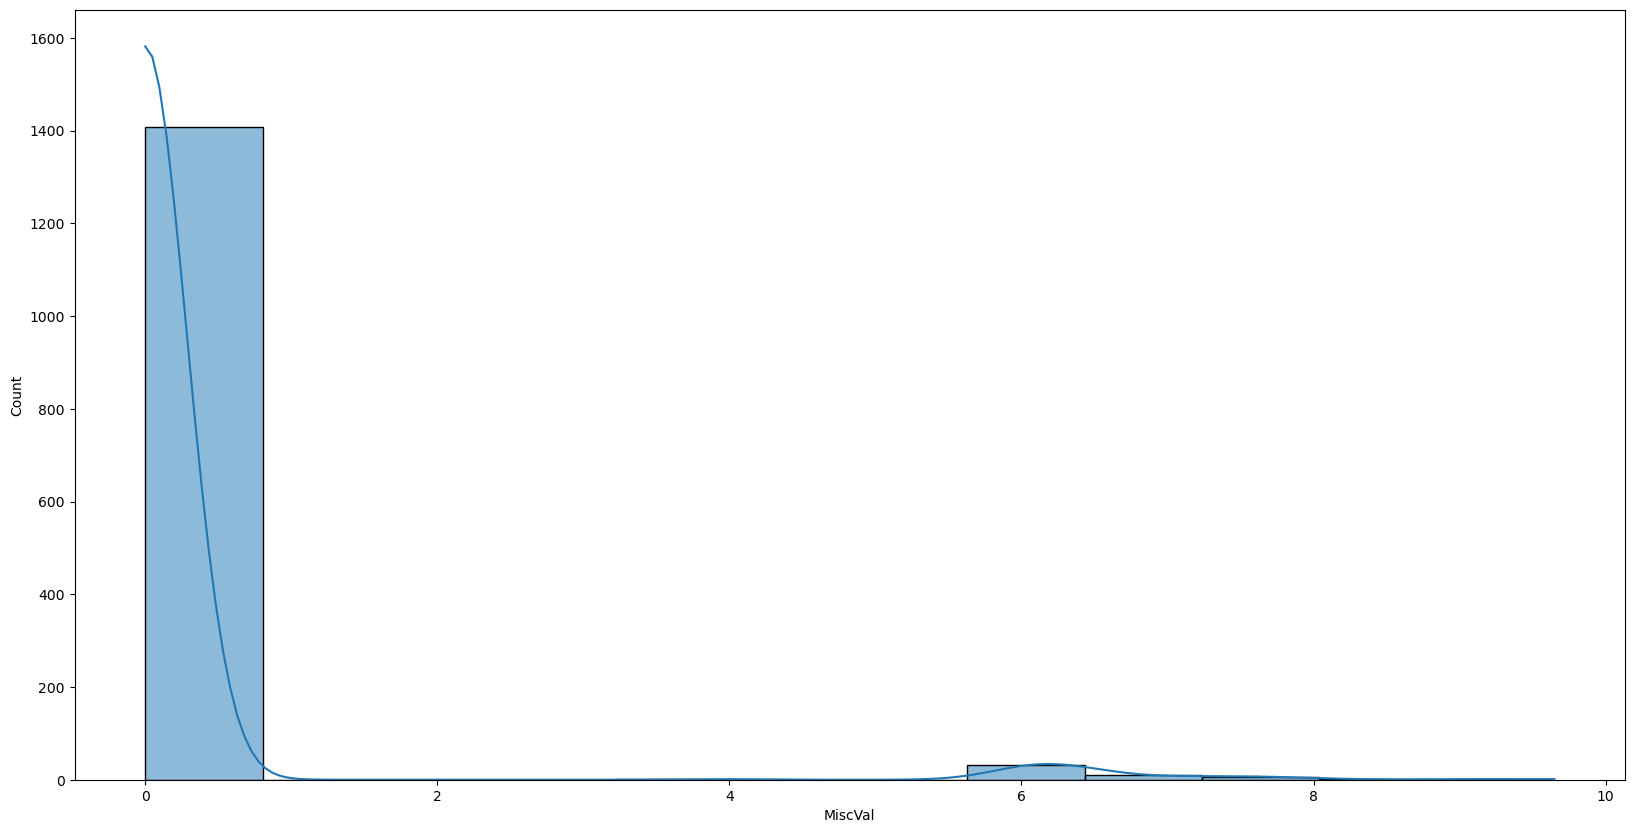

In [93]:
for i in transformed_features:
    plt.figure(figsize=(20,10))
    sns.histplot(x=df[i],kde=True)
    plt.show()

In [94]:
skewness=df[numerical_features].skew()
print(skewness)

Id                0.000000
MSSubClass        0.248997
LotFrontage      -0.891977
LotArea          -0.137404
OverallQual       0.216944
OverallCond      -0.254015
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        0.481120
BsmtFinSF1       -0.618410
BsmtFinSF2        2.523694
BsmtUnfSF        -2.186504
TotalBsmtSF      -5.154670
1stFlrSF          0.080114
2ndFlrSF          0.289643
LowQualFinSF      7.460317
GrLivArea        -0.006140
BsmtFullBath      0.419213
BsmtHalfBath      3.933064
FullBath          0.036562
HalfBath          0.566168
BedroomAbvGr      0.211790
KitchenAbvGr      3.869414
TotRmsAbvGrd     -0.058258
Fireplaces        0.182083
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        0.153537
OpenPorchSF      -0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.212053
YrSold            0.096269
S

## Model Building

In [95]:
df

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0        1    4.110874       RL     4.189655  9.042040   Pave  Grvl      Reg   
1        2    3.044522       RL     4.394449  9.169623   Pave  Grvl      Reg   
2        3    4.110874       RL     4.234107  9.328212   Pave  Grvl      IR1   
3        4    4.262680       RL     4.110874  9.164401   Pave  Grvl      IR1   
4        5    4.110874       RL     4.442651  9.565284   Pave  Grvl      IR1   
...    ...         ...      ...          ...       ...    ...   ...      ...   
1455  1456    4.110874       RL     4.143135  8.976894   Pave  Grvl      Reg   
1456  1457    3.044522       RL     4.454347  9.486152   Pave  Grvl      Reg   
1457  1458    4.262680       RL     4.204693  9.109746   Pave  Grvl      Reg   
1458  1459    3.044522       RL     4.234107  9.181735   Pave  Grvl      Reg   
1459  1460    3.044522       RL     4.330733  9.204121   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature   MiscVal  \
0            Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
1            Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
2            Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
3            Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
4            Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
...          ...       ...  ...      ...    ...    ...         ...       ...   
1455         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
1456         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
1457         Lvl    AllPub  ...      0.0     Gd  GdPrv        Shed  7.824446   
1458         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   
1459         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed  0.000000   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal  12.247694  
1         5   2007        WD         Normal  12.109011  
2         9   2008        WD         Normal  12.317167  
3         2   2006        WD        Abnorml  11.849398  
4        12   2008        WD         Normal  12.429216  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal  12.072541  
1456      2   2010        WD         Normal  12.254863  
1457      5   2010        WD         Normal  12.493130  
1458      4   2010        WD         Normal  11.864462  
1459      6   2008        WD         Normal  11.901583  

[1460 rows x 81 columns]

In [96]:
df=df.drop('Id',axis=1)

In [97]:
df

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0       4.110874       RL     4.189655  9.042040   Pave  Grvl      Reg   
1       3.044522       RL     4.394449  9.169623   Pave  Grvl      Reg   
2       4.110874       RL     4.234107  9.328212   Pave  Grvl      IR1   
3       4.262680       RL     4.110874  9.164401   Pave  Grvl      IR1   
4       4.110874       RL     4.442651  9.565284   Pave  Grvl      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1455    4.110874       RL     4.143135  8.976894   Pave  Grvl      Reg   
1456    3.044522       RL     4.454347  9.486152   Pave  Grvl      Reg   
1457    4.262680       RL     4.204693  9.109746   Pave  Grvl      Reg   
1458    3.044522       RL     4.234107  9.181735   Pave  Grvl      Reg   
1459    3.044522       RL     4.330733  9.204121   Pave  Grvl      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   
1            Lvl    AllPub       FR2  ...      0.0     Gd  MnPrv        Shed   
2            Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   
3            Lvl    AllPub    Corner  ...      0.0     Gd  MnPrv        Shed   
4            Lvl    AllPub       FR2  ...      0.0     Gd  MnPrv        Shed   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   
1456         Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   
1457         Lvl    AllPub    Inside  ...      0.0     Gd  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   
1459         Lvl    AllPub    Inside  ...      0.0     Gd  MnPrv        Shed   

       MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0     0.000000      2    2008        WD         Normal  12.247694  
1     0.000000      5    2007        WD         Normal  12.109011  
2     0.000000      9    2008        WD         Normal  12.317167  
3     0.000000      2    2006        WD        Abnorml  11.849398  
4     0.000000     12    2008        WD         Normal  12.429216  
...        ...    ...     ...       ...            ...        ...  
1455  0.000000      8    2007        WD         Normal  12.072541  
1456  0.000000      2    2010        WD         Normal  12.254863  
1457  7.824446      5    2010        WD         Normal  12.493130  
1458  0.000000      4    2010        WD         Normal  11.864462  
1459  0.000000      6    2008        WD         Normal  11.901583  

[1460 rows x 80 columns]

In [98]:
df['Street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object

In [99]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
for i in categorical_features:
    df[i]=le.fit_transform(df[i])

In [103]:
df

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       4.110874         3     4.189655  9.042040       1      0         3   
1       3.044522         3     4.394449  9.169623       1      0         3   
2       4.110874         3     4.234107  9.328212       1      0         0   
3       4.262680         3     4.110874  9.164401       1      0         0   
4       4.110874         3     4.442651  9.565284       1      0         0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    4.110874         3     4.143135  8.976894       1      0         3   
1456    3.044522         3     4.454347  9.486152       1      0         3   
1457    4.262680         3     4.204693  9.109746       1      0         3   
1458    3.044522         3     4.234107  9.181735       1      0         3   
1459    3.044522         3     4.330733  9.204121       1      0         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...       0.0       2      2   
1               3          0          2  ...       0.0       2      2   
2               3          0          4  ...       0.0       2      2   
3               3          0          0  ...       0.0       2      2   
4               3          0          2  ...       0.0       2      2   
...           ...        ...        ...  ...       ...     ...    ...   
1455            3          0          4  ...       0.0       2      2   
1456            3          0          4  ...       0.0       2      2   
1457            3          0          4  ...       0.0       2      0   
1458            3          0          4  ...       0.0       2      2   
1459            3          0          4  ...       0.0       2      2   

      MiscFeature   MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               2  0.000000       2    2008         8              4   
1               2  0.000000       5    2007         8              4   
2               2  0.000000       9    2008         8              4   
3               2  0.000000       2    2006         8              0   
4               2  0.000000      12    2008         8              4   
...           ...       ...     ...     ...       ...            ...   
1455            2  0.000000       8    2007         8              4   
1456            2  0.000000       2    2010         8              4   
1457            2  7.824446       5    2010         8              4   
1458            2  0.000000       4    2010         8              4   
1459            2  0.000000       6    2008         8              4   

      SalePrice  
0     12.247694  
1     12.109011  
2     12.317167  
3     11.849398  
4     12.429216  
...         ...  
1455  12.072541  
1456  12.254863  
1457  12.493130  
1458  11.864462  
1459  11.901583  

[1460 rows x 80 columns]

### Segregating Independent and Dependent columns

In [104]:
x=df.iloc[ : , :-1]

In [105]:
x

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       4.110874         3     4.189655  9.042040       1      0         3   
1       3.044522         3     4.394449  9.169623       1      0         3   
2       4.110874         3     4.234107  9.328212       1      0         0   
3       4.262680         3     4.110874  9.164401       1      0         0   
4       4.110874         3     4.442651  9.565284       1      0         0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    4.110874         3     4.143135  8.976894       1      0         3   
1456    3.044522         3     4.454347  9.486152       1      0         3   
1457    4.262680         3     4.204693  9.109746       1      0         3   
1458    3.044522         3     4.234107  9.181735       1      0         3   
1459    3.044522         3     4.330733  9.204121       1      0         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...          0.0       0.0       2   
1               3          0          2  ...          0.0       0.0       2   
2               3          0          4  ...          0.0       0.0       2   
3               3          0          0  ...          0.0       0.0       2   
4               3          0          2  ...          0.0       0.0       2   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...          0.0       0.0       2   
1456            3          0          4  ...          0.0       0.0       2   
1457            3          0          4  ...          0.0       0.0       2   
1458            3          0          4  ...          0.0       0.0       2   
1459            3          0          4  ...          0.0       0.0       2   

      Fence  MiscFeature   MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         2            2  0.000000       2    2008         8              4  
1         2            2  0.000000       5    2007         8              4  
2         2            2  0.000000       9    2008         8              4  
3         2            2  0.000000       2    2006         8              0  
4         2            2  0.000000      12    2008         8              4  
...     ...          ...       ...     ...     ...       ...            ...  
1455      2            2  0.000000       8    2007         8              4  
1456      2            2  0.000000       2    2010         8              4  
1457      0            2  7.824446       5    2010         8              4  
1458      2            2  0.000000       4    2010         8              4  
1459      2            2  0.000000       6    2008         8              4  

[1460 rows x 79 columns]

In [106]:
y=df['SalePrice']
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [108]:
x_train

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
64      4.110874         3     4.263383  9.145909       1      0         3   
682     4.795791         3     4.263383  7.968320       1      0         3   
960     3.044522         3     3.931826  8.882947       1      0         0   
1384    3.931826         3     4.110874  9.111735       1      0         3   
1100    3.433987         3     4.110874  9.036106       1      0         3   
...          ...       ...          ...       ...     ...    ...       ...   
763     4.110874         3     4.418841  9.151757       1      0         3   
835     3.044522         3     4.110874  9.169623       1      0         3   
1216    4.510860         4     4.234107  9.097284       1      0         3   
559     4.795791         3     4.263383  8.069968       1      0         3   
684     4.110874         3     4.077537  9.727406       1      0         1   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
64              3          0          4  ...     0.000000       0.0       2   
682             1          0          4  ...     0.000000       0.0       2   
960             3          0          4  ...     0.000000       0.0       2   
1384            3          0          4  ...     0.000000       0.0       2   
1100            0          0          4  ...     0.000000       0.0       2   
...           ...        ...        ...  ...          ...       ...     ...   
763             3          0          4  ...     5.198497       0.0       2   
835             3          0          4  ...     0.000000       0.0       2   
1216            3          0          4  ...     0.000000       0.0       2   
559             3          0          4  ...     0.000000       0.0       2   
684             3          0          1  ...     0.000000       0.0       2   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
64        0            2      0.0       2    2009         8              4  
682       2            2      0.0      11    2008         8              4  
960       2            2      0.0       2    2010         8              4  
1384      2            2      0.0      10    2009         8              4  
1100      2            2      0.0       1    2009         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
763       2            2      0.0       7    2009         8              4  
835       2            2      0.0       2    2010         8              4  
1216      2            2      0.0       4    2010         8              4  
559       2            2      0.0      10    2006         8              4  
684       2            2      0.0       6    2010         8              4  

[1022 rows x 79 columns]

In [109]:
x_test

MSSubClass  MSZoning  LotFrontage    LotArea  Street  Alley  LotShape  \
529     3.044522         3     4.263383  10.394182       1      0         0   
491     3.931826         3     4.382027   9.158099       1      0         3   
459     3.931826         3     4.263383   8.855949       1      0         0   
279     4.110874         3     4.430817   9.210940       1      0         3   
655     5.081404         4     3.091042   7.427144       1      0         3   
...          ...       ...          ...        ...     ...    ...       ...   
271     3.044522         3     4.304065  10.574006       1      0         0   
445     3.044522         3     4.304065   9.195836       1      0         3   
654     3.044522         3     4.521789   9.253208       1      0         0   
1280    3.044522         3     4.219508   9.191056       1      0         0   
898     3.044522         3     4.615121   9.466532       1      0         0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
529             3          0          1  ...          0.0       0.0       2   
491             3          0          4  ...          0.0       0.0       2   
459             0          0          0  ...          0.0       0.0       2   
279             3          0          4  ...          0.0       0.0       2   
655             3          0          4  ...          0.0       0.0       2   
...           ...        ...        ...  ...          ...       ...     ...   
271             2          0          1  ...          0.0       0.0       2   
445             3          0          0  ...          0.0       0.0       2   
654             3          0          4  ...          0.0       0.0       2   
1280            3          0          4  ...          0.0       0.0       2   
898             3          0          4  ...          0.0       0.0       2   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
529       2            2      0.0       3    2007         8              2  
491       2            2      0.0       8    2006         8              4  
459       2            2      0.0       7    2009         8              4  
279       2            2      0.0       3    2008         8              4  
655       2            2      0.0       3    2010         8              3  
...     ...          ...      ...     ...     ...       ...            ...  
271       2            2      0.0       4    2008         8              4  
445       2            2      0.0      11    2009         0              4  
654       2            2      0.0       8    2008         8              4  
1280      2            2      0.0       3    2009         8              4  
898       2            2      0.0       3    2010         6              5  

[438 rows x 79 columns]

### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [111]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
x_test_pred_LinearReg=lr.predict(x_test)

In [113]:
x_test_pred_LinearReg

array([12.13627603, 12.05776658, 11.62903983, 12.29182503, 11.41873639,
       11.37838284, 12.42117076, 11.82057032, 13.13197252, 11.95477562,
       12.21874663, 11.24233868, 12.34719726, 11.67557622, 11.72046339,
       11.8154225 , 12.36261051, 11.68008752, 11.81230659, 12.07723203,
       11.7702819 , 11.90128987, 11.40963742, 11.93461378, 12.15766699,
       12.18967848, 11.94422344, 11.27299857, 12.76465199, 11.59939719,
       11.88012761, 12.29566247, 11.91227072, 12.57445947, 12.67701552,
       12.2100082 , 12.60987039, 11.69264089, 12.29367576, 12.70279249,
       12.35043589, 11.72803269, 12.20214972, 12.62494418, 12.72579847,
       11.85751426, 10.8258781 , 11.69754882, 12.09156432, 11.43449684,
       12.90292949, 11.89694508, 12.01546741, 11.32150727, 12.4248757 ,
       11.5026451 , 11.63731915, 12.35187335, 11.8203103 , 11.4802358 ,
       11.84140566, 11.72013113, 11.79278358, 11.95363559, 12.26864317,
       12.00799978, 11.78964923, 12.27642758, 11.72079997, 12.24

In [115]:
mse_LR=mean_squared_error(x_test_pred_LinearReg,y_test)
rmse_LR=np.sqrt(mse_LR)
r2score_lr=r2_score(x_test_pred_LinearReg,y_test)
print('Linear Regression performance :')
print("Mean Squared Error :",mse_LR)
print("Root Mean Square Error :", rmse_LR)
print("Accuracy Score:",r2score_lr)

Linear Regression performance :
Mean Squared Error : 0.028286894244353357
Root Mean Square Error : 0.16818708108637048
Accuracy Score: 0.8304014293736981


## Regularization

### - - Ridge & Lasso 

In [116]:
from sklearn.linear_model import Ridge,Lasso

In [117]:
Lasso=Lasso()
Ridge=Ridge()

In [118]:
Lasso.fit(x_train,y_train)

Lasso()

In [119]:
x_test_pred_Lasso=Lasso.predict(x_test)

In [120]:
Ridge.fit(x_train,y_train)

Ridge()

In [121]:
x_test_pred_Ridge=Ridge.predict(x_test)

In [122]:
mse_lasso=mean_squared_error(x_test_pred_Lasso,y_test)
rmse_lasso=np.sqrt(mse_lasso)
r2_score_lasso=r2_score(x_test_pred_Lasso,y_test)
print('Lasso Regression performance :')
print('Mean Squared error :',mse_lasso)
print('Root mean squared error :',rmse_lasso)
print('Accuracy score :', r2_score_lasso)

Lasso Regression performance :
Mean Squared error : 0.07358215494708854
Root mean squared error : 0.27126030846234866
Accuracy score : 0.15048431623324188


In [123]:
mse_ridge=mean_squared_error(x_test_pred_Ridge,y_test)
rmse_ridge=np.sqrt(mse_ridge)
r2_score_ridge=r2_score(x_test_pred_Ridge,y_test)
print('Lasso Regression performance :')
print('Mean Squared error :',mse_ridge)
print('Root mean squared error :',rmse_ridge)
print('Accuracy score :', r2_score_ridge)

Lasso Regression performance :
Mean Squared error : 0.02706992756630352
Root mean squared error : 0.16452941246568506
Accuracy score : 0.8359516765715109


### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor
 

In [125]:
dt=DecisionTreeRegressor(random_state=42,max_depth=20)

In [126]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [127]:
x_test_pred_DecisionTree=dt.predict(x_test)

In [128]:
x_test_pred_DecisionTree

array([12.31492705, 11.8493977 , 11.77528973, 12.33929149, 11.57119437,
       11.32659589, 12.44508955, 11.89818787, 13.53447303, 11.99535161,
       12.05379521, 11.81303006, 12.37581542, 11.51292546, 11.88379913,
       11.91839057, 12.32385568, 11.34450681, 11.84222921, 12.24288662,
       11.66992921, 11.87756858, 11.46163217, 12.08953883, 12.10015642,
       12.30138283, 12.05815252, 11.42954386, 12.72932079, 11.62715553,
       11.72803684, 12.04355372, 11.8493977 , 12.54254488, 12.95512746,
       12.10071213, 12.56024446, 11.65268741, 12.31268238, 12.7367009 ,
       11.98292909, 11.91638857, 12.08099117, 12.55483688, 12.72486644,
       11.81303006, 11.57590026, 11.6784399 , 12.10015642, 11.58988651,
       12.98804081, 11.81303006, 11.87756858, 11.30220443, 12.22096126,
       11.35627165, 11.68568478, 12.22046853, 11.86358234, 11.60823564,
       11.9797992 , 11.9511804 , 11.9511804 , 11.86709728, 12.07254125,
       11.8493977 , 11.62715553, 12.2353887 , 11.68421385, 12.11

In [130]:
mse_dt=mean_squared_error(x_test_pred_DecisionTree,y_test)
rmse_dt=np.sqrt(mse_dt)
r2score_dt=r2_score(x_test_pred_DecisionTree,y_test)
print('Decision Tree preformance :')
print("Mean Square Error :",mse_dt)
print("Root Mean Square Error :",rmse_dt)
print("Accuracy score :",r2score_dt)

Decision Tree preformance :
Mean Square Error : 0.0367038184528821
Root Mean Square Error : 0.19158240642836205
Accuracy score : 0.7722679974988166


## Ensemble Techniques
   ## * Bagging
     

### - Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor


In [132]:
rf=RandomForestRegressor(max_depth=12,random_state=42,n_estimators=10) 

In [133]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=10, random_state=42)

In [134]:
x_test_pred_RandomForest=rf.predict(x_test)

In [135]:
x_test_pred_RandomForest

array([12.20178234, 11.85654844, 11.58177616, 12.32578408, 11.35296976,
       11.54003423, 12.56754079, 11.63399191, 13.24047218, 11.89595175,
       12.11233342, 11.87053789, 12.28017527, 11.61212054, 11.79765204,
       11.89857048, 12.38865008, 11.6820897 , 11.8755613 , 12.00449112,
       11.78664458, 11.85084216, 11.53620537, 12.03092951, 12.0972265 ,
       12.17997127, 12.03001297, 11.33380053, 12.70242683, 11.6536022 ,
       11.81469228, 12.05206862, 11.83422227, 12.54648419, 12.62132861,
       12.10946222, 12.56674217, 11.7470527 , 12.4283313 , 12.56607238,
       12.23993433, 11.77025394, 12.0584077 , 12.67495726, 12.62363876,
       11.92886901, 11.73335411, 11.75489607, 12.05070754, 11.55923228,
       13.07810148, 11.87064725, 11.98220699, 11.38852563, 12.42263744,
       11.6356383 , 11.83327826, 12.40357206, 11.8994419 , 11.60338291,
       11.8514542 , 11.77985223, 11.88409296, 11.93597832, 12.07184104,
       11.95826701, 11.7022863 , 12.30375527, 11.73417456, 12.12

In [137]:
mse_RF=mean_squared_error(x_test_pred_RandomForest,y_test)
rmse_RF=np.sqrt(mse_RF)
r2score_rf=r2_score(x_test_pred_RandomForest,y_test)
print('Random Forest performance:')
print("Mean squared error :",mse_RF)
print("Root mean squared error :",rmse_RF)
print("Accuracy score :",r2score_rf)

Random Forest performance:
Mean squared error : 0.020212291685949284
Root mean squared error : 0.1421699394596104
Accuracy score : 0.8599053123014547


## Boosting
  ### - Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
gb=GradientBoostingRegressor(random_state=42)

In [140]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [141]:
x_test_pred_GradientBoosting=gb.predict(x_test)

In [143]:
mse_GB=mean_squared_error(x_test_pred_GradientBoosting,y_test)
rmse_GB=np.sqrt(mse_GB)
r2score_gb=r2_score(x_test_pred_GradientBoosting,y_test)
print('Gradient Boosting performance :')
print("Mean squared error :",mse_GB)
print("Root mean squared error :",rmse_GB)
print("Accuracy score :",r2score_gb)

Gradient Boosting performance :
Mean squared error : 0.016234489295110743
Root mean squared error : 0.12741463532542383
Accuracy score : 0.8922321947897671


## - XGBoosting

In [144]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [145]:
from xgboost import XGBRegressor

In [146]:
xgb=XGBRegressor(random_state=42)

In [147]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [148]:
x_test_pred_XGBoost=xgb.predict(x_test)

In [149]:
x_test_pred_XGBoost

array([12.105543 , 11.804573 , 11.639661 , 12.29607  , 11.411358 ,
       11.530612 , 12.479001 , 11.765089 , 12.38444  , 11.900725 ,
       12.240144 , 11.828204 , 12.35434  , 11.68071  , 11.768605 ,
       11.8966465, 12.352533 , 11.680543 , 11.792321 , 12.122594 ,
       11.528507 , 11.864308 , 11.589093 , 11.986245 , 12.146081 ,
       12.15172  , 12.061011 , 11.305375 , 12.661936 , 11.4952135,
       11.744703 , 12.248207 , 11.872959 , 12.582624 , 12.741483 ,
       12.140773 , 12.565109 , 11.700163 , 12.307084 , 12.658588 ,
       12.371811 , 11.805395 , 12.079702 , 12.578589 , 12.557939 ,
       11.894722 , 11.748323 , 11.76132  , 12.055473 , 11.420887 ,
       13.055994 , 11.855922 , 12.023366 , 11.103501 , 12.472174 ,
       11.41798  , 11.710646 , 12.364854 , 11.892833 , 11.538898 ,
       11.830078 , 11.757559 , 11.82993  , 12.017137 , 12.227187 ,
       11.941291 , 11.826434 , 12.334191 , 11.776165 , 12.167662 ,
       12.1132965, 11.853557 , 11.298371 , 12.297606 , 11.3857

In [151]:
mse_xg=mean_squared_error(x_test_pred_XGBoost,y_test)
rmse_xg=np.sqrt(mse_xg)
r2score_xgb=r2_score(x_test_pred_XGBoost,y_test)
print('XGboosting performance :')
print("Mean squared error :",mse_xg)
print("Root mean squared error :",rmse_xg)
print("Accuracy score :",r2score_xgb)

XGboosting performance :
Mean squared error : 0.02121802616423015
Root mean squared error : 0.14566408673461745
Accuracy score : 0.8565164878941598


## Adaptive Boosting

In [152]:
from sklearn.ensemble import AdaBoostRegressor

In [153]:
AdaBoostReg=AdaBoostRegressor(random_state=42)

In [154]:
AdaBoostReg.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [155]:
x_test_pred_AdaBoost=AdaBoostReg.predict(x_test)

In [157]:
mse_AB=mean_squared_error(x_test_pred_AdaBoost,y_test)
rmse_AB=np.sqrt(mse_AB)
r2_score_AB=r2_score(x_test_pred_AdaBoost,y_test)
print('Adaptive Boosting performance :')
print('Mean Squared Error :',mse_AB)
print('Root mean squared error :',rmse_AB)
print('Accuracy :',r2_score_AB)


Adaptive Boosting performance :
Mean Squared Error : 0.027690719997987726
Root mean squared error : 0.1664052883714569
Accuracy : 0.8005194889119722


In [158]:
r2_score=[r2score_lr,r2_score_ridge,r2_score_lasso,r2score_dt,r2score_rf,r2score_gb,r2score_xgb,r2_score_AB]
r2_score

[0.8304014293736981,
 0.8359516765715109,
 0.15048431623324188,
 0.7722679974988166,
 0.8599053123014547,
 0.8922321947897671,
 0.8565164878941598,
 0.8005194889119722]

In [159]:
algo=['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','Gradient Boosting','XG Boosting','Adaptive Boosting']

algo

['Linear Regression',
 'Ridge',
 'Lasso',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'XG Boosting',
 'Adaptive Boosting']

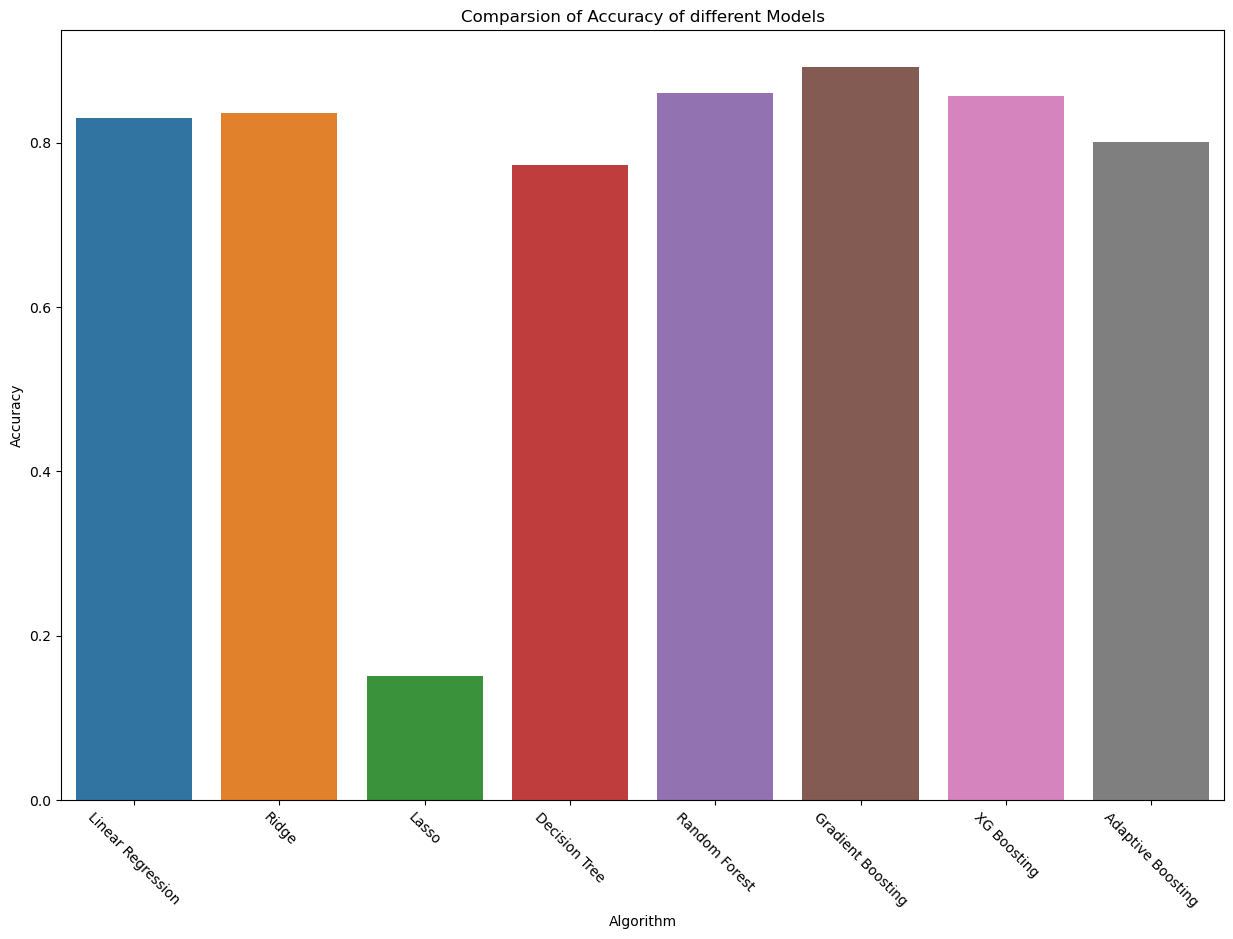

In [160]:
plt.figure(figsize=(15,10))
sns.barplot(x=algo,y=r2_score)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=-45)
plt.title('Comparsion of Accuracy of different Models')
plt.show()

### We can see Gradient Boosting Model is performing best among all the models

### This could be the result of overfitting

## Cross Validation

#### - As we see the Gradient Boosting model has the best accuracy scores in all the models. But this can be result of overfitting. In order to find out the real best model, we will cross validate the models and compare their mean accuracy scores.

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
lr_score=cross_val_score(lr,x,y,cv=10) #cross validation model
print(lr_score) #accuracy score of all cross validation cycle
print('mean of accuracy score for Linear Regression model is:',(lr_score.mean()*100))
print("")

ridge_score=cross_val_score(Ridge,x,y,cv=10)
print(ridge_score)
print('mean of accuracy score for Ridge Regression model is:',(ridge_score.mean()*100))
print("")

lasso_score=cross_val_score(Lasso,x,y,cv=10)
print(lasso_score)
print('mean of accuracy score for Lasso Regression model is:',(lasso_score.mean()*100))
print("")

dt_score=cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('mean of accuracy score for Decision Tree model is:',(dt_score.mean()*100))
print("")

rf_score=cross_val_score(rf,x,y,cv=10)
print(rf_score)
print('mean of accuracy score for Random forest model is:',(rf_score.mean()*100))
print("")

gb_score=cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('mean of accuracy score for Gradient Boosting model is:',(gb_score.mean()*100))
print("")

xgb_score=cross_val_score(xgb,x,y,cv=10)
print(xgb_score)
print('mean of accuracy score for XGBoosting model is:',(xgb_score.mean()*100))
print("")

AdaBoostReg_score=cross_val_score(AdaBoostReg,x,y,cv=10)
print(AdaBoostReg_score)
print('mean of accuracy score for Adaptive Boosting model is:',(AdaBoostReg_score.mean()*100))
print("")

[0.89484191 0.92331615 0.92679754 0.83521186 0.89546452 0.89228915
 0.89978324 0.91031132 0.71335509 0.8659321 ]
mean of accuracy score for Linear Regression model is: 87.57302880744075

[0.89720452 0.92578433 0.92686649 0.83587131 0.89626737 0.89401518
 0.89936763 0.90978287 0.72791223 0.87455183]
mean of accuracy score for Ridge Regression model is: 87.87623770052454

[0.58074366 0.58453953 0.63528548 0.53160563 0.57014586 0.55309758
 0.50355508 0.50500026 0.39986581 0.56859228]
mean of accuracy score for Lasso Regression model is: 54.324311717757055

[0.75668973 0.78712112 0.79323901 0.70114629 0.79009671 0.74697615
 0.7435701  0.6944509  0.77423496 0.74982819]
mean of accuracy score for Decision Tree model is: 75.37353168832874

[0.83591492 0.88593488 0.89536425 0.85011792 0.85880601 0.88209599
 0.86292898 0.8741934  0.82906451 0.83590707]
mean of accuracy score for Random forest model is: 86.10327951744893

[0.88643572 0.93258923 0.9217488  0.8612483  0.8913545  0.90639555
 0.8809

In [163]:
l1=['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Gradient Boosting','XG Boosting','Adaptive Boosting']
l2=[r2score_lr*100,r2_score_lasso*100,r2_score_ridge*100,r2score_dt*100,r2score_rf*100,r2score_gb*100,r2score_xgb*100,r2_score_AB*100]
l3=[lr_score.mean()*100,lasso_score.mean()*100,ridge_score.mean()*100,dt_score.mean()*100,rf_score.mean()*100,gb_score.mean()*100,xgb_score.mean()*100,AdaBoostReg_score.mean()*100]
for i in range(0,8):
    temp=l3[i]-l2[i]
    print(l1[i],temp)

Linear Regression 4.532885870070942
Lasso 39.275880094432864
Ridge 4.281070043373447
Decision Tree -1.8532680615529245
Random Forest 0.11274828730344666
Gradient Boosting 0.49022082311232396
XG Boosting 2.538442293003854
Adaptive Boosting 0.706796337318238


### After cross validation we can see the difference between mean accuracy and total accuracy is the least for Random Forest. So will build our final model on Random Forest only.

## Hyper Parameter Tuning

### - Random Forest has been chosen as the best model for this case study. Now lets tune the parameter of this model to get best possible result

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
#number of trees in random forest
n_estimators=[10,20,30,50,100,150,200]

#number of features
max_features=['auto','sqrt']

#maximum depth of the tree
max_depth=[4,5,6,7,8,9,10,11,12,13]

#minimum number of samples required to split a node
min_sample_split=[2,5,10]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [167]:
rf=RandomForestRegressor()

random_search=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                n_iter = 100, cv = 5, verbose=2)
random_search.fit(x_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20

The best parameters for the model are : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False}

In [168]:
from sklearn.metrics import r2_score
rf=RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, 
       max_features='sqrt', max_depth= 13, bootstrap= False)
rf.fit(x_train,y_train)
rf_predict_y=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(r2_score(y_test,rf_predict_y))

0.9941296412805104
0.8943635946460927


# Model Evaluation

We have built the best models after their cross validation and tuning. It is now time to evaluate the models performance using the evaluation metrics

In [169]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [170]:
plt.style.use('ggplot')

Accuracy Score of Random Forest Regressor model is 89.43635946460927
The mean absolute error of the fitted model is 0.08619291959546724
The mean squared error of the fitted model is 0.016322000876481578
The root mean squared error of the fitted model is 0.12775758637545395


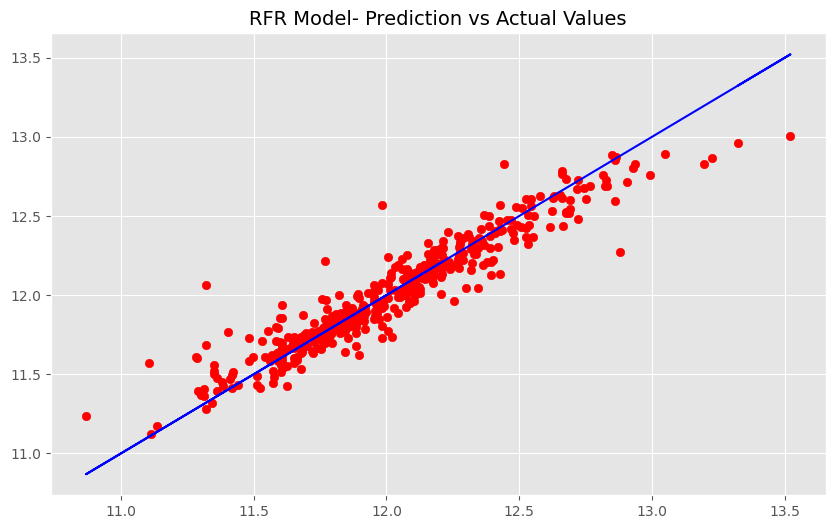

In [171]:
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, rf_predict_y)*100)
print("The mean absolute error of the fitted model is", mae(y_test, rf_predict_y))
print("The mean squared error of the fitted model is", mse(y_test, rf_predict_y))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, rf_predict_y)))

plt.figure(figsize = (10,6))
plt.title("RFR Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = y_test, y = rf_predict_y, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

# House Price Prediction

In [172]:
rf_predict_y=rf.predict(x_test)
rf_predict_y

array([12.25117034, 11.84531962, 11.67220102, 12.22446179, 11.42914896,
       11.51839911, 12.36584634, 11.72706191, 13.00238497, 11.93755985,
       12.18251725, 11.88697407, 12.32424592, 11.76843196, 11.74865027,
       11.88064137, 12.33092079, 11.63258879, 11.83405438, 12.06635039,
       11.73651085, 11.88559527, 11.5871639 , 12.01312454, 12.16330844,
       12.17859216, 12.05740321, 11.31851178, 12.73344577, 11.65442746,
       11.85618641, 12.20878056, 11.86768254, 12.57138568, 12.72663133,
       12.09757328, 12.50817609, 11.73657824, 12.34614588, 12.59971899,
       12.22315018, 11.80668747, 12.11031743, 12.60967958, 12.71465601,
       11.87410973, 11.75914513, 11.75552868, 12.02769253, 11.556859  ,
       12.80103911, 11.8976312 , 12.02955324, 11.43466918, 12.36881715,
       11.64889738, 11.7557199 , 12.37185154, 11.84235837, 11.60303646,
       11.86997421, 11.7839975 , 11.87824529, 11.96497132, 12.25119956,
       11.94546185, 11.76082424, 12.29610217, 11.77357861, 12.20

In [173]:
final_y=rf_predict_y
final_y

array([12.25117034, 11.84531962, 11.67220102, 12.22446179, 11.42914896,
       11.51839911, 12.36584634, 11.72706191, 13.00238497, 11.93755985,
       12.18251725, 11.88697407, 12.32424592, 11.76843196, 11.74865027,
       11.88064137, 12.33092079, 11.63258879, 11.83405438, 12.06635039,
       11.73651085, 11.88559527, 11.5871639 , 12.01312454, 12.16330844,
       12.17859216, 12.05740321, 11.31851178, 12.73344577, 11.65442746,
       11.85618641, 12.20878056, 11.86768254, 12.57138568, 12.72663133,
       12.09757328, 12.50817609, 11.73657824, 12.34614588, 12.59971899,
       12.22315018, 11.80668747, 12.11031743, 12.60967958, 12.71465601,
       11.87410973, 11.75914513, 11.75552868, 12.02769253, 11.556859  ,
       12.80103911, 11.8976312 , 12.02955324, 11.43466918, 12.36881715,
       11.64889738, 11.7557199 , 12.37185154, 11.84235837, 11.60303646,
       11.86997421, 11.7839975 , 11.87824529, 11.96497132, 12.25119956,
       11.94546185, 11.76082424, 12.29610217, 11.77357861, 12.20

In [174]:
# Natural log and back to normal value using built-in numpy exp() function
final_y=np.exp(final_y)
final_y

array([209226.011308  , 139430.23175566, 117266.10381952, 203711.85420392,
        91963.67694158, 100548.86491742, 234649.06495984, 123879.16679588,
       443469.79594435, 152903.12797801, 195343.9737585 , 145360.77976395,
       225087.81976439, 129111.53933754, 126582.59089808, 144443.16178233,
       226595.27915804, 112711.73172918, 137868.33057465, 173919.94501188,
       125055.24201441, 145160.49513317, 107706.35797297, 164904.95303666,
       191627.45765889, 194578.73325819, 172370.79381501,  82331.72358114,
       338895.05777205, 115200.28013784, 140953.65200926, 200542.3167149 ,
       142583.42388068, 288193.00136835, 336593.52574933, 179435.89201824,
       270540.22975551, 125063.6689557 , 230071.60769497, 296475.24010413,
       203444.83687751, 134146.46046974, 181737.28462622, 299443.06541403,
       332586.75172147, 143502.78650224, 127918.05314768, 127456.2791731 ,
       167324.87001479, 104491.29068843, 362594.02822333, 146918.192688  ,
       167636.50197694,  

# Saving Prediction

In [177]:
ans_sub = pd.DataFrame(data=final_y, columns=['Predicted SalePrice'])
ans_sub

Predicted SalePrice
0          209226.011308
1          139430.231756
2          117266.103820
3          203711.854204
4           91963.676942
..                   ...
433        184829.273273
434        158613.186335
435        325078.128043
436        212018.982225
437        425279.742377

[438 rows x 1 columns]